In [1]:
#nativos
import os
import unicodedata

#terceros
import pandas as pd
import pymssql
import missingno as msno
from collections import Counter

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
sns.set(style="whitegrid")

#propios
from utils_ficha import *
from querys import *

C:\Users\B38381\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  import sys


In [2]:
#try:
#    connection_b20.close()
#except:
#    pass

try:
    connection_market.close()
except:
    pass

In [3]:
#conneciom MARKET
connection_market = pymssql.connect(host='10.11.12.90\BDT',
                             user='ibetlmarket',
                             port=1433,
                             password='m@rk3t2o15',
                             database='MARKET'
                            )

### Clientes Universo

In [4]:
sql_clientes = """
SELECT * FROM ODS.HD_VMVP_BASE_ALERTA_CARTERA_BE
"""
clientes = pd.read_sql(
   sql_clientes , connection_market
)
clientes.head(3)

,FEVE,PERIODO,CODUNICOCLI,NOMBRE_COMPLETO,FLG_VIGENTE,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,ES_ACTIVO,CLASIF_SBS,CLASIF_IBK,DEPARTAMENTO,FEC_INGRESO,FEC_PRIMER_PRODUCTO_APERTURADO,SEI_MCDO,TIPDOC,CODDOC,NUM_RUC
0,EX-FEVE,202007,0011066687,FARMACEUTICA OTARVASQ,1,0,0,1,0,0,...,S,NORMAL,NORMAL,LIMA,2009-03-17,2009-12-30,INDUSTRIA,2,20513578416,20513578416
1,None,202007,0011179155,ESTINSA INDUSTRIAL,0,1,1,0,0,0,...,S,NORMAL,NORMAL,LIMA,2009-06-01,2009-06-12,COMERCIO,2,20513550830,20513550830
2,EX-FEVE,202007,0011197692,CONSORCIO ELECTRICO INDUSTRIAL,0,1,0,0,0,0,...,S,NORMAL,NORMAL,LIMA,2009-06-12,2009-06-12,COMERCIO,2,20519022461,20519022461


In [5]:
clientes.columns

Index(['FEVE', 'PERIODO', 'CODUNICOCLI', 'NOMBRE_COMPLETO', 'FLG_VIGENTE',
       'FLG_SUSPENDIDO', 'FLG_VENCIDA', 'FLG_CANCELADO', 'FLG_MONOLINEA',
       'FLG_SOLO_REACTIVA', 'FLG_POSICION', 'FUNNEL_1', 'FUNNEL_2', 'FUNNEL_3',
       'RIESGO', 'COD_GRUPO_ECONOMICO', 'DES_GRUPO_ECONOMICO', 'ZONAL',
       'ENCARGADO', 'NOMBRE_JEFE', 'CLASIFICACION_LIST_360', 'FUNNEL_4',
       'DESPRIORIZACION_ADM', 'IMPACTO', 'PLAN_PROPUESTO', 'FEVE_FICHA',
       'ESTADO_APROBACION', 'BUCKET', 'ESTADO', 'ES_ACTIVO', 'CLASIF_SBS',
       'CLASIF_IBK', 'DEPARTAMENTO', 'FEC_INGRESO',
       'FEC_PRIMER_PRODUCTO_APERTURADO', 'SEI_MCDO', 'TIPDOC', 'CODDOC',
       'NUM_RUC'],
      dtype='object')

In [6]:
sql_ = """
SELECT * FROM ODS.HM_FEVE_REAJUSTADO_SEGUIR_COVID
"""
reajustado = pd.read_sql(
   sql_ , connection_market
)
reajustado['CODUNICOCLI'] = reajustado['CU'].copy()
reajustado.head(3)

,CU,CLIENTE,PERIODO,SEGUIR_COVID,CODUNICOCLI
0,0015307711,IHI PERU,202010,1,0015307711
1,0013310596,HOTELERA EL PINAR,202010,1,0013310596
2,0008718030,CORPORACION MENDOZA,202010,1,0008718030


In [7]:
reajustado.dtypes

CU              object
CLIENTE         object
PERIODO         object
SEGUIR_COVID     int64
CODUNICOCLI     object
dtype: object

In [8]:
clientes = clientes.merge(
    reajustado[['CODUNICOCLI', 'PERIODO', 'SEGUIR_COVID']], how='left', on=['CODUNICOCLI', 'PERIODO']
)
clientes.head()

,FEVE,PERIODO,CODUNICOCLI,NOMBRE_COMPLETO,FLG_VIGENTE,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,CLASIF_SBS,CLASIF_IBK,DEPARTAMENTO,FEC_INGRESO,FEC_PRIMER_PRODUCTO_APERTURADO,SEI_MCDO,TIPDOC,CODDOC,NUM_RUC,SEGUIR_COVID
0,EX-FEVE,202007,0011066687,FARMACEUTICA OTARVASQ,1,0,0,1,0,0,...,NORMAL,NORMAL,LIMA,2009-03-17,2009-12-30,INDUSTRIA,2,20513578416,20513578416,NaN
1,None,202007,0011179155,ESTINSA INDUSTRIAL,0,1,1,0,0,0,...,NORMAL,NORMAL,LIMA,2009-06-01,2009-06-12,COMERCIO,2,20513550830,20513550830,NaN
2,EX-FEVE,202007,0011197692,CONSORCIO ELECTRICO INDUSTRIAL,0,1,0,0,0,0,...,NORMAL,NORMAL,LIMA,2009-06-12,2009-06-12,COMERCIO,2,20519022461,20519022461,NaN
3,GARANTIZAR,202007,0011227802,LABORATORIOS OFTALMICOS,0,0,1,0,0,0,...,NORMAL,NORMAL,LIMA,2009-07-02,1950-01-01,SERVICIOS,2,20513441208,20513441208,NaN
4,GARANTIZAR,202007,0011429380,COMBUSTIBLES DEL ORIENTE,0,0,0,0,0,0,...,NORMAL,NORMAL,UCAYALI,2009-11-11,2014-12-05,HIDROCARBUROS,2,20352280802,20352280802,NaN


In [9]:
pd.crosstab(
    clientes[clientes['PERIODO'] == '202011']['FEVE'], clientes[clientes['PERIODO'] == '202011']['SEGUIR_COVID']
)

SEGUIR_COVID,1.0
FEVE,
EX-FEVE,3
GARANTIZAR,34
REDUCIR,1
SEGUIR,163


In [10]:
pd.crosstab(
    clientes[clientes['PERIODO'] == '202010']['FEVE'], clientes[clientes['PERIODO'] == '202010']['SEGUIR_COVID']
)

SEGUIR_COVID,1.0
FEVE,
EX-FEVE,10
GARANTIZAR,39
REDUCIR,1
SEGUIR,151


In [11]:
pd.crosstab(
    clientes['FEVE'], clientes['PERIODO']
)

PERIODO,202007,202008,202009,202010,202011
FEVE,,,,,
EX-FEVE,533,569,558,555,561
GARANTIZAR,385,310,245,182,151
REDUCIR,67,72,80,92,91
SALIR,19,22,24,25,23
SEGUIR,130,150,212,265,282


In [12]:
clientes['FEVE'] = clientes[['FEVE', 'SEGUIR_COVID']].apply(
    lambda _: 'SEGUIR COVID' if _[1] == 1 and _[0] not in ['REDUCIR', 'SALIR'] else _[0], axis=1
)
pd.crosstab(
    clientes['FEVE'], clientes['PERIODO']
)

PERIODO,202007,202008,202009,202010,202011
FEVE,,,,,
EX-FEVE,533,569,558,545,558
GARANTIZAR,385,310,245,143,117
REDUCIR,67,72,80,92,91
SALIR,19,22,24,25,23
SEGUIR,130,150,212,114,119
SEGUIR COVID,0,0,0,204,201


In [13]:
#cruce = pd.crosstab(
#    clientes['SEI_MCDO'], clientes['FEVE']
#)
#cruce['total_referencial'] = cruce.sum(axis=1)#
#for col in cruce.columns:
#    cruce[col] =  cruce[col] / cruce['total_referencial']
    
#cruce

In [14]:
clientes['SEI_MCDO'] = clientes['SEI_MCDO'].fillna('DESCONOCIDO')

In [15]:
print(set(clientes['SEI_MCDO']))

{'AUTOMOTRIZ VEHÍCULOS', 'INMOBILIARIO', 'DESCONOCIDO', 'RESTAURANTES', 'HIDROCARBUROS', 'SERVICIOS', 'ENERGÍA', 'ESTADO', 'TRANSPORTE', 'TELECOMUNICACIONES', 'COMERCIO', 'TURISMO Y HOSPEDAJE', 'TEXTIL', 'CONSTRUCCIÓN', 'INDUSTRIA', 'OTROS', 'MINERÍA', 'PESCA', 'AGROPECUARIO', 'EDUCACIÓN'}


In [16]:
text_sei_mas_preocupa = 'RESTAURANTES%,%HIDROCARBUROS%,%AUTOMOTRIZ VEHÍCULOS%,%TEXTIL'
text_sei_medio_peocupa = 'INDUSTRIA%,%CONSTRUCCIÓN%,%TRANSPORTE%,%MINERÍA%,%INMOBILIARIO'
text_sei_banca = 'RESTAURANTES%,%AUTOMOTRIZ VEHÍCULOS%,%TEXTIL,%CONSTRUCCIÓN%,%TRANSPORTE, %TURISMO Y HOSPEDAJE'

clientes['sei_letal'] = clientes['SEI_MCDO'].apply(lambda _: _.upper() in text_sei_mas_preocupa).astype(int)
clientes['sei_preocupa'] = clientes['SEI_MCDO'].apply(lambda _: _.upper() in text_sei_mas_preocupa or _.upper() in text_sei_medio_peocupa).astype(int)
clientes['sei_observado_banca'] = clientes['SEI_MCDO'].apply(lambda _: _.upper() in text_sei_banca).astype(int)

In [17]:
print(clientes.columns)

Index(['FEVE', 'PERIODO', 'CODUNICOCLI', 'NOMBRE_COMPLETO', 'FLG_VIGENTE',
       'FLG_SUSPENDIDO', 'FLG_VENCIDA', 'FLG_CANCELADO', 'FLG_MONOLINEA',
       'FLG_SOLO_REACTIVA', 'FLG_POSICION', 'FUNNEL_1', 'FUNNEL_2', 'FUNNEL_3',
       'RIESGO', 'COD_GRUPO_ECONOMICO', 'DES_GRUPO_ECONOMICO', 'ZONAL',
       'ENCARGADO', 'NOMBRE_JEFE', 'CLASIFICACION_LIST_360', 'FUNNEL_4',
       'DESPRIORIZACION_ADM', 'IMPACTO', 'PLAN_PROPUESTO', 'FEVE_FICHA',
       'ESTADO_APROBACION', 'BUCKET', 'ESTADO', 'ES_ACTIVO', 'CLASIF_SBS',
       'CLASIF_IBK', 'DEPARTAMENTO', 'FEC_INGRESO',
       'FEC_PRIMER_PRODUCTO_APERTURADO', 'SEI_MCDO', 'TIPDOC', 'CODDOC',
       'NUM_RUC', 'SEGUIR_COVID', 'sei_letal', 'sei_preocupa',
       'sei_observado_banca'],
      dtype='object')


In [18]:
clientes.shape

(9212, 43)

In [19]:
clientes['PERIODO'].value_counts(dropna=False)

202007    1924
202008    1882
202009    1832
202010    1801
202011    1773
Name: PERIODO, dtype: int64

In [20]:
#clientes['ESTADO_FICHA'] = clientes['ESTADO'].copy()
#clientes['ESTADO_FICHA'].value_counts()

In [21]:
clientes['BUCKET'].value_counts()

1    4677
2    2438
4    1580
3     517
Name: BUCKET, dtype: int64

In [22]:
sql_tc = """
    SELECT * FROM TIPO_CAMBIO WHERE FECHA = (SELECT MAX(FECHA) FROM TIPO_CAMBIO)
"""
tc = pd.read_sql(
   sql_tc , connection_market
)
tc.head(3)

,fecha,tc_punta,tc_promedio,TC_PUNTA_EUR
0,2020-12-10,3.6,3.598,4.365223


In [23]:
ultimo_tipo_cambio = tc.iloc[0]['tc_punta']
ultimo_tipo_cambio

3.6

In [24]:
ticket_promedio = (clientes.groupby(by=['BUCKET'])['RIESGO'].agg(['median']).apply(
    lambda _: round(_*ultimo_tipo_cambio, 1))
).to_dict()['median']

In [25]:
def format_monetary(val):
    if val < 1000000:
        return str(round(val/1000, 1)) + ' M'
    else:
        return str(round(val/1000000, 1)) + ' MM'

clientes['TICKET_PROMEDIO_EN_RIESGO'] = clientes['BUCKET'].map(ticket_promedio)
clientes['TICKET_PROMEDIO_EN_RIESGO'] = clientes[['TICKET_PROMEDIO_EN_RIESGO', 'BUCKET']].apply(lambda _: 'Bucket {} - {}'.format(
    int(_[1]), format_monetary(_[0])),  axis=1)

clientes['TICKET_PROMEDIO_EN_RIESGO'].value_counts()

Bucket 1 - 157.3 M    4677
Bucket 2 - 1.0 MM     2438
Bucket 4 - 6.7 MM     1580
Bucket 3 - 2.5 MM      517
Name: TICKET_PROMEDIO_EN_RIESGO, dtype: int64

In [26]:
clientes['FEVE'].value_counts()

EX-FEVE         2763
GARANTIZAR      1200
SEGUIR           725
SEGUIR COVID     405
REDUCIR          402
SALIR            113
Name: FEVE, dtype: int64

### Obtención del último mes cerrado 

In [27]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

now = datetime.now()
ultimo_mes_cerrado =  datetime.strptime((now - relativedelta(months=1)).strftime('%Y-%m'), '%Y-%m').strftime('%Y-%m-%d')
ultimo_mes_cerrado

'2020-11-01'

### CONFIGURACION Y ARMADO DE COSECHAS

In [28]:
first_valid_month = '2019-03-01'
first_analysis_month = '2020-07-01'  # 1er nmes de cosecha, ya que desde este messe triene universos BEL, BEP, GE
first_init_valid = '2018-04-01'

In [29]:
rango_general =  [_ for _ in list(pd.date_range(first_analysis_month, ultimo_mes_cerrado, freq='MS'))]
print(rango_general)

[Timestamp('2020-07-01 00:00:00', freq='MS'), Timestamp('2020-08-01 00:00:00', freq='MS'), Timestamp('2020-09-01 00:00:00', freq='MS'), Timestamp('2020-10-01 00:00:00', freq='MS'), Timestamp('2020-11-01 00:00:00', freq='MS')]


In [30]:
tramos = []
for periodo_base in rango_general:
    
    rango_particular = [
        int(_.strftime('%Y%m')) for _ in list(
            pd.date_range((periodo_base - relativedelta(months=11)), (periodo_base + relativedelta(months=2)), freq='MS')
        )
    ]
    
    tramos.append(
        (int(periodo_base.strftime('%Y%m')),             #mes cerrado de la cosecha del mes siguiente
         rango_particular,  # listado 14 periodos sumando dos adelante y restando 11 periodos atras
         rango_particular[-8:-2],
         rango_particular[-5:-2],
         rango_particular[:2],     # 2 meses delante de la coasecha (año previo)
         rango_particular[-2:])    # 2 meses delante de la coasecha (año actual)
    )

print("EJEMPLO:")
print(
    str(tramos[-4][0]) + ' mes cerrado de la cosecha de ' + str(tramos[-4][1][-3]), tramos[-4][2], tramos[-4][3],
    '\n',  'historia',
    '\n', tramos[-4][1][:-2],  '\n',  '-'*100,  '\n',tramos[-4][-1],  '\n',  '-'*100,  '\n',tramos[-4][-2]
)

EJEMPLO:
202008 mes cerrado de la cosecha de 202008 [202003, 202004, 202005, 202006, 202007, 202008] [202006, 202007, 202008] 
 historia 
 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008] 
 ---------------------------------------------------------------------------------------------------- 
 [202009, 202010] 
 ---------------------------------------------------------------------------------------------------- 
 [201909, 201910]


##### EJEMPLOS COSECHAS

In [31]:
print("EJEMPLO:")
print(
    str(tramos[-3][0]) + ' es cerrado de la cosecha de ' + str(tramos[-3][1][-3]),
    tramos[-3][2], tramos[-3][3], '\n',  'historia',
    '\n', tramos[-3][1][:-2],  '\n',  '-'*100,  '\n',tramos[-3][-1],  '\n',  '-'*100,  '\n',tramos[-3][-2]
)

EJEMPLO:
202009 es cerrado de la cosecha de 202009 [202004, 202005, 202006, 202007, 202008, 202009] [202007, 202008, 202009] 
 historia 
 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009] 
 ---------------------------------------------------------------------------------------------------- 
 [202010, 202011] 
 ---------------------------------------------------------------------------------------------------- 
 [201910, 201911]


In [32]:
print("EJEMPLO:")
print(
    str(tramos[-1][0]) + ' es cerrado de la cosecha de ' + str(tramos[-1][1][-3]),
    tramos[-1][2], tramos[-1][3], '\n',  'historia',
    '\n', tramos[-1][1][:-2],  '\n',  '-'*100,  '\n',tramos[-1][-1],  '\n',  '-'*100,  '\n',tramos[-1][-2]
)

EJEMPLO:
202011 es cerrado de la cosecha de 202011 [202006, 202007, 202008, 202009, 202010, 202011] [202009, 202010, 202011] 
 historia 
 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011] 
 ---------------------------------------------------------------------------------------------------- 
 [202012, 202101] 
 ---------------------------------------------------------------------------------------------------- 
 [201912, 202001]


In [33]:
rango_general_int = [_[0] for _ in tramos]
print(rango_general_int)

[202007, 202008, 202009, 202010, 202011]


In [34]:
rango_general_int =  [int(_.strftime('%Y%m'))  for _ in list(pd.date_range(first_valid_month, ultimo_mes_cerrado, freq='MS'))]
print(rango_general_int)

[201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]


### CREACION DE BASE

In [35]:
clientes.shape, clientes['CODUNICOCLI'].unique().shape

((9212, 44), (2036,))

In [36]:
clientes.columns

Index(['FEVE', 'PERIODO', 'CODUNICOCLI', 'NOMBRE_COMPLETO', 'FLG_VIGENTE',
       'FLG_SUSPENDIDO', 'FLG_VENCIDA', 'FLG_CANCELADO', 'FLG_MONOLINEA',
       'FLG_SOLO_REACTIVA', 'FLG_POSICION', 'FUNNEL_1', 'FUNNEL_2', 'FUNNEL_3',
       'RIESGO', 'COD_GRUPO_ECONOMICO', 'DES_GRUPO_ECONOMICO', 'ZONAL',
       'ENCARGADO', 'NOMBRE_JEFE', 'CLASIFICACION_LIST_360', 'FUNNEL_4',
       'DESPRIORIZACION_ADM', 'IMPACTO', 'PLAN_PROPUESTO', 'FEVE_FICHA',
       'ESTADO_APROBACION', 'BUCKET', 'ESTADO', 'ES_ACTIVO', 'CLASIF_SBS',
       'CLASIF_IBK', 'DEPARTAMENTO', 'FEC_INGRESO',
       'FEC_PRIMER_PRODUCTO_APERTURADO', 'SEI_MCDO', 'TIPDOC', 'CODDOC',
       'NUM_RUC', 'SEGUIR_COVID', 'sei_letal', 'sei_preocupa',
       'sei_observado_banca', 'TICKET_PROMEDIO_EN_RIESGO'],
      dtype='object')

In [37]:
clientes['NUM_RUC'].isnull().sum(),  clientes['CODDOC'].isnull().sum()

(1, 1)

In [38]:
print(clientes.shape)
clientes = clientes[clientes['NUM_RUC'].notnull()]
print(clientes.shape)

(9212, 44)
(9211, 44)


In [39]:
clientes['ESTADO'].value_counts(dropna=False)

NaN             6692
CON CONOCEME    1024
VALIDADO         962
LLENADO          533
Name: ESTADO, dtype: int64

In [40]:
clientes['COD_UNICO'] = clientes['CODUNICOCLI'].copy()
clientes['RUC'] = clientes['NUM_RUC'].copy()
clientes['UNIVERSO_MESA'] = 1

base = clientes[['PERIODO', 'COD_UNICO', 'RUC', 'FLG_VIGENTE', 'NOMBRE_COMPLETO',
       'FLG_SUSPENDIDO', 'FLG_VENCIDA', 'FLG_CANCELADO', 'FLG_MONOLINEA',
       'FLG_SOLO_REACTIVA', 'FLG_POSICION', 'FUNNEL_1', 'FUNNEL_2', 'FUNNEL_3',
       'RIESGO', 'COD_GRUPO_ECONOMICO', 'DES_GRUPO_ECONOMICO', 'ZONAL',
       'ENCARGADO', 'NOMBRE_JEFE', 'CLASIFICACION_LIST_360', 'FUNNEL_4',
       'DESPRIORIZACION_ADM', 'IMPACTO', 'PLAN_PROPUESTO',
       'ESTADO_APROBACION', 'BUCKET', 'ESTADO', 'FEVE', 'ES_ACTIVO',
       'CLASIF_SBS', 'CLASIF_IBK', 'DEPARTAMENTO', 'FEC_INGRESO',
       'FEC_PRIMER_PRODUCTO_APERTURADO', 'SEI_MCDO', 'sei_preocupa', 'sei_letal', 'sei_observado_banca',
       'TICKET_PROMEDIO_EN_RIESGO', 'UNIVERSO_MESA']]
base.head()

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,CLASIF_IBK,DEPARTAMENTO,FEC_INGRESO,FEC_PRIMER_PRODUCTO_APERTURADO,SEI_MCDO,sei_preocupa,sei_letal,sei_observado_banca,TICKET_PROMEDIO_EN_RIESGO,UNIVERSO_MESA
0,202007,0011066687,20513578416,1,FARMACEUTICA OTARVASQ,0,0,1,0,0,...,NORMAL,LIMA,2009-03-17,2009-12-30,INDUSTRIA,1,0,0,Bucket 1 - 157.3 M,1
1,202007,0011179155,20513550830,0,ESTINSA INDUSTRIAL,1,1,0,0,0,...,NORMAL,LIMA,2009-06-01,2009-06-12,COMERCIO,0,0,0,Bucket 1 - 157.3 M,1
2,202007,0011197692,20519022461,0,CONSORCIO ELECTRICO INDUSTRIAL,1,0,0,0,0,...,NORMAL,LIMA,2009-06-12,2009-06-12,COMERCIO,0,0,0,Bucket 1 - 157.3 M,1
3,202007,0011227802,20513441208,0,LABORATORIOS OFTALMICOS,0,1,0,0,0,...,NORMAL,LIMA,2009-07-02,1950-01-01,SERVICIOS,0,0,0,Bucket 4 - 6.7 MM,1
4,202007,0011429380,20352280802,0,COMBUSTIBLES DEL ORIENTE,0,0,0,0,0,...,NORMAL,UCAYALI,2009-11-11,2014-12-05,HIDROCARBUROS,1,1,0,Bucket 4 - 6.7 MM,1


In [41]:
base['CLASIF_NO_NORMAL'] = base[['CLASIF_SBS', 'CLASIF_IBK']].apply(lambda _: _[0] != 'NORMAL' or _[1] != 'NORMAL', axis=1).astype(int)

C:\Users\B38381\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
base['DES_GRUPO_ECONOMICO'].value_counts(dropna=False)

                                 282
MINISTERIO DE ENERGIA Y MINAS     50
MUSTAFA AGUINAGA                  35
LEÑA Y CARBON                     30
MASIAS MARROU                     30
                                ... 
ALAC OUTDOOR                       1
CATALOGO                           1
TIRZAY                             1
CLAVIJO BEGAZO                     1
CASTILLO AYALA                     1
Name: DES_GRUPO_ECONOMICO, Length: 1579, dtype: int64

In [43]:
base.shape

(9211, 42)

In [44]:
base['NO_EST_ASOCIADO_A_GRUPO_ECONOMICO'] = base['DES_GRUPO_ECONOMICO'].apply(lambda _: pd.isnull(_) or _.strip() == '').astype(int)

C:\Users\B38381\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## ANALISIS DE GRUPO ECONOMICO

In [45]:
ge = """
    SELECT * FROM ODS.HD_VMVP_VPC_GRUPO_ECONOMICO_ALERTA
"""
ge = pd.read_sql(
   ge , connection_market
)
ge.head(3)

,DES_GRUPO_ECONOMICO,PERIODO,NRO_MIEMBROS_GRUPO_ECONOMICO,NRO_CLASIF_NO_NORMAL,NRO_FEVE_DURO,NRO_FEVE_SEGUIR
0,CORDERO GARCIA ZAPATERO,202007,6,0,2,1
1,VLG PERU,202007,10,3,1,0
2,JAGUANDE GAYOSO,202008,7,0,0,0


In [46]:
ge['PERCENT_GRUPO_ECON_VPC_SEGUIR'] = ge['NRO_FEVE_SEGUIR'] / ge['NRO_MIEMBROS_GRUPO_ECONOMICO']
ge['PERCENT_GRUPO_ECON_VPC_FEVE_DURO'] = ge['NRO_FEVE_DURO'] / ge['NRO_MIEMBROS_GRUPO_ECONOMICO']
ge['PERCENT_GRUPO_ECON_VPC_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'] / ge['NRO_MIEMBROS_GRUPO_ECONOMICO']

ge['TIENE_2_O_MAS_GRUPO_ECON_VPC_SEGUIR'] =  ge['NRO_FEVE_SEGUIR'].apply(lambda _: _>=2).astype(int)
ge['TIENE_2_O_MAS_GRUPO_ECON_VPC_FEVE_DRO'] = ge['NRO_FEVE_DURO'].apply(lambda _: _>=2).astype(int)
ge['TIENE_2_O_MAS_GRUPO_ECON_VPC_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'].apply(lambda _: _>=2).astype(int)

ge['TIENE_3_O_MAS_GRUPO_ECON_VPC_SEGUIR'] =  ge['NRO_FEVE_SEGUIR'].apply(lambda _: _>=3).astype(int)
ge['TIENE_3_O_MAS_GRUPO_ECON_VPC_FEVE_DRO'] =ge['NRO_FEVE_DURO'].apply(lambda _: _>=3).astype(int)
ge['TIENE_3_O_MAS_GRUPO_ECON_VPC_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'].apply(lambda _: _>=3).astype(int)

ge['TIENE_10PERCENT_O_MAS_GRUPO_ECON_VPC_SEGUIR'] =  ge['NRO_FEVE_SEGUIR'].apply(lambda _: _>= 0.1).astype(int)
ge['TIENE_10PERCENT_O_MAS_GRUPO_ECON_VPC_FEVE_DRO'] = ge['NRO_FEVE_DURO'].apply(lambda _: _>= 0.1).astype(int)
ge['TIENE_10PERCENT_O_MAS_GRUPO_ECON_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'].apply(lambda _: _>=0.1).astype(int)

ge['TIENE_20PERCENT_O_MAS_GRUPO_ECON_VPC_SEGUIR'] =  ge['NRO_FEVE_SEGUIR'].apply(lambda _: _>= 0.2).astype(int)
ge['TIENE_20PERCENT_O_MAS_GRUPO_ECON_VPC_FEVE_DRO'] = ge['NRO_FEVE_DURO'].apply(lambda _: _>= 0.2).astype(int)
ge['TIENE_20PERCENT_O_MAS_GRUPO_ECON_NO_CLASIF_NORMAL'] = ge['NRO_CLASIF_NO_NORMAL'].apply(lambda _: _>=0.2).astype(int)

ge = ge.rename(columns={
    'NRO_CLASIF_NO_NORMAL': 'NRO_CLASIF_NO_NORMAL_GRUPO_EECON',
    'NRO_FEVE_SEGUIR': 'NRO_FEVE_SEGUIR_GRUPO_EECON',
    'NRO_FEVE_DURO': 'NRO_FEVE_DURO_GRUPO_EECON'
})
ge.head()

,DES_GRUPO_ECONOMICO,PERIODO,NRO_MIEMBROS_GRUPO_ECONOMICO,NRO_CLASIF_NO_NORMAL_GRUPO_EECON,NRO_FEVE_DURO_GRUPO_EECON,NRO_FEVE_SEGUIR_GRUPO_EECON,PERCENT_GRUPO_ECON_VPC_SEGUIR,PERCENT_GRUPO_ECON_VPC_FEVE_DURO,PERCENT_GRUPO_ECON_VPC_NO_CLASIF_NORMAL,TIENE_2_O_MAS_GRUPO_ECON_VPC_SEGUIR,...,TIENE_2_O_MAS_GRUPO_ECON_VPC_NO_CLASIF_NORMAL,TIENE_3_O_MAS_GRUPO_ECON_VPC_SEGUIR,TIENE_3_O_MAS_GRUPO_ECON_VPC_FEVE_DRO,TIENE_3_O_MAS_GRUPO_ECON_VPC_NO_CLASIF_NORMAL,TIENE_10PERCENT_O_MAS_GRUPO_ECON_VPC_SEGUIR,TIENE_10PERCENT_O_MAS_GRUPO_ECON_VPC_FEVE_DRO,TIENE_10PERCENT_O_MAS_GRUPO_ECON_NO_CLASIF_NORMAL,TIENE_20PERCENT_O_MAS_GRUPO_ECON_VPC_SEGUIR,TIENE_20PERCENT_O_MAS_GRUPO_ECON_VPC_FEVE_DRO,TIENE_20PERCENT_O_MAS_GRUPO_ECON_NO_CLASIF_NORMAL
0,CORDERO GARCIA ZAPATERO,202007,6,0,2,1,0.166667,0.333333,0.00,0,...,0,0,0,0,1,1,0,1,1,0
1,VLG PERU,202007,10,3,1,0,0.000000,0.100000,0.30,0,...,1,0,0,1,0,1,1,0,1,1
2,JAGUANDE GAYOSO,202008,7,0,0,0,0.000000,0.000000,0.00,0,...,0,0,0,0,0,0,0,0,0,0
3,CAMAMA,202001,8,2,2,0,0.000000,0.250000,0.25,0,...,1,0,0,0,0,1,1,0,1,1
4,GOMEZ CRISOSTOMO,202004,2,1,0,0,0.000000,0.000000,0.50,0,...,0,0,0,0,0,0,1,0,0,1


In [47]:
base.shape

(9211, 43)

In [48]:
ge['PERIODO'] = ge['PERIODO'].astype(str)
base = base.merge(
    ge, how='left', on=['PERIODO', 'DES_GRUPO_ECONOMICO']
)
base.shape

(9211, 62)

In [49]:
#base['FEVE_FICHA'].value_counts(dropna=False)

In [50]:
#new_dataFrame = base[base['PERIODO'] == 0][['PERIODO', 'COD_UNICO']]
#new_dataFrame

In [51]:
#base['PERIODO'].value_counts(dropna=False)

#### ANEXAMOS A CADA CLIENTE CON CADA PERIODO DE COSECHA A ELABORAR

In [52]:
#cols_new_dataFrame = list(new_dataFrame.columns)
#print('cols_new_dataFrame :', cols_new_dataFrame)

#for cliente in base['COD_UNICO'].unique():
    
#    data_cliente = base[base['COD_UNICO'] == cliente]
#    data_cliente['PERIODO'] = data_cliente['PERIODO'].astype(int)
#    data_cliente = data_cliente.set_index('PERIODO').reindex(rango_general_int).reset_index()
#    data_cliente['PERIODO'] = data_cliente['PERIODO'].astype(str)
#    data_cliente['COD_UNICO'] = cliente
    
#    new_dataFrame = pd.concat(
#        [new_dataFrame[cols_new_dataFrame], data_cliente[cols_new_dataFrame]], axis=0
#    )

#del data_cliente
#base = new_dataFrame.copy()
#del new_dataFrame

#new_dataFrame['PERIODO'].value_counts()

In [53]:
#base = new_dataFrame.merge(
#    base[['COD_UNICO', 'BUCKET', 'FEVE_FICHA', 'ESTADO_FICHA', 'RIESGO', 'TICKET_PROMEDIO_EN_RIESGO', 'UNIVERSO_MESA']],
#    how='left', on=['COD_UNICO']
#)
#del new_dataFrame
base['PERIODO'].value_counts()

202007    1923
202008    1882
202009    1832
202010    1801
202011    1773
Name: PERIODO, dtype: int64

In [54]:
base.head()

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,TIENE_2_O_MAS_GRUPO_ECON_VPC_NO_CLASIF_NORMAL,TIENE_3_O_MAS_GRUPO_ECON_VPC_SEGUIR,TIENE_3_O_MAS_GRUPO_ECON_VPC_FEVE_DRO,TIENE_3_O_MAS_GRUPO_ECON_VPC_NO_CLASIF_NORMAL,TIENE_10PERCENT_O_MAS_GRUPO_ECON_VPC_SEGUIR,TIENE_10PERCENT_O_MAS_GRUPO_ECON_VPC_FEVE_DRO,TIENE_10PERCENT_O_MAS_GRUPO_ECON_NO_CLASIF_NORMAL,TIENE_20PERCENT_O_MAS_GRUPO_ECON_VPC_SEGUIR,TIENE_20PERCENT_O_MAS_GRUPO_ECON_VPC_FEVE_DRO,TIENE_20PERCENT_O_MAS_GRUPO_ECON_NO_CLASIF_NORMAL
0,202007,0011066687,20513578416,1,FARMACEUTICA OTARVASQ,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,202007,0011179155,20513550830,0,ESTINSA INDUSTRIAL,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,202007,0011197692,20519022461,0,CONSORCIO ELECTRICO INDUSTRIAL,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,202007,0011227802,20513441208,0,LABORATORIOS OFTALMICOS,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,202007,0011429380,20352280802,0,COMBUSTIBLES DEL ORIENTE,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


In [55]:
base.shape

(9211, 62)

In [56]:
#[col for col in base.columns if 'preocupa' in col.lower()]

In [57]:
base[base['COD_UNICO'] == '0011702929'].sort_values(by=['PERIODO'])

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,TIENE_2_O_MAS_GRUPO_ECON_VPC_NO_CLASIF_NORMAL,TIENE_3_O_MAS_GRUPO_ECON_VPC_SEGUIR,TIENE_3_O_MAS_GRUPO_ECON_VPC_FEVE_DRO,TIENE_3_O_MAS_GRUPO_ECON_VPC_NO_CLASIF_NORMAL,TIENE_10PERCENT_O_MAS_GRUPO_ECON_VPC_SEGUIR,TIENE_10PERCENT_O_MAS_GRUPO_ECON_VPC_FEVE_DRO,TIENE_10PERCENT_O_MAS_GRUPO_ECON_NO_CLASIF_NORMAL,TIENE_20PERCENT_O_MAS_GRUPO_ECON_VPC_SEGUIR,TIENE_20PERCENT_O_MAS_GRUPO_ECON_VPC_FEVE_DRO,TIENE_20PERCENT_O_MAS_GRUPO_ECON_NO_CLASIF_NORMAL
2627,202007,0011702929,20481584397,1,PERU PALETS,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6072,202008,0011702929,20481584397,1,PERU PALETS,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1420,202009,0011702929,20481584397,0,PERU PALETS,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3704,202010,0011702929,20481584397,0,PERU PALETS,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7829,202011,0011702929,20481584397,0,PERU PALETS,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
base['CLASIF_NO_NORMAL'] = base['CLASIF_NO_NORMAL'].astype(int)

### LINEAS

In [59]:
sql0 = """
    SELECT *
    FROM ODS.HD_VMVP_LINEAS_ALERTAS_CARTERA_BE
"""
lineas = pd.read_sql(
   sql0 , connection_market
)
lineas.head(2)

,PERIODO,COD_UNICO,BANCAZONAL,MAX_VENCIMIENTO,MONTOAPROBADO,MONTODISPONIBLE,MONTOUTILIZADO,ESTADO_LINEA,ESTADO_PROYECTADO
0,201901,0010891041,None,2019-08-15,NaN,NaN,NaN,VIGENTE,VIGENTE
1,201901,0012855443,None,2019-04-15,NaN,NaN,NaN,VIGENTE,VIGENTE


In [60]:
lineas['PERIODO'].max(), lineas['PERIODO'].min()

('202012', '201901')

#### Buscando viegentes

In [61]:
def generate_listado_u3m(data, col_name, values='CANT_TRX', index=['COD_UNICO'], columns=['PERIODO'], aggfunc=np.max):
    pivoteo = pd.pivot_table(
        data, 
        values=values, index=index, columns=columns, aggfunc=aggfunc, fill_value=0
    ).unstack().reset_index()
    pivoteo.columns = columns + index + [col_name]

    contador = 1
    dicc = {col_name: list}
    
    for tramo in tramos:
        _3_meses_previos = tramo[1][:-2]
        print(tramo[0], _3_meses_previos)
    
        _3m_actual = pivoteo[pivoteo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=index).agg(dicc)

        _3m_actual = _3m_actual.reset_index().rename(columns={'index': index[0]})
        _3m_actual['PERIODO'] = tramo[0]

        if contador == 1:
            acum_3 = _3m_actual.copy()
        else:
            acum_3 = pd.concat(
                [acum_3, _3m_actual], axis=0
            )

        print(acum_3.shape, )
        contador +=1
        del _3m_actual
    del pivoteo
    return acum_3

In [62]:
acum = generate_listado_u3m(
    lineas[lineas['ESTADO_LINEA'] == 'VIGENTE'], 'listados_vigentes', values='MAX_VENCIMIENTO',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=len
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(1442, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(2884, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(4326, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(5768, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(7210, 3)


,COD_UNICO,listados_vigentes,PERIODO
0,0000002469,"[0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]",202007
1,0000003392,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]",202007
2,0000006114,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202007
3,0000008318,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",202007
4,0000037374,"[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",202007


In [63]:
acum.tail(5)

,COD_UNICO,listados_vigentes,PERIODO
1437,0017008569,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",202011
1438,0017122537,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]",202011
1439,0017232155,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]",202011
1440,0017239443,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]",202011
1441,0017311917,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]",202011


In [64]:
def searhc_no_zero(lista):
    meses = 0
    for val in lista[::-1]:
        if val > 0:
            return meses
        meses += 1
    
    return meses

acum['NO_TINEN_LINEA_VIGENTE'] = acum['listados_vigentes'].apply(lambda _: _[-1] == 0).astype(int)
acum['TIENE_UNA_O_MAS_LINEAS_VIGENTES_U2M'] = acum['listados_vigentes'].apply(lambda _: _[-1] > 0 or _[-2] > 0).astype(int)
acum['TIENE_UNA_O_MAS_LINEAS_VIGENTES_U3M'] = acum['listados_vigentes'].apply(lambda _: _[-1] > 0 or _[-2] > 0 or _[-3] > 0).astype(int)
acum['NRO_MESES_SIN_LINEA_VIGENTE'] = acum['listados_vigentes'].apply(searhc_no_zero).astype(int)
acum['TIENE_2MESES_SIN_LINEA_VIGENTE']  = acum['NRO_MESES_SIN_LINEA_VIGENTE'].apply(lambda _: _ == 2).astype(int)
acum['TIENE_3MESES_SIN_LINEA_VIGENTE']  = acum['NRO_MESES_SIN_LINEA_VIGENTE'].apply(lambda _: _ == 3).astype(int)
acum['TIENE_MAS_DE_2MESES_SIN_LINEA_VIGENTE']  = acum['NRO_MESES_SIN_LINEA_VIGENTE'].apply(lambda _: _ > 2).astype(int)
acum['TIENE_MAS_DE_3MESES_SIN_LINEA_VIGENTE']  = acum['NRO_MESES_SIN_LINEA_VIGENTE'].apply(lambda _: _ > 3).astype(int)
acum['TIENE_MAS_DE_4MESES_SIN_LINEA_VIGENTE']  = acum['NRO_MESES_SIN_LINEA_VIGENTE'].apply(lambda _: _ > 4).astype(int)
acum['TIENE_MAS_DE_5MESES_SIN_LINEA_VIGENTE']  = acum['NRO_MESES_SIN_LINEA_VIGENTE'].apply(lambda _: _ > 5).astype(int)
acum['TIENE_MAS_DE_6MESES_SIN_LINEA_VIGENTE']  = acum['NRO_MESES_SIN_LINEA_VIGENTE'].apply(lambda _: _ > 6).astype(int)
del acum['listados_vigentes']
acum.tail()

,COD_UNICO,PERIODO,NO_TINEN_LINEA_VIGENTE,NRO_MESES_SIN_LINEA_VIGENTE,TIENE_2MESES_SIN_LINEA_VIGENTE,TIENE_3MESES_SIN_LINEA_VIGENTE,TIENE_MAS_DE_2MESES_SIN_LINEA_VIGENTE,TIENE_MAS_DE_3MESES_SIN_LINEA_VIGENTE,TIENE_MAS_DE_4MESES_SIN_LINEA_VIGENTE,TIENE_MAS_DE_5MESES_SIN_LINEA_VIGENTE,TIENE_MAS_DE_6MESES_SIN_LINEA_VIGENTE
1437,0017008569,202011,1,1,0,0,0,0,0,0,0
1438,0017122537,202011,0,0,0,0,0,0,0,0,0
1439,0017232155,202011,0,0,0,0,0,0,0,0,0
1440,0017239443,202011,0,0,0,0,0,0,0,0,0
1441,0017311917,202011,0,0,0,0,0,0,0,0,0


In [65]:
acum['PERIODO'] = acum['PERIODO'].astype(str)
base = base.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
base.shape

(9211, 71)

### LINEAS ORIGEN (WBC_LINEAS)

In [66]:
sql0 = """
    SELECT *
    FROM ODS.HD_VMVP_LINEAS_ORIGEN_ALERTAS_CARTERA_BE
"""
lineas = pd.read_sql(
   sql0 , connection_market
)
lineas.head(2)

,PERIODO,COD_UNICO,BANCAZONAL,NRO_LINEA,FECHARENOVACION,FECHAVENCIMIENTO,MONTOAPROBADO,MONTODISPONIBLE,MONTOUTILIZADO,ESTADO_LINEA,ESTADO_PROYECTADO
0,201912,0008878535,EMPRESA,33031379,2013-07-19,2013-07-31,2000000.0,1000000.0,0.0,VENCIDA,VENCIDA
1,201912,0008878535,EMPRESA,32104060,2012-11-13,2012-11-30,1500000.0,1000000.0,0.0,VENCIDA,VENCIDA


In [67]:
acum = generate_listado_u3m(
    lineas[lineas['ESTADO_LINEA'] == 'VIGENTE'], 'listados_vigentes', values='NRO_LINEA',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=len
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(1812, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(3624, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(5436, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(7248, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(9060, 3)


,COD_UNICO,listados_vigentes,PERIODO
0,0000002469,"[1, 1, 1, 1, 0, 0, 2, 2, 2, 2]",202007
1,0000003392,"[4, 4, 5, 5, 6, 7, 7, 8, 7, 7]",202007
2,0000006114,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]",202007
3,0000008318,"[5, 5, 6, 6, 6, 7, 7, 7, 7, 7]",202007
4,0000037374,"[3, 3, 3, 3, 3, 3, 4, 4, 4, 3]",202007


In [68]:
acum['TIENE_MENOR_NRO_LINEAS_VIGENTES_U3M'] = acum['listados_vigentes'].apply(lambda _: _[-3] >= _[-2] and _[-2 ] > _[-1] ).astype(int)
acum['TIENE_DIMINUCION_1_LINEA_VIGENTE_MES_ANT'] = acum['listados_vigentes'].apply(lambda _: _[-2 ] - _[-1] == 1).astype(int)
acum['TIENE_DIMINUCION_2_LINEAS_VIGENTES_MES_ANT'] = acum['listados_vigentes'].apply(lambda _: _[-2 ] - _[-1] == 2).astype(int)
acum['TIENE_1_LINEA_VIGENTE_U3M'] = acum['listados_vigentes'].apply(lambda _: sum(_[-3:]) / 3 <= 1 and sum(_[-3:]) / 3 > 0).astype(int)
acum['TIENE_2_LINEA_VIGENTE_U3M'] = acum['listados_vigentes'].apply(lambda _: sum(_[-3:]) / 3 <= 2 and sum(_[-3:]) / 3 > 1).astype(int)
acum['TIENE_MAS_DE_2_LINEAS_VIGENTES_U3M'] = acum['listados_vigentes'].apply(lambda _: sum(_[-3:]) / 3 > 2).astype(int)
acum['TIENE_MAS_DE_3_LINEAS_VIGENTES_U3M'] = acum['listados_vigentes'].apply(lambda _: sum(_[-3:]) / 3 > 3).astype(int)
acum['TIENE_MAS_DE_4_LINEAS_VIGENTES_U3M'] = acum['listados_vigentes'].apply(lambda _: sum(_[-3:]) / 3 > 4).astype(int)
del acum['listados_vigentes']
acum.tail()

,COD_UNICO,PERIODO,TIENE_MENOR_NRO_LINEAS_VIGENTES_U3M,TIENE_DIMINUCION_1_LINEA_VIGENTE_MES_ANT,TIENE_DIMINUCION_2_LINEAS_VIGENTES_MES_ANT,TIENE_1_LINEA_VIGENTE_U3M,TIENE_2_LINEA_VIGENTE_U3M,TIENE_MAS_DE_2_LINEAS_VIGENTES_U3M,TIENE_MAS_DE_3_LINEAS_VIGENTES_U3M,TIENE_MAS_DE_4_LINEAS_VIGENTES_U3M
1807,0017232155,202011,0,0,0,1,0,0,0,0
1808,0017239443,202011,0,0,0,1,0,0,0,0
1809,0017311917,202011,0,0,0,0,1,0,0,0
1810,0017316313,202011,0,0,0,1,0,0,0,0
1811,0017415833,202011,0,0,0,0,0,0,0,0


In [69]:
acum['PERIODO'] = acum['PERIODO'].astype(str)
base = base.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
base.shape

(9211, 79)

## NRO DE TRBAJADORES

In [70]:
sql_ = """
    SELECT *
    FROM ODS.MM_SUNAT_CANT_TRABAJADORES
"""
workers = pd.read_sql(
   sql_ , connection_market
)
workers.head(2)

,RUC,PERIODO,NRO_TRABAJADORES,NRO_PENSIONISTAS,NRO_PRESTADORES_SERVICIO,FECHA_CARGA
0,20100456495,201910,83.0,0.0,5.0,2020-12-02 10:14:00
1,20100456495,201911,82.0,0.0,6.0,2020-12-02 10:14:00


In [71]:
base.head(2)

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,TIENE_MAS_DE_5MESES_SIN_LINEA_VIGENTE,TIENE_MAS_DE_6MESES_SIN_LINEA_VIGENTE,TIENE_MENOR_NRO_LINEAS_VIGENTES_U3M,TIENE_DIMINUCION_1_LINEA_VIGENTE_MES_ANT,TIENE_DIMINUCION_2_LINEAS_VIGENTES_MES_ANT,TIENE_1_LINEA_VIGENTE_U3M,TIENE_2_LINEA_VIGENTE_U3M,TIENE_MAS_DE_2_LINEAS_VIGENTES_U3M,TIENE_MAS_DE_3_LINEAS_VIGENTES_U3M,TIENE_MAS_DE_4_LINEAS_VIGENTES_U3M
0,202007,0011066687,20513578416,1,FARMACEUTICA OTARVASQ,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,202007,0011179155,20513550830,0,ESTINSA INDUSTRIAL,1,1,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [72]:
workers['PERIODO'].value_counts()

202009    5427
202005    5427
201910    5427
202001    5427
202007    5427
202004    5427
202002    5427
201912    5427
201911    5427
202008    5427
202006    5427
202003    5427
Name: PERIODO, dtype: int64

In [73]:
acum = generate_listado_u3m(
    workers, 'listados_workers', values='NRO_TRABAJADORES', index=['RUC'], columns=['PERIODO'], aggfunc=sum
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(5427, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(10854, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(16281, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(21708, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(27135, 3)


,RUC,listados_workers,PERIODO
0,10010600338,"[23, 23, 23, 22, 21, 21, 21, 21, 22, 22]",202007
1,10011158809,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202007
2,10011231581,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 5]",202007
3,10012050017,"[15, 15, 15, 13, 13, 14, 13, 13, 13, 15]",202007
4,10028719596,"[0, 0, 0, 18, 18, 21, 3, 3, 2, 2]",202007


In [74]:
def get_percent_(lista, treshold):
    media_hace_7m =(lista[-7] + lista[-6]) / 2
    ultimo_mes = lista[-1]
    #print(">> ", media_hace_7m, ultimo_mes,  ultimo_mes/media_hace_7m if media_hace_7m > 0 else 0 )
    if not ultimo_mes or not media_hace_7m:
        return 0
    
    return ultimo_mes/media_hace_7m <= treshold

acum['TIENE_DISMINUCION_PERSONAL_COMP_10MATRAS'] = acum['listados_workers'].apply(lambda _: (_[0] - _[-1]) > 0 ).astype(int)
acum['TIENE_DISMINUCION_PERSONAL_10PERCENT_A_MAS_U7M'] = acum['listados_workers'].apply(lambda _: get_percent_(_, 0.9)).astype(int)
acum['TIENE_DISMINUCION_PERSONAL_20PERCENT_A_MAS_U7M'] = acum['listados_workers'].apply(lambda _: get_percent_(_, 0.8)).astype(int)
acum['TIENE_DISMINUCION_PERSONAL_30PERCENT_A_MAS_U7M'] = acum['listados_workers'].apply(lambda _: get_percent_(_, 0.7)).astype(int)
acum['TIENE_DISMINUCION_PERSONAL_40PERCENT_A_MAS_U7M'] = acum['listados_workers'].apply(lambda _: get_percent_(_, 0.6)).astype(int)
acum['TIENE_DISMINUCION_PERSONAL_50PERCENT_A_MAS_U7M'] = acum['listados_workers'].apply(lambda _: get_percent_(_, 0.5)).astype(int)
acum['TIENE_DISMINUCION_PERSONAL_60PERCENT_A_MAS_U7M'] = acum['listados_workers'].apply(lambda _: get_percent_(_, 0.4)).astype(int)
acum['NO_TIENE_TRABAJADORES_REGISTRADOS'] = acum['listados_workers'].apply(lambda _: sum(_) == 0).astype(int)
del acum['listados_workers']
acum.head()

,RUC,PERIODO,TIENE_DISMINUCION_PERSONAL_COMP_10MATRAS,TIENE_DISMINUCION_PERSONAL_10PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PERSONAL_20PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PERSONAL_30PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PERSONAL_40PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PERSONAL_50PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PERSONAL_60PERCENT_A_MAS_U7M,NO_TIENE_TRABAJADORES_REGISTRADOS
0,10010600338,202007,1,0,0,0,0,0,0,0
1,10011158809,202007,0,0,0,0,0,0,0,1
2,10011231581,202007,1,1,0,0,0,0,0,0
3,10012050017,202007,0,0,0,0,0,0,0,0
4,10028719596,202007,0,1,1,1,1,1,1,0


In [75]:
acum['RUC'] = acum['RUC'].astype(str)
#del acum['RUC']
acum['PERIODO'] = acum['PERIODO'].astype(str)

base = base.merge(
    acum, how='left', on=['PERIODO', 'RUC']
)
base.shape

(9211, 87)

In [76]:
def get_div_means_perios(val_anio_act , val_anio_pas):
    if pd.isnull(val_anio_act) or not val_anio_act:
        return 0
    
    if pd.isnull(val_anio_pas) or not val_anio_pas:
        return val_anio_act
    
    return val_anio_act / val_anio_pas

# REACTIVA

In [77]:
sql1 = """
    SELECT * FROM ODS.HD_VMVP_REACTIVA_IBK_ALERTAS_CARTERA_BE WITH (NOLOCK)
"""
interno_reactiva_ibk = pd.read_sql(
   sql1 , connection_market
)
interno_reactiva_ibk.head(2)

,ESTADO_DESEMBOLSO,CERTIFICADO,FECHA_FIN_CREDITO,FECHA_DESEMBOLSO,PERIODO,HORARIO,TIP_DOC,NUM_DOC,RAZON_SOCIAL,APE_PATERNO,...,FLG_DJ_REACTIVA_1,TIPO_REACTIVA,FLG_TOMO_REACTIVA_1,MONTO_PRESTAMO_REACTIVA_1,FLG_REGIMEN_RUS,INGRESOS_MENSUAL_2019_PROMEDIO,COMPRAS_MENSUAL_2019_PROMEDIO,FLG_DJ_ANEXO_4,FLG_DJ_REQUISITOS,FLG_RP
0,Desembolsado,CGAR2-2020-0106674,2023-07-14,2020-07-29,20200716,11:12:00,RUC,20510913371,COINREFRI AIR,,...,1.0,2,2.0,2200551.0,0.0,0.0,0.0,1.0,1.0,1
1,Desembolsado,CGAR2-2020-0106679,2023-07-09,2020-07-24,20200716,11:12:00,RUC,20516485524,BFX,,...,1.0,2,1.0,1117000.0,0.0,0.0,0.0,1.0,1.0,1


In [78]:
interno_reactiva_ibk['PERIODO'] = interno_reactiva_ibk['FECHA_DESEMBOLSO'].apply(lambda _: int(_.replace('-', '')[:6]))
interno_reactiva_ibk['PERIODO'].value_counts(dropna=False)

202005    626
202007    170
202006    153
202008    117
202009     37
202010     13
202011      2
Name: PERIODO, dtype: int64

In [79]:
pivoteo = pd.pivot_table(
    interno_reactiva_ibk[['CODUNICOCLI', 'PERIODO', 'TIPO_REACTIVA']], 
    index=['CODUNICOCLI'], columns=['PERIODO'], aggfunc=len, values='TIPO_REACTIVA',fill_value=0
)
pivoteo.head()

PERIODO,202005,202006,202007,202008,202009,202010,202011
CODUNICOCLI,,,,,,,
0000002469,0,0,0,1,0,0,0
0000006114,1,0,0,0,0,0,0
0000008318,0,0,1,0,0,0,0
0000039982,0,0,1,0,0,0,0
0000046268,1,0,1,0,0,0,0


In [80]:
columnas_ordenadas = sorted(pivoteo.columns, reverse=False)

for col in columnas_ordenadas[1:]:
    posicion_columna = columnas_ordenadas.index(col)
    #print(posicion_columna)
    print(posicion_columna, col, columnas_ordenadas[posicion_columna -1])
    pivoteo[col] = pivoteo[
        [columnas_ordenadas[posicion_columna -1], col]
    ].sum(axis=1)

pivoteo.head()

1 202006 202005
2 202007 202006
3 202008 202007
4 202009 202008
5 202010 202009
6 202011 202010


PERIODO,202005,202006,202007,202008,202009,202010,202011
CODUNICOCLI,,,,,,,
0000002469,0,0,0,1,1,1,1
0000006114,1,1,1,1,1,1,1
0000008318,0,0,1,1,1,1,1
0000039982,0,0,1,1,1,1,1
0000046268,1,1,2,2,2,2,2


In [81]:
pivoteo = pivoteo.unstack().reset_index()
pivoteo.columns = ['PERIODO', 'COD_UNICO', 'NRO_VECES_REACTIVA_IBK']
pivoteo['TIENE_REACTIVA_IBK'] = pivoteo['NRO_VECES_REACTIVA_IBK'].apply(lambda _: _ > 0).astype(int)
pivoteo['TIENE_REACTIVA1_REACTIVA2_IBK'] = pivoteo['NRO_VECES_REACTIVA_IBK'].apply(lambda _: _ > 1).astype(int)

display(pivoteo['TIENE_REACTIVA1_REACTIVA2_IBK'].value_counts(dropna=False))
pivoteo.head(3)

0    4177
1    1549
Name: TIENE_REACTIVA1_REACTIVA2_IBK, dtype: int64

,PERIODO,COD_UNICO,NRO_VECES_REACTIVA_IBK,TIENE_REACTIVA_IBK,TIENE_REACTIVA1_REACTIVA2_IBK
0,202005,0000002469,0,0,0
1,202005,0000006114,1,1,0
2,202005,0000008318,0,0,0


In [82]:
pivoteo['PERIODO'] = pivoteo['PERIODO'].astype(str)
base = base.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
base.shape

(9211, 90)

### REACTIVA RCC

In [83]:
sql_reactiva_rcc = """
    SELECT * FROM ODS.HD_VMVP_REACTIVARCC_ALERTAS_CARTERA_BE
"""
reactiva = pd.read_sql(
   sql_reactiva_rcc , connection_market
)

## Se le suma un mes para que la info de rcc se usa el mes siguiente
reactiva['PERIODO'] = reactiva['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
pivoteo = pd.pivot_table(
    reactiva[['COD_UNICO', 'PERIODO', 'NBR_EMPRESA']], 
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=len, values='NBR_EMPRESA',fill_value=0
)

del reactiva
pivoteo.head()

PERIODO,202006,202007,202008,202009,202010
COD_UNICO,,,,,
0000006114,1,1,1,1,1
0000043778,2,2,2,2,2
0000054320,1,1,1,2,3
0000056036,1,1,1,1,1
0000158733,2,2,2,2,2


In [84]:
pivoteo = pivoteo.unstack().reset_index()
pivoteo.columns = ['PERIODO', 'COD_UNICO', 'NRO_VECES_REACTIVA_SF']
pivoteo['TIENE_REACTIVA_SF'] = pivoteo['NRO_VECES_REACTIVA_SF'].apply(lambda _: _ > 0).astype(int)
pivoteo['TIENE_REACTIVA1_REACTIVA2_SF'] = pivoteo['NRO_VECES_REACTIVA_SF'].apply(lambda _: _ > 1).astype(int)

display(pivoteo['TIENE_REACTIVA1_REACTIVA2_SF'].value_counts(dropna=False))
pivoteo.head(3)

1    2016
0    1529
Name: TIENE_REACTIVA1_REACTIVA2_SF, dtype: int64

,PERIODO,COD_UNICO,NRO_VECES_REACTIVA_SF,TIENE_REACTIVA_SF,TIENE_REACTIVA1_REACTIVA2_SF
0,202006,0000006114,1,1,0
1,202006,0000043778,2,1,1
2,202006,0000054320,1,1,0


In [85]:
pivoteo['PERIODO'] = pivoteo['PERIODO'].astype(str)
base = base.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
base.shape

(9211, 93)

In [86]:
base.head(2)

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,TIENE_DISMINUCION_PERSONAL_40PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PERSONAL_50PERCENT_A_MAS_U7M,TIENE_DISMINUCION_PERSONAL_60PERCENT_A_MAS_U7M,NO_TIENE_TRABAJADORES_REGISTRADOS,NRO_VECES_REACTIVA_IBK,TIENE_REACTIVA_IBK,TIENE_REACTIVA1_REACTIVA2_IBK,NRO_VECES_REACTIVA_SF,TIENE_REACTIVA_SF,TIENE_REACTIVA1_REACTIVA2_SF
0,202007,0011066687,20513578416,1,FARMACEUTICA OTARVASQ,0,0,1,0,0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2.0,1.0,1.0
1,202007,0011179155,20513550830,0,ESTINSA INDUSTRIAL,1,1,0,0,0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
for col in [_ for _ in base.columns if 'REACTIVA' in _.upper()]:
    base[col] = base[col].fillna(0)

base['TIENE_REACTIVA_CON_OTRA_EF'] = base[['TIENE_REACTIVA_SF', 'TIENE_REACTIVA_IBK']].apply(lambda _: 1 if _[0] == 1 and _[1] == 0 else 0, axis=1)
base['TIENE_REACTIVA_1_2_CON_OTRAS_EF'] = base[['TIENE_REACTIVA1_REACTIVA2_SF', 'TIENE_REACTIVA_IBK']].apply(
    lambda _: 1 if _[0] == 1 and _[1] == 0 else 0, axis=1)

base['TIENE_REACTIVA_SF']  = base[['TIENE_REACTIVA_SF', 'TIENE_REACTIVA_IBK']].apply(lambda _: 1 if _[0] == 0 and _[1] == 1 else 0, axis=1) #si tiene reactiva en IBK --> entonces tambien SF en dos mese adlante

base['TIENE_SOLO_1_CREDITO_REACTIVA_SF'] = base['NRO_VECES_REACTIVA_SF'].apply(lambda _: _ == 1).astype(int)
base['TIENE_REACTIVA_CON_OTRA_EF'].value_counts()

0    7817
1    1394
Name: TIENE_REACTIVA_CON_OTRA_EF, dtype: int64

In [88]:
base['TIENE_REACTIVA_1_2_CON_OTRAS_EF'].value_counts(dropna=False)

0    7896
1    1315
Name: TIENE_REACTIVA_1_2_CON_OTRAS_EF, dtype: int64

In [89]:
base['TIENE_SOLO_1_CREDITO_REACTIVA_SF'].value_counts(dropna=False)

0    8131
1    1080
Name: TIENE_SOLO_1_CREDITO_REACTIVA_SF, dtype: int64

#### Review Cosechas JUlio y Agosto - REACTIVA IBK

In [90]:
base[base['PERIODO'].astype(int) >= 202007]['TIENE_REACTIVA_IBK'].value_counts()

0.0    5559
1.0    3652
Name: TIENE_REACTIVA_IBK, dtype: int64

In [91]:
base.isnull().sum()

PERIODO                             0
COD_UNICO                           0
RUC                                 0
FLG_VIGENTE                         0
NOMBRE_COMPLETO                     0
                                   ..
TIENE_REACTIVA_SF                   0
TIENE_REACTIVA1_REACTIVA2_SF        0
TIENE_REACTIVA_CON_OTRA_EF          0
TIENE_REACTIVA_1_2_CON_OTRAS_EF     0
TIENE_SOLO_1_CREDITO_REACTIVA_SF    0
Length: 96, dtype: int64

In [92]:
base.shape
base[base['PERIODO'].astype(int) >= 202007]['BUCKET'].value_counts()

1    4676
2    2438
4    1580
3     517
Name: BUCKET, dtype: int64

# TRANSACCIONES

In [93]:
import gc
gc.collect()

0

In [94]:
sql_trx_cliente = """
    SELECT * FROM ODS.HD_VMVP_TRANSACCION_CLIENTE_ALERTAS_CARTERA_BE
"""
transac_cliente = pd.read_sql(
   sql_trx_cliente , connection_market
)

print(transac_cliente.shape)
transac_cliente.groupby(by=['PERIODO']).size()

(172959, 9)


PERIODO
201904    7837
201905    8245
201906    8019
201907    8315
201908    8145
201909    8582
201910    8463
201911    8763
201912    8639
202001    8711
202002    8488
202003    8320
202004    6922
202005    8186
202006    8285
202007    8905
202008    8910
202009    8898
202010    8974
202011    9132
202012    4220
dtype: int64

In [95]:
transac_cliente.head()

,ANIO,PERIODO,COD_UNICO,TIPO_CASH,KPI,GRUPO_N1,CANT_TRX,VOLUMEN_SOLES,MAX_FECHA_INFORMACION
0,2019,201907,0015994198,CASH IN,NO_CONS,OTROS,6,393974.84,20190726
1,2019,201907,0016047687,CASH OUT,TABLERO,PAGOS MASIVOS,1,1045.92,20190711
2,2019,201907,0016073282,CASH OUT,NO_CONS,OTROS,17,189.85,20190731
3,2019,201907,0016145237,CASH IN,TABLERO,DEPOSITOS,1,50.00,20190722
4,2019,201907,0016231005,CASH IN,TABLERO,PAGOS RECIBIDOS,1,5.00,20190731


#### REVIEW PERIODOS

In [96]:
transac_cliente.shape, transac_cliente.groupby(by=['PERIODO', 'COD_UNICO', 'TIPO_CASH', 'GRUPO_N1', 'KPI']).size().shape

((172959, 9), (172959,))

In [97]:
transac_cliente['COD_UNICO'].unique().shape

(1966,)

In [98]:
def get_kpi(val):
    if val == 'NO_CONS':
        return 'NO_TABLERO'
    elif val == 'TABLERO':
        return ''
    
    return val
        
transac_cliente['KPI'] = transac_cliente['KPI'].apply(get_kpi)
transac_cliente['KPI'].value_counts()

              125867
NO_TABLERO     47092
Name: KPI, dtype: int64

#### PIVOTEO GRUPO DE CASH_IN EN LA MISMA COSECHA

In [99]:
pivoteo = pd.pivot_table(
    transac_cliente[transac_cliente['TIPO_CASH'] == 'CASH IN'], 
    values='VOLUMEN_SOLES', index=['COD_UNICO'], columns=['GRUPO_N1', 'KPI', 'PERIODO'], aggfunc=np.sum, fill_value=0
)

print(pivoteo.shape)
pivoteo.head(2)

(1955, 168)


GRUPO_N1     COBRANZAS                                              \
KPI                                                                  
PERIODO         201904     201905     201906     201907     201908   
COD_UNICO                                                            
0000002469        0.00       0.00       0.00        0.0       0.00   
0000003392  1628254.71  790647.27  658597.38  1425572.6  924867.68   

GRUPO_N1                                                             ...  \
KPI                                                                  ...   
PERIODO         201909      201910     201911     201912     202001  ...   
COD_UNICO                                                            ...   
0000002469        0.00        0.00       0.00       0.00       0.00  ...   
0000003392  2674209.53  3306476.38  601537.18  635073.36  286165.18  ...   

GRUPO_N1   TRANSFERENCIAS                                                 \
KPI                                                                        
PERIODO            202003      202004      202005      202006     202007   
COD_UNICO                                                                  
0000002469           0.00        0.00        0.00     1731.00       0.00   
0000003392     1395662.98  1273436.14  2847147.57  1362382.15  573919.81   

GRUPO_N1                                                              
KPI                                                                   
PERIODO        202008      202009      202010      202011     202012  
COD_UNICO                                                             
0000002469        0.0   358400.00     1000.00        0.00       0.00  
0000003392  1300100.9  1642966.45  4399121.42  2864879.85  259448.24  

[2 rows x 168 columns]

In [100]:
pivoteo = pivoteo.unstack().reset_index()
pivoteo.columns = ['GRUPO_N1', 'KPI', 'PERIODO', 'COD_UNICO', 'VOLUMEN_SOLES']
pivoteo.head()

,GRUPO_N1,KPI,PERIODO,COD_UNICO,VOLUMEN_SOLES
0,COBRANZAS,,201904,0000002469,0.00
1,COBRANZAS,,201904,0000003392,1628254.71
2,COBRANZAS,,201904,0000006114,0.00
3,COBRANZAS,,201904,0000008318,0.00
4,COBRANZAS,,201904,0000038026,0.00


In [101]:
pivoteo = pd.pivot_table(
    pivoteo, 
    values='VOLUMEN_SOLES', index=['COD_UNICO', 'PERIODO'], columns=['GRUPO_N1', 'KPI'], aggfunc=np.sum, fill_value=0
)

pivoteo.columns = ['_'.join(list(col)).replace(' ', '_') for col in pivoteo]
pivoteo['TOTAL'] = pivoteo.sum(axis=1)
print(pivoteo.shape)

pivoteo.head()

(41055, 9)


COBRANZAS_  DEPOSITOS_  OPERACIONES_MESA_  \
COD_UNICO  PERIODO                                              
0000002469 201904          0.0         0.0                0.0   
           201905          0.0         0.0                0.0   
           201906          0.0         0.0                0.0   
           201907          0.0         0.0                0.0   
           201908          0.0         0.0                0.0   

                    OTROS_NO_TABLERO  PAGOS_RECIBIDOS_  POS_  RECAUDACION_  \
COD_UNICO  PERIODO                                                           
0000002469 201904          342654.51               0.0   0.0           0.0   
           201905          148519.20               0.0   0.0           0.0   
           201906          505101.87               0.0   0.0           0.0   
           201907          259281.10               0.0   0.0           0.0   
           201908               0.00               0.0   0.0           0.0   

                    TRANSFERENCIAS_      TOTAL  
COD_UNICO  PERIODO                              
0000002469 201904               0.0  342654.51  
           201905           15000.0  163519.20  
           201906           16655.0  521756.87  
           201907           20000.0  279281.10  
           201908               0.0       0.00

In [102]:
pivoteo_grupo = pivoteo.reset_index()
pivoteo_grupo.head(3)

,COD_UNICO,PERIODO,COBRANZAS_,DEPOSITOS_,OPERACIONES_MESA_,OTROS_NO_TABLERO,PAGOS_RECIBIDOS_,POS_,RECAUDACION_,TRANSFERENCIAS_,TOTAL
0,0000002469,201904,0.0,0.0,0.0,342654.51,0.0,0.0,0.0,0.0,342654.51
1,0000002469,201905,0.0,0.0,0.0,148519.20,0.0,0.0,0.0,15000.0,163519.20
2,0000002469,201906,0.0,0.0,0.0,505101.87,0.0,0.0,0.0,16655.0,521756.87


In [103]:
for tramo in tramos:
    _3_meses_previos = tramo[3]
    _6_meses_previos = tramo[2]
    print(tramo[0], _6_meses_previos, _3_meses_previos, tramo[1][:-2])
    break

202007 [202002, 202003, 202004, 202005, 202006, 202007] [202005, 202006, 202007] [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]


In [104]:
#pivoteo_grupo[pivoteo_grupo['COD_UNICO'] == '0000006114']

In [105]:
contador = 1
dd = {
    'TOTAL': [list]
}

for tramo in tramos:
    _3_meses_previos = tramo[3]
    #_6_meses_previos = tramo[2]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dd)
    _3m_actual.columns = ['listado_cash_in_u3m']
    _3m_tipos = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).sum()
    _3m_tipos.columns = ['_'.join(_) if isinstance(_, tuple) else _ for _ in _3m_tipos.columns]
    #_3m_actual = 
    #print(_3m_actual.head())
    print("/"*100)
    
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]
    _3m_tipos = _3m_tipos.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_tipos['PERIODO'] = tramo[0]
    if contador == 1:
        acum_3 = _3m_actual.copy()
        sum_3 = _3m_tipos.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
        sum_3 = pd.concat(
            [sum_3, _3m_tipos], axis=0
        )
        
    print(acum_3.shape, sum_3.shape)
    contador +=1
    del _3m_actual
    del _3m_tipos

202007 [202005, 202006, 202007]
////////////////////////////////////////////////////////////////////////////////////////////////////
(1955, 3) (1955, 11)
202008 [202006, 202007, 202008]
////////////////////////////////////////////////////////////////////////////////////////////////////
(3910, 3) (3910, 11)
202009 [202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(5865, 3) (5865, 11)
202010 [202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(7820, 3) (7820, 11)
202011 [202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(9775, 3) (9775, 11)


In [106]:
sum_3 = sum_3.set_index(['COD_UNICO', 'PERIODO'])
for col in sum_3.columns:
    sum_3[col] = sum_3[col] / sum_3['TOTAL']
    
del sum_3['TOTAL']

sum_3.columns = [('TRX_' + col).replace(' ', '_') + '_CASH_IN_PERCENT_U3M' for col in sum_3.columns]
sum_3 = sum_3.reset_index()
sum_3.head(3)

,COD_UNICO,PERIODO,TRX_COBRANZAS__CASH_IN_PERCENT_U3M,TRX_DEPOSITOS__CASH_IN_PERCENT_U3M,TRX_OPERACIONES_MESA__CASH_IN_PERCENT_U3M,TRX_OTROS_NO_TABLERO_CASH_IN_PERCENT_U3M,TRX_PAGOS_RECIBIDOS__CASH_IN_PERCENT_U3M,TRX_POS__CASH_IN_PERCENT_U3M,TRX_RECAUDACION__CASH_IN_PERCENT_U3M,TRX_TRANSFERENCIAS__CASH_IN_PERCENT_U3M
0,0000002469,202007,0.00000,0.000000,0.999500,0.000000,0.000000,0.0,0.0,0.000500
1,0000003392,202007,0.04726,0.000000,0.137226,0.000000,0.000000,0.0,0.0,0.815514
2,0000006114,202007,0.00000,0.025286,0.964658,0.000052,0.003827,0.0,0.0,0.006178


In [107]:
sum_3['PERIODO'] = sum_3['PERIODO'].astype(str)
base = base.merge(
    sum_3, how='left', on=['PERIODO', 'COD_UNICO']
)
del sum_3
base.head(2)

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,TIENE_REACTIVA_1_2_CON_OTRAS_EF,TIENE_SOLO_1_CREDITO_REACTIVA_SF,TRX_COBRANZAS__CASH_IN_PERCENT_U3M,TRX_DEPOSITOS__CASH_IN_PERCENT_U3M,TRX_OPERACIONES_MESA__CASH_IN_PERCENT_U3M,TRX_OTROS_NO_TABLERO_CASH_IN_PERCENT_U3M,TRX_PAGOS_RECIBIDOS__CASH_IN_PERCENT_U3M,TRX_POS__CASH_IN_PERCENT_U3M,TRX_RECAUDACION__CASH_IN_PERCENT_U3M,TRX_TRANSFERENCIAS__CASH_IN_PERCENT_U3M
0,202007,0011066687,20513578416,1,FARMACEUTICA OTARVASQ,0,0,1,0,0,...,1,0,0.0,0.0,0.0,0.846974,0.0,0.0,0.0,0.153026
1,202007,0011179155,20513550830,0,ESTINSA INDUSTRIAL,1,1,0,0,0,...,0,0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000


In [108]:
acum_3[acum_3['PERIODO'] == 202008].head(5)

,COD_UNICO,listado_cash_in_u3m,PERIODO
0,0000002469,"[1731.0, 3457641.74, 6354633.340000001]",202008
1,0000003392,"[2341986.13, 573919.81, 1367027.02]",202008
2,0000006114,"[1919693.49, 2882047.1399999997, 3314569.73999...",202008
3,0000008318,"[660.0, 2644.93, 433942.8]",202008
4,0000038026,"[0.0, 115871.12, 32991.46]",202008


In [109]:
lambda_caida_seguida_u3m = lambda _: ((_[1] < _[0] and _[2] < _[1]) or ( _[2] < _[0] and _[1] == 0) or ( _[2] < _[1] and _[0] == 0)) and _[2] > 100
lambda_subida_seguida_u3m = lambda _: _[1] > _[0] and _[2] > _[1]
lambda_caida_10_percent = lambda _: _[1] > 100 and _[2] / _[1] <= 0.9 and _[2] > 100
lambda_caida_20_percent = lambda _: _[1] > 100 and _[2] / _[1] <= 0.8 and _[2] > 100
lambda_caida_30_percent = lambda _: _[1] > 100 and _[2] / _[1] <= 0.7 and _[2] > 100
lambda_caida_40_percent = lambda _: _[1] > 100 and _[2] / _[1] <= 0.6 and _[2] > 100
lambda_caida_50_percent = lambda _: _[1] > 100 and _[2] / _[1] <= 0.5 and _[2] > 100
lambda_subida_10_percent = lambda _: _[1] > 100 and _[2] / _[1] >= 1.1 and _[2] > 100
lambda_subida_20_percent = lambda _: _[1] > 100 and _[2] / _[1] >= 1.2 and _[2] > 100
lambda_subida_30_percent = lambda _: _[1] > 100 and _[2] / _[1] >= 1.3 and _[2] > 100
lambda_subida_40_percent = lambda _: _[1] > 100 and _[2] / _[1] >= 1.4 and _[2] > 100
lambda_subida_50_percent = lambda _: _[1] > 100 and _[2] / _[1] >= 1.5 and _[2] > 100
lambda_min_u3m = lambda _: _[-1] == min([mes for mes in _]) and _[2] > 100
lambda_max_u3m = lambda _: _[2] > _[0] and _[2] >= _[1]
lambda_no_hay = lambda _: _[-1] < 100 and (_[-2] > 100 or  _[-3] > 100)
lambda_no_hay_u2m = lambda _: _[-1] < 100 and _[-2] < 100 and _[-3] > 100
lambda_no_hay_u3m = lambda _: _[-1] < 100 and _[-2] < 100 and _[-3] < 100

acum_3['TRX_CAIDA_SEGUIDA_U3M_CASH_IN'] = acum_3['listado_cash_in_u3m'].apply(lambda_caida_seguida_u3m).astype(int)
acum_3['TRX_CAIDA_10PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_caida_10_percent).astype(int)
acum_3['TRX_CAIDA_20PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_caida_20_percent).astype(int)
acum_3['TRX_CAIDA_30PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_caida_30_percent).astype(int)
acum_3['TRX_CAIDA_40PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_caida_40_percent).astype(int)
acum_3['TRX_CAIDA_50PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_caida_50_percent).astype(int)

acum_3['TRX_SUBIDA_10PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_subida_10_percent).astype(int)
acum_3['TRX_SUBIDA_20PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_subida_20_percent).astype(int)
acum_3['TRX_SUBIDA_30PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_subida_30_percent).astype(int)
acum_3['TRX_SUBIDA_40PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_subida_40_percent).astype(int)
acum_3['TRX_SUBIDA_50PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_subida_50_percent).astype(int)

acum_3['TRX_SUBIDA_SEGUIDA_U3M_CASH_IN'] = acum_3['listado_cash_in_u3m'].apply(lambda_subida_seguida_u3m).astype(int)
acum_3['TRX_MENOR_CASH_IN_DE_U3M'] = acum_3['listado_cash_in_u3m'].apply(lambda_min_u3m).astype(int)
acum_3['TRX_MAYOR_CASH_IN_DE_U3M'] = acum_3['listado_cash_in_u3m'].apply(lambda_max_u3m).astype(int)
acum_3['TRX_NO_CASH_IN_VPC_ESTE_MES'] = acum_3['listado_cash_in_u3m'].apply(lambda_no_hay).astype(int)
acum_3['TRX_NO_CASH_IN_VPC_U2M'] = acum_3['listado_cash_in_u3m'].apply(lambda_no_hay_u2m).astype(int)
acum_3['TRX_NO_CASH_IN_VPC_U3M'] = acum_3['listado_cash_in_u3m'].apply(lambda_no_hay_u3m).astype(int)

acum_3['TRX_CAIDA_SEGUIDA_O_NO_CASH_IN_U3M'] = acum_3[['TRX_CAIDA_SEGUIDA_U3M_CASH_IN', 'TRX_NO_CASH_IN_VPC_U3M']].apply(
    lambda _: 1 if _[0] == 1 or _[1] == 1 else 0, axis=1
).astype(int)

acum_3[acum_3['PERIODO'] == 202009].head(10)

,COD_UNICO,listado_cash_in_u3m,PERIODO,TRX_CAIDA_SEGUIDA_U3M_CASH_IN,TRX_CAIDA_10PERCENT_MES_ANTERIOR,TRX_CAIDA_20PERCENT_MES_ANTERIOR,TRX_CAIDA_30PERCENT_MES_ANTERIOR,TRX_CAIDA_40PERCENT_MES_ANTERIOR,TRX_CAIDA_50PERCENT_MES_ANTERIOR,TRX_SUBIDA_10PERCENT_MES_ANTERIOR,...,TRX_SUBIDA_30PERCENT_MES_ANTERIOR,TRX_SUBIDA_40PERCENT_MES_ANTERIOR,TRX_SUBIDA_50PERCENT_MES_ANTERIOR,TRX_SUBIDA_SEGUIDA_U3M_CASH_IN,TRX_MENOR_CASH_IN_DE_U3M,TRX_MAYOR_CASH_IN_DE_U3M,TRX_NO_CASH_IN_VPC_ESTE_MES,TRX_NO_CASH_IN_VPC_U2M,TRX_NO_CASH_IN_VPC_U3M,TRX_CAIDA_SEGUIDA_O_NO_CASH_IN_U3M
0,0000002469,"[3457641.74, 6354633.340000001, 358400.0]",202009,0,1,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0000003392,"[573919.81, 1367027.02, 3613267.87]",202009,0,0,0,0,0,0,1,...,1,1,1,1,0,1,0,0,0,0
2,0000006114,"[2882047.1399999997, 3314569.7399999998, 7901....",202009,0,1,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0000008318,"[2644.93, 433942.8, 1291.78]",202009,0,1,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0000038026,"[115871.12, 32991.46, 0.0]",202009,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0000039982,"[1839021.0, 0.0, 71135.0]",202009,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0000042044,"[1792911.21, 1512349.02, 644891.4199999999]",202009,1,1,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,1
7,0000042432,"[0.0, 0.0, 0.0]",202009,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
8,0000043141,"[2567515.1, 231655.74, 4107086.37]",202009,0,0,0,0,0,0,1,...,1,1,1,0,0,1,0,0,0,0
9,0000043778,"[322881.64, 123751.0, 505462.19]",202009,0,0,0,0,0,0,1,...,1,1,1,0,0,1,0,0,0,0


In [110]:
if 'listado_cash_in_u3m' in acum_3.columns:
    del acum_3['listado_cash_in_u3m']
acum_3['PERIODO'] = acum_3['PERIODO'].astype(str)

base = base.merge(
    acum_3, how='left', on=['PERIODO', 'COD_UNICO']
)
del acum_3
base.shape

(9211, 122)

### LOS NO TIENE

In [111]:
pivoteo.shape

(41055, 9)

<AxesSubplot:>

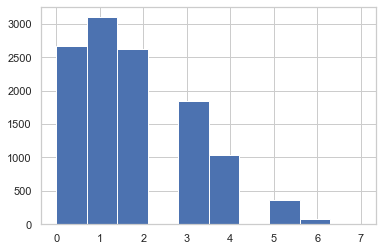

In [112]:
del pivoteo['TOTAL']
pivoteo.columns = [('NO_TIENE_TRX_' + col).replace(' ', '_') + '_MES_ACTUAL' for col in pivoteo.columns]

col_tiene = [_ for _ in pivoteo.columns if 'TIENE' in _]

for col in col_tiene:
    pivoteo[col] = pivoteo[col].apply(lambda _: 1 if _<= 100 else 0)

pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'] = pivoteo[col_tiene].sum(axis=1)
pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'] = pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'].apply(lambda _: len(col_tiene) - _)

pivoteo = pivoteo.reset_index()
pivoteo[pivoteo['PERIODO'].astype(int) >= 202007]['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'].hist()

In [113]:
def cut_2_2(val):
    if pd.isnull(val):
        return None
    
    if val <= 2:
        return 'hasta 2'
    elif val < 5:
        return '3 a 4'
    else:
        return '5 a mas'

    return 0

pivoteo['cat_CASHIN_ACTIVOS_MES_ACTUAL'] = pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'].apply(cut_2_2)
pivoteo['TIENE_SOLO_1_TIPO_CASH_IN_ACTIVO_ESTE_MES'] = pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'].apply(lambda _: _ == 1).astype(int)
pivoteo['TIENE_SOLO_2_TIPO_CASH_IN_ACTIVO_ESTE_MES'] = pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'].apply(lambda _: _ == 2).astype(int)
pivoteo['TIENE_SOLO_3_TIPO_CASH_IN_ACTIVO_ESTE_MES'] = pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'].apply(lambda _: _ == 3).astype(int)
pivoteo['TIENE_2_O_MENOS_TIPO_CASH_IN_ACTIVO_ESTE_MES'] = pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'].apply(lambda _: _ <= 2).astype(int)

In [114]:
base = base.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
del pivoteo
base.shape

(9211, 136)

#### MIRANDO 3  MESES TODOS LAS CATEGORIAS

In [115]:
for tramo in tramos:
    _3_meses_previos = tramo[3]
    print(tramo[0], _3_meses_previos)

202007 [202005, 202006, 202007]
202008 [202006, 202007, 202008]
202009 [202007, 202008, 202009]
202010 [202008, 202009, 202010]
202011 [202009, 202010, 202011]


In [116]:
pivoteo_grupo['PERIODO'].min(), pivoteo_grupo['PERIODO'].max()

('201904', '202012')

In [117]:
contador = 1
dicc = {col: list for col in pivoteo_grupo.columns if col.upper() not in ['TOTAL', 'PERIODO', 'COD_UNICO']}

for tramo in tramos:
    _3_meses_previos = tramo[3]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dicc)
    print("/"*100)
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]
    
    if contador == 1:
        acum_3 = _3m_actual.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
    
    print(acum_3.shape)
    contador += 1
    del _3m_actual
acum_3.head()

202007 [202005, 202006, 202007]
////////////////////////////////////////////////////////////////////////////////////////////////////
(1955, 10)
202008 [202006, 202007, 202008]
////////////////////////////////////////////////////////////////////////////////////////////////////
(3910, 10)
202009 [202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(5865, 10)
202010 [202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(7820, 10)
202011 [202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(9775, 10)


,COD_UNICO,COBRANZAS_,DEPOSITOS_,OPERACIONES_MESA_,OTROS_NO_TABLERO,PAGOS_RECIBIDOS_,POS_,RECAUDACION_,TRANSFERENCIAS_,PERIODO
0,0000002469,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 3457641.74]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 1731.0, 0.0]",202007
1,0000003392,"[0.0, 277203.98, 0.0]","[0.0, 0.0, 0.0]","[102510.0, 702400.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[2847147.57, 1362382.15, 573919.81]",202007
2,0000006114,"[0.0, 0.0, 0.0]","[0.0, 0.0, 121811.12]","[0.0, 1889847.25, 2757258.67]","[83.56, 83.64, 81.51]","[15538.1, 0.0, 2895.84]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 29762.6, 0.0]",202007
3,0000008318,"[0.0, 0.0, 0.0]","[0.0, 660.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[230.1, 0.0, 2644.93]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]",202007
4,0000038026,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 108810.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[7243.33, 0.0, 7061.12]",202007


In [118]:
acum_3 = acum_3.set_index(['COD_UNICO', 'PERIODO'])

for col in acum_3.columns:
    acum_3['_aux_TIENE_TRX_' + col + '_U3M'] = acum_3[col].apply(lambda _: 1 if sum(_) > 100 else 0)
    acum_3['_aux_TRX_MENOR_' + col + '_DE_U3M'] = acum_3[col].apply(lambda_min_u3m).astype(int)
    acum_3['_aux_TRX_CAIDA_SEGUIDA_' + col + '_U3M'] = acum_3[col].apply(lambda_caida_seguida_u3m).astype(int)
    acum_3['_aux_TRX_CAIDA_10PERCENT_' + col + '_MES_ANT'] = acum_3[col].apply(lambda_caida_10_percent).astype(int)
    acum_3['_aux_TRX_CAIDA_20PERCENT_' + col + '_MES_ANT'] = acum_3[col].apply(lambda_caida_20_percent).astype(int)
    acum_3['_aux_TRX_CAIDA_30PERCENT_' + col + '_MES_ANT'] = acum_3[col].apply(lambda_caida_30_percent).astype(int)
    acum_3['NRO_MESES_SIN_' + col + '_CASHIN'] = acum_3[col].apply(searhc_no_zero).astype(int)
    acum_3['TIENE_2_MESES_SIN_' + col + '_CASHIN'] = acum_3['NRO_MESES_SIN_' + col + '_CASHIN'].apply(lambda _: _ == 2).astype(int)
    acum_3['TIENE_MAS_DE_2_MESES_SIN_' + col + '_CASHIN'] = acum_3['NRO_MESES_SIN_' + col + '_CASHIN'].apply(lambda _: _ > 2).astype(int)
    acum_3['TIENE_MAS_DE_1_MES_SIN_' + col + '_CASHIN'] = acum_3['NRO_MESES_SIN_' + col + '_CASHIN'].apply(lambda _: _ > 1).astype(int)

acum_3['TIPOS_CASH_IN_ACTIVOS_U3M'] = acum_3[[col for col in acum_3.columns if '_aux_TIENE_TRX_' in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_IN_MENORES_DE_U3M'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_MENOR_' in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_IN_CAIDA_SEGUIDA_U3M'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_CAIDA_SEGUIDA_' in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_IN_CAIDA_10PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_CAIDA_10PERCENT_' in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_IN_CAIDA_20PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_CAIDA_20PERCENT_' in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_IN_CAIDA_30PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_CAIDA_30PERCENT_' in col]].sum(axis=1)

for col in [_ for _ in acum_3.columns if 'NO_CONSIDERADO' in _]:
    if col in acum_3.columns:
        del acum_3[col]

acum_3 = acum_3[[col for col in acum_3.columns if '_U3M' in col or '_MES_ANT' in col]]
acum_3.head()

,,_aux_TIENE_TRX_COBRANZAS__U3M,_aux_TRX_MENOR_COBRANZAS__DE_U3M,_aux_TRX_CAIDA_SEGUIDA_COBRANZAS__U3M,_aux_TRX_CAIDA_10PERCENT_COBRANZAS__MES_ANT,_aux_TRX_CAIDA_20PERCENT_COBRANZAS__MES_ANT,_aux_TRX_CAIDA_30PERCENT_COBRANZAS__MES_ANT,_aux_TIENE_TRX_DEPOSITOS__U3M,_aux_TRX_MENOR_DEPOSITOS__DE_U3M,_aux_TRX_CAIDA_SEGUIDA_DEPOSITOS__U3M,_aux_TRX_CAIDA_10PERCENT_DEPOSITOS__MES_ANT,...,_aux_TRX_CAIDA_SEGUIDA_TRANSFERENCIAS__U3M,_aux_TRX_CAIDA_10PERCENT_TRANSFERENCIAS__MES_ANT,_aux_TRX_CAIDA_20PERCENT_TRANSFERENCIAS__MES_ANT,_aux_TRX_CAIDA_30PERCENT_TRANSFERENCIAS__MES_ANT,TIPOS_CASH_IN_ACTIVOS_U3M,TRX_TIPOS_CASH_IN_MENORES_DE_U3M,TRX_TIPOS_CASH_IN_CAIDA_SEGUIDA_U3M,TRX_TIPOS_CASH_IN_CAIDA_10PERCENT_MES_ANT,TRX_TIPOS_CASH_IN_CAIDA_20PERCENT_MES_ANT,TRX_TIPOS_CASH_IN_CAIDA_30PERCENT_MES_ANT
COD_UNICO,PERIODO,,,,,,,,,,,,,,,,,,,,,
0000002469,202007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
0000003392,202007,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,3,1,1,1,1,1
0000006114,202007,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,5,0,1,0,0,0
0000008318,202007,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,2,0,0,0,0,0
0000038026,202007,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,2,0,1,0,0,0


<AxesSubplot:>

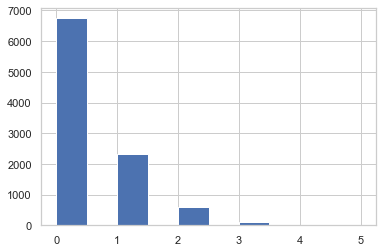

In [119]:
test = acum_3.reset_index()
test[test['PERIODO'].astype(int) >= 202007]['TRX_TIPOS_CASH_IN_MENORES_DE_U3M'].hist()

<AxesSubplot:>

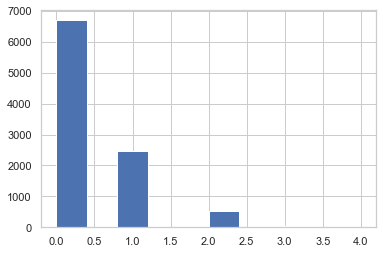

In [120]:
test[test['PERIODO'].astype(int) >= 202007]['TRX_TIPOS_CASH_IN_CAIDA_SEGUIDA_U3M'].hist()

<AxesSubplot:>

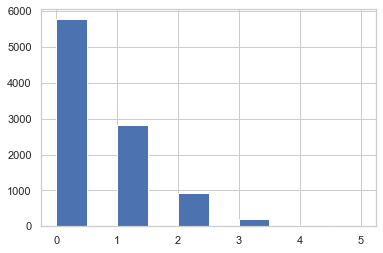

In [121]:
test[test['PERIODO'].astype(int) >= 202007]['TRX_TIPOS_CASH_IN_CAIDA_20PERCENT_MES_ANT'].hist()

In [122]:
#base[base['COD_UNICO'] == '0000038026']

In [123]:
del test
gc.collect()

44

In [124]:
acum_3 = acum_3.reset_index()
acum_3['PERIODO'] = acum_3['PERIODO'].astype(str)
base = base.merge(
    acum_3.reset_index(), how='left', on=['PERIODO', 'COD_UNICO']
)
del acum_3
base.shape

(9211, 191)

<AxesSubplot:>

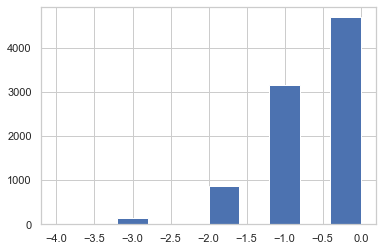

In [125]:
base['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'] = base['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'] - base['TIPOS_CASH_IN_ACTIVOS_U3M']

base[base['PERIODO'].astype(int) >= 202007]['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'].hist()

In [126]:
base['cut_0_TIENE_EL_MISMO_NRO_TIPOS_CAHIN_EN_U3M'] = base['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'].apply(lambda _: _ == 0).astype(int)
base['cut_1_DISMINUYO_1_TIPO_CASHIN_EN_U3M'] = base['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'].apply(lambda _: _ == -1).astype(int)
base['cut_2_DISMINUYO_2_TIPO_CASHIN_EN_U3M'] = base['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'].apply(lambda _: _ == -2).astype(int)

In [127]:
base['cut_1_TIENE_DISMINUCION_1_O_MAS_TIPOS_CASH_IN_U3M'] = base['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'].apply(lambda _: _<= -1).astype(int)
base['cut_2_TIENE_DISMINUCION_2_O_MAS_TIPOS_CASH_IN_U3M'] = base['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'].apply(lambda _: _<= -2).astype(int)
base['cut_3_TIENE_DISMINUCION_3_O_MAS_TIPOS_CASH_IN_U3M'] = base['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'].apply(lambda _: _<= -3).astype(int)

base['cut_0_NINGUN_INGRESO_CASHIN_U3M'] = base['TIPOS_CASH_IN_ACTIVOS_U3M'].apply(lambda _: _ == 0).astype(int)
base['cut_1_TIENE_AL_MENOS_1_TIPO_CASHIN_ACTIVO_U3M'] = base['TIPOS_CASH_IN_ACTIVOS_U3M'].apply(lambda _: _>= 1).astype(int)

In [128]:
base['cat_TIPOS_CASH_IN_ACTIVOS_U3M'] = base['TIPOS_CASH_IN_ACTIVOS_U3M'].apply(cut_2_2)

In [129]:
gc.collect()

88

In [130]:
#print(list(base.columns))

#### PIVOTEO POR CASH OUT

In [131]:
del pivoteo_grupo

In [132]:
pivoteo = pd.pivot_table(
    transac_cliente[transac_cliente['TIPO_CASH'] == 'CASH OUT'], 
    values='VOLUMEN_SOLES', index=['COD_UNICO'], columns=['GRUPO_N1', 'KPI', 'PERIODO'], aggfunc=np.sum, fill_value=0
).unstack().reset_index()
pivoteo.columns = ['GRUPO_N1', 'KPI', 'PERIODO', 'COD_UNICO', 'VOLUMEN_SOLES']

pivoteo = pd.pivot_table(
    pivoteo, 
    values='VOLUMEN_SOLES', index=['COD_UNICO', 'PERIODO'], columns=['GRUPO_N1', 'KPI'], aggfunc=np.sum, fill_value=0
)
pivoteo.columns = ['_'.join(list(col)).replace(' ', '_') for col in pivoteo]
pivoteo['TOTAL'] = pivoteo.sum(axis=1)

print(pivoteo.shape)
pivoteo.head(2)

(41223, 6)


OPERACIONES_MESA_  OTROS_NO_TABLERO  PAGO_DE_SERVICIOS_  \
COD_UNICO  PERIODO                                                            
0000002469 201904                 0.0            637.88                 0.0   
           201905                 0.0          15949.25                 0.0   

                    PAGOS_MASIVOS_  TRANSFERENCIAS_      TOTAL  
COD_UNICO  PERIODO                                              
0000002469 201904              0.0        494016.06  494653.94  
           201905              0.0        150004.03  165953.28

In [133]:
pivoteo_grupo = pivoteo.reset_index()
pivoteo_grupo.head(3)

,COD_UNICO,PERIODO,OPERACIONES_MESA_,OTROS_NO_TABLERO,PAGO_DE_SERVICIOS_,PAGOS_MASIVOS_,TRANSFERENCIAS_,TOTAL
0,0000002469,201904,0.0,637.88,0.0,0.0,494016.06,494653.94
1,0000002469,201905,0.0,15949.25,0.0,0.0,150004.03,165953.28
2,0000002469,201906,0.0,29086.38,0.0,0.0,466512.13,495598.51


In [134]:
del pivoteo['TOTAL']
pivoteo.columns = [('TIENE_TRX_' + col).replace(' ', '_') + '_CASH_OUT_MES_ACTUAL' for col in pivoteo.columns]

for col in pivoteo.columns:
    pivoteo[col] = pivoteo[col].apply(lambda _: 1 if _  > 100 else 0 )

pivoteo['TIPOS_CASHOUT_ACTIVOS_MES_ACTUAL'] = pivoteo[[_ for _ in pivoteo.columns if 'TIENE' in _]].sum(axis=1)
pivoteo = pivoteo.reset_index()
display(pivoteo.head(3))

,COD_UNICO,PERIODO,TIENE_TRX_OPERACIONES_MESA__CASH_OUT_MES_ACTUAL,TIENE_TRX_OTROS_NO_TABLERO_CASH_OUT_MES_ACTUAL,TIENE_TRX_PAGO_DE_SERVICIOS__CASH_OUT_MES_ACTUAL,TIENE_TRX_PAGOS_MASIVOS__CASH_OUT_MES_ACTUAL,TIENE_TRX_TRANSFERENCIAS__CASH_OUT_MES_ACTUAL,TIPOS_CASHOUT_ACTIVOS_MES_ACTUAL
0,0000002469,201904,0,1,0,0,1,2
1,0000002469,201905,0,1,0,0,1,2
2,0000002469,201906,0,1,0,0,1,2


In [135]:
base = base.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
del pivoteo
base.shape

(9211, 207)

In [136]:
contador = 1
dd = {k: list for k in pivoteo_grupo.columns if k not in ['PERIODO', 'COD_UNICO']}

for tramo in tramos:
    _3_meses_previos = tramo[3]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dd)
    _3m_actual.columns =  ['listado_' + '_'.join(_) if isinstance(_, tuple) else _ for _ in _3m_actual.columns]
    _3m_tipos = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).sum()
    _3m_tipos.columns = ['suma' + '_'.join(_) if isinstance(_, tuple) else _ for _ in _3m_tipos.columns]
    #_3m_actual = 
    #print(_3m_actual.head())
    print("/"*100)
    
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]
    _3m_tipos = _3m_tipos.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_tipos['PERIODO'] = tramo[0]
    if contador == 1:
        acum_3 = _3m_actual.copy()
        sum_3 = _3m_tipos.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
        sum_3 = pd.concat(
            [sum_3, _3m_tipos], axis=0
        )
        
    print(acum_3.shape, sum_3.shape)
    contador +=1
    del _3m_actual
    del _3m_tipos

202007 [202005, 202006, 202007]
////////////////////////////////////////////////////////////////////////////////////////////////////
(1963, 8) (1963, 8)
202008 [202006, 202007, 202008]
////////////////////////////////////////////////////////////////////////////////////////////////////
(3926, 8) (3926, 8)
202009 [202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(5889, 8) (5889, 8)
202010 [202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(7852, 8) (7852, 8)
202011 [202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(9815, 8) (9815, 8)


In [137]:
sum_3.head()

,COD_UNICO,OPERACIONES_MESA_,OTROS_NO_TABLERO,PAGO_DE_SERVICIOS_,PAGOS_MASIVOS_,TRANSFERENCIAS_,TOTAL,PERIODO
0,0000002469,0.0,2142.20,0.00,0.00,0.00,2142.20,202007
1,0000003392,102570.0,3705.54,7468.06,114815.35,4141958.59,4370517.54,202007
2,0000006114,7886200.0,727.87,8846.20,87060.52,16349.18,7999183.77,202007
3,0000008318,700020.0,1164.12,5289.00,33431.19,57277.98,797182.29,202007
4,0000037374,0.0,170.37,0.00,0.00,0.00,170.37,202007


In [138]:
sum_3 = sum_3.set_index(['COD_UNICO', 'PERIODO'])
for col in sum_3.columns:
    sum_3[col] = sum_3[col] / sum_3['TOTAL']
    
#del sum_3['TOTAL']

sum_3.columns = [('TRX_' + col).replace(' ', '_') + '_CASH_OUT_PERCENT_U3M' for col in sum_3.columns]
sum_3 = sum_3.reset_index()
sum_3.head(3)

,COD_UNICO,PERIODO,TRX_OPERACIONES_MESA__CASH_OUT_PERCENT_U3M,TRX_OTROS_NO_TABLERO_CASH_OUT_PERCENT_U3M,TRX_PAGO_DE_SERVICIOS__CASH_OUT_PERCENT_U3M,TRX_PAGOS_MASIVOS__CASH_OUT_PERCENT_U3M,TRX_TRANSFERENCIAS__CASH_OUT_PERCENT_U3M,TRX_TOTAL_CASH_OUT_PERCENT_U3M
0,0000002469,202007,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
1,0000003392,202007,0.023469,0.000848,0.001709,0.026270,0.947704,1.0
2,0000006114,202007,0.985876,0.000091,0.001106,0.010884,0.002044,1.0


In [139]:
del sum_3['TRX_TOTAL_CASH_OUT_PERCENT_U3M']
sum_3['PERIODO'] = sum_3['PERIODO'].astype(str)
base = base.merge(
    sum_3, how='left', on=['PERIODO', 'COD_UNICO']
)
del sum_3
base.head(2)

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,TIENE_TRX_OTROS_NO_TABLERO_CASH_OUT_MES_ACTUAL,TIENE_TRX_PAGO_DE_SERVICIOS__CASH_OUT_MES_ACTUAL,TIENE_TRX_PAGOS_MASIVOS__CASH_OUT_MES_ACTUAL,TIENE_TRX_TRANSFERENCIAS__CASH_OUT_MES_ACTUAL,TIPOS_CASHOUT_ACTIVOS_MES_ACTUAL,TRX_OPERACIONES_MESA__CASH_OUT_PERCENT_U3M,TRX_OTROS_NO_TABLERO_CASH_OUT_PERCENT_U3M,TRX_PAGO_DE_SERVICIOS__CASH_OUT_PERCENT_U3M,TRX_PAGOS_MASIVOS__CASH_OUT_PERCENT_U3M,TRX_TRANSFERENCIAS__CASH_OUT_PERCENT_U3M
0,202007,0011066687,20513578416,1,FARMACEUTICA OTARVASQ,0,0,1,0,0,...,1.0,0.0,0.0,1.0,2.0,0.0,0.790239,0.0,0.0,0.209761
1,202007,0011179155,20513550830,0,ESTINSA INDUSTRIAL,1,1,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.0,0.0,0.000000


In [140]:
acum_3.head()

,COD_UNICO,OPERACIONES_MESA_,OTROS_NO_TABLERO,PAGO_DE_SERVICIOS_,PAGOS_MASIVOS_,TRANSFERENCIAS_,TOTAL,PERIODO
0,0000002469,"[0.0, 0.0, 0.0]","[647.5, 789.89, 704.81]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[647.5, 789.89, 704.81]",202007
1,0000003392,"[102570.0, 0.0, 0.0]","[1032.0, 1983.26, 690.28]","[7468.06, 0.0, 0.0]","[35331.78, 25956.52, 53527.05]","[2465108.28, 1499173.26, 177677.05]","[2611510.1199999996, 1527113.04, 231894.38]",202007
2,0000006114,"[1883200.0, 2756000.0, 3247000.0]","[261.16, 232.78, 233.93]","[250.0, 0.0, 8596.2]","[27021.66, 24940.53, 35098.33]","[6.0, 6674.48, 9668.7]","[1910738.8199999998, 2787847.7899999996, 33005...",202007
3,0000008318,"[0.0, 0.0, 700020.0]","[238.21, 241.7, 684.21]","[0.0, 3708.0, 1581.0]","[8660.74, 8132.13, 16638.32]","[15734.27, 13727.4, 27816.31]","[24633.22, 25809.23, 746739.84]",202007
4,0000037374,"[0.0, 0.0, 0.0]","[55.71, 57.35, 57.31]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[55.71, 57.35, 57.31]",202007


In [141]:
acum_3 = acum_3.set_index(['COD_UNICO', 'PERIODO'])
for col in acum_3.columns:
    acum_3['_aux_TIENE_TRX_' + col + '_CASH_OUT_U3M'] = acum_3[col].apply(lambda _: 1 if sum(_) > 100 else 0)
    acum_3['_aux_TRX_CAIDA_SEGUIDA_' + col + '_U3M_CASH_OUT'] = acum_3[col].apply(lambda_caida_seguida_u3m).astype(int)
    acum_3['_aux_TRX_SUBIDA_SEGUIDA_' + col + '_U3M_CASH_OUT'] = acum_3[col].apply(lambda_subida_seguida_u3m).astype(int)   
    acum_3['_aux_TRX_MENOR_' + col + '_DE_U3M_CASH_OUT'] = acum_3[col].apply(lambda_min_u3m).astype(int) 
    acum_3['_aux_TRX_MAYOR_' + col + '_DE_U3M_CASH_OUT'] = acum_3[col].apply(lambda_max_u3m).astype(int)

    acum_3['_aux_TRX_CAIDA_10PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_caida_10_percent).astype(int)
    acum_3['_aux_TRX_CAIDA_20PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_caida_20_percent).astype(int)
    acum_3['_aux_TRX_CAIDA_30PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_caida_30_percent).astype(int)
    acum_3['_aux_TRX_SUBIDA_10PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_subida_10_percent).astype(int)
    acum_3['_aux_TRX_SUBIDA_20PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_subida_20_percent).astype(int)
    acum_3['_aux_TRX_SUBIDA_30PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_subida_30_percent).astype(int)
    acum_3['NRO_MESES_SIN_' + col + '_CASHOUT'] = acum_3[col].apply(searhc_no_zero).astype(int)
    acum_3['TIENE_2_MESES_SIN_' + col + '_CASHOUT'] = acum_3['NRO_MESES_SIN_' + col + '_CASHOUT'].apply(lambda _: _ == 2).astype(int)
    acum_3['TIENE_MAS_DE_2_MESES_SIN_' + col + '_CASHOUT'] = acum_3['NRO_MESES_SIN_' + col + '_CASHOUT'].apply(lambda _: _ > 2).astype(int)
    acum_3['TIENE_MAS_DE_1_MES_SIN_' + col + '_CASHOUT'] = acum_3['NRO_MESES_SIN_' + col + '_CASHOUT'].apply(lambda _: _ > 1).astype(int)
    
    
    if 'TOTAL' in col.upper():
        acum_3['TRX_NO_' + col + '_CASH_OUT_ESTE_MES'] = acum_3[col].apply(lambda_no_hay).astype(int)
        acum_3['TRX_NO_' + col + '_CASH_OUT_U2M'] = acum_3[col].apply(lambda_no_hay_u2m).astype(int)
        acum_3['TRX_NO_' + col + '_CASH_OUT_U3M'] = acum_3[col].apply(lambda_no_hay_u3m).astype(int)
        acum_3['TRX_CAIDA_10PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_caida_10_percent).astype(int)
        acum_3['TRX_CAIDA_20PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_caida_20_percent).astype(int)
        acum_3['TRX_CAIDA_30PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_caida_30_percent).astype(int)
        acum_3['TRX_CAIDA_40PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_caida_40_percent).astype(int)
        acum_3['TRX_SUBIDA_40PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_subida_40_percent).astype(int)
        acum_3['TRX_SUBIDA_30PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_subida_30_percent).astype(int)
        acum_3['TRX_SUBIDA_20PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_subida_20_percent).astype(int)
        acum_3['TRX_SUBIDA_10PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_subida_10_percent).astype(int)
    del acum_3[col]

acum_3 = acum_3[[col for col in acum_3.columns if '_CASH_OUT' in col]]
acum_3.tail()

,,_aux_TIENE_TRX_OPERACIONES_MESA__CASH_OUT_U3M,_aux_TRX_CAIDA_SEGUIDA_OPERACIONES_MESA__U3M_CASH_OUT,_aux_TRX_SUBIDA_SEGUIDA_OPERACIONES_MESA__U3M_CASH_OUT,_aux_TRX_MENOR_OPERACIONES_MESA__DE_U3M_CASH_OUT,_aux_TRX_MAYOR_OPERACIONES_MESA__DE_U3M_CASH_OUT,_aux_TRX_CAIDA_10PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,_aux_TRX_CAIDA_20PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,_aux_TRX_CAIDA_30PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,_aux_TRX_SUBIDA_10PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,_aux_TRX_SUBIDA_20PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,...,TRX_NO_TOTAL_CASH_OUT_U2M,TRX_NO_TOTAL_CASH_OUT_U3M,TRX_CAIDA_10PERCENT_TOTAL_CASH_OUT_MES_ANT,TRX_CAIDA_20PERCENT_TOTAL_CASH_OUT_MES_ANT,TRX_CAIDA_30PERCENT_TOTAL_CASH_OUT_MES_ANT,TRX_CAIDA_40PERCENT_TOTAL_CASH_OUT_MES_ANT,TRX_SUBIDA_40PERCENT_TOTAL_CASH_OUT_MES_ANT,TRX_SUBIDA_30PERCENT_TOTAL_CASH_OUT_MES_ANT,TRX_SUBIDA_20PERCENT_TOTAL_CASH_OUT_MES_ANT,TRX_SUBIDA_10PERCENT_TOTAL_CASH_OUT_MES_ANT
COD_UNICO,PERIODO,,,,,,,,,,,,,,,,,,,,,
0017232155,202011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0017239443,202011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0017311917,202011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0017316313,202011,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
0017415833,202011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
acum_3['TRX_TIPOS_CASH_OUT_MENORES_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'MENOR' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_MAYORES_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'MAYOR' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_CAIDA_SEGUIDA_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'CAIDA_SEGUIDA' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_SUBIDA_SEGUIDA_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'SUBIDA_SEGUIDA' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_U3M'] = acum_3[[col for col in acum_3.columns if '_aux_TIENE_TRX_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_CAIDA_10PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_CAIDA_10PERCENT_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_CAIDA_20PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_CAIDA_20PERCENT_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_CAIDA_30PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_CAIDA_30PERCENT_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_SUBIDA_10PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_SUBIDA_10PERCENT_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_SUBIDA_20PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_SUBIDA_20PERCENT_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_SUBIDA_30PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_SUBIDA_30PERCENT_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_SUBIDA_40PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_SUBIDA_40PERCENT_' in col and 'TOTAL' not in col]].sum(axis=1)


acum_3.tail()

,,_aux_TIENE_TRX_OPERACIONES_MESA__CASH_OUT_U3M,_aux_TRX_CAIDA_SEGUIDA_OPERACIONES_MESA__U3M_CASH_OUT,_aux_TRX_SUBIDA_SEGUIDA_OPERACIONES_MESA__U3M_CASH_OUT,_aux_TRX_MENOR_OPERACIONES_MESA__DE_U3M_CASH_OUT,_aux_TRX_MAYOR_OPERACIONES_MESA__DE_U3M_CASH_OUT,_aux_TRX_CAIDA_10PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,_aux_TRX_CAIDA_20PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,_aux_TRX_CAIDA_30PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,_aux_TRX_SUBIDA_10PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,_aux_TRX_SUBIDA_20PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,...,TRX_TIPOS_CASH_OUT_CAIDA_SEGUIDA_DE_U3M,TRX_TIPOS_CASH_OUT_SUBIDA_SEGUIDA_DE_U3M,TRX_TIPOS_CASH_OUT_U3M,TRX_TIPOS_CASH_OUT_CAIDA_10PERCENT_MES_ANT,TRX_TIPOS_CASH_OUT_CAIDA_20PERCENT_MES_ANT,TRX_TIPOS_CASH_OUT_CAIDA_30PERCENT_MES_ANT,TRX_TIPOS_CASH_OUT_SUBIDA_10PERCENT_MES_ANT,TRX_TIPOS_CASH_OUT_SUBIDA_20PERCENT_MES_ANT,TRX_TIPOS_CASH_OUT_SUBIDA_30PERCENT_MES_ANT,TRX_TIPOS_CASH_OUT_SUBIDA_40PERCENT_MES_ANT
COD_UNICO,PERIODO,,,,,,,,,,,,,,,,,,,,,
0017232155,202011,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0.0
0017239443,202011,0,0,0,0,0,0,0,0,0,0,...,0,1,2,0,0,0,0,0,0,0.0
0017311917,202011,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.0
0017316313,202011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
0017415833,202011,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.0


In [143]:
#TRX_TIPOS_CASH_OUT_U3M

In [144]:
acum_3 = acum_3.reset_index()
acum_3['PERIODO'] = acum_3['PERIODO'].astype(str)
base = base.merge(
    acum_3.reset_index(), how='left', on=['PERIODO', 'COD_UNICO']
)
del acum_3
base.shape

(9211, 302)

In [145]:
base['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'] =  base['TIPOS_CASHOUT_ACTIVOS_MES_ACTUAL'] - base['TRX_TIPOS_CASH_OUT_U3M']

<AxesSubplot:>

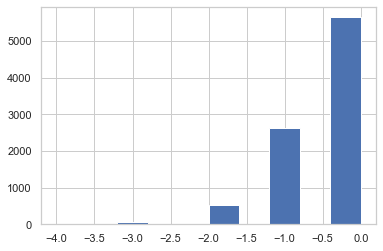

In [146]:
base[base['PERIODO'].astype(int) >= 202007]['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'].hist()

In [147]:
base['cut_0_NO_DISMINUYO_TIPOS_CASH_OUT_U3M'] = base['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'].apply(lambda _: _ == 0).astype(int)
base['cut_1_DISMINUYO_1_TIPOS_CASH_OUT_U3M'] = base['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'].apply(lambda _: _ == -1).astype(int)
base['cut_2_DISMINUYO_1_TIPOS_CASH_OUT_U3M'] = base['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'].apply(lambda _: _ == -2).astype(int)
base['TIENE_DISMINUCION_1_O_MAS_TIPOS_CASH_OUT_U3M'] = base['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'].apply(lambda _: _ <= -1).astype(int)
base['TIENE_DISMINUCION_2_O_MAS_TIPOS_CASH_OUT_U3M'] = base['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'].apply(lambda _: _ <= -2).astype(int)
base['TIENE_DISMINUCION_3_O_MAS_TIPOS_CASH_OUT_U3M'] = base['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'].apply(lambda _: _ <= -3).astype(int)

### RAZON ENTRE CASH IN - CASH OUT

In [148]:
pivoteo = pd.pivot_table(
    transac_cliente, 
    values='VOLUMEN_SOLES', index=['COD_UNICO', 'PERIODO'], columns=['TIPO_CASH'], aggfunc=np.sum, fill_value=0
)
pivoteo.columns = [col.replace(' ', '_') + '_TOTAL_MES' for col in pivoteo.columns]

pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'] = pivoteo[['CASH_IN_TOTAL_MES', 'CASH_OUT_TOTAL_MES']].apply(
    lambda _: get_div_means_perios(_[0] , _[1]), axis=1)
pivoteo = pivoteo.reset_index()

pivoteo.head(3)

,COD_UNICO,PERIODO,CASH_IN_TOTAL_MES,CASH_OUT_TOTAL_MES,PERCENT_MONTO_CASH_IN_OVER_CASH_OUT
0,0000002469,201904,342654.51,494653.94,0.692716
1,0000002469,201905,163519.20,165953.28,0.985333
2,0000002469,201906,521756.87,495598.51,1.052781


In [149]:
pivoteo['cut_01_INGRESO_SUPERA_EGGRESO_SOLO_EN_10PERCENT_O_MENOS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ > 1 and _ <= 1.1).astype(int)
pivoteo['cut_02_INGRESO_SUPERA_EGGRESO_SOLO_EN_20PERCENT_O_MENOS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ > 1 and _ <= 2.1).astype(int)
pivoteo['cut_09_EGRESO_SUPERA_INGRESO_EN_10PERCENT_O_MAS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ < 0.9).astype(int)
pivoteo['cut_08_EGRESO_SUPERA_INGRESO_EN_20PERCENT_O_MAS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ < 0.8).astype(int)
pivoteo['cut_07_EGRESO_SUPERA_INGRESO_EN_30PERCENT_O_MAS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ < 0.7).astype(int)
pivoteo['cut_06_EGRESO_SUPERA_INGRESO_EN_40PERCENT_O_MAS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ < 0.6).astype(int)
pivoteo['cut_06_EGRESO_SUPERA_INGRESO_EN_50PERCENT_O_MAS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ < 0.5).astype(int)
pivoteo['cut_06_EGRESO_SUPERA_INGRESO_EN_60PERCENT_O_MAS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ < 0.4).astype(int)

In [150]:
pivoteo['DIFF_CASHIN_OVER_CASHOUT'] = pivoteo['CASH_IN_TOTAL_MES'] - pivoteo['CASH_OUT_TOTAL_MES']
pivoteo.head(3)

,COD_UNICO,PERIODO,CASH_IN_TOTAL_MES,CASH_OUT_TOTAL_MES,PERCENT_MONTO_CASH_IN_OVER_CASH_OUT,cut_01_INGRESO_SUPERA_EGGRESO_SOLO_EN_10PERCENT_O_MENOS,cut_02_INGRESO_SUPERA_EGGRESO_SOLO_EN_20PERCENT_O_MENOS,cut_09_EGRESO_SUPERA_INGRESO_EN_10PERCENT_O_MAS,cut_08_EGRESO_SUPERA_INGRESO_EN_20PERCENT_O_MAS,cut_07_EGRESO_SUPERA_INGRESO_EN_30PERCENT_O_MAS,cut_06_EGRESO_SUPERA_INGRESO_EN_40PERCENT_O_MAS,cut_06_EGRESO_SUPERA_INGRESO_EN_50PERCENT_O_MAS,cut_06_EGRESO_SUPERA_INGRESO_EN_60PERCENT_O_MAS,DIFF_CASHIN_OVER_CASHOUT
0,0000002469,201904,342654.51,494653.94,0.692716,0,0,1,1,1,0,0,0,-151999.43
1,0000002469,201905,163519.20,165953.28,0.985333,0,0,0,0,0,0,0,0,-2434.08
2,0000002469,201906,521756.87,495598.51,1.052781,1,1,0,0,0,0,0,0,26158.36


In [151]:
base = base.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
#del pivoteo
base.head()

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,PERCENT_MONTO_CASH_IN_OVER_CASH_OUT,cut_01_INGRESO_SUPERA_EGGRESO_SOLO_EN_10PERCENT_O_MENOS,cut_02_INGRESO_SUPERA_EGGRESO_SOLO_EN_20PERCENT_O_MENOS,cut_09_EGRESO_SUPERA_INGRESO_EN_10PERCENT_O_MAS,cut_08_EGRESO_SUPERA_INGRESO_EN_20PERCENT_O_MAS,cut_07_EGRESO_SUPERA_INGRESO_EN_30PERCENT_O_MAS,cut_06_EGRESO_SUPERA_INGRESO_EN_40PERCENT_O_MAS,cut_06_EGRESO_SUPERA_INGRESO_EN_50PERCENT_O_MAS,cut_06_EGRESO_SUPERA_INGRESO_EN_60PERCENT_O_MAS,DIFF_CASHIN_OVER_CASHOUT
0,202007,0011066687,20513578416,1,FARMACEUTICA OTARVASQ,0,0,1,0,0,...,1.289520,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7308.48
1,202007,0011179155,20513550830,0,ESTINSA INDUSTRIAL,1,1,0,0,0,...,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-141.50
2,202007,0011197692,20519022461,0,CONSORCIO ELECTRICO INDUSTRIAL,1,0,0,0,0,...,1.104955,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56748.10
3,202007,0011227802,20513441208,0,LABORATORIOS OFTALMICOS,0,1,0,0,0,...,1.037797,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,52771.18
4,202007,0011429380,20352280802,0,COMBUSTIBLES DEL ORIENTE,0,0,0,0,0,...,0.386928,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-827677.41


In [152]:
pivoteo.shape

(37641, 14)

In [153]:
pivoteo = pd.pivot_table(
    pivoteo, 
    values='DIFF_CASHIN_OVER_CASHOUT', index=['COD_UNICO'], columns=['PERIODO'], aggfunc=np.max, fill_value=0
).unstack().reset_index()
pivoteo.columns = ['PERIODO', 'COD_UNICO', 'DIFF_CASH_IN_CASH_OUT']

In [154]:
pivoteo.head()

,PERIODO,COD_UNICO,DIFF_CASH_IN_CASH_OUT
0,201904,0000002469,-151999.43
1,201904,0000003392,1631369.77
2,201904,0000006114,95642.10
3,201904,0000008318,-400741.82
4,201904,0000037374,-53.78


In [155]:
contador = 1
dicc = {
    'DIFF_CASH_IN_CASH_OUT': list
}

for tramo in tramos:
    _3_meses_previos = tramo[3]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = pivoteo[pivoteo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dicc)
    print("/"*100)
    
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]
    
    if contador == 1:
        acum_3 = _3m_actual.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
    
    print(acum_3.shape, )
    contador +=1
    del _3m_actual
acum_3.head()

202007 [202005, 202006, 202007]
////////////////////////////////////////////////////////////////////////////////////////////////////
(1966, 3)
202008 [202006, 202007, 202008]
////////////////////////////////////////////////////////////////////////////////////////////////////
(3932, 3)
202009 [202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(5898, 3)
202010 [202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(7864, 3)
202011 [202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(9830, 3)


,COD_UNICO,DIFF_CASH_IN_CASH_OUT,PERIODO
0,0000002469,"[-647.5, 941.11, 3456936.93]",202007
1,0000003392,"[338147.4500000002, 814873.0899999999, 342025....",202007
2,0000006114,"[-1895117.16, -868154.2999999996, -418550.0200...",202007
3,0000008318,"[-24403.120000000003, -25149.23, -744094.90999...",202007
4,0000037374,"[-55.71, -57.35, -57.31]",202007


In [156]:
acum_3['TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_U3M'] = acum_3['DIFF_CASH_IN_CASH_OUT'].apply(lambda _: 1 if _[0] < 0 and  _[1] < 0 and  _[2] < 0 else 0)
acum_3['TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_U2M'] = acum_3['DIFF_CASH_IN_CASH_OUT'].apply(lambda _: 1 if _[1] < 0 and  _[2] < 0 else 0)
acum_3['TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_ESTE_MES'] = acum_3['DIFF_CASH_IN_CASH_OUT'].apply(lambda _: 1 if  _[2] < 0 else 0)
acum_3['TRX_DIFF_CASHIN_CASHOUT_MENOR_DE_U3M'] = acum_3['DIFF_CASH_IN_CASH_OUT'].apply(lambda_min_u3m).astype(int)
del acum_3['DIFF_CASH_IN_CASH_OUT']
acum_3.head(20)

,COD_UNICO,PERIODO,TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_U3M,TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_U2M,TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_ESTE_MES,TRX_DIFF_CASHIN_CASHOUT_MENOR_DE_U3M
0,0000002469,202007,0,0,0,0
1,0000003392,202007,0,0,0,0
2,0000006114,202007,1,1,1,0
3,0000008318,202007,1,1,1,0
4,0000037374,202007,1,1,1,0
5,0000038026,202007,0,0,0,0
6,0000039982,202007,0,1,1,0
7,0000042044,202007,0,0,0,0
8,0000042432,202007,1,1,1,0
9,0000043141,202007,0,0,1,0


In [157]:
acum_3.shape, base.shape, acum_3.groupby(by=['PERIODO', 'COD_UNICO']).size().shape,  base.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

((9830, 6), (9211, 321), (9830,), (9211,))

In [158]:
acum_3['PERIODO'] = acum_3['PERIODO'] .astype(str)
base = base.merge(
    acum_3, how='left', on=['PERIODO', 'COD_UNICO']
)

In [159]:
pivoteo.columns

Index(['PERIODO', 'COD_UNICO', 'DIFF_CASH_IN_CASH_OUT'], dtype='object')

### JUGANDO CON LA RZON ENTRE INGRESOS TOTAL Y EGRESOS TOTOALES

In [160]:
pivoteo = pd.pivot_table(
    transac_cliente, 
    values='VOLUMEN_SOLES', index=['COD_UNICO', 'PERIODO'], columns=['TIPO_CASH'], aggfunc=np.sum, fill_value=0
)
pivoteo.columns = [col.replace(' ', '_') + '_TOTAL_MES' for col in pivoteo.columns]

pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'] = pivoteo[['CASH_IN_TOTAL_MES', 'CASH_OUT_TOTAL_MES']].apply(
    lambda _: get_div_means_perios(_[0] , _[1]), axis=1)
pivoteo = pivoteo.reset_index()[['COD_UNICO', 'PERIODO', 'PERCENT_MONTO_CASH_IN_OVER_CASH_OUT']]


pivoteo = pd.pivot_table(
    pivoteo, 
    values='PERCENT_MONTO_CASH_IN_OVER_CASH_OUT', index=['COD_UNICO'], columns=['PERIODO'], aggfunc=np.max, fill_value=0
).unstack().reset_index()
pivoteo.columns = ['PERIODO', 'COD_UNICO', 'PERCENT_MONTO_CASH_IN_OVER_CASH_OUT']

pivoteo.head(3)

,PERIODO,COD_UNICO,PERCENT_MONTO_CASH_IN_OVER_CASH_OUT
0,201904,0000002469,0.692716
1,201904,0000003392,2.138814
2,201904,0000006114,1.019986


In [161]:
contador = 1
dicc = {
    'PERCENT_MONTO_CASH_IN_OVER_CASH_OUT': list
}

for tramo in tramos:
    _3_meses_previos = tramo[3]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = pivoteo[pivoteo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dicc)
    print("/"*100)
    
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]
    
    if contador == 1:
        acum_3 = _3m_actual.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
    
    print(acum_3.shape, )
    contador +=1
    del _3m_actual
acum_3.head()

202007 [202005, 202006, 202007]
////////////////////////////////////////////////////////////////////////////////////////////////////
(1966, 3)
202008 [202006, 202007, 202008]
////////////////////////////////////////////////////////////////////////////////////////////////////
(3932, 3)
202009 [202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(5898, 3)
202010 [202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(7864, 3)
202011 [202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(9830, 3)


,COD_UNICO,PERCENT_MONTO_CASH_IN_OVER_CASH_OUT,PERIODO
0,0000002469,"[0.0, 2.19144437833116, 4905.778493494701]",202007
1,0000003392,"[1.129483492103029, 1.5336036486205369, 2.4749...",202007
2,0000006114,"[0.008175717076811157, 0.6885933647044626, 0.8...",202007
3,0000008318,"[0.009341044329567956, 0.025572246827975882, 0...",202007
4,0000037374,"[0.0, 0.0, 0.0]",202007


In [162]:
acum_3.head(5)

,COD_UNICO,PERCENT_MONTO_CASH_IN_OVER_CASH_OUT,PERIODO
0,0000002469,"[0.0, 2.19144437833116, 4905.778493494701]",202007
1,0000003392,"[1.129483492103029, 1.5336036486205369, 2.4749...",202007
2,0000006114,"[0.008175717076811157, 0.6885933647044626, 0.8...",202007
3,0000008318,"[0.009341044329567956, 0.025572246827975882, 0...",202007
4,0000037374,"[0.0, 0.0, 0.0]",202007


In [163]:
def menor_a_u3m(listado, treshold):
    return int(all([_ != 0 and _ <= treshold for _ in listado]))

def menor_a_u3m_or_null(listado, treshold):
    return int(all([_ == 0 or _ <= treshold for _ in listado]))

acum_3['cut_110_INGRESO_SUPERA_EN_SOLO_1OPERCENT_EGRESOS_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: menor_a_u3m(_, 1.1))
acum_3['cut_120_INGRESO_SUPERA_EN_SOLO_1OPERCENT_EGRESOS_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: menor_a_u3m(_, 1.2))
acum_3['cut_099_EGRESO_SUPERA_INGRESOS_SEGUIDO_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: menor_a_u3m(_, 0.99))
acum_3['cut_09_EGRESO_SUPERA_INGRESOS_10PERCENT_SEGUIDO_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: menor_a_u3m(_, 0.9))
acum_3['cut_08_EGRESO_SUPERA_INGRESOS_20PERCENT_SEGUIDO_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: menor_a_u3m(_, 0.8))
acum_3['cut_07_EGRESO_SUPERA_INGRESOS_30PERCENT_SEGUIDO_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: menor_a_u3m(_, 0.7))
acum_3['cut_06_EGRESO_SUPERA_INGRESOS_40PERCENT_SEGUIDO_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: menor_a_u3m(_, 0.6))
acum_3['TIENE_AUMENTO_SEGUIDO_SUPERA_EGRESO_A_INGRESO_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda_caida_seguida_u3m).astype(int)
 

acum_3['cut_099_EGRESO_SUPERA_INGRESOS_SEGUIDO_O_NO_CASHIN_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(
    lambda _: menor_a_u3m_or_null(_, 0.99))
acum_3['cut_09_EGRESO_SUPERA_INGRESOS_10PERCENT_SEGUIDO_O_NO_CASHIN_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(
    lambda _: menor_a_u3m_or_null(_, 0.9))
acum_3['cut_08_EGRESO_SUPERA_INGRESOS_20PERCENT_SEGUIDO_O_NO_CASHIN_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(
    lambda _: menor_a_u3m_or_null(_, 0.8))
acum_3['cut_07_EGRESO_SUPERA_INGRESOS_30PERCENT_SEGUIDO_O_NO_CASHIN_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(
    lambda _: menor_a_u3m_or_null(_, 0.7))
acum_3['cut_06_EGRESO_SUPERA_INGRESOS_40PERCENT_SEGUIDO_O_NO_CASHIN_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(
    lambda _: menor_a_u3m_or_null(_, 0.6))
#del acum_3['DIFF_CASH_IN_CASH_OUT']

acum_3[acum_3['PERIODO'].astype(int) >= 202007]['TIENE_AUMENTO_SEGUIDO_SUPERA_EGRESO_A_INGRESO_U3M'].value_counts()

0    9722
1     108
Name: TIENE_AUMENTO_SEGUIDO_SUPERA_EGRESO_A_INGRESO_U3M, dtype: int64

In [164]:
acum_3.shape, base.shape, acum_3.groupby(by=['PERIODO', 'COD_UNICO']).size().shape,  base.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

((9830, 16), (9211, 325), (9830,), (9211,))

### RAZON NUMERO DE TRANSACCIONES

In [165]:
pivoteo_cash = pd.pivot_table(
    transac_cliente, 
    values='CANT_TRX', index=['COD_UNICO', 'PERIODO'], columns=['TIPO_CASH'], aggfunc=np.sum, fill_value=0
)
pivoteo_cash.columns = [('CANTIDAD_TRX_' + col).replace(' ', '_') + '_PERCENT' for col in pivoteo_cash.columns]

pivoteo_cash['PERCENT_CANT_TRX_CASH_IN_OVER_CASH_OUT'] = pivoteo_cash[
    ['CANTIDAD_TRX_CASH_IN_PERCENT', 'CANTIDAD_TRX_CASH_OUT_PERCENT']].apply(lambda _: get_div_means_perios(_[0], _[1]), axis=1)

pivoteo_cash['total'] = pivoteo_cash.sum(axis=1)
for col in pivoteo_cash.columns:
    if 'OVER' not in col.upper():
        pivoteo_cash[col] = pivoteo_cash[col] / pivoteo_cash['total']

del pivoteo_cash['total']

pivoteo_cash = pivoteo_cash.reset_index().fillna(0)
pivoteo_cash.tail()

,COD_UNICO,PERIODO,CANTIDAD_TRX_CASH_IN_PERCENT,CANTIDAD_TRX_CASH_OUT_PERCENT,PERCENT_CANT_TRX_CASH_IN_OVER_CASH_OUT
37636,0017311917,202011,0.062241,0.933610,0.066667
37637,0017311917,202012,0.000000,1.000000,0.000000
37638,0017316313,202011,0.230769,0.692308,0.333333
37639,0017415833,202011,0.393258,0.550562,0.714286
37640,0017415833,202012,0.000000,1.000000,0.000000


In [166]:
base = base.merge(
    pivoteo_cash, how='left', on=['PERIODO', 'COD_UNICO']
)
del pivoteo_cash
base.head()

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,cut_06_EGRESO_SUPERA_INGRESO_EN_50PERCENT_O_MAS,cut_06_EGRESO_SUPERA_INGRESO_EN_60PERCENT_O_MAS,DIFF_CASHIN_OVER_CASHOUT,TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_U3M,TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_U2M,TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_ESTE_MES,TRX_DIFF_CASHIN_CASHOUT_MENOR_DE_U3M,CANTIDAD_TRX_CASH_IN_PERCENT,CANTIDAD_TRX_CASH_OUT_PERCENT,PERCENT_CANT_TRX_CASH_IN_OVER_CASH_OUT
0,202007,0011066687,20513578416,1,FARMACEUTICA OTARVASQ,0,0,1,0,0,...,0.0,0.0,7308.48,0.0,0.0,0.0,0.0,0.131980,0.857868,0.153846
1,202007,0011179155,20513550830,0,ESTINSA INDUSTRIAL,1,1,0,0,0,...,1.0,1.0,-141.50,0.0,1.0,1.0,0.0,0.000000,1.000000,0.000000
2,202007,0011197692,20519022461,0,CONSORCIO ELECTRICO INDUSTRIAL,1,0,0,0,0,...,0.0,0.0,56748.10,0.0,0.0,0.0,0.0,0.366367,0.629894,0.581633
3,202007,0011227802,20513441208,0,LABORATORIOS OFTALMICOS,0,1,0,0,0,...,0.0,0.0,52771.18,0.0,0.0,0.0,0.0,0.470971,0.521432,0.903226
4,202007,0011429380,20352280802,0,COMBUSTIBLES DEL ORIENTE,0,0,0,0,0,...,1.0,1.0,-827677.41,0.0,0.0,1.0,0.0,0.271570,0.724187,0.375000


In [167]:
base.shape

(9211, 328)

### Probando rangos de periodo para ANALISIS DE VARACION DE CASH IN

In [168]:
transac_cliente.columns

Index(['ANIO', 'PERIODO', 'COD_UNICO', 'TIPO_CASH', 'KPI', 'GRUPO_N1',
       'CANT_TRX', 'VOLUMEN_SOLES', 'MAX_FECHA_INFORMACION'],
      dtype='object')

In [169]:
def generate_listado_u3m(data, col_name, values='CANT_TRX', index=['COD_UNICO'], columns=['PERIODO'], aggfunc=np.max):
    pivoteo = pd.pivot_table(
        data, 
        values=values, index=index, columns=columns, aggfunc=aggfunc, fill_value=0
    ).unstack().reset_index()
    
    pivoteo.columns = columns + index + [col_name]
    #display(pivoteo.head())
    contador = 1
    dicc = { col_name: list }
    
    for tramo in tramos:
        _3_meses_previos = tramo[1][:-2]
        print(tramo[0], _3_meses_previos)

        _3m_actual = pivoteo[pivoteo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dicc)

        _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
        _3m_actual['PERIODO'] = tramo[0]

        if contador == 1:
            acum_3 = _3m_actual.copy()
        else:
            acum_3 = pd.concat(
                [acum_3, _3m_actual], axis=0
            )

        print(acum_3.shape, )
        contador +=1
        del _3m_actual
    del pivoteo
    return acum_3

acum_3 = generate_listado_u3m(
    transac_cliente[(transac_cliente['TIPO_CASH'] == 'CASH IN') &  (transac_cliente['VOLUMEN_SOLES'] > 100)],
    'CANT_TRX_CASH_IN_TOTAL_MES', values='CANT_TRX', index=['COD_UNICO'], columns=['PERIODO'], aggfunc=np.max
)
acum_3.tail(58)

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(1952, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(3904, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(5856, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(7808, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(9760, 3)


,COD_UNICO,CANT_TRX_CASH_IN_TOTAL_MES,PERIODO
1894,0016347789,"[3, 2, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1]",202011
1895,0016350584,"[0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2]",202011
1896,0016350866,"[0, 0, 1, 0, 0, 1, 0, 2, 3, 2, 1, 2]",202011
1897,0016355793,"[1, 1, 1, 3, 2, 0, 6, 4, 2, 2, 3, 4]",202011
1898,0016359742,"[2, 1, 2, 2, 1, 2, 0, 2, 3, 3, 2, 0]",202011
1899,0016364109,"[0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 3, 4]",202011
1900,0016376276,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1]",202011
1901,0016376605,"[1, 1, 1, 1, 0, 2, 1, 0, 3, 1, 1, 1]",202011
1902,0016387975,"[0, 5, 1, 7, 1, 3, 4, 1, 3, 3, 1, 2]",202011
1903,0016390037,"[0, 0, 0, 2, 11, 6, 19, 17, 7, 3, 4, 0]",202011


In [170]:
print(
    'mes cerrado',tramos[-3][0],  '\n', '-'*100, '\n', tramos[-3][1],  '\n',  '-'*100,  '\n',tramos[-3][-2],  '\n',  '-'*100,  '\n',tramos[-3][-1]
)

mes cerrado 202009 
 ---------------------------------------------------------------------------------------------------- 
 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011] 
 ---------------------------------------------------------------------------------------------------- 
 [201910, 201911] 
 ---------------------------------------------------------------------------------------------------- 
 [202010, 202011]


### AGRUPACION POR CLIENTE - PERIODO

In [171]:
periodo_actual = datetime.now().strftime('%Y%m')
periodo_actual

'202012'

In [172]:
group_periodo_cash_in = transac_cliente[transac_cliente['KPI'] == ''].groupby(
    by=['TIPO_CASH','PERIODO'])['VOLUMEN_SOLES'].sum().reset_index()
group_periodo_cash_in.head()

,TIPO_CASH,PERIODO,VOLUMEN_SOLES
0,CASH IN,201904,1.667910e+09
1,CASH IN,201905,1.816986e+09
2,CASH IN,201906,1.594541e+09
3,CASH IN,201907,1.633710e+09
4,CASH IN,201908,1.535690e+09


<AxesSubplot:xlabel='PERIODO', ylabel='VOLUMEN_SOLES'>

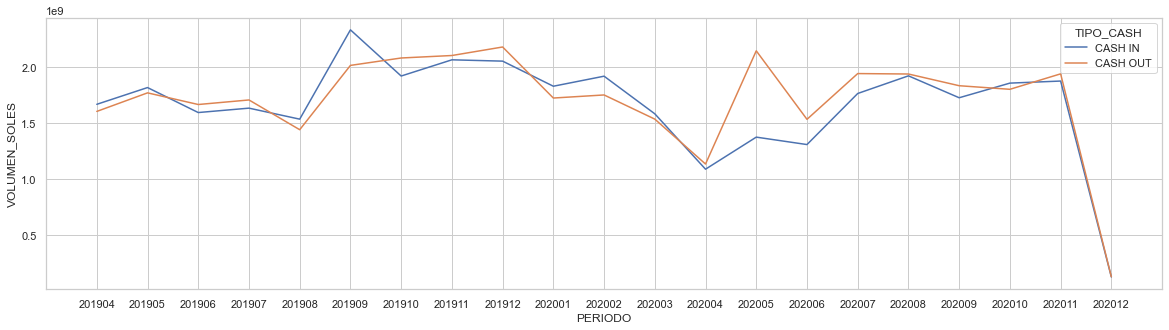

In [173]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
sns.lineplot(
    data=group_periodo_cash_in[group_periodo_cash_in['PERIODO'].astype(int) >= 201904],
    x="PERIODO", y="VOLUMEN_SOLES", ax=axes, hue='TIPO_CASH'
)

In [174]:
transac_cliente['ANIO'].value_counts()

2020    97951
2019    75008
Name: ANIO, dtype: int64

In [175]:
transac_cliente['MONTH'] = transac_cliente['PERIODO'].apply(lambda _: _[-2:])
transac_cliente['MONTH'].value_counts()

11    17895
09    17480
10    17437
07    17220
08    17055
05    16431
06    16304
04    14759
12    12859
01     8711
02     8488
03     8320
Name: MONTH, dtype: int64

In [176]:
cash_in_cliente = transac_cliente[transac_cliente['TIPO_CASH'] == 'CASH IN']
cash_in_cliente.shape, transac_cliente.shape, cash_in_cliente['COD_UNICO'].unique().shape, transac_cliente['COD_UNICO'].unique().shape

((79757, 10), (172959, 10), (1955,), (1966,))

### CLientesnque solo tiene CASH OUT

In [177]:
set(transac_cliente['COD_UNICO'].unique()) - set(cash_in_cliente['COD_UNICO'].unique())

{'0000037374',
 '0008939975',
 '0009980656',
 '0011868669',
 '0012984101',
 '0013318420',
 '0013619339',
 '0015242107',
 '0015559992',
 '0015955076',
 '0016568364'}

In [178]:
cash_in_cliente.head()

,ANIO,PERIODO,COD_UNICO,TIPO_CASH,KPI,GRUPO_N1,CANT_TRX,VOLUMEN_SOLES,MAX_FECHA_INFORMACION,MONTH
0,2019,201907,0015994198,CASH IN,NO_TABLERO,OTROS,6,393974.84,20190726,07
3,2019,201907,0016145237,CASH IN,,DEPOSITOS,1,50.00,20190722,07
4,2019,201907,0016231005,CASH IN,,PAGOS RECIBIDOS,1,5.00,20190731,07
6,2019,201908,0000008318,CASH IN,,DEPOSITOS,1,4361.00,20190823,08
8,2019,201908,0000042044,CASH IN,,PAGOS RECIBIDOS,3,311148.00,20190827,08


In [179]:
group_periodo_cash_in = cash_in_cliente.groupby(by=['ANIO','MONTH'])['VOLUMEN_SOLES'].sum().reset_index()
group_periodo_cash_in

,ANIO,MONTH,VOLUMEN_SOLES
0,2019,04,1.809831e+09
1,2019,05,1.970104e+09
2,2019,06,1.766018e+09
3,2019,07,1.788638e+09
4,2019,08,1.702453e+09
5,2019,09,2.485666e+09
6,2019,10,2.065051e+09
7,2019,11,2.222905e+09
8,2019,12,2.227684e+09
9,2020,01,1.998419e+09


In [180]:
months =  ["01", "02", '03', "04", "05", '06', "07", "08", '09', "10", "11", '12']
group_periodo_cash_in['MONTH'] = pd.Categorical(
    group_periodo_cash_in['MONTH'], [
        _.upper() for _ in months
    ]
)

In [181]:

group_periodo_cash_in.head()

,ANIO,MONTH,VOLUMEN_SOLES
0,2019,04,1.809831e+09
1,2019,05,1.970104e+09
2,2019,06,1.766018e+09
3,2019,07,1.788638e+09
4,2019,08,1.702453e+09


### CASH IN YOY (2020 - 2019)

<AxesSubplot:xlabel='MONTH', ylabel='VOLUMEN_SOLES'>

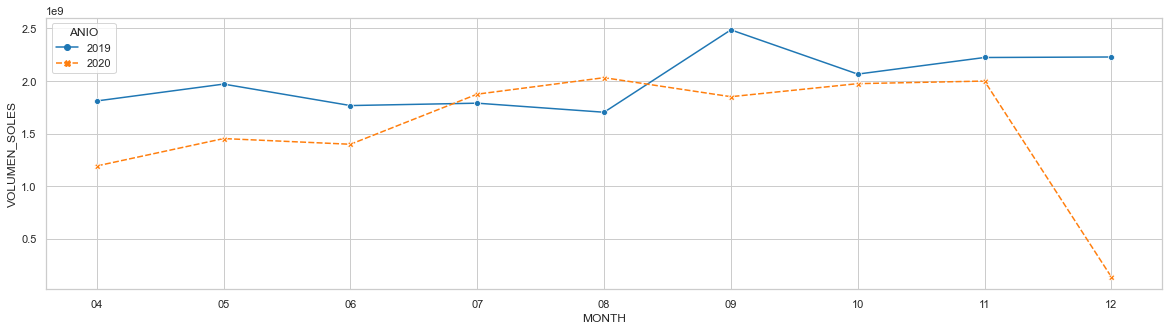

In [182]:
fig, axes1 = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))

sns.lineplot(
    data=group_periodo_cash_in[
        (group_periodo_cash_in['MONTH'].isin(months[3:])) & (group_periodo_cash_in['ANIO'].astype(int) >= 2019)
    ],
    x="MONTH", y="VOLUMEN_SOLES", ax=axes1, 
    hue='ANIO', markers=True,  style="ANIO", palette=sns.color_palette("tab10", 2)
)

In [183]:
cash_in_cliente['VOLUMEN_SOLES'].dtype

dtype('float64')

In [184]:
cash_in_cliente.head()

,ANIO,PERIODO,COD_UNICO,TIPO_CASH,KPI,GRUPO_N1,CANT_TRX,VOLUMEN_SOLES,MAX_FECHA_INFORMACION,MONTH
0,2019,201907,0015994198,CASH IN,NO_TABLERO,OTROS,6,393974.84,20190726,07
3,2019,201907,0016145237,CASH IN,,DEPOSITOS,1,50.00,20190722,07
4,2019,201907,0016231005,CASH IN,,PAGOS RECIBIDOS,1,5.00,20190731,07
6,2019,201908,0000008318,CASH IN,,DEPOSITOS,1,4361.00,20190823,08
8,2019,201908,0000042044,CASH IN,,PAGOS RECIBIDOS,3,311148.00,20190827,08


In [185]:
cash_in_cliente['MAX_FECHA_INFORMACION'] = pd.to_datetime(
    cash_in_cliente['MAX_FECHA_INFORMACION'], errors='coerce', format='%Y%m%d'
)
cash_in_cliente['MAX_FECHA_INFORMACION'].dtype

C:\Users\B38381\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


dtype('<M8[ns]')

In [186]:
#cash_in_cliente['VOLUMEN_SOLES'] = cash_in_cliente['VOLUMEN_SOLES'].copy().apply(lambda _: None if _ < 100 else _)
#cash_in_cliente[cash_in_cliente['COD_UNICO'] == '0016716540']['VOLUMEN_SOLES'].median()
periodo_cash_cliente = cash_in_cliente.groupby(by=['COD_UNICO','PERIODO']).agg({
    'VOLUMEN_SOLES': ['sum'], 'CANT_TRX': ['sum'], 'MAX_FECHA_INFORMACION': ['max']
}).reset_index()

periodo_cash_cliente.columns = ['_'.join(list(_)[:-1]) for _ in periodo_cash_cliente.columns]
periodo_cash_cliente.tail()

,COD_UNICO,PERIODO,VOLUMEN_SOLES,CANT_TRX,MAX_FECHA_INFORMACION
32746,0017232155,202010,67061.65,1,2020-10-30
32747,0017239443,202011,4598.00,2,2020-11-04
32748,0017311917,202011,359.20,1,2020-11-05
32749,0017316313,202011,6100.00,1,2020-11-09
32750,0017415833,202011,61445.00,5,2020-11-24


In [187]:
def apply_diff_mont(serie_diff):
    return (serie_diff / np.timedelta64(1,'D')).round(3)

In [188]:
#tramo[0], tramo[-1], tramo[-2]

In [189]:
def RClass(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [190]:
def RClass_propio(x, p, d):
    if x <= d[p][0.15]:
        return 1
    elif x <= d[p][0.3]:
        return 2
    elif x <= d[p][0.45]:
        return 3
    elif x <= d[p][0.6]:
        return 4
    elif x <= d[p][0.75]: 
        return 5
    elif x <= d[p][0.9]: 
        return 6
    else:
        return 7
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass_propio(x, p, d):
    if x <= d[p][0.15]:
        return 7
    elif x <= d[p][0.3]:
        return 6
    elif x <= d[p][0.45]:
        return 5
    elif x <= d[p][0.6]:
        return 4
    elif x <= d[p][0.75]: 
        return 3
    elif x <= d[p][0.9]: 
        return 2
    else:
        return 1

In [191]:
base.shape

(9211, 328)

In [192]:
#display(periodo_cash_cliente[
#    (periodo_cash_cliente['VOLUMEN_SOLES'] < 1000) &  (periodo_cash_cliente['PERIODO'].str.startswith('2019'))
#].hist())
#display(periodo_cash_cliente[
#    (periodo_cash_cliente['VOLUMEN_SOLES'] < 1000) &  (periodo_cash_cliente['PERIODO'].str.startswith('2020'))
#].hist())

### Clientes descartados hasta ahora

In [193]:
set(transac_cliente['COD_UNICO'].unique()) - set(periodo_cash_cliente['COD_UNICO'].unique())

{'0000037374',
 '0008939975',
 '0009980656',
 '0011868669',
 '0012984101',
 '0013318420',
 '0013619339',
 '0015242107',
 '0015559992',
 '0015955076',
 '0016568364'}

In [194]:
new_dataFrame = periodo_cash_cliente[periodo_cash_cliente['COD_UNICO'] == '0123']
new_dataFrame

,COD_UNICO,PERIODO,VOLUMEN_SOLES,CANT_TRX,MAX_FECHA_INFORMACION


### Re-indexamos por cliente para completar meses faltantes desde el 1er mes de análisis

In [195]:
rango_global =  [int(_.strftime('%Y%m')) for _ in list(pd.date_range(first_init_valid, ultimo_mes_cerrado, freq='MS'))]
print(rango_global)

[201804, 201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812, 201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]


In [196]:
cols_new_dataFrame = list(new_dataFrame.columns)

for cliente in periodo_cash_cliente['COD_UNICO'].unique():
    data_cliente = periodo_cash_cliente[periodo_cash_cliente['COD_UNICO'] == cliente]
    data_cliente['PERIODO'] = data_cliente['PERIODO'].astype(int)
    data_cliente = data_cliente.set_index('PERIODO').reindex(rango_global).reset_index()
    data_cliente['PERIODO'] = data_cliente['PERIODO'].astype(str)
    data_cliente['COD_UNICO'] = cliente
    
    new_dataFrame = pd.concat(
        [new_dataFrame[cols_new_dataFrame], data_cliente[cols_new_dataFrame]], axis=0
    )

#del data_cliente
periodo_cash_cliente = new_dataFrame.copy()
del new_dataFrame

periodo_cash_cliente.head()

C:\Users\B38381\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,COD_UNICO,PERIODO,VOLUMEN_SOLES,CANT_TRX,MAX_FECHA_INFORMACION
0,0000002469,201804,NaN,NaN,NaT
1,0000002469,201805,NaN,NaN,NaT
2,0000002469,201806,NaN,NaN,NaT
3,0000002469,201807,NaN,NaN,NaT
4,0000002469,201808,NaN,NaN,NaT


In [197]:
periodo_cash_cliente.tail()

,COD_UNICO,PERIODO,VOLUMEN_SOLES,CANT_TRX,MAX_FECHA_INFORMACION
27,0017415833,202007,NaN,NaN,NaT
28,0017415833,202008,NaN,NaN,NaT
29,0017415833,202009,NaN,NaN,NaT
30,0017415833,202010,NaN,NaN,NaT
31,0017415833,202011,61445.0,5.0,2020-11-24


In [198]:
print(periodo_cash_cliente.columns)

Index(['COD_UNICO', 'PERIODO', 'VOLUMEN_SOLES', 'CANT_TRX',
       'MAX_FECHA_INFORMACION'],
      dtype='object')


### RRRRRRRRRRRRRRRRRRRRRRRRRFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMM

In [199]:
for tramo in tramos[::-1]:
    #print(tramo[0], tramo[-1], tramo[-2])
    historia = tramo[1][-5:-2]
    print( ' histroia ',historia, ', Mes cerrado', tramo[0], ', cosecha ', tramo[1][-3] , ', Meses target', tramo[-1])

 histroia  [202009, 202010, 202011] , Mes cerrado 202011 , cosecha  202011 , Meses target [202012, 202101]
 histroia  [202008, 202009, 202010] , Mes cerrado 202010 , cosecha  202010 , Meses target [202011, 202012]
 histroia  [202007, 202008, 202009] , Mes cerrado 202009 , cosecha  202009 , Meses target [202010, 202011]
 histroia  [202006, 202007, 202008] , Mes cerrado 202008 , cosecha  202008 , Meses target [202009, 202010]
 histroia  [202005, 202006, 202007] , Mes cerrado 202007 , cosecha  202007 , Meses target [202008, 202009]


In [200]:
contador = 1

for tramo in tramos[::-1]:
    historia = tramo[1][-5:-2]
    mes_cerrado = tramo[0]
    print("Mes cerrado de referencia: ", mes_cerrado, ', historia: ', historia)

    rfm_u6m = periodo_cash_cliente[periodo_cash_cliente['PERIODO'].astype(int).isin(historia)].groupby(by=['COD_UNICO']).agg({
        'MAX_FECHA_INFORMACION': lambda x: (datetime.strptime(str(mes_cerrado), '%Y%m') + relativedelta(months=1)  - x.max()).days, # Recency
        'CANT_TRX': lambda x: x.sum(),      # Frequency
        'VOLUMEN_SOLES': lambda x: x.sum() #  Monetary Value
    }).reset_index().rename(columns={
        'MAX_FECHA_INFORMACION': 'RECENCY_historia',
        'CANT_TRX': 'FREQUENCY_historia',
        'VOLUMEN_SOLES': 'MONETARY_VALUE_historia'
    })
    rfm_u6m['PERIODO'] = str(mes_cerrado)
    
    quantiles = rfm_u6m.quantile(q=[0.25, 0.5, 0.75]).to_dict()
    print(quantiles)
    rfm_u6m['R_Quartile'] = rfm_u6m['RECENCY_historia'].apply(RClass, args=('RECENCY_historia', quantiles))
    rfm_u6m['F_Quartile'] = rfm_u6m['FREQUENCY_historia'].apply(FMClass, args=('FREQUENCY_historia', quantiles))
    rfm_u6m['M_Quartile'] = rfm_u6m['MONETARY_VALUE_historia'].apply(FMClass, args=('MONETARY_VALUE_historia', quantiles))
    
    sextiles = rfm_u6m.quantile(q=[0.15, 0.3, 0.45, 0.6, 0.75, 0.9]).to_dict()
    print(sextiles)
    rfm_u6m['R_Septile'] = rfm_u6m['RECENCY_historia'].apply(RClass_propio, args=('RECENCY_historia', sextiles))
    rfm_u6m['F_Septile'] = rfm_u6m['FREQUENCY_historia'].apply(FMClass_propio, args=('FREQUENCY_historia', sextiles))
    rfm_u6m['M_Septile'] = rfm_u6m['MONETARY_VALUE_historia'].apply(FMClass_propio, args=('MONETARY_VALUE_historia', sextiles))

    if contador == 1:
        rfm_cliente = rfm_u6m
    else:
        rfm_cliente = pd.concat(
            [rfm_cliente, rfm_u6m], axis=0
        )
    
    contador += 1
    #print(data_tramo.head())
    print("--", rfm_cliente.shape)


rfm_cliente.head()

Mes cerrado de referencia:  202011 , historia:  [202009, 202010, 202011]
{'RECENCY_historia': {0.25: 1.0, 0.5: 4.0, 0.75: 11.0}, 'FREQUENCY_historia': {0.25: 5.0, 0.5: 18.0, 0.75: 65.0}, 'MONETARY_VALUE_historia': {0.25: 84756.985, 0.5: 512177.84, 0.75: 2096947.64}}
{'RECENCY_historia': {0.15: 1.0, 0.3: 1.0, 0.45: 1.0, 0.6: 5.0, 0.75: 11.0, 0.9: 29.0}, 'FREQUENCY_historia': {0.15: 3.0, 0.3: 7.0, 0.45: 14.0, 0.6: 28.0, 0.75: 65.0, 0.9: 211.60000000000014}, 'MONETARY_VALUE_historia': {0.15: 20845.138999999996, 0.3: 137083.52399999998, 0.45: 394887.42400000006, 0.6: 882981.7539999997, 0.75: 2096947.64, 0.9: 6340955.4360000035}, 'R_Quartile': {0.15: 1.0, 0.3: 1.0, 0.45: 2.0, 0.6: 3.0, 0.75: 4.0, 0.9: 4.0}, 'F_Quartile': {0.15: 1.0, 0.3: 2.0, 0.45: 2.0, 0.6: 3.0, 0.75: 4.0, 0.9: 4.0}, 'M_Quartile': {0.15: 1.0, 0.3: 2.0, 0.45: 2.0, 0.6: 3.0, 0.75: 3.5, 0.9: 4.0}}
-- (1955, 11)
Mes cerrado de referencia:  202010 , historia:  [202008, 202009, 202010]
{'RECENCY_historia': {0.25: 2.0, 0.5: 3.0, 

,COD_UNICO,RECENCY_historia,FREQUENCY_historia,MONETARY_VALUE_historia,PERIODO,R_Quartile,F_Quartile,M_Quartile,R_Septile,F_Septile,M_Septile
0,0000002469,1.0,7.0,656021.50,202011,1,3,2,1,6,4
1,0000003392,4.0,78.0,15484190.54,202011,2,1,1,4,2,1
2,0000006114,14.0,29.0,3587511.73,202011,4,2,1,6,3,2
3,0000008318,18.0,9.0,117271.71,202011,4,3,3,6,5,6
4,0000038026,5.0,5.0,890946.30,202011,3,4,2,4,6,3


In [201]:
rfm_cliente.shape

(9775, 11)

In [202]:
base = base.merge(
    rfm_cliente, how='left', on=['PERIODO', 'COD_UNICO']
)
base.shape

(9211, 337)

In [203]:
def evaluate_rfm(r, f, m):
    if pd.isnull(r) and pd.isnull(f) and pd.isnull(m):
        return None
    
    return '_' + str(int(r)) + str(int(f)) + str(int(m))

def evaluate_fm(f, m):
    if pd.isnull(f) and pd.isnull(m):
        return None
    
    return '_' + str(int(f)) + str(int(m))

base['RFMClass_quartil'] = base[['R_Quartile', 'F_Quartile', 'M_Quartile']].apply(
    lambda _: evaluate_rfm(_[0], _[1], _[2]), axis=1
)
base['FM_category_quartil'] = base[['F_Quartile', 'M_Quartile']].apply(
    lambda _: evaluate_fm(_[0], _[1]), axis=1
)
base['RFMClass_septil'] = base[['R_Septile', 'F_Septile', 'M_Septile']].apply(
    lambda _: evaluate_rfm(_[0], _[1], _[2]), axis=1
)
base['FM_category_septil'] = base[['F_Septile', 'M_Septile']].apply(
    lambda _: evaluate_fm(_[0], _[1]), axis=1
)

In [204]:
for col in ['FM_category_quartil', 'RFMClass_quartil', 'FM_category_septil', 'RFMClass_septil']:
    base[col] = base[col].fillna('nulo')

In [205]:
base['FM_category_quartil'].value_counts(dropna=False).head(60)

_44     1572
_11     1213
_33      856
_22      814
_21      774
_12      679
_32      578
_23      525
_43      482
_34      407
nulo     358
_13      340
_31      281
_42      140
_24      104
_41       53
_14       35
Name: FM_category_quartil, dtype: int64

In [206]:
base['FM_category_septil'].value_counts(dropna=False).head(60)

_77     894
_66     449
nulo    358
_76     345
_22     331
_55     325
_33     314
_21     296
_12     294
_11     292
_32     291
_44     282
_43     278
_23     278
_42     263
_56     258
_54     257
_45     246
_34     243
_65     237
_31     221
_24     220
_67     218
_53     212
_13     169
_35     157
_25     156
_75     146
_64     142
_46     139
_52     132
_14     106
_41      90
_36      80
_57      67
_63      65
_26      62
_74      59
_15      56
_62      49
_47      32
_51      29
_73      25
_72      17
_71       9
_37       8
_61       7
_16       4
_27       3
Name: FM_category_septil, dtype: int64

In [207]:
base.shape

(9211, 341)

In [208]:
base = base.merge(
     pd.get_dummies(
        base[['R_Septile', 'F_Septile', 'M_Septile', 'PERIODO', 'COD_UNICO']], columns=['R_Septile', 'F_Septile', 'M_Septile'],
        dummy_na=True, drop_first=False, prefix_sep='_cut_'
    ), how='left', on=['PERIODO', 'COD_UNICO']
)
base.head()

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,F_Septile_cut_7.0,F_Septile_cut_nan,M_Septile_cut_1.0,M_Septile_cut_2.0,M_Septile_cut_3.0,M_Septile_cut_4.0,M_Septile_cut_5.0,M_Septile_cut_6.0,M_Septile_cut_7.0,M_Septile_cut_nan
0,202007,0011066687,20513578416,1,FARMACEUTICA OTARVASQ,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,202007,0011179155,20513550830,0,ESTINSA INDUSTRIAL,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,202007,0011197692,20519022461,0,CONSORCIO ELECTRICO INDUSTRIAL,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,202007,0011227802,20513441208,0,LABORATORIOS OFTALMICOS,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,202007,0011429380,20352280802,0,COMBUSTIBLES DEL ORIENTE,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0








































































































































































































































### TARGET YOY

In [209]:
for tramo in tramos[::-1]:
    #print(tramo[0], tramo[-1], tramo[-2])
    historia = tramo[1][-5:-2]
    print( ' histroia ', historia, ', Mes cerrado', tramo[0], ', cosecha ', tramo[1][-3] , ', Meses target', tramo[-1], tramo[-2])

 histroia  [202009, 202010, 202011] , Mes cerrado 202011 , cosecha  202011 , Meses target [202012, 202101] [201912, 202001]
 histroia  [202008, 202009, 202010] , Mes cerrado 202010 , cosecha  202010 , Meses target [202011, 202012] [201911, 201912]
 histroia  [202007, 202008, 202009] , Mes cerrado 202009 , cosecha  202009 , Meses target [202010, 202011] [201910, 201911]
 histroia  [202006, 202007, 202008] , Mes cerrado 202008 , cosecha  202008 , Meses target [202009, 202010] [201909, 201910]
 histroia  [202005, 202006, 202007] , Mes cerrado 202007 , cosecha  202007 , Meses target [202008, 202009] [201908, 201909]


In [210]:
dicc_kpi = {
    'VOLUMEN_SOLES': ['sum'] #count
}
columns_base = ['TRX_SUM_']
contador = 1

for tramo in tramos[::-1]:
    last_year = tramo[-2]
    mes_cerrado = tramo[0]
    new_year = tramo[-1]
    print("Mes cerrado: ", mes_cerrado, ', Meses target', tramo[-1], tramo[-2])

    _2m_actual = periodo_cash_cliente[periodo_cash_cliente['PERIODO'].astype(int).isin(new_year)].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    _2m_pasado = periodo_cash_cliente[periodo_cash_cliente['PERIODO'].astype(int).isin(last_year)].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    
    data_tramo = pd.concat(
        [_2m_actual, _2m_pasado], axis=1
    )
    data_tramo.columns = ['TRX_SUM_ACTAUL', 'TRX_SUM_PASADO']
    data_tramo = data_tramo.reset_index().rename(columns={'index': 'COD_UNICO'})
    data_tramo['PERIODO'] = str(mes_cerrado)
    
    del _2m_actual
    del _2m_pasado
    
    if contador == 1:
        analisis_cliente = data_tramo
    else:
        analisis_cliente = pd.concat(
            [analisis_cliente, data_tramo], axis=0
        )
    
    contador += 1
    #print(data_tramo.head())
    print("--", analisis_cliente.shape)

analisis_cliente.head()                        

Mes cerrado:  202011 , Meses target [202012, 202101] [201912, 202001]
-- (1955, 4)
Mes cerrado:  202010 , Meses target [202011, 202012] [201911, 201912]
-- (3910, 4)
Mes cerrado:  202009 , Meses target [202010, 202011] [201910, 201911]
-- (5865, 4)
Mes cerrado:  202008 , Meses target [202009, 202010] [201909, 201910]
-- (7820, 4)
Mes cerrado:  202007 , Meses target [202008, 202009] [201908, 201909]
-- (9775, 4)


,COD_UNICO,TRX_SUM_ACTAUL,TRX_SUM_PASADO,PERIODO
0,0000002469,NaN,0.00,202011
1,0000003392,NaN,2073482.15,202011
2,0000006114,NaN,7822868.48,202011
3,0000008318,NaN,34493.09,202011
4,0000038026,NaN,904095.01,202011


In [211]:
analisis_cliente.columns

Index(['COD_UNICO', 'TRX_SUM_ACTAUL', 'TRX_SUM_PASADO', 'PERIODO'], dtype='object')

In [212]:
import gc
gc.collect()

44

In [213]:
analisis_cliente = analisis_cliente.sort_values(by=['COD_UNICO', 'PERIODO'], ascending=[True, False])
analisis_cliente.head()

,COD_UNICO,TRX_SUM_ACTAUL,TRX_SUM_PASADO,PERIODO
0,0000002469,NaN,0.0,202011
0,0000002469,296621.50,0.0,202010
0,0000002469,297621.50,0.0,202009
0,0000002469,359400.00,600000.0,202008
0,0000002469,6713033.34,600000.0,202007


In [214]:
print(analisis_cliente.columns)

Index(['COD_UNICO', 'TRX_SUM_ACTAUL', 'TRX_SUM_PASADO', 'PERIODO'], dtype='object')


In [215]:
analisis_cliente['PRE_TARGET_sum_yoy'] = analisis_cliente[['TRX_SUM_ACTAUL', 'TRX_SUM_PASADO']].apply(lambda _: get_div_means_perios(_[0] , _[1]), axis=1)

analisis_cliente['TRX_SUM_ACTAUL'] = analisis_cliente['TRX_SUM_ACTAUL'] / 2
analisis_cliente['TRX_SUM_PASADO'] = analisis_cliente['TRX_SUM_PASADO'] / 2
analisis_cliente['PRE_TARGET_yoy'] = analisis_cliente[['TRX_SUM_ACTAUL', 'TRX_SUM_PASADO']].apply(lambda _: get_div_means_perios(_[0] , _[1]), axis=1)
analisis_cliente.head()

,COD_UNICO,TRX_SUM_ACTAUL,TRX_SUM_PASADO,PERIODO,PRE_TARGET_sum_yoy,PRE_TARGET_yoy
0,0000002469,NaN,0.0,202011,0.000000,0.000000
0,0000002469,148310.75,0.0,202010,296621.500000,148310.750000
0,0000002469,148810.75,0.0,202009,297621.500000,148810.750000
0,0000002469,179700.00,300000.0,202008,0.599000,0.599000
0,0000002469,3356516.67,300000.0,202007,11.188389,11.188389


In [216]:
if (analisis_cliente['PRE_TARGET_sum_yoy'] == analisis_cliente['PRE_TARGET_yoy']).any():
    del analisis_cliente['PRE_TARGET_sum_yoy']

In [217]:
transac_cliente.shape

(172959, 10)

## Descartamos a quienes ya estaban con pcas transacciones in efecto de los ultimo ese

In [218]:
#now - relativedelta(months=11)

In [219]:
periodos_valida = [_.strftime('%Y%m') for _ in pd.date_range( now - relativedelta(months=11) , now - relativedelta(months=1), freq='MS')]
print(periodos_valida)

['202002', '202003', '202004', '202005', '202006', '202007', '202008', '202009', '202010', '202011']


In [220]:
transac_valid = pd.pivot_table(
    transac_cliente[transac_cliente['TIPO_CASH'] == 'CASH IN'], 
    values='CANT_TRX', index=['COD_UNICO'], columns=['PERIODO'], aggfunc=np.sum, fill_value=0
).unstack().reset_index()
transac_valid.columns = ['PERIODO', 'COD_UNICO', 'CANT_TRX']
transac_valid.head(3)

,PERIODO,COD_UNICO,CANT_TRX
0,201904,0000002469,4
1,201904,0000003392,15
2,201904,0000006114,15


array([[<AxesSubplot:title={'center':'CANT_TRX'}>]], dtype=object)

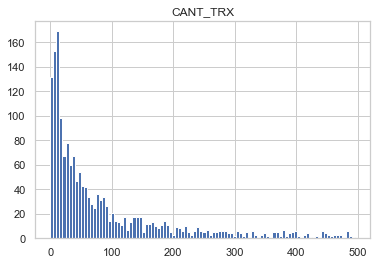

In [221]:
transac_valid = transac_valid[
    (transac_valid['PERIODO'].isin(periodos_valida))
].groupby(by=['COD_UNICO'])['CANT_TRX'].sum().reset_index()

transac_valid[transac_valid['CANT_TRX']< 500].hist(bins=100)

##### MENOS TRANSACCCIONES DEL 97% DE CLIENTES EN LOS 10 ULTIMOS MESES

In [222]:
minimas = transac_valid.CANT_TRX.quantile([0.05])[0.05]
print(minimas)

3.0


In [223]:
muy_pocas_trx = list(transac_valid[transac_valid['CANT_TRX'] <= minimas]['COD_UNICO'])
print(muy_pocas_trx)

['0000042432', '0000164442', '0000698035', '0001017383', '0002443489', '0003290442', '0004051991', '0004396685', '0005601901', '0008443663', '0008815054', '0009017582', '0009270081', '0009485552', '0009533643', '0009603473', '0009938270', '0010060934', '0010389823', '0010560205', '0010648747', '0010654931', '0010827069', '0010856041', '0010908680', '0011298258', '0011391154', '0011684313', '0011724103', '0011793990', '0011858461', '0011859730', '0011864617', '0011866676', '0011867008', '0011868355', '0011868520', '0011869439', '0011873465', '0011874221', '0011880968', '0012081965', '0012512961', '0012797219', '0012838940', '0013024951', '0013076430', '0013118232', '0013223134', '0013251454', '0013360786', '0013446995', '0013454627', '0013670229', '0013799902', '0013882826', '0013891946', '0013956156', '0014070972', '0014099089', '0014103851', '0014174372', '0014235789', '0014326077', '0014330303', '0014465392', '0014593237', '0014847426', '0014898678', '0015083504', '0015090966', '0015

In [224]:
analisis_cliente.columns

Index(['COD_UNICO', 'TRX_SUM_ACTAUL', 'TRX_SUM_PASADO', 'PERIODO',
       'PRE_TARGET_yoy'],
      dtype='object')

In [225]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente[~analisis_cliente['COD_UNICO'].isin(muy_pocas_trx)]
print(analisis_cliente.shape)

(9775, 5)
(9240, 5)


### DEFINICIION DE TARGET YOY

<AxesSubplot:>

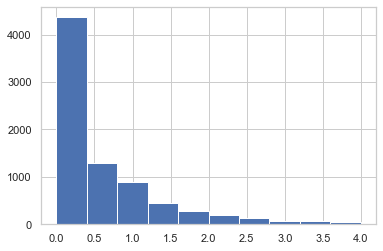

In [226]:
analisis_cliente[analisis_cliente['PRE_TARGET_yoy']< 4]['PRE_TARGET_yoy'].hist()

In [227]:
periodos_valida[-6]

'202006'

In [228]:
#periodos_valida

In [229]:
quantile_03 = analisis_cliente[
    (analisis_cliente['PERIODO'].astype(int) > int(periodos_valida[-6])) & (analisis_cliente['PRE_TARGET_yoy'] < 2)
].PRE_TARGET_yoy.quantile(0.35)
quantile_03

0.01568685911551443

In [230]:
quantile_04 = analisis_cliente[
    (analisis_cliente['PERIODO'].astype(int) > int(periodos_valida[-6]))  & (analisis_cliente['PRE_TARGET_yoy'] < 2)
].PRE_TARGET_yoy.quantile(0.45)
quantile_04

0.1447721649542082

In [231]:
quantile_05 = analisis_cliente[
    (analisis_cliente['PERIODO'].astype(int) > int(periodos_valida[-6]))  & (analisis_cliente['PRE_TARGET_yoy'] < 2)
].PRE_TARGET_yoy.quantile(0.55)
quantile_05

0.3107206680286801

In [232]:
quantile_06 = analisis_cliente[
    (analisis_cliente['PERIODO'].astype(int) >  int(periodos_valida[-6]))  & (analisis_cliente['PRE_TARGET_yoy'] < 2)
].PRE_TARGET_yoy.quantile(0.65)
quantile_06

0.49777481823809583

In [233]:
quantile_07 = analisis_cliente[
    (analisis_cliente['PERIODO'].astype(int) > int(periodos_valida[-6]))  & (analisis_cliente['PRE_TARGET_yoy'] < 2)
].PRE_TARGET_yoy.quantile(0.75)
quantile_07

0.7193106127087799

In [234]:
analisis_cliente['target_yoy_quartil_03'] = analisis_cliente['PRE_TARGET_yoy'].apply(lambda _: _<= quantile_03).astype(int)
analisis_cliente['target_yoy_quartil_04'] = analisis_cliente['PRE_TARGET_yoy'].apply(lambda _: _<= quantile_04).astype(int)
analisis_cliente['target_yoy_quartil_05'] = analisis_cliente['PRE_TARGET_yoy'].apply(lambda _: _<= quantile_05).astype(int)
analisis_cliente['target_yoy_quartil_06'] = analisis_cliente['PRE_TARGET_yoy'].apply(lambda _: _<= quantile_06).astype(int)
analisis_cliente['target_yoy_quartil_07'] = analisis_cliente['PRE_TARGET_yoy'].apply(lambda _: _<= quantile_07).astype(int)
analisis_cliente.head(20)

,COD_UNICO,TRX_SUM_ACTAUL,TRX_SUM_PASADO,PERIODO,PRE_TARGET_yoy,target_yoy_quartil_03,target_yoy_quartil_04,target_yoy_quartil_05,target_yoy_quartil_06,target_yoy_quartil_07
0,0000002469,NaN,0.000,202011,0.000000,1,1,1,1,1
0,0000002469,148310.750,0.000,202010,148310.750000,0,0,0,0,0
0,0000002469,148810.750,0.000,202009,148810.750000,0,0,0,0,0
0,0000002469,179700.000,300000.000,202008,0.599000,0,0,0,0,1
0,0000002469,3356516.670,300000.000,202007,11.188389,0,0,0,0,0
1,0000003392,NaN,1036741.075,202011,0.000000,1,1,1,1,1
1,0000003392,2745483.825,1303503.205,202010,2.106235,0,0,0,0,0
1,0000003392,5935461.335,2247736.390,202009,2.640639,0,0,0,0,0
1,0000003392,4996611.445,3188847.105,202008,1.566902,0,0,0,0,0
1,0000003392,2490147.445,2804726.165,202007,0.887840,0,0,0,0,0


In [235]:
analisis_cliente = base.merge(
    analisis_cliente[
        ['PERIODO', 'COD_UNICO', 'PRE_TARGET_yoy', 'target_yoy_quartil_03','target_yoy_quartil_04','target_yoy_quartil_05', 'target_yoy_quartil_06', 'target_yoy_quartil_07']
    ], how='left', on=['PERIODO', 'COD_UNICO']
)
print(analisis_cliente.shape)


analisis_cliente.tail(3)

(9211, 370)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,M_Septile_cut_5.0,M_Septile_cut_6.0,M_Septile_cut_7.0,M_Septile_cut_nan,PRE_TARGET_yoy,target_yoy_quartil_03,target_yoy_quartil_04,target_yoy_quartil_05,target_yoy_quartil_06,target_yoy_quartil_07
9208,202011,0011038032,20514606774,1,C & M SERVICENTROS,0,1,1,0,0,...,0,0,0,0,0.0,1.0,1.0,1.0,1.0,1.0
9209,202011,0011038047,20506626910,0,PICORP,0,0,1,0,0,...,0,0,0,0,0.0,1.0,1.0,1.0,1.0,1.0
9210,202011,0011066687,20513578416,1,FARMACEUTICA OTARVASQ,0,0,1,0,0,...,0,0,0,0,0.0,1.0,1.0,1.0,1.0,1.0


In [236]:
for column in [col for col in analisis_cliente.columns if ('trx' in col.lower() or 'cash' in col.lower()) and 'target' not in col.lower()]:
    analisis_cliente[col] = analisis_cliente[col].fillna(0)

In [237]:
[_.strftime('%Y%m') for _ in pd.date_range( now - relativedelta(months=11) , now - relativedelta(months=1), freq='MS')]

['202002',
 '202003',
 '202004',
 '202005',
 '202006',
 '202007',
 '202008',
 '202009',
 '202010',
 '202011']

In [238]:
import time
datetime.strptime( str(tramo[1][0]), '%Y%m')

datetime.datetime(2019, 8, 1, 0, 0)

In [239]:
dicc_kpi = {
    'VOLUMEN_SOLES': ['sum'] #count
}
columns_base = ['TRX_SUM_']
contador = 1

for tramo in tramos[::-1]:
    last_year = tramo[-2]
    mes_cerrado = tramo[0]
    new_year = tramo[-1]
    anio_pasado = [int(_.strftime('%Y%m')) for _ in pd.date_range( datetime.strptime( str(tramo[1][0]), '%Y%m') - relativedelta(months=6) ,  datetime.strptime( str(tramo[1][0]), '%Y%m') - relativedelta(months=1), freq='MS')]
    print("Mes cerrado: ", mes_cerrado, ', Meses target', tramo[1], tramo[2], tramo[3])
    print(anio_pasado)
    print(anio_pasado[-3:])
    print(anio_pasado[-6:])
    
    #break
    ultimos_3_meses = periodo_cash_cliente[periodo_cash_cliente['PERIODO'].astype(int).isin(tramo[3])].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    ultimos_6_meses = periodo_cash_cliente[periodo_cash_cliente['PERIODO'].astype(int).isin(tramo[2])].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    aniopas_3_meses = periodo_cash_cliente[periodo_cash_cliente['PERIODO'].astype(int).isin(anio_pasado[-3:])].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    aniopas_6_meses = periodo_cash_cliente[periodo_cash_cliente['PERIODO'].astype(int).isin(anio_pasado[-6:])].groupby(by=['COD_UNICO']).agg(dicc_kpi) 
    
    data_tramo = pd.concat(
        [ultimos_3_meses, ultimos_6_meses, aniopas_3_meses, aniopas_6_meses], axis=1
    )
    data_tramo.columns = ['TRX_SUM_U3M', 'TRX_SUM_U6M', 'TRX_PAS_U3M', 'TRX_PAS_U6M']
    data_tramo = data_tramo.reset_index().rename(columns={'index': 'COD_UNICO'})
    data_tramo['PERIODO'] = str(mes_cerrado)
    
    del ultimos_3_meses, ultimos_6_meses, aniopas_3_meses, aniopas_6_meses
    #del _2m_pasado
    
    if contador == 1:
        yoy_cash_in = data_tramo
    else:
        yoy_cash_in = pd.concat(
            [yoy_cash_in, data_tramo], axis=0
        )
    
    contador += 1
    #print(data_tramo.head())
    print("--", yoy_cash_in.shape)

yoy_cash_in.head()                        

Mes cerrado:  202011 , Meses target [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011] [202009, 202010, 202011]
[201906, 201907, 201908, 201909, 201910, 201911]
[201909, 201910, 201911]
[201906, 201907, 201908, 201909, 201910, 201911]
-- (1955, 6)
Mes cerrado:  202010 , Meses target [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010] [202008, 202009, 202010]
[201905, 201906, 201907, 201908, 201909, 201910]
[201908, 201909, 201910]
[201905, 201906, 201907, 201908, 201909, 201910]
-- (3910, 6)
Mes cerrado:  202009 , Meses target [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009] [202007, 202008, 202009]
[201904, 201905, 201906, 201907, 201908, 201909]
[201907, 2

,COD_UNICO,TRX_SUM_U3M,TRX_SUM_U6M,TRX_PAS_U3M,TRX_PAS_U6M,PERIODO
0,0000002469,656021.50,10470027.58,600000.00,1401037.97,202011
1,0000003392,15484190.54,19767123.50,7229272.90,15178258.98,202011
2,0000006114,3587511.73,11703822.10,7590206.69,22379657.68,202011
3,0000008318,117271.71,554519.44,91676.14,191897.52,202011
4,0000038026,890946.30,1039808.88,2435583.67,4522254.09,202011


In [240]:
yoy_cash_in['YOY_input_cash_in_U3M'] = yoy_cash_in['TRX_SUM_U3M'] / yoy_cash_in['TRX_PAS_U3M']
yoy_cash_in['YOY_input_cash_in_U6M'] = yoy_cash_in['TRX_SUM_U6M'] / yoy_cash_in['TRX_PAS_U6M']

In [241]:
analisis_cliente = analisis_cliente.merge(
    yoy_cash_in[
        ['PERIODO', 'COD_UNICO', 'YOY_input_cash_in_U3M', 'YOY_input_cash_in_U6M']
    ], how='left', on=['PERIODO', 'COD_UNICO']
)
print(analisis_cliente.shape)

analisis_cliente.tail(3)

(9211, 372)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,M_Septile_cut_7.0,M_Septile_cut_nan,PRE_TARGET_yoy,target_yoy_quartil_03,target_yoy_quartil_04,target_yoy_quartil_05,target_yoy_quartil_06,target_yoy_quartil_07,YOY_input_cash_in_U3M,YOY_input_cash_in_U6M
9208,202011,0011038032,20514606774,1,C & M SERVICENTROS,0,1,1,0,0,...,0,0,0.0,1.0,1.0,1.0,1.0,1.0,0.511975,0.696340
9209,202011,0011038047,20506626910,0,PICORP,0,0,1,0,0,...,0,0,0.0,1.0,1.0,1.0,1.0,1.0,1.427486,0.844293
9210,202011,0011066687,20513578416,1,FARMACEUTICA OTARVASQ,0,0,1,0,0,...,0,0,0.0,1.0,1.0,1.0,1.0,1.0,1.747269,1.483700


In [242]:
gc.collect()

66

In [243]:
#from sqlalchemy import create_engine
#engine = create_engine(r"mssql+pymssql://ibetlmarket:m@rk3t2o15@10.11.12.90\BDT/MARKET")
#connection_x = engine.connect()

#try:
#    up[up['PERIODO'].isin(['202008', '202007'])].to_sql(
#        name='TRANSAC_ALERTA_BE',
#        schema='ODS',
#        con=connection_x, 
#        index=False, 
#        if_exists='replace'
#    )
#    connection_x.close()
#    correct = 1
#except Exception as e:
#    print("ERROR: ", str(e))
#    correct = 0

#print(correct)

In [244]:
del base
#del up

## A PEDIDO FOCO EN CANTIDADES DE TRANSACCIONES

In [245]:
transac_cliente.head()

,ANIO,PERIODO,COD_UNICO,TIPO_CASH,KPI,GRUPO_N1,CANT_TRX,VOLUMEN_SOLES,MAX_FECHA_INFORMACION,MONTH
0,2019,201907,0015994198,CASH IN,NO_TABLERO,OTROS,6,393974.84,20190726,07
1,2019,201907,0016047687,CASH OUT,,PAGOS MASIVOS,1,1045.92,20190711,07
2,2019,201907,0016073282,CASH OUT,NO_TABLERO,OTROS,17,189.85,20190731,07
3,2019,201907,0016145237,CASH IN,,DEPOSITOS,1,50.00,20190722,07
4,2019,201907,0016231005,CASH IN,,PAGOS RECIBIDOS,1,5.00,20190731,07


In [246]:
acum = generate_listado_u3m(
    transac_cliente[transac_cliente['TIPO_CASH'] == 'CASH IN'], 'listados_num_trx', values='CANT_TRX',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=sum
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(1955, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(3910, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(5865, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(7820, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(9775, 3)


,COD_UNICO,listados_num_trx,PERIODO
0,0000002469,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5]",202007
1,0000003392,"[11, 14, 17, 7, 10, 5, 7, 7, 7, 12, 16, 18]",202007
2,0000006114,"[30, 19, 12, 12, 16, 15, 12, 11, 12, 10, 8, 19]",202007
3,0000008318,"[8, 9, 5, 7, 4, 10, 7, 2, 7, 1, 1, 3]",202007
4,0000038026,"[5, 2, 6, 3, 3, 0, 1, 1, 1, 1, 0, 2]",202007


<AxesSubplot:>

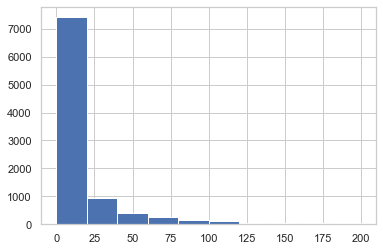

In [247]:
acum['PROM_CANT_TRX_U12M_CASHIN'] = acum['listados_num_trx'].apply(lambda _: np.mean(_[-12:]))
acum[acum['PROM_CANT_TRX_U12M_CASHIN']< 200]['PROM_CANT_TRX_U12M_CASHIN'].hist()

<AxesSubplot:>

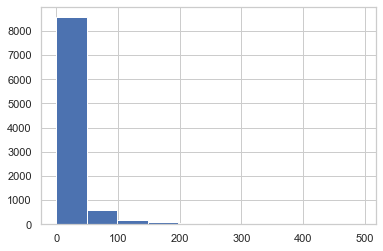

In [248]:
acum['PROM_CANT_TRX_U6M_CASHIN'] = acum['listados_num_trx'].apply(lambda _: np.mean(_[-6:]))
acum[acum['PROM_CANT_TRX_U6M_CASHIN']< 200]['PROM_CANT_TRX_U12M_CASHIN'].hist()

In [249]:
acum['DIFF_PROM_CANT_TRX_U6M_U12M_CASHIN'] =  acum['PROM_CANT_TRX_U6M_CASHIN'] - acum['PROM_CANT_TRX_U12M_CASHIN']

acum['TIENE_AUMENTO_PROM_CANT_TRX_U6M_U12M'] =  acum['DIFF_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ > 0).astype(int)
acum['TIENE_DISMINUCION_PROM_CANT_TRX_U6M_U12M'] =  acum['DIFF_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ < 0).astype(int)

In [250]:
def div_flash(a, b):
    if not(b):
        return a
    
    return a/b

acum['TIENE_AUMENTO_10PERCENT_A_MAS_CANT_TRX_CASHIN_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) >= 1.1).astype(int)
acum['TIENE_AUMENTO_20PERCENT_A_MAS_CANT_TRX_CASHIN_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) >= 1.2).astype(int)
acum['TIENE_AUMENTO_30PERCENT_A_MAS_CANT_TRX_CASHIN_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) >= 1.3).astype(int)

acum['TIENE_DISMINUCION_10PERCENT_A_MAS_CANT_CASHIN_TRX_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) <= 0.9).astype(int)
acum['TIENE_DISMINUCION_20PERCENT_A_MAS_CANT_CASHIN_TRX_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) <= 0.8).astype(int)
acum['TIENE_DISMINUCION_30PERCENT_A_MAS_CANT_CASHIN_TRX_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) <= 0.7).astype(int)

In [251]:
del acum['listados_num_trx']
acum.head()

,COD_UNICO,PERIODO,PROM_CANT_TRX_U12M_CASHIN,PROM_CANT_TRX_U6M_CASHIN,DIFF_PROM_CANT_TRX_U6M_U12M_CASHIN,TIENE_AUMENTO_PROM_CANT_TRX_U6M_U12M,TIENE_DISMINUCION_PROM_CANT_TRX_U6M_U12M,TIENE_AUMENTO_10PERCENT_A_MAS_CANT_TRX_CASHIN_MES_ANT,TIENE_AUMENTO_20PERCENT_A_MAS_CANT_TRX_CASHIN_MES_ANT,TIENE_AUMENTO_30PERCENT_A_MAS_CANT_TRX_CASHIN_MES_ANT,TIENE_DISMINUCION_10PERCENT_A_MAS_CANT_CASHIN_TRX_MES_ANT,TIENE_DISMINUCION_20PERCENT_A_MAS_CANT_CASHIN_TRX_MES_ANT,TIENE_DISMINUCION_30PERCENT_A_MAS_CANT_CASHIN_TRX_MES_ANT
0,0000002469,202007,0.583333,1.000000,0.416667,1,0,1,1,1,0,0,0
1,0000003392,202007,10.916667,11.166667,0.250000,1,0,1,0,0,0,0,0
2,0000006114,202007,14.666667,12.000000,-2.666667,0,1,1,1,1,0,0,0
3,0000008318,202007,5.333333,3.500000,-1.833333,0,1,1,1,1,0,0,0
4,0000038026,202007,2.083333,1.000000,-1.083333,0,1,1,1,1,0,0,0


In [252]:
acum['PERIODO'] = acum['PERIODO'].astype(str)
analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 383)

## LO MISMO PARA EL CASH OUT

In [253]:
acum = generate_listado_u3m(
    transac_cliente[transac_cliente['TIPO_CASH'] == 'CASH OUT'], 'listados_num_trx', values='CANT_TRX',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=sum
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(1963, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(3926, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(5889, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(7852, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(9815, 3)


,COD_UNICO,listados_num_trx,PERIODO
0,0000002469,"[7, 22, 8, 6, 6, 6, 6, 6, 6, 4, 9, 6]",202007
1,0000003392,"[52, 54, 51, 41, 49, 48, 51, 44, 29, 44, 38, 37]",202007
2,0000006114,"[43, 48, 49, 30, 41, 59, 26, 25, 33, 17, 24, 74]",202007
3,0000008318,"[49, 38, 30, 66, 54, 47, 45, 49, 32, 27, 33, 37]",202007
4,0000037374,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]",202007


In [254]:
acum['PROM_CANT_TRX_U12M_CASHOUT'] = acum['listados_num_trx'].apply(lambda _: np.mean(_[-12:]))
acum['PROM_CANT_TRX_U6M_CASHOUT'] = acum['listados_num_trx'].apply(lambda _: np.mean(_[-6:]))

acum['DIFF_PROM_CANT_TRX_U6M_U12M_CASHOUT'] =  acum['PROM_CANT_TRX_U6M_CASHOUT'] - acum['PROM_CANT_TRX_U12M_CASHOUT']

acum['TIENE_AUMENTO_PROM_CANT_TRX_U6M_U12M'] =  acum['DIFF_PROM_CANT_TRX_U6M_U12M_CASHOUT'].apply(lambda _: _ > 0).astype(int)
acum['TIENE_DISMINUCION_PROM_CANT_TRX_U6M_U12M'] =  acum['DIFF_PROM_CANT_TRX_U6M_U12M_CASHOUT'].apply(lambda _: _ < 0).astype(int)

acum['TIENE_AUMENTO_10PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) >= 1.1).astype(int)
acum['TIENE_AUMENTO_20PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) >= 1.2).astype(int)
acum['TIENE_AUMENTO_30PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) >= 1.3).astype(int)

acum['TIENE_DISMINUCION_10PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) <= 0.9).astype(int)
acum['TIENE_DISMINUCION_20PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) <= 0.8).astype(int)
acum['TIENE_DISMINUCION_30PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) <= 0.7).astype(int)

In [255]:
del acum['listados_num_trx']
acum.head()

,COD_UNICO,PERIODO,PROM_CANT_TRX_U12M_CASHOUT,PROM_CANT_TRX_U6M_CASHOUT,DIFF_PROM_CANT_TRX_U6M_U12M_CASHOUT,TIENE_AUMENTO_PROM_CANT_TRX_U6M_U12M,TIENE_DISMINUCION_PROM_CANT_TRX_U6M_U12M,TIENE_AUMENTO_10PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_AUMENTO_20PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_AUMENTO_30PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_DISMINUCION_10PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_DISMINUCION_20PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_DISMINUCION_30PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT
0,0000002469,202007,7.666667,6.166667,-1.500000,0,1,0,0,0,1,1,1
1,0000003392,202007,44.833333,40.500000,-4.333333,0,1,0,0,0,0,0,0
2,0000006114,202007,39.083333,33.166667,-5.916667,0,1,1,1,1,0,0,0
3,0000008318,202007,42.250000,37.166667,-5.083333,0,1,1,0,0,0,0,0
4,0000037374,202007,2.000000,2.000000,0.000000,0,0,0,0,0,0,0,0


In [256]:
acum['PERIODO'] = acum['PERIODO'].astype(str)
analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 394)

### BASE CLIENTES UNIVERSO MESA ALERTAS

In [257]:
query_base = """
    SELECT * FROM ODS.HD_VMVP_BASE_ALERTA_CARTERA_BE WITH (NOLOCK)
"""
base = pd.read_sql(
   query_base , connection_market
)
base.head(2)

,FEVE,PERIODO,CODUNICOCLI,NOMBRE_COMPLETO,FLG_VIGENTE,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,ES_ACTIVO,CLASIF_SBS,CLASIF_IBK,DEPARTAMENTO,FEC_INGRESO,FEC_PRIMER_PRODUCTO_APERTURADO,SEI_MCDO,TIPDOC,CODDOC,NUM_RUC
0,EX-FEVE,202007,0011066687,FARMACEUTICA OTARVASQ,1,0,0,1,0,0,...,S,NORMAL,NORMAL,LIMA,2009-03-17,2009-12-30,INDUSTRIA,2,20513578416,20513578416
1,None,202007,0011179155,ESTINSA INDUSTRIAL,0,1,1,0,0,0,...,S,NORMAL,NORMAL,LIMA,2009-06-01,2009-06-12,COMERCIO,2,20513550830,20513550830


In [258]:
base.shape, base['CODUNICOCLI'].unique().shape

((9212, 39), (2036,))

In [259]:
base.shape

(9212, 39)

### Ultimo feve actual es el target de la cosecha_anterior (LUEGO SE DEBE BAJAR 2 MESES PAAR CONSIDERAR VENTANA OCULTA)

In [260]:
#base['PERIODO'] = (datetime.strptime(ultimo_mes_cerrado, '%Y%m') - relativedelta(months=1)).strftime('%Y%m')
#base['COD_UNICO']  = base['CODUNICOCLI']

In [261]:
#base[['PERIODO', 'COD_UNICO', 'FEVE']].head(3)

In [262]:
#analisis_cliente = analisis_cliente.merge(
#    base[['PERIODO', 'COD_UNICO', 'FEVE']], how='left', on=['PERIODO', 'COD_UNICO']
#)
#analisis_cliente.shape

In [263]:
gc.collect()

132

### CONOCEME

In [264]:
#query_conoceme = """
#    SELECT * FROM WEBBE_INFINITY_CONOCEME  WITH (NOLOCK) 
#    ORDER BY FECHA_ACTUALIZACION DESC
#"""
#conoceme = pd.read_sql(
#   query_conoceme , connection_b20
#)

query_conoceme = """
     SELECT * FROM STG.T_WEBBE_INFINITY_CONOCEME WITH (NOLOCK) 
    ORDER BY FECHA_ACTUALIZACION DESC
"""
conoceme = pd.read_sql(
   query_conoceme , connection_market
)

print("ANTES con duplicados: ", conoceme.shape[0])
conoceme = conoceme.drop_duplicates(subset=['COD_UNICO'], keep='first')
print("Regsistros unicos por codigo único: ", conoceme.shape[0])

conoceme.head(2)

ANTES con duplicados:  1051
Regsistros unicos por codigo único:  1042


,COD_UNICO,ACTIVIDAD,SUBSECTOR,BACKLOG,MODELO_NEGOCIO,VENTAJA_COMPETITIVA,FORTALEZAS_RIESGOS,INTEGRACION_VERTICAL,GESTION_COMPRAS,REGISTRO,...,PROYECCION_VENTAS,FECHA_ACTUALIZACION,PROCEDENCIA_MPRIMA,LINEA_SUCESION_FLAG,LINEA_SUCESION,CAMBIO_GERENCIA_GENERAL_ANNIO,CAMBIO_ACCIONISTAS_ANNIO,INICIO_IBK,INICIO_OP,FECHA_CARGA
0,0010845883,Comercio,Artículos diversos,No Aplica,Cadena de tiendas de conveniencia. Dicho conce...,Cuenta con exclusividad para atención en los c...,Fortaleza:\r\nExperiencia en el manejo de mode...,None,None,B37367,...,NaN,2020-12-10 09:09:02,Local,0,None,NaN,NaN,2020.0,2008.0,2020-12-11 05:20:00
1,0014998260,Servicios,Restaurante y eventos sociales,Servicios,Comunicaciones realiza el servicio integral d...,VC: La cartera de clientes de la empresa está ...,R: Alta competencia en el rubro.\r\nR: Mercado...,None,None,B36698,...,NaN,2020-12-09 09:07:31,Local,0,None,NaN,NaN,2017.0,2012.0,2020-12-11 05:20:00


In [265]:
conoceme['CAMBIO_ACCIONISTAS_ANNIO'].value_counts(dropna=False)

NaN       1039
2020.0       2
2019.0       1
Name: CAMBIO_ACCIONISTAS_ANNIO, dtype: int64

In [266]:
conoceme['CAMBIO_GERENCIA_GENERAL_ANNIO'].value_counts(dropna=False)

NaN       1038
2020.0       3
2019.0       1
Name: CAMBIO_GERENCIA_GENERAL_ANNIO, dtype: int64

In [267]:
#conoceme['FECHA_ACTUALIZACION'].astype(str)

In [268]:
conoceme.columns

Index(['COD_UNICO', 'ACTIVIDAD', 'SUBSECTOR', 'BACKLOG', 'MODELO_NEGOCIO',
       'VENTAJA_COMPETITIVA', 'FORTALEZAS_RIESGOS', 'INTEGRACION_VERTICAL',
       'GESTION_COMPRAS', 'REGISTRO', 'GERENTE_GENERAL',
       'GERENTE_FINANCIERO_TIPO', 'GERENTE_FINANCIERO_NOMBRE',
       'TIPO_CONTABILIDAD', 'MONTO_LINEA_PROVEEDORES', 'ACTIVO_LIBRE_GRAVAMEN',
       'PROYECCION_INVERSION', 'PROYECCION_VENTAS', 'FECHA_ACTUALIZACION',
       'PROCEDENCIA_MPRIMA', 'LINEA_SUCESION_FLAG', 'LINEA_SUCESION',
       'CAMBIO_GERENCIA_GENERAL_ANNIO', 'CAMBIO_ACCIONISTAS_ANNIO',
       'INICIO_IBK', 'INICIO_OP', 'FECHA_CARGA'],
      dtype='object')

<AxesSubplot:>

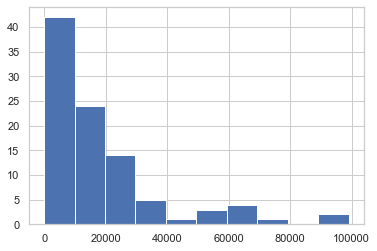

In [269]:
conoceme[conoceme['PROYECCION_VENTAS'] < 100000]['PROYECCION_VENTAS'].hist()

<AxesSubplot:>

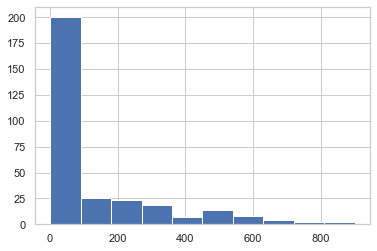

In [270]:
conoceme[conoceme['PROYECCION_INVERSION'] < 1000]['PROYECCION_INVERSION'].hist()

In [271]:
conoceme.isnull().sum()

COD_UNICO                           0
ACTIVIDAD                          10
SUBSECTOR                          20
BACKLOG                            38
MODELO_NEGOCIO                      6
VENTAJA_COMPETITIVA                23
FORTALEZAS_RIESGOS                 46
INTEGRACION_VERTICAL             1042
GESTION_COMPRAS                   970
REGISTRO                            0
GERENTE_GENERAL                    25
GERENTE_FINANCIERO_TIPO           168
GERENTE_FINANCIERO_NOMBRE         233
TIPO_CONTABILIDAD                   0
MONTO_LINEA_PROVEEDORES           446
ACTIVO_LIBRE_GRAVAMEN             446
PROYECCION_INVERSION              683
PROYECCION_VENTAS                 943
FECHA_ACTUALIZACION                 0
PROCEDENCIA_MPRIMA                252
LINEA_SUCESION_FLAG                 1
LINEA_SUCESION                    446
CAMBIO_GERENCIA_GENERAL_ANNIO    1038
CAMBIO_ACCIONISTAS_ANNIO         1039
INICIO_IBK                         71
INICIO_OP                          74
FECHA_CARGA 

In [272]:
analisis_cliente.head()

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,PROM_CANT_TRX_U6M_CASHOUT,DIFF_PROM_CANT_TRX_U6M_U12M_CASHOUT,TIENE_AUMENTO_PROM_CANT_TRX_U6M_U12M_y,TIENE_DISMINUCION_PROM_CANT_TRX_U6M_U12M_y,TIENE_AUMENTO_10PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_AUMENTO_20PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_AUMENTO_30PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_DISMINUCION_10PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_DISMINUCION_20PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_DISMINUCION_30PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT
0,202007,0011066687,20513578416,1,FARMACEUTICA OTARVASQ,0,0,1,0,0,...,14.166667,0.083333,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,202007,0011179155,20513550830,0,ESTINSA INDUSTRIAL,1,1,0,0,0,...,3.500000,-1.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,202007,0011197692,20519022461,0,CONSORCIO ELECTRICO INDUSTRIAL,1,0,0,0,0,...,85.333333,-49.750000,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,202007,0011227802,20513441208,0,LABORATORIOS OFTALMICOS,0,1,0,0,0,...,52.166667,-15.916667,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4,202007,0011429380,20352280802,0,COMBUSTIBLES DEL ORIENTE,0,0,0,0,0,...,82.333333,-11.666667,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [273]:
len(conoceme['SUBSECTOR'].unique())

65

In [274]:
print(conoceme['SUBSECTOR'].unique())

['Artículos diversos' 'Restaurante y eventos sociales' 'Equipos'
 'Taller Automotriz' 'Turismo' 'Abarrotes'
 'Acondicionamiento de Edificios' 'Construcción de Carreteras'
 'Metalmecánica' 'Fundición y Metales' 'Ganadero'
 'Agencia de Aduanas y servicios relacionados' 'Publicidad'
 'Productos Marinos' 'Artículos de limpieza' None
 'Servicios De Ingeniería' 'Hotelería' 'Medicamentos y equipos médicos'
 'Imprenta y papel' 'Plástico y derivados' 'Catering'
 'Tecnología y Telecomunicaciones' 'Textil y calzado' 'Servicios diversos'
 'Alquiler de equipos' 'Estación de Servicio' 'Obras civiles' 'Madera'
 'Saneamiento' 'Construcción de Edificios' 'Agrícola (Granos y Frutos)'
 'Vehículos, repuestos y accesorios' 'Mantenimiento' 'Limpieza'
 'Transporte de Carga' 'Empresa de Transmisión'
 'Transporte interprovincial' 'Químicos' 'Productos Eléctricos'
 'Agrícola (Siembra)' 'Hidrocarburos' 'Gestión Empresarial'
 'Bebidas alcohólicas' 'Servicios financieros'
 'Agua, hielo y derivados de agua' 'Maquin

In [275]:
texto_banca = 'Vehículos_Textil y calzado_Turismo_Restaurante y eventos sociales_Hotelería_Transporte interprovincial_Transporte Urbano_Construcción de Edificio_Acondicionamiento de Edificios'

In [276]:
analisis_cliente = analisis_cliente.merge(
    conoceme[['COD_UNICO', 'ACTIVIDAD', 'SUBSECTOR', 'BACKLOG', 'INICIO_IBK', 'INICIO_OP', 'CAMBIO_GERENCIA_GENERAL_ANNIO', 'CAMBIO_ACCIONISTAS_ANNIO',
             'PROYECCION_INVERSION', 'PROYECCION_VENTAS']],
    how='left', on=['COD_UNICO']
)

analisis_cliente.shape

(9211, 403)

In [277]:
analisis_cliente['subsector_obervado_banca'] = analisis_cliente['SUBSECTOR'].apply(lambda _: str(_).upper() in texto_banca.upper()).astype(int)

In [278]:
del conoceme

In [279]:
#vpc['ES_ACTIVO'].value_counts(dropna=False)

In [280]:
#vpc['PERIODO'].max()

In [281]:
'FEC_INGRESO' in analisis_cliente.columns

True

In [282]:
analisis_cliente['FEC_INGRESO'] = pd.to_datetime(
    analisis_cliente['FEC_INGRESO'], errors='coerce', format='%Y-%m-%d'
)
analisis_cliente['FEC_PRIMER_PRODUCTO_APERTURADO'] = pd.to_datetime(
    analisis_cliente['FEC_PRIMER_PRODUCTO_APERTURADO'], errors='coerce', format='%Y-%m-%d'
)

def apply_diff_date(serie_diff):
    return (serie_diff / np.timedelta64(1,'D')).round(3)

analisis_cliente['DIFF_TIME_INICIO_IBK_FIRST_PRODUCT'] = apply_diff_date(
    analisis_cliente['FEC_PRIMER_PRODUCTO_APERTURADO'] - analisis_cliente['FEC_INGRESO']
)

In [283]:
if 'FEC_PRIMER_PRODUCTO_APERTURADO' in analisis_cliente.columns:
    del analisis_cliente['FEC_PRIMER_PRODUCTO_APERTURADO']
    
analisis_cliente['CLASIF_SBS'] = analisis_cliente['CLASIF_SBS'].fillna('MULO')
analisis_cliente['CLASIF_IBK'] = analisis_cliente['CLASIF_IBK'].fillna('MULO')
analisis_cliente['DEPARTAMENTO'] = analisis_cliente['DEPARTAMENTO'].fillna('MULO')

analisis_cliente['IS_NORMAL_IBK_SBS'] = analisis_cliente[['CLASIF_SBS', 'CLASIF_IBK']].apply(lambda _: _[0].upper() == 'NORMAL' and  _[1].upper() == 'NORMAL', axis=1)
analisis_cliente['IS_NORMAL_IBK_SBS'] = analisis_cliente['IS_NORMAL_IBK_SBS'].fillna('NULO')
analisis_cliente['LUGAR'] = analisis_cliente['DEPARTAMENTO'].apply(lambda _: 'PROVINCIA' if _.upper() not in ['LIMA', 'CALLAO'] else _)

In [284]:
#vpc['COD_UNICO'] = vpc['CODUNICOCLI']
#vpc.shape, vpc.groupby(by=['PERIODO', 'COD_UNICO']).size().shape, analisis_cliente.shape, analisis_cliente.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

In [285]:
#vpc['COD_UNICO'].unique().shape

In [286]:
#def apply_upper(val):
#    if pd.isnull(val):
#       return None
    
#    return val.upper()
#vpc['FEVE'] = vpc['FEVE'].apply(lambda _: apply_upper(_))
#vpc['IS_NORMAL_IBK_SBS'] = vpc['IS_NORMAL_IBK_SBS'].astype(int)
#vpc['DEPARTAMENTO'] = vpc['DEPARTAMENTO'].apply(lambda _: apply_upper(_))
#vpc.head()

In [287]:
#vpc['FEVE_DURO'] = vpc['FEVE'].copy()
#del vpc['FEVE']

In [288]:
analisis_cliente.shape

(9211, 406)

#### TARGET FEVE

In [289]:
query_vpc = """
    SELECT * FROM ODS.HD_VMVP_VPC_CLIENTE_ALERTAS_CARTERA_BE WITH (NOLOCK)

"""
vpc = pd.read_sql(
   query_vpc , connection_market
)
vpc.head()

,PERIODO,CODUNICOCLI,FEVE,ES_ACTIVO,CLASIF_SBS,CLASIF_IBK,DEPARTAMENTO,FEC_INGRESO,FEC_PRIMER_PRODUCTO_APERTURADO,SEI_MCDO
0,202001,0000251611,EX-FEVE,S,NORMAL,NORMAL,LIMA,1992-09-22,1950-01-01,COMERCIO
1,202007,0008800282,None,S,NORMAL,NORMAL,LIMA,2001-03-23,2003-06-20,COMERCIO
2,202007,0008800332,EX-FEVE,S,NORMAL,NORMAL,LIMA,2001-03-23,2003-10-01,INDUSTRIA
3,202001,0014850025,None,S,NORMAL,NORMAL,LIMA,2016-09-26,2016-09-27,TRANSPORTE
4,202001,0015435251,None,S,P.POTENCIAL,C.P.P.,LIMA,2017-12-13,2018-01-26,SERVICIOS


In [290]:
vpc['PERIODO'].max(), vpc['PERIODO'].min(), vpc.shape

('202011', '202001', (22294, 10))

In [291]:
vpc['COD_UNICO'] = vpc['CODUNICOCLI'].copy()

vpc = vpc.rename(columns={'FEVE': 'FEVE_VPC'}).merge(
    analisis_cliente[['PERIODO', 'COD_UNICO', 'FEVE']], how='left', on=['PERIODO', 'COD_UNICO']
).sort_values(by=['PERIODO'])
vpc.tail(50)

,PERIODO,CODUNICOCLI,FEVE_VPC,ES_ACTIVO,CLASIF_SBS,CLASIF_IBK,DEPARTAMENTO,FEC_INGRESO,FEC_PRIMER_PRODUCTO_APERTURADO,SEI_MCDO,COD_UNICO,FEVE
1431,202011,0015550861,SEGUIR,S,NORMAL,NORMAL,LIMA,2018-03-13,2018-04-04,SERVICIOS,0015550861,SEGUIR COVID
20322,202011,0012559810,GARANTIZAR,S,NORMAL,NORMAL,JUNIN,2011-10-18,2011-12-15,HIDROCARBUROS,0012559810,GARANTIZAR
305,202011,0016452109,GARANTIZAR,S,P.POTENCIAL,NORMAL,LIMA,2019-10-29,2019-12-18,SERVICIOS,0016452109,GARANTIZAR
2301,202011,0010718332,GARANTIZAR,S,NORMAL,NORMAL,AREQUIPA,2008-08-11,2008-08-26,SERVICIOS,0010718332,GARANTIZAR
14545,202011,0011874792,EX-FEVE,S,NORMAL,NORMAL,LIMA,2010-08-10,2016-05-30,TRANSPORTE,0011874792,EX-FEVE
14544,202011,0011790717,SEGUIR,S,NORMAL,NORMAL,LIMA,2010-06-23,2016-09-06,SERVICIOS,0011790717,SEGUIR
5201,202011,0008977320,EX-FEVE,S,NORMAL,NORMAL,LIMA,2002-08-27,2017-04-20,COMERCIO,0008977320,EX-FEVE
5202,202011,0010104629,None,S,NORMAL,NORMAL,LIMA,2007-05-29,2007-05-29,TRANSPORTE,0010104629,None
5203,202011,0010177553,EX-FEVE,S,NORMAL,NORMAL,LIMA,2007-08-03,2007-10-10,INDUSTRIA,0010177553,EX-FEVE
304,202011,0012952663,None,S,NORMAL,NORMAL,LIMA,2012-08-24,2012-08-24,COMERCIO,0012952663,NaN


In [292]:
vpc['FEVE'] = vpc['FEVE'].combine_first(vpc['FEVE_VPC']).apply(lambda _: None if pd.isnull(_) else _.upper())

In [293]:
#analisis_cliente = analisis_cliente.merge(
#    vpc[['PERIODO', 'COD_UNICO', 'ES_ACTIVO', 'DIFF_TIME_INICIO_IBK_FIRST_PRODUCT', 'SEI_MCDO', 'LUGAR', 'DEPARTAMENTO', 'FEC_INGRESO']],
#    how='left', on=['PERIODO','COD_UNICO']
#)
analisis_cliente.shape

(9211, 406)

In [294]:
analisis_cliente[analisis_cliente['PERIODO'].astype(int) >= 202007]['FEC_INGRESO'].head()

0   2009-03-17
1   2009-06-01
2   2009-06-12
3   2009-07-02
4   2009-11-11
Name: FEC_INGRESO, dtype: datetime64[ns]

In [295]:
#def get_antiguedad_ibk(fec, period):
#    #print(type(fec), type(period))
#    if pd.isnull(fec) or not fec:
#        return None
    
#    period_date = datetime.strptime(str(period), '%Y%m') + relativedelta(months=1)
#    return (period_date - fec).days
    
#analisis_cliente['ANTIGUEDAD_IBK'] = analisis_cliente[['FEC_INGRESO', 'PERIODO']].apply(
#    lambda _: get_antiguedad_ibk(_[0], _[1]), 
#    axis=1
#)

#display(analisis_cliente[analisis_cliente['PERIODO'].isin(['202007', '202008'])][['FEC_INGRESO', 'PERIODO', 'ANTIGUEDAD_IBK']].head(10))
#del analisis_cliente['FEC_INGRESO']

In [296]:
tramo[1][3:]

[201911,
 201912,
 202001,
 202002,
 202003,
 202004,
 202005,
 202006,
 202007,
 202008,
 202009]

In [297]:
#vpc['PERIODO'].isin(tramo[1][3:]).shape

In [298]:
base.columns

Index(['FEVE', 'PERIODO', 'CODUNICOCLI', 'NOMBRE_COMPLETO', 'FLG_VIGENTE',
       'FLG_SUSPENDIDO', 'FLG_VENCIDA', 'FLG_CANCELADO', 'FLG_MONOLINEA',
       'FLG_SOLO_REACTIVA', 'FLG_POSICION', 'FUNNEL_1', 'FUNNEL_2', 'FUNNEL_3',
       'RIESGO', 'COD_GRUPO_ECONOMICO', 'DES_GRUPO_ECONOMICO', 'ZONAL',
       'ENCARGADO', 'NOMBRE_JEFE', 'CLASIFICACION_LIST_360', 'FUNNEL_4',
       'DESPRIORIZACION_ADM', 'IMPACTO', 'PLAN_PROPUESTO', 'FEVE_FICHA',
       'ESTADO_APROBACION', 'BUCKET', 'ESTADO', 'ES_ACTIVO', 'CLASIF_SBS',
       'CLASIF_IBK', 'DEPARTAMENTO', 'FEC_INGRESO',
       'FEC_PRIMER_PRODUCTO_APERTURADO', 'SEI_MCDO', 'TIPDOC', 'CODDOC',
       'NUM_RUC'],
      dtype='object')

In [299]:
feve_duro = list(vpc[
    (vpc['FEVE'].isin(['REDUCIR', 'SALIR'])) & (
        (vpc['PERIODO'] == str(202010)) | (vpc['PERIODO'] == str(202011))
    )
]['COD_UNICO'])
print(set(feve_duro), len(set(feve_duro)))

{'0015149012', '0009621308', '0008722787', '0009533643', '0011869439', '0014094604', '0013258239', '0012380193', '0013629456', '0015531767', '0009980656', '0006065262', '0011042168', '0010087482', '0009678586', '0014625327', '0012768934', '0009037826', '0015467161', '0011026743', '0015253866', '0005834015', '0011608752', '0008948373', '0014652041', '0011793990', '0010821635', '0013799902', '0009924753', '0001728989', '0010173069', '0013268476', '0011812988', '0016376605', '0010466956', '0008345852', '0010489415', '0010589389', '0010654025', '0014722942', '0011866326', '0011874206', '0010643788', '0013248860', '0007504210', '0011563661', '0015795764', '0010040783', '0010127885', '0015386492', '0011868324', '0011687685', '0013681086', '0014197631', '0015488039', '0010029372', '0010560205', '0011863267', '0011868104', '0015435251', '0014809819', '0015832039', '0009007850', '0011880968', '0008872571', '0009114283', '0009676730', '0011574130', '0004610952', '0011026959', '0015379485', '0008

In [300]:
mes_analisis = str(202009)

descarte = list(vpc[
    (vpc['FEVE'].isin(['REDUCIR', 'SALIR'])) & (vpc['PERIODO'] == mes_analisis) 

]['COD_UNICO'])
print(len(descarte))
print(set(feve_duro) - set(descarte))
print(len(set(feve_duro) - set(descarte)))

113
{'0009033251', '0010821635', '0009114283', '0011595792', '0016376605', '0008843374', '0004610952', '0010489415', '0010654025', '0008708300', '0011714485', '0011563661', '0012767492', '0009678586', '0010856041', '0015145181', '0014197631', '0010019822', '0015167346', '0010335543'}
20


In [301]:
feve_duro = list(vpc[
    (vpc['FEVE'].isin(['SEGUIR COVID'])) & (
        (vpc['PERIODO'] == str(202009)) | (vpc['PERIODO'] == str(202010))
    )
]['COD_UNICO'])
print(set(feve_duro), len(set(feve_duro)))

{'0014982264', '0000982421', '0013230742', '0012430609', '0011872669', '0011725379', '0000222257', '0014695314', '0009791795', '0003041431', '0011608224', '0013655446', '0009130940', '0009980586', '0014973609', '0009228556', '0012272566', '0015004987', '0008248072', '0015162754', '0011292100', '0001489426', '0014529154', '0011608046', '0009317389', '0014863281', '0000054320', '0008844065', '0010969184', '0007320328', '0009186301', '0009473035', '0011693045', '0011874983', '0000251611', '0010207631', '0013222655', '0015016746', '0010987972', '0008708373', '0008443816', '0011228447', '0011860399', '0011463767', '0009501452', '0009691969', '0004017117', '0012440162', '0009789067', '0009501030', '0014857441', '0015906337', '0013498149', '0009838152', '0011874760', '0015034837', '0009282266', '0011585553', '0008236553', '0010251366', '0012638018', '0009408906', '0014861280', '0013310596', '0011246337', '0009764370', '0011865874', '0010207046', '0010038868', '0009670384', '0010853304', '0009

In [302]:
descarte = list(vpc[
    (vpc['FEVE'].isin(['SEGUIR COVID'])) & (vpc['PERIODO'] == str(202009))

]['COD_UNICO'])

print(len(descarte))
print(set(feve_duro) - set(descarte))
print(len(set(feve_duro) - set(descarte)))

0
{'0014982264', '0000982421', '0013230742', '0012430609', '0011872669', '0011725379', '0000222257', '0014695314', '0009791795', '0003041431', '0011608224', '0013655446', '0009130940', '0009980586', '0014973609', '0009228556', '0012272566', '0015004987', '0008248072', '0015162754', '0011292100', '0001489426', '0014529154', '0011608046', '0009317389', '0014863281', '0000054320', '0008844065', '0010969184', '0007320328', '0009186301', '0009473035', '0011693045', '0011874983', '0000251611', '0010207631', '0013222655', '0015016746', '0010987972', '0008708373', '0008443816', '0011228447', '0011860399', '0011463767', '0009501452', '0009691969', '0004017117', '0012440162', '0009789067', '0009501030', '0014857441', '0015906337', '0013498149', '0009838152', '0011874760', '0015034837', '0009282266', '0011585553', '0008236553', '0010251366', '0012638018', '0009408906', '0014861280', '0013310596', '0011246337', '0009764370', '0011865874', '0010207046', '0010038868', '0009670384', '0010853304', '00

# >> REDUCIR SALIR

In [303]:
contador = 1
for tramo in tramos:
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    print(tramo[0], delante, just_antes)
    break

202007 [202008, 202009] 202007


In [304]:
analisis_cliente['PERIODO'].value_counts()

202007    1923
202008    1882
202009    1832
202010    1801
202011    1773
Name: PERIODO, dtype: int64

In [305]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    feve_duro = list(vpc[
        (vpc['FEVE'].isin(['REDUCIR', 'SALIR'])) & (
            (vpc['PERIODO'] == str(delante[0])) | (vpc['PERIODO'] == str(delante[1]))
        )
    ]['COD_UNICO'])
    
    descarte = list(vpc[
        (vpc['FEVE'].isin(['REDUCIR', 'SALIR'])) & (vpc['PERIODO'] == str(just_antes)) 
    ]['COD_UNICO'])
    
    no_blancos = set(vpc[
        (vpc['FEVE'].isin(['REDUCIR', 'SALIR'])) | (
            vpc['PERIODO'].isin(tramo[2])
        )
    ]['COD_UNICO'])
    
    #mas_descarte_blancos = 
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in feve_duro and codigo not in descarte:
            return 1
        elif codigo in descarte or codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_feve_reducir_salir'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        feve = quedan
    else:
        feve = pd.concat(
            [feve, quedan], axis=0
        )
    
    contador += 1
    

    # LOS QUE QUEDAN
    #feve = feve[~feve['COD_UNICO'].isin(descarte)]
    #feve['target_feve_reducir_salir'] = 1

    #feve = feve[['PERIODO', 'COD_UNICO', 'target_feve_reducir_salir']]
    
    print(feve.shape, feve[feve['target_feve_reducir_salir'] == 1].shape)
feve.head()

202007 [202008, 202009] 202007
(2036, 4) (31, 4)
202008 [202009, 202010] 202008
(4072, 4) (70, 4)
202009 [202010, 202011] 202009
(6108, 4) (90, 4)
202010 [202011, 202012] 202010
(8144, 4) (91, 4)
202011 [202012, 202101] 202011
(10180, 4) (91, 4)


,COD_UNICO,0,target_feve_reducir_salir,PERIODO
0,0000002469,5,0.0,202007
1,0000003392,5,0.0,202007
2,0000006114,5,0.0,202007
3,0000008318,5,0.0,202007
4,0000037374,2,0.0,202007


In [306]:
feve['PERIODO'].value_counts()

202010    2036
202008    2036
202011    2036
202009    2036
202007    2036
Name: PERIODO, dtype: int64

In [307]:
feve[feve['PERIODO'].astype(int) >= 202007]['target_feve_reducir_salir'].value_counts(dropna=False)

0.0    9470
NaN     619
1.0      91
Name: target_feve_reducir_salir, dtype: int64

In [308]:
analisis_cliente.shape

(9211, 406)

In [309]:
analisis_cliente = analisis_cliente.merge(
    feve[['PERIODO', 'COD_UNICO', 'target_feve_reducir_salir']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 407)

In [310]:
pd.crosstab(
    analisis_cliente['target_feve_reducir_salir'],  analisis_cliente['PERIODO'], margins=True
)

PERIODO,202007,202008,202009,202010,202011,All
target_feve_reducir_salir,,,,,,
0.0,1782,1744,1704,1677,1652,8559
1.0,31,39,20,1,0,91
All,1813,1783,1724,1678,1652,8650


In [311]:
del feve

In [312]:
del transac_cliente

In [313]:
gc.collect()

66

## >>> RESCATE SEGUIR COVID

In [314]:
max_period_vpc = analisis_cliente['PERIODO'].max()
max_period_vpc

'202011'

In [315]:
clientes = clientes[['COD_UNICO', 'FEVE']]
clientes['PERIODO'] = max_period_vpc
clientes['FEVE_'] = clientes['FEVE'].str.upper()
clientes.head()

,COD_UNICO,FEVE,PERIODO,FEVE_
0,0011066687,EX-FEVE,202011,EX-FEVE
1,0011179155,None,202011,None
2,0011197692,EX-FEVE,202011,EX-FEVE
3,0011227802,GARANTIZAR,202011,GARANTIZAR
4,0011429380,GARANTIZAR,202011,GARANTIZAR


In [316]:
clientes['FEVE_'].value_counts()

EX-FEVE         2763
GARANTIZAR      1200
SEGUIR           725
SEGUIR COVID     405
REDUCIR          402
SALIR            113
Name: FEVE_, dtype: int64

In [317]:
#analisis_cliente = analisis_cliente.merge(
#    clientes, how='left', on=['COD_UNICO', 'PERIODO']
#)

In [318]:
#vpc['FEVE_'] = vpc['FEVE_'].combine_first(vpc['FEVE_x'])
#vpc.head()

In [319]:
#feve_duro = list(vpc[
#    (vpc['FEVE_x'].isin(['SEGUIR'])) &(vpc['FEVE_'].isin(['SEGUIR COVID'])) & (
#        (vpc['PERIODO'] == str(202009)) | (vpc['PERIODO'] == str(202010))
#    )
#]['COD_UNICO'])
#print(feve_duro, len(feve_duro))

In [320]:
#descarte = list(vpc[
#    (vpc['FEVE_'].isin(['REDUCIR', 'SALIR', 'SEGUIR'])) & (vpc['PERIODO'] == str(202008)) 

#]['COD_UNICO'])
#print(len(descarte))
#print(set(feve_duro) - set(descarte), len(set(feve_duro) - set(descarte)))

In [321]:
#vpc[vpc['COD_UNICO'] == '0011463767'].sort_values(by=['PERIODO'])

# >> SEGUIR COVID

In [322]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    feve_duro = list(vpc[
        (vpc['FEVE'].isin(['SEGUIR COVID']))  & (
            (vpc['PERIODO'] == str(delante[0])) | (vpc['PERIODO'] == str(delante[1]))
        )
    ]['COD_UNICO'])
    print(len(feve_duro))
    
    descarte = list(vpc[
        (vpc['FEVE'].isin(['REDUCIR', 'SALIR', 'SEGUIR COVID'])) & (vpc['PERIODO'] == str(just_antes)) 
    ]['COD_UNICO'])
    print(len(descarte))
    
    no_blancos = set(vpc[
        (vpc['FEVE'].isin(['REDUCIR', 'SALIR','SEGUIR COVID'])) | (
            vpc['PERIODO'].isin(tramo[2])
        )
    ]['COD_UNICO'])
    
    #mas_descarte_blancos = 
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in feve_duro and codigo not in descarte:
            return 1
        elif codigo in descarte or codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['cambio_seguir_covid'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        seguir = quedan
    else:
        seguir = pd.concat(
            [seguir, quedan], axis=0
        )
    
    contador += 1
    

    # LOS QUE QUEDAN
    #feve = feve[~feve['COD_UNICO'].isin(descarte)]
    #feve['target_feve_reducir_salir'] = 1

    #feve = feve[['PERIODO', 'COD_UNICO', 'target_feve_reducir_salir']]
    
    print(seguir.shape, seguir[seguir['cambio_seguir_covid'] == 1].shape)
seguir.head()

202007 [202008, 202009] [202002, 202003, 202004, 202005, 202006, 202007]
0
87
(2036, 4) (0, 4)
202008 [202009, 202010] [202003, 202004, 202005, 202006, 202007, 202008]
204
98
(4072, 4) (202, 4)
202009 [202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009]
405
113
(6108, 4) (404, 4)
202010 [202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010]
201
333
(8144, 4) (404, 4)
202011 [202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011]
0
326
(10180, 4) (404, 4)


,COD_UNICO,0,cambio_seguir_covid,PERIODO
0,0000002469,5,0.0,202007
1,0000003392,5,0.0,202007
2,0000006114,5,0.0,202007
3,0000008318,5,0.0,202007
4,0000037374,2,0.0,202007


In [323]:
seguir['cambio_seguir_covid'].value_counts()

0.0    8460
1.0     404
Name: cambio_seguir_covid, dtype: int64

In [324]:
analisis_cliente = analisis_cliente.merge(
    seguir[['PERIODO', 'COD_UNICO', 'cambio_seguir_covid']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 408)

In [325]:
'cambio_seguir_covid' in analisis_cliente.columns

True

In [326]:
analisis_cliente[
    (analisis_cliente['target_feve_reducir_salir'] == 1) | (analisis_cliente['cambio_seguir_covid'] == 1)
].shape

(494, 408)

In [327]:
pd.crosstab(
    analisis_cliente['cambio_seguir_covid'], analisis_cliente['PERIODO'], margins=True
)

PERIODO,202007,202008,202009,202010,202011,All
cambio_seguir_covid,,,,,,
0.0,1580,1542,1503,1475,1453,7553
1.0,0,202,201,0,0,403
All,1580,1744,1704,1475,1453,7956


In [328]:
pd.crosstab(
    analisis_cliente['target_feve_reducir_salir'], analisis_cliente['cambio_seguir_covid'], margins=True
)

cambio_seguir_covid,0.0,1.0,All
target_feve_reducir_salir,,,
0.0,7553,403,7956
All,7553,403,7956


In [329]:
analisis_cliente['target_seguircovid_reducir_salir'] = analisis_cliente[['target_feve_reducir_salir', 'cambio_seguir_covid']].apply(
    lambda _: (_[0] == 1 or _[1] == 1) , axis=1
).astype(int)

In [330]:
pd.crosstab(
    analisis_cliente['target_feve_reducir_salir'], analisis_cliente['PERIODO'], margins=True
)

PERIODO,202007,202008,202009,202010,202011,All
target_feve_reducir_salir,,,,,,
0.0,1782,1744,1704,1677,1652,8559
1.0,31,39,20,1,0,91
All,1813,1783,1724,1678,1652,8650


In [331]:
pd.crosstab(
    analisis_cliente['target_seguircovid_reducir_salir'], analisis_cliente['PERIODO'], margins=True
)

PERIODO,202007,202008,202009,202010,202011,All
target_seguircovid_reducir_salir,,,,,,
0,1892,1641,1611,1800,1773,8717
1,31,241,221,1,0,494
All,1923,1882,1832,1801,1773,9211


## >> TARGET CONTRASTE PREOCUPA

In [332]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    feve_duro = list(vpc[
        (vpc['FEVE'].isin(['SEGUIR COVID', 'SALIR', 'REDUCIR'])) & (
            (vpc['PERIODO'] == str(delante[0])) | (vpc['PERIODO'] == str(delante[1]))
        )
    ]['COD_UNICO'])
    
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in feve_duro:
            return 1
        else:
            return 0
    
    quedan['cuasi_target_preocupa'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        seguir = quedan
    else:
        seguir = pd.concat(
            [seguir, quedan], axis=0
        )
    
    contador += 1
    

    # LOS QUE QUEDAN
    #feve = feve[~feve['COD_UNICO'].isin(descarte)]
    #feve['target_feve_reducir_salir'] = 1

    #feve = feve[['PERIODO', 'COD_UNICO', 'target_feve_reducir_salir']]
    
    print(seguir.shape, seguir[seguir['cuasi_target_preocupa'] == 1].shape)
seguir.head()

202007 [202008, 202009] 202007
(2036, 4) (118, 4)
202008 [202009, 202010] 202008
(4072, 4) (452, 4)
202009 [202010, 202011] 202009
(6108, 4) (786, 4)
202010 [202011, 202012] 202010
(8144, 4) (1112, 4)
202011 [202012, 202101] 202011
(10180, 4) (1112, 4)


,COD_UNICO,0,cuasi_target_preocupa,PERIODO
0,0000002469,5,0,202007
1,0000003392,5,0,202007
2,0000006114,5,0,202007
3,0000008318,5,0,202007
4,0000037374,2,0,202007


In [333]:
seguir['cuasi_target_preocupa'].value_counts()

0    9068
1    1112
Name: cuasi_target_preocupa, dtype: int64

In [334]:
analisis_cliente = analisis_cliente.merge(
    seguir[['PERIODO', 'COD_UNICO', 'cuasi_target_preocupa']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 410)

# >> NO NOMRLA SBS O IBK

In [335]:
analisis_cliente['IS_NORMAL_IBK_SBS'] = analisis_cliente[['CLASIF_SBS', 'CLASIF_IBK']].apply(
    lambda _: None if pd.isnull(_[0] ) else( 1 if _[0].upper() == 'NORMAL' and  _[1].upper() == 'NORMAL' else 0), axis=1
)

In [336]:
#nalisis_cliente['IS_NORMAL_IBK_SBS'] = analisis_cliente['IS_NORMAL_IBK_SBS'].astype(int)

In [337]:
delante = [202009, 202010]
just_antes = 202008
no_normales = list(analisis_cliente[
    (analisis_cliente['IS_NORMAL_IBK_SBS'] == 0) & (
        (analisis_cliente['PERIODO'] == str(delante[0])) | (analisis_cliente['PERIODO'] == str(delante[1]))
    )
]['COD_UNICO'])
print(len(no_normales))
descarte = list(analisis_cliente[
    (analisis_cliente['IS_NORMAL_IBK_SBS'] == 0) & (analisis_cliente['PERIODO'] == str(just_antes)) 
]['COD_UNICO'])
print(len(descarte))

print(set(no_normales) - set(descarte)) 

234
107
{'0012638018', '0011869001', '0013310457', '0015729885', '0009313748', '0016452109', '0010622858', '0010173069', '0007567530', '0016661983', '0010667842', '0015028117', '0009125935', '0008718102', '0013814763', '0009430500', '0015242107', '0013446995', '0011874141', '0014055971', '0011768131', '0015142223', '0013293126', '0011874206', '0013203613', '0016199187', '0011563661', '0015795764', '0014121784', '0016129832', '0013119587', '0010847030', '0011873524', '0013251454', '0011859551', '0011026743', '0014898678', '0015167346', '0011608752', '0013222358', '0016355793', '0010845883', '0016294193'}


In [338]:
#vpc[vpc['COD_UNICO'] == '0008718102'].sort_values(by=['PERIODO'])

In [339]:
#vpc.head()

In [340]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    no_normales = list(analisis_cliente[
        (analisis_cliente['IS_NORMAL_IBK_SBS'] == 0) & (
            (analisis_cliente['PERIODO'] == str(delante[0])) | (analisis_cliente['PERIODO'] == str(delante[1]))
        )
    ]['COD_UNICO'])
    
    descarte = list(analisis_cliente[
        (analisis_cliente['IS_NORMAL_IBK_SBS'] == 0) & (analisis_cliente['PERIODO'] == str(just_antes)) 
    ]['COD_UNICO'])
    
    no_blancos = set(analisis_cliente[
        (analisis_cliente['IS_NORMAL_IBK_SBS'] == 0) | (
            analisis_cliente['PERIODO'].isin(tramo[2])
        )
    ]['COD_UNICO'])
    
    #mas_descarte_blancos = 
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in no_normales and codigo not in descarte:
            return 1
        elif codigo in descarte or codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_no_normales_ibk_sbs'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        normalidad = quedan
    else:
        normalidad = pd.concat(
            [normalidad, quedan], axis=0
        )
    
    contador += 1
    

    # LOS QUE QUEDAN
    #feve = feve[~feve['COD_UNICO'].isin(descarte)]
    #feve['target_feve_reducir_salir'] = 1

    #feve = feve[['PERIODO', 'COD_UNICO', 'target_feve_reducir_salir']]
    
    print(normalidad.shape, normalidad[normalidad['target_no_normales_ibk_sbs'] == 1].shape)
normalidad.head()

202007 [202008, 202009] 202007
(2036, 4) (54, 4)
202008 [202009, 202010] 202008
(4072, 4) (97, 4)
202009 [202010, 202011] 202009
(6108, 4) (118, 4)
202010 [202011, 202012] 202010
(8144, 4) (128, 4)
202011 [202012, 202101] 202011
(10180, 4) (128, 4)


,COD_UNICO,0,target_no_normales_ibk_sbs,PERIODO
0,0000002469,5,0.0,202007
1,0000003392,5,0.0,202007
2,0000006114,5,0.0,202007
3,0000008318,5,0.0,202007
4,0000037374,2,0.0,202007


In [341]:
analisis_cliente = analisis_cliente.merge(
    normalidad[['PERIODO', 'COD_UNICO', 'target_no_normales_ibk_sbs']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 411)

In [342]:
normalidad[normalidad['PERIODO'].astype(int) >= 202007]['target_no_normales_ibk_sbs'].value_counts()

0.0    9365
1.0     128
Name: target_no_normales_ibk_sbs, dtype: int64

In [343]:
#up = analisis_cliente.copy()
#up[up['PERIODO'].astype(int) >= 202007].to_excel("AVANCE_2.xlsx", index=False)
#up[up['PERIODO'].astype(int) >= 202007]['PERIODO'].value_counts()

In [344]:
#analisis_cliente.head()

In [345]:
#analisis_cliente['IS_NORMAL_IBK_SBS'] = analisis_cliente['IS_NORMAL_IBK_SBS'].apply(lambda _: None if pd.isnull(_) else int(_))
#analisis_cliente['IS_NORMAL_IBK_SBS'].value_counts()

<AxesSubplot:>

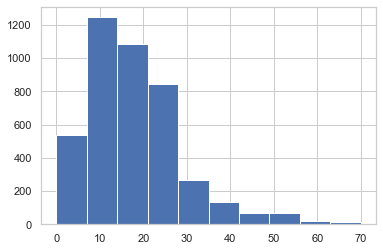

In [346]:
analisis_cliente['ANTIGUEDAD_cracion_ficha'] = 2020 - analisis_cliente['INICIO_OP']
analisis_cliente['ANTIGUEDAD_cracion_ficha'].hist()

In [347]:
#analisis_cliente['target_div_u3_u5'] = analisis_cliente[['TRX_PROM_u3m', 'TRX_PROM_u5m']].apply(
#    lambda _: get_div_means_perios(_[0], _[1]), axis=1
#)

In [348]:
#analisis_cliente['target_ratio_u3m_yoy'] = analisis_cliente['TRX_ratio_u3m_yoy'].copy()
#analisis_cliente['target_feve'] = analisis_cliente['FEVE_DURO'].copy()

In [349]:
#targets = analisis_cliente[['COD_UNICO', 'PERIODO', 'target_div_u3_u5', 'target_ratio_u3m_yoy', 'target_feve']]

#del analisis_cliente['target_div_u3_u5']
#del analisis_cliente['target_ratio_u3m_yoy']
#del analisis_cliente['target_feve']

#targets['PERIODO'] = targets['PERIODO'] .apply(
#    lambda _: (datetime.strptime(_, '%Y%m') - relativedelta(months=1)).strftime('%Y%m')
#)
#targets['PERIODO'].max()

In [350]:
#analisis_cliente = analisis_cliente.merge(
#    targets, how='left', on=['PERIODO', 'COD_UNICO']
#)

In [351]:
#analisis_cliente['FEVE'] = analisis_cliente['FEVE'].combine_first(analisis_cliente['target_feve'])

In [352]:
#analisis_cliente['target_feve'] = analisis_cliente['FEVE'].copy()
#del analisis_cliente['FEVE']

#analisis_cliente.head(3)

In [353]:
#analisis_cliente.to_excel('analisis_cliente_targets.xlsx', index=False)

In [354]:
analisis_cliente['target_feve_reducir_salir'].unique()

array([ 0.,  1., nan])

In [355]:
#def get_preocupa(val):
#    if pd.isnull(val) or not val:
#        return None
#    
#    return 1 if val in ['REDUCIR', 'SEGUIR COVID', 'SALIR'] else 0

#analisis_cliente['target_preocupa'] = analisis_cliente['target_feve'].apply(get_preocupa)
#analisis_cliente['target_preocupa'].value_counts(dropna=False)

In [356]:
#def get_preocupa(val):
#    if pd.isnull(val) or not val:
#        return None
#    
#    return 1 if val in ['SEGUIR COVID', 'SALIR'] else 0

#analisis_cliente['target_salir_reducir'] = analisis_cliente['target_feve'].apply(get_preocupa)
#analisis_cliente['target_salir_reducir'].value_counts(dropna=False)

In [357]:
def graph_numeric(data, col_init, col_out, **kwargs):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

    sns.lineplot(x=col_init, y=col_out, data=data, ax=axes[0])
    sns.violinplot(x=col_init, y=col_out, data=data, ax=axes[1], orient='h')
    
    legend_list = []
    for opt in data[col_out].unique():
        sns.kdeplot(data[data[col_out] == opt][col_init], ax=axes[2], shade=True)
        legend_list.append(opt)
    plt.legend(legend_list)

def graph_categoryc(data, col_init, col_out, **kwargs):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
    
    cp = sns.countplot(x=col_init, hue=col_out, data=data, ax=axes[0])
    plt.setp(cp.get_xticklabels(), rotation=90)
    
    cross = pd.crosstab(data[col_out], data[col_init])
    sum_total = sum([cross[col].sum() for col in cross.columns])
    sns.heatmap(
        cross/sum_total, 
        annot=True, ax=axes[1], center=0, cmap="YlGnBu", fmt='.2%'
    )
    bp = sns.barplot(
        x=col_init, y=col_out, data=data, ax=axes[2]
    )
    plt.setp(bp.get_xticklabels(), rotation=90)

In [358]:
[col for col in analisis_cliente.columns if 'target' in col]

['target_yoy_quartil_03',
 'target_yoy_quartil_04',
 'target_yoy_quartil_05',
 'target_yoy_quartil_06',
 'target_yoy_quartil_07',
 'target_feve_reducir_salir',
 'target_seguircovid_reducir_salir',
 'cuasi_target_preocupa',
 'target_no_normales_ibk_sbs']

In [359]:
print(analisis_cliente.columns)

Index(['PERIODO', 'COD_UNICO', 'RUC', 'FLG_VIGENTE', 'NOMBRE_COMPLETO',
       'FLG_SUSPENDIDO', 'FLG_VENCIDA', 'FLG_CANCELADO', 'FLG_MONOLINEA',
       'FLG_SOLO_REACTIVA',
       ...
       'subsector_obervado_banca', 'DIFF_TIME_INICIO_IBK_FIRST_PRODUCT',
       'IS_NORMAL_IBK_SBS', 'LUGAR', 'target_feve_reducir_salir',
       'cambio_seguir_covid', 'target_seguircovid_reducir_salir',
       'cuasi_target_preocupa', 'target_no_normales_ibk_sbs',
       'ANTIGUEDAD_cracion_ficha'],
      dtype='object', length=412)


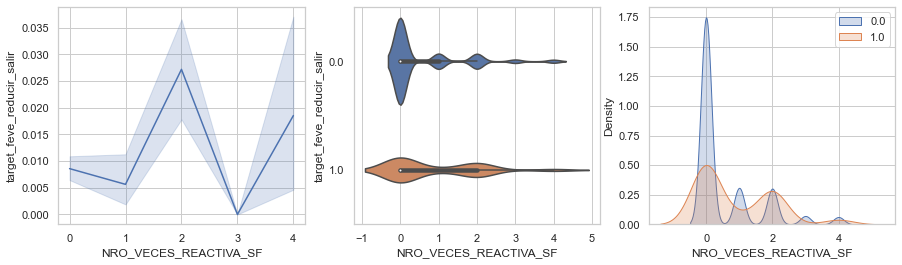

In [360]:
graph_numeric(
    analisis_cliente[
        (analisis_cliente['target_feve_reducir_salir'].notnull()) & (analisis_cliente['PERIODO'].astype(int) >= 202007)
    ], 'NRO_VECES_REACTIVA_SF', 'target_feve_reducir_salir'
)

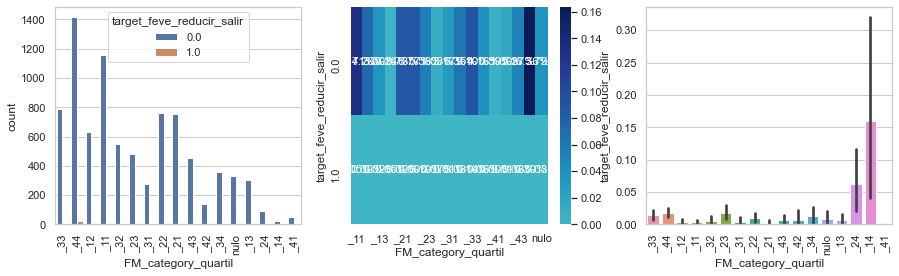

In [361]:
graph_categoryc(
    analisis_cliente[
        (analisis_cliente['target_feve_reducir_salir'].notnull()) & (analisis_cliente['PERIODO'].astype(int) >= 202007)
    ], 'FM_category_quartil', 'target_feve_reducir_salir'
)

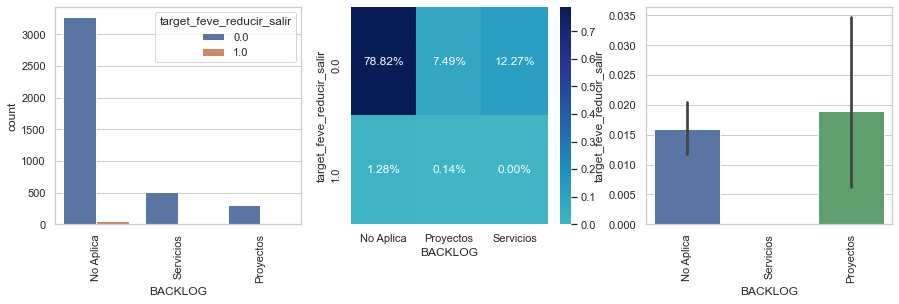

In [362]:
graph_categoryc(
    analisis_cliente[
        (analisis_cliente['target_feve_reducir_salir'].notnull()) & (analisis_cliente['PERIODO'].astype(int) >= 202007)
    ], 'BACKLOG', 'target_feve_reducir_salir'
)

In [363]:
analisis_cliente[
        (analisis_cliente['target_yoy_quartil_05'].notnull()) & (analisis_cliente['PERIODO'].astype(int) >= 202007)
]['target_yoy_quartil_05'].value_counts()

0.0    4907
1.0    3515
Name: target_yoy_quartil_05, dtype: int64

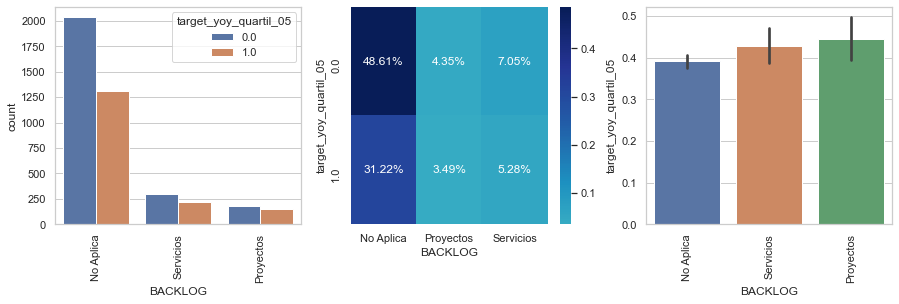

In [364]:
graph_categoryc(
    analisis_cliente[
        (analisis_cliente['target_yoy_quartil_05'].notnull()) & (analisis_cliente['PERIODO'].astype(int) >= 202007)
    ], 'BACKLOG', 'target_yoy_quartil_05'
)

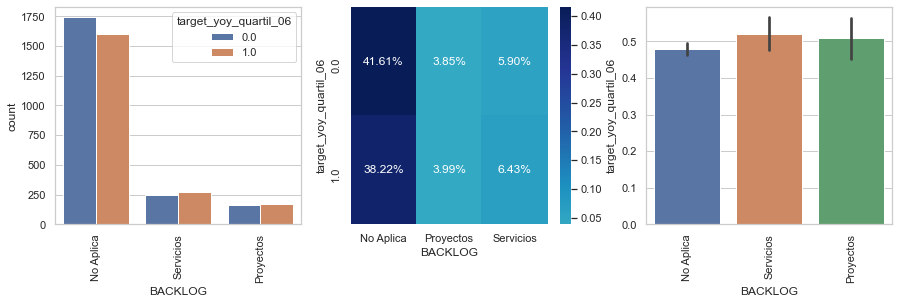

In [365]:
graph_categoryc(
    analisis_cliente[
        (analisis_cliente['target_yoy_quartil_06'].notnull()) & (analisis_cliente['PERIODO'].astype(int) >= 202007)
    ], 'BACKLOG', 'target_yoy_quartil_06'
)

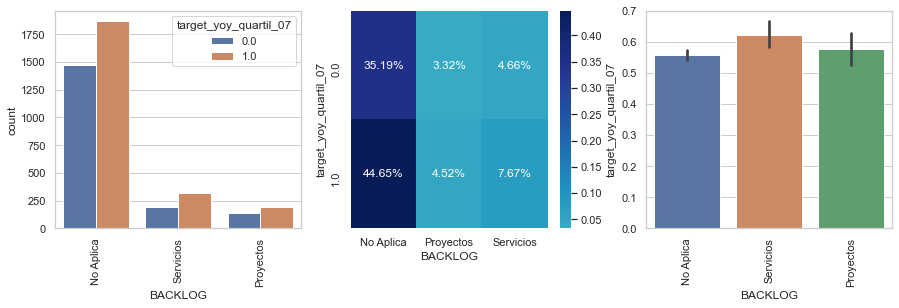

In [366]:
graph_categoryc(
    analisis_cliente[
        (analisis_cliente['target_yoy_quartil_07'].notnull()) & (analisis_cliente['PERIODO'].astype(int) >= 202007)
    ], 'BACKLOG', 'target_yoy_quartil_07'
)

In [367]:
gc.collect()

65872

In [368]:
analisis_cliente.shape, analisis_cliente.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

((9211, 412), (9211,))

### SOW 

In [369]:
qsow = """
    SELECT * FROM ODS.HD_VMVP_SOW_ALERTA_CARTERA_BE WITH (NOLOCK)
"""
sow = pd.read_sql(
   qsow , connection_market
)
sow.head(3)

,COD_UNICO,PERIODO,MTOSALDO,MTOSALDO_IBK,MTOSALDO_DIR_SF,MTOSALDO_INDIR_SF,MTOSALDO_BBVA,MTOSALDO_BCP,MTOSALDO_BIF,MTOSALDO_SCOTIA,SOW_IBK,SOW_BBVA,SOW_BCP,SOW_BIF,SOW_SCOTIA,SOW_OTROSBCOS,PERCENT_COL_DIRECTAS_SF
0,0011873465,201911,21622653.16,0.00,21622653.16,0.00,270641.82,21352011.34,0.0,0.0,0.0,0.012516,0.987483,0.0,0.0,1.0,1.000000
1,0010655202,202004,436310.18,0.00,0.00,436310.18,0.00,436310.18,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,1.0,0.000000
2,0014249663,202004,8259449.96,8259449.96,8038337.77,221112.19,0.00,0.00,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.973229


In [370]:
sow['PERIODO'].max()

'202010'

In [371]:
sow.shape, sow.groupby(by=['COD_UNICO', 'PERIODO']).size().shape, sow['PERIODO'].max()

((39034, 17), (39034,), '202010')

### OJO , cuando tomo una cosecha uso el periodo SOW del mes anterior entonces para cruzarlo debo aumnetar un periodo

In [372]:
sow['PERIODO'] = sow['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
sow['PERIODO'].max()

'202011'

In [373]:
analisis_cliente = analisis_cliente.merge(
        sow[['PERIODO', 'COD_UNICO', 'SOW_IBK', 'SOW_BBVA', 'SOW_BCP', 'SOW_BIF', 'SOW_SCOTIA', 'SOW_OTROSBCOS', 'PERCENT_COL_DIRECTAS_SF']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 419)

<AxesSubplot:>

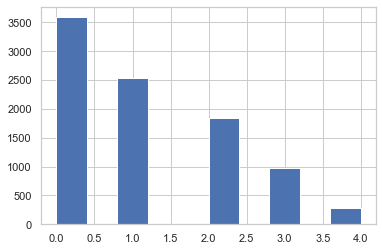

In [374]:
analisis_cliente['NRO_BANCOS_CON_MAYOR_SOW'] = analisis_cliente[['SOW_IBK', 'SOW_BBVA', 'SOW_BIF', 'SOW_SCOTIA', 'SOW_BCP']].apply(
    lambda _: int(_[0] < _[1]) + int(_[0] < _[2]) + int(_[0] < _[3]) + int(_[0] < _[4]), axis=1
)
display(analisis_cliente['NRO_BANCOS_CON_MAYOR_SOW'].hist())

analisis_cliente['NRO_BANCOS_CON_MENOR_SOW'] = analisis_cliente[['SOW_IBK', 'SOW_BBVA', 'SOW_BIF', 'SOW_SCOTIA', 'SOW_BCP']].apply(
    lambda _: int(_[0] > _[1]) + int(_[0] > _[2]) + int(_[0] > _[3]) + int(_[0] > _[4]), axis=1
)

In [375]:
analisis_cliente['TIENE_2_O_MAS_BANCOS_CON_MAYOR_SOW'] = analisis_cliente['NRO_BANCOS_CON_MAYOR_SOW'].apply(lambda _: _ >= 2).astype(int)
analisis_cliente['TIENE_3_O_MAS_BANCOS_CON_MAYOR_SOW'] = analisis_cliente['NRO_BANCOS_CON_MAYOR_SOW'].apply(lambda _: _ >= 3).astype(int)
analisis_cliente['TIENE_1_O_MAS_BANCOS_CON_MAYOR_SOW'] = analisis_cliente['NRO_BANCOS_CON_MAYOR_SOW'].apply(lambda _: _ >= 1).astype(int)

<AxesSubplot:>

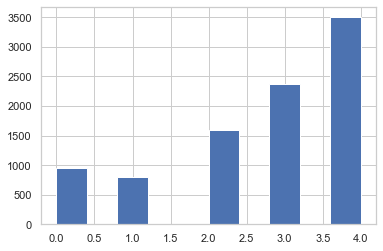

In [376]:
display(analisis_cliente['NRO_BANCOS_CON_MENOR_SOW'].hist())

In [377]:
analisis_cliente.shape, analisis_cliente.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

((9211, 424), (9211,))

In [378]:
[_ for _ in analisis_cliente.columns if 'SOW' in _.upper()]

['SOW_IBK',
 'SOW_BBVA',
 'SOW_BCP',
 'SOW_BIF',
 'SOW_SCOTIA',
 'SOW_OTROSBCOS',
 'NRO_BANCOS_CON_MAYOR_SOW',
 'NRO_BANCOS_CON_MENOR_SOW',
 'TIENE_2_O_MAS_BANCOS_CON_MAYOR_SOW',
 'TIENE_3_O_MAS_BANCOS_CON_MAYOR_SOW',
 'TIENE_1_O_MAS_BANCOS_CON_MAYOR_SOW']

In [379]:
for col in [_ for _ in analisis_cliente.columns if 'SOW' in _.upper()]:
    print(col)
    analisis_cliente[col + '_ULT_RCC'] = analisis_cliente[col].copy()
    del  analisis_cliente[col]
#analisis_cliente['SOW_IBK_utl_rcc'] = analisis_cliente['SOW_IBK'].copy()
#del analisis_cliente['SOW_IBK']

SOW_IBK
SOW_BBVA
SOW_BCP
SOW_BIF
SOW_SCOTIA
SOW_OTROSBCOS
NRO_BANCOS_CON_MAYOR_SOW
NRO_BANCOS_CON_MENOR_SOW
TIENE_2_O_MAS_BANCOS_CON_MAYOR_SOW
TIENE_3_O_MAS_BANCOS_CON_MAYOR_SOW
TIENE_1_O_MAS_BANCOS_CON_MAYOR_SOW


In [380]:
sow['PERIODO'].max(), sow['PERIODO'].min(),analisis_cliente.shape, analisis_cliente.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

('202011', '201904', (9211, 424), (9211,))

## VARIACION SOW

In [381]:
for tramo in tramos[::-1]:
    #print(tramo[0], tramo[-1], tramo[-2])
    historia = tramo[1][-8:-2]
    print( ' histroia ', historia, ', Mes cerrado', tramo[0], ', cosecha ', tramo[1][-3] , ', Meses target', tramo[-1], tramo[-2])

 histroia  [202006, 202007, 202008, 202009, 202010, 202011] , Mes cerrado 202011 , cosecha  202011 , Meses target [202012, 202101] [201912, 202001]
 histroia  [202005, 202006, 202007, 202008, 202009, 202010] , Mes cerrado 202010 , cosecha  202010 , Meses target [202011, 202012] [201911, 201912]
 histroia  [202004, 202005, 202006, 202007, 202008, 202009] , Mes cerrado 202009 , cosecha  202009 , Meses target [202010, 202011] [201910, 201911]
 histroia  [202003, 202004, 202005, 202006, 202007, 202008] , Mes cerrado 202008 , cosecha  202008 , Meses target [202009, 202010] [201909, 201910]
 histroia  [202002, 202003, 202004, 202005, 202006, 202007] , Mes cerrado 202007 , cosecha  202007 , Meses target [202008, 202009] [201908, 201909]


In [382]:
dicc_kpi = {
    'SOW_IBK': ['max', 'min'],
    'SOW_OTROSBCOS': ['max', 'min'],
    'PERCENT_COL_DIRECTAS_SF': ['max', 'min'] 
}

columns_base = ['SOW_IBK_MAX_', 'SOW_IBK_MIN_', 
               'SOW_OTROSBCOS_MAX_', 'SOW_OTROSBCOS_MIN_',
                'PERCENT_COL_DIRECTAS_SF_MAX_', 'PERCENT_COL_DIRECTAS_SF_MIN_'
               ]
contador = 1
cols_order = []

for tramo in tramos[::-1]:
    print(tramo[0], tramo[-1], tramo[-2])
    historia = tramo[2]
    
    _2m_anio_actual = sow[sow['PERIODO'].astype(int).isin(historia)].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    _2m_anio_actual.columns = [_ + 'historia' for _ in columns_base]
    
    #data_tramo = pd.concat(
    #    [_12m_anio_actual, _6m_anio_actual, _3m_anio_actual], axis=1
    #).reset_index()
    data_tramo = _2m_anio_actual.reset_index()
    
    try:
        data_tramo['COD_UNICO'] = data_tramo['index']
        del data_tramo['index']
    except:
        pass
    
    data_tramo['PERIODO'] = str(tramo[0])
    #print(data_tramo.columbns)
    del _2m_anio_actual
    
    #print(list(data_tramo.columns))
    if contador == 1:
        sow_cliente = data_tramo
        cols_order = list(sow_cliente.columns)
    else:
        sow_cliente = pd.concat(
            [sow_cliente, data_tramo], axis=0
        )[cols_order]
    
    contador += 1
    #print(data_tramo.head())
    print("--", sow_cliente.shape)


202011 [202012, 202101] [201912, 202001]
-- (2025, 8)
202010 [202011, 202012] [201911, 201912]
-- (4047, 8)
202009 [202010, 202011] [201910, 201911]
-- (6064, 8)
202008 [202009, 202010] [201909, 201910]
-- (8080, 8)
202007 [202008, 202009] [201908, 201909]
-- (10092, 8)


In [383]:
sow_cliente.head()

,COD_UNICO,SOW_IBK_MAX_historia,SOW_IBK_MIN_historia,SOW_OTROSBCOS_MAX_historia,SOW_OTROSBCOS_MIN_historia,PERCENT_COL_DIRECTAS_SF_MAX_historia,PERCENT_COL_DIRECTAS_SF_MIN_historia,PERIODO
0,0000002469,0.178770,0.000000,0.880775,0.472807,0.925608,0.865684,202011
1,0000003392,0.130253,0.076237,0.895014,0.845627,1.000000,0.997061,202011
2,0000006114,0.859024,0.836208,0.000000,0.000000,0.792603,0.780072,202011
3,0000008318,0.559123,0.094986,0.905013,0.440876,0.540509,0.024248,202011
4,0000037374,0.000000,0.000000,1.000000,1.000000,1.000000,0.963029,202011


In [384]:
sow_cliente.shape, sow_cliente.groupby(by=['PERIODO', 'COD_UNICO']).size().shape, analisis_cliente.shape, analisis_cliente.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

((10092, 8), (10092,), (9211, 424), (9211,))

In [385]:
sow_cliente.shape

(10092, 8)

### STROP SPW

In [386]:
analisis_cliente = analisis_cliente.merge(
    sow_cliente, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 430)

### DIAS DE ATRASO

In [387]:
query = """
    SELECT * FROM ODS.HD_VMVP_DIAS_ATRASO_IBK_ALERTAS_CARTERA_BE WITH (NOLOCK)
"""
atrsaso = pd.read_sql(
   query , connection_market
)
atrsaso.head(20)

,PERIODO,COD_UNICO,ESTADO,MAX_DIAS_ATRASO,DEUDA
0,201912,0013812756,VIGENTE,23.0,536251.0
1,201905,0009159289,VENCIDO,64.0,40.0
2,202008,0011869240,VIGENTE,13.0,12853769.0
3,202005,0013532403,VIGENTE,7.0,981411.0
4,201911,0011228447,VIGENTE,3.0,813542.0
5,202008,0010821635,VIGENTE,6.0,889294.0
6,202012,0014809819,VIGENTE,0.0,214657.0
7,202004,0015009067,VIGENTE,30.0,3419757.0
8,201910,0010008924,VIGENTE,8.0,5690060.0
9,202005,0011812988,VIGENTE,30.0,5118425.0


In [388]:
pivoteo = pd.pivot_table(
    atrsaso, values='MAX_DIAS_ATRASO', index=['COD_UNICO', 'PERIODO'], columns=['ESTADO'], aggfunc=len, fill_value=0
)
for col in pivoteo.columns:
    pivoteo['TIENE_DEUDA_'+ col + '_IBK'] = pivoteo[col].apply(lambda _: 1 if _ > 0 else 0)
    del pivoteo[col]
    
pivoteo['TIENE_VIEGNTE_VENCIDO_IBK'] = pivoteo[['TIENE_DEUDA_VENCIDO_IBK', 'TIENE_DEUDA_VIGENTE_IBK']].apply(
    lambda _: 1 if _[0] > 0 and _[1] > 0 else 0, axis=1)

pivoteo = pivoteo.reset_index().reset_index(drop=True)
pivoteo.columns = [_.replace('/', '') for _ in pivoteo.columns]
print(pivoteo['PERIODO'].max())
pivoteo.head()

202012


,COD_UNICO,PERIODO,TIENE_DEUDA_REFINANCIADO_IBK,TIENE_DEUDA_VENCIDO_IBK,TIENE_DEUDA_VIGENTE_IBK,TIENE_VIEGNTE_VENCIDO_IBK
0,0000002469,202010,0,0,1,0
1,0000002469,202011,0,0,1,0
2,0000002469,202012,0,0,1,0
3,0000003392,201909,0,0,1,0
4,0000003392,202004,0,0,1,0


In [389]:
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 434)

In [390]:
#atrsaso = atrsaso.groupby(by=['PERIODO', 'COD_UNICO'])['MAX_DIAS_ATRASO'].max().reset_index()
#atrsaso.head()

In [391]:
#atrsaso['TIENE_DIAS_DE_ATRASO_IBK_ESTE_MES'] = atrsaso['MAX_DIAS_ATRASO'].apply(lambda _: 1 if _ >= 1 else 0)

#analisis_cliente = analisis_cliente.merge(
#    atrsaso[['PERIODO', 'COD_UNICO', 'TIENE_DIAS_DE_ATRASO_IBK_ESTE_MES']], how='left', on=['PERIODO', 'COD_UNICO']
#)
#analisis_cliente.shape

In [392]:
atraso_ = pd.pivot_table(
    atrsaso, 
    values='MAX_DIAS_ATRASO', index=['COD_UNICO'], columns=['PERIODO'], aggfunc=np.max, fill_value=0
).unstack().reset_index() 
atraso_.columns = ['PERIODO', 'COD_UNICO', 'MAX_DIAS_ATRASO']
atraso_.head()

,PERIODO,COD_UNICO,MAX_DIAS_ATRASO
0,201902,0000002469,0
1,201902,0000003392,0
2,201902,0000006114,0
3,201902,0000008318,0
4,201902,0000039982,0


In [393]:
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    break

202007 [202008, 202009] 202007 [202002, 202003, 202004, 202005, 202006, 202007]


### >>> DIAS DE ATRASO

In [394]:
delante = [202009, 202010]
just_antes = 202008

no_normales = list(atraso_[
    (atraso_['MAX_DIAS_ATRASO'] >= 8) & (
        (atraso_['PERIODO'] == str(delante[0])) | (atraso_['PERIODO'] == str(delante[1]))
    )
]['COD_UNICO'])

descarte = list(atraso_[
    (atraso_['MAX_DIAS_ATRASO'] >= 8) & (atraso_['PERIODO'] == str(just_antes)) 
]['COD_UNICO'])

print(len(no_normales))
print(len(descarte))
quedan = set(no_normales) - set(descarte)
print(len(quedan))

331
205
124


In [395]:
no_blancos = atraso_[
        (atraso_['MAX_DIAS_ATRASO'] > 8) | (
            atraso_['PERIODO'].isin([202003, 202004, 202005, 202006, 202007, 202008])
        )
    ]

no_blancos[no_blancos['MAX_DIAS_ATRASO'] > 8].shape, no_blancos.shape

((3428, 3), (3428, 3))

### >> MAAS DE 8 DIAS

In [396]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    no_normales = list(atraso_[
        (atraso_['MAX_DIAS_ATRASO'] >= 8) & (
            (atraso_['PERIODO'] == str(delante[0])) | (atraso_['PERIODO'] == str(delante[1]))
        )
    ]['COD_UNICO'])

    descarte = list(atraso_[
        (atraso_['MAX_DIAS_ATRASO'] >= 8) & (atraso_['PERIODO'] == str(just_antes)) 
    ]['COD_UNICO'])
    
    no_blancos = set(atraso_[
        (atraso_['MAX_DIAS_ATRASO'] >= 8) | (
            atraso_['PERIODO'].isin(tramo[2])
        )
    ]['COD_UNICO'])
    
    #mas_descarte_blancos = 
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in no_normales and codigo not in descarte:
            return 1
        elif codigo in descarte or codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_8_dias_atraso'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        deudor = quedan
    else:
        deudor = pd.concat(
            [deudor, quedan], axis=0
        )
    
    contador += 1
    

    # LOS QUE QUEDAN
    #feve = feve[~feve['COD_UNICO'].isin(descarte)]
    #feve['target_feve_reducir_salir'] = 1

    #feve = feve[['PERIODO', 'COD_UNICO', 'target_feve_reducir_salir']]
    
    print(deudor.shape, deudor[deudor['target_8_dias_atraso'] == 1].shape)
deudor.head()

202007 [202008, 202009] [202002, 202003, 202004, 202005, 202006, 202007]
(2036, 4) (160, 4)
202008 [202009, 202010] [202003, 202004, 202005, 202006, 202007, 202008]
(4072, 4) (284, 4)
202009 [202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009]
(6108, 4) (368, 4)
202010 [202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010]
(8144, 4) (429, 4)
202011 [202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011]
(10180, 4) (443, 4)


,COD_UNICO,0,target_8_dias_atraso,PERIODO
0,0000002469,5,0.0,202007
1,0000003392,5,NaN,202007
2,0000006114,5,0.0,202007
3,0000008318,5,0.0,202007
4,0000037374,2,0.0,202007


In [397]:
analisis_cliente = analisis_cliente.merge(
    deudor[['PERIODO', 'COD_UNICO', 'target_8_dias_atraso']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 435)

In [398]:
analisis_cliente['target_8_dias_atraso'].value_counts()

0.0    5051
1.0     442
Name: target_8_dias_atraso, dtype: int64

In [399]:
for tramo in tramos:
    print(tramo[0], tramo[2], tramo[1][-3])

202007 [202002, 202003, 202004, 202005, 202006, 202007] 202007
202008 [202003, 202004, 202005, 202006, 202007, 202008] 202008
202009 [202004, 202005, 202006, 202007, 202008, 202009] 202009
202010 [202005, 202006, 202007, 202008, 202009, 202010] 202010
202011 [202006, 202007, 202008, 202009, 202010, 202011] 202011


### >>> MAS DE 15 DIAS 

In [400]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    no_normales = list(atraso_[
        (atraso_['MAX_DIAS_ATRASO'] >= 15) & (
            (atraso_['PERIODO'] == str(delante[0])) | (atraso_['PERIODO'] == str(delante[1]))
        )
    ]['COD_UNICO'])

    descarte = list(atraso_[
        (atraso_['MAX_DIAS_ATRASO'] >= 15) & (atraso_['PERIODO'] == str(just_antes)) 
    ]['COD_UNICO'])
    
    no_blancos = set(atraso_[
        (atraso_['MAX_DIAS_ATRASO'] >= 15) | (
            atraso_['PERIODO'].isin(tramo[2])
        )
    ]['COD_UNICO'])
    
    #mas_descarte_blancos = 
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in no_normales and codigo not in descarte:
            return 1
        elif codigo in descarte or codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_15_dias_atraso'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        deudor = quedan
    else:
        deudor = pd.concat(
            [deudor, quedan], axis=0
        )
    
    contador += 1
    

    # LOS QUE QUEDAN
    #feve = feve[~feve['COD_UNICO'].isin(descarte)]
    #feve['target_feve_reducir_salir'] = 1

    #feve = feve[['PERIODO', 'COD_UNICO', 'target_feve_reducir_salir']]
    
    print(deudor.shape, deudor[deudor['target_15_dias_atraso'] == 1].shape)
deudor.head()

202007 [202008, 202009] 202007
(2036, 4) (113, 4)
202008 [202009, 202010] 202008
(4072, 4) (212, 4)
202009 [202010, 202011] 202009
(6108, 4) (280, 4)
202010 [202011, 202012] 202010
(8144, 4) (327, 4)
202011 [202012, 202101] 202011
(10180, 4) (334, 4)


,COD_UNICO,0,target_15_dias_atraso,PERIODO
0,0000002469,5,0.0,202007
1,0000003392,5,NaN,202007
2,0000006114,5,0.0,202007
3,0000008318,5,0.0,202007
4,0000037374,2,0.0,202007


In [401]:
analisis_cliente = analisis_cliente.merge(
    deudor[['PERIODO', 'COD_UNICO', 'target_15_dias_atraso']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 436)

In [402]:
analisis_cliente['target_15_dias_atraso'].value_counts()

0.0    6234
1.0     332
Name: target_15_dias_atraso, dtype: int64

## DEUDA SIN REACTIVA

In [403]:
query_deuda = """
    SELECT * FROM ODS.HD_VMVP_DEUDA_SIN_REACTIVA_ALERTA_CARTERA_BE WITH (NOLOCK)
"""
deuda = pd.read_sql(
   query_deuda , connection_market
)
deuda.head(10)

,COD_UNICO,PERIODO,SITUACION,TIPO_PRODUCTO,PRODUCTO,MTOSALDO,MTOSALDO_IBK,MTOSALDO_BBVA,MTOSALDO_BCP,MTOSALDO_BIF,...,PROM_DIAS_ATRASO_BBVA,PROM_DIAS_ATRASO_BCP,PROM_DIAS_ATRASO_BIF,PROM_DIAS_ATRASO_SCOTIA,MAX_DIAS_ATRASO_SF,MAX_DIAS_ATRASO_IBK,MAX_DIAS_ATRASO_BBVA,MAX_DIAS_ATRASO_BCP,MAX_DIAS_ATRASO_BIF,MAX_DIAS_ATRASO_SCOTIA
0,0009808462,201905,VIGENTE,COL. DIRECTAS,PRESTAMOS,114347.48,0.00,114347.48,0.00,0.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
1,0009838152,201905,VIGENTE,COL. DIRECTAS,LEASING,211921.13,73869.40,0.00,86275.06,51776.67,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
2,0010008924,201905,VIGENTE,COL. DIRECTAS,PRESTAMOS,23307839.02,3369000.00,6836600.00,6919307.85,1339762.87,...,NaN,1.0,NaN,1.0,1,0,0,1,0,1
3,0010042967,201905,VIGENTE,COL. DIRECTAS,COMEX,7248955.46,0.00,3341600.03,1647417.91,0.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
4,0010087482,201905,VIGENTE,COL. DIRECTAS,LEASING,518891.50,479018.44,36339.23,0.00,0.00,...,3.0,NaN,NaN,NaN,3,0,3,0,0,0
5,0010222310,201905,VIGENTE,COL. DIRECTAS,LEASING,104670.40,104670.40,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
6,0008331770,201905,VIGENTE,COL. DIRECTAS,TARJETAS DE CREDITO,11429.02,0.00,0.00,11429.02,0.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
7,0008339809,201905,VIGENTE,COL. DIRECTAS,TARJETAS DE CREDITO,47698.08,0.00,20557.66,0.00,0.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
8,0008341299,201905,VIGENTE,COL. DIRECTAS,TARJETAS DE CREDITO,9329.87,0.00,9329.87,0.00,0.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
9,0008402434,201905,VIGENTE,COL. DIRECTAS,LEASING,812184.82,812184.82,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0


In [404]:
print(list(deuda.columns))

['COD_UNICO', 'PERIODO', 'SITUACION', 'TIPO_PRODUCTO', 'PRODUCTO', 'MTOSALDO', 'MTOSALDO_IBK', 'MTOSALDO_BBVA', 'MTOSALDO_BCP', 'MTOSALDO_BIF', 'MTOSALDO_SCOTIA', 'PROM_DIAS_ATRASO_SF', 'PROM_DIAS_ATRASO_IBK', 'PROM_DIAS_ATRASO_BBVA', 'PROM_DIAS_ATRASO_BCP', 'PROM_DIAS_ATRASO_BIF', 'PROM_DIAS_ATRASO_SCOTIA', 'MAX_DIAS_ATRASO_SF', 'MAX_DIAS_ATRASO_IBK', 'MAX_DIAS_ATRASO_BBVA', 'MAX_DIAS_ATRASO_BCP', 'MAX_DIAS_ATRASO_BIF', 'MAX_DIAS_ATRASO_SCOTIA']


#### PIVOTEO POR SITUACION ANTES DE FILTRAR

In [405]:
from datetime import datetime
deuda['PERIODO'].max(), deuda['PERIODO'].min()

('202010', '201903')

In [406]:
pivoteo = pd.pivot_table(
    deuda, values='MTOSALDO', index=['COD_UNICO', 'PERIODO'], columns=['SITUACION'], aggfunc=np.sum, fill_value=0
)
pivoteo['total'] = pivoteo.sum(axis=1)

for col in pivoteo.columns:
    pivoteo['MTO_DEUDA_' + col + '_COLDIRECT_SIN_REATCIVA_SF'] = pivoteo[col].copy()
    pivoteo[col] = pivoteo[col] / pivoteo['total']
    
del pivoteo['total']
pivoteo.columns = [('DEBT_' + col).replace(' ', '_') + '_PERCENT_ULT_RCC' if '_SIN_REATCIVA' not in col else col for col in pivoteo.columns]
pivoteo.columns = [_.replace('/', '').upper() for _ in pivoteo.columns]
pivoteo.head(2)

DEBT_JUDICIAL_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                  
0000002469 201903                             0.0   
           201904                             0.0   

                    DEBT_REFINANCIADO_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                      
0000002469 201903                                 0.0   
           201904                                 0.0   

                    DEBT_VENCIDO_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                 
0000002469 201903                            0.0   
           201904                            0.0   

                    DEBT_VIGENTE_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                 
0000002469 201903                            1.0   
           201904                            1.0   

                    MTO_DEUDA_JUDICIAL_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                 
0000002469 201903                                            0.0   
           201904                                            0.0   

                    MTO_DEUDA_REFINANCIADO_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                     
0000002469 201903                                                0.0   
           201904                                                0.0   

                    MTO_DEUDA_VENCIDO_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                
0000002469 201903                                           0.0   
           201904                                           0.0   

                    MTO_DEUDA_VIGENTE_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                
0000002469 201903                                   10318226.99   
           201904                                   10479017.70   

                    MTO_DEUDA_TOTAL_COLDIRECT_SIN_REATCIVA_SF  
COD_UNICO  PERIODO                                             
0000002469 201903                                 10318226.99  
           201904                                 10479017.70

In [407]:
for col in [_ for _ in pivoteo.columns if '_PERCENT_ULT_RCC' in _]:
    print(col)
    pivoteo[col.replace('DEBT_', 'TIENE_DEUDA_').replace('_PERCENT_ULT_RCC', '_RCC')] = pivoteo[col].apply(
        lambda _: 1 if _ > 0 else 0
    )
pivoteo.head()

DEBT_JUDICIAL_PERCENT_ULT_RCC
DEBT_REFINANCIADO_PERCENT_ULT_RCC
DEBT_VENCIDO_PERCENT_ULT_RCC
DEBT_VIGENTE_PERCENT_ULT_RCC


DEBT_JUDICIAL_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                  
0000002469 201903                             0.0   
           201904                             0.0   
           201905                             0.0   
           201906                             0.0   
           201907                             0.0   

                    DEBT_REFINANCIADO_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                      
0000002469 201903                                 0.0   
           201904                                 0.0   
           201905                                 0.0   
           201906                                 0.0   
           201907                                 0.0   

                    DEBT_VENCIDO_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                 
0000002469 201903                            0.0   
           201904                            0.0   
           201905                            0.0   
           201906                            0.0   
           201907                            0.0   

                    DEBT_VIGENTE_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                 
0000002469 201903                            1.0   
           201904                            1.0   
           201905                            1.0   
           201906                            1.0   
           201907                            1.0   

                    MTO_DEUDA_JUDICIAL_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                 
0000002469 201903                                            0.0   
           201904                                            0.0   
           201905                                            0.0   
           201906                                            0.0   
           201907                                            0.0   

                    MTO_DEUDA_REFINANCIADO_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                     
0000002469 201903                                                0.0   
           201904                                                0.0   
           201905                                                0.0   
           201906                                                0.0   
           201907                                                0.0   

                    MTO_DEUDA_VENCIDO_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                
0000002469 201903                                           0.0   
           201904                                           0.0   
           201905                                           0.0   
           201906                                           0.0   
           201907                                           0.0   

                    MTO_DEUDA_VIGENTE_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                
0000002469 201903                                   10318226.99   
           201904                                   10479017.70   
           201905                                   10920156.70   
           201906                                   10711195.78   
           201907                                   11023629.02   

                    MTO_DEUDA_TOTAL_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                              
0000002469 201903                                 10318226.99   
           201904                                 10479017.70   
           201905                                 10920156.70   
           201906                                 10711195.78   
           201907                                 11023629.02   

                    TIENE_DEUDA_JUDICIAL_RCC  TIENE_DEUDA_REFINANCIADO_RCC  \
COD_UNICO  PERIODO                                            

In [408]:
pivoteo = pivoteo.reset_index()
# SE LE SUMA UN PEIODO
pivoteo['PERIODO'] = pivoteo['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
print(pivoteo['PERIODO'].max())

pivoteo['TIENE_VIEGNTE_VENCIDO_RCC'] = pivoteo[['TIENE_DEUDA_VENCIDO_RCC', 'TIENE_DEUDA_VIGENTE_RCC']].apply(
    lambda _: 1 if _[0] > 0 and _[1] > 0 else 0, axis=1
)
pivoteo.head(5)

202011


,COD_UNICO,PERIODO,DEBT_JUDICIAL_PERCENT_ULT_RCC,DEBT_REFINANCIADO_PERCENT_ULT_RCC,DEBT_VENCIDO_PERCENT_ULT_RCC,DEBT_VIGENTE_PERCENT_ULT_RCC,MTO_DEUDA_JUDICIAL_COLDIRECT_SIN_REATCIVA_SF,MTO_DEUDA_REFINANCIADO_COLDIRECT_SIN_REATCIVA_SF,MTO_DEUDA_VENCIDO_COLDIRECT_SIN_REATCIVA_SF,MTO_DEUDA_VIGENTE_COLDIRECT_SIN_REATCIVA_SF,MTO_DEUDA_TOTAL_COLDIRECT_SIN_REATCIVA_SF,TIENE_DEUDA_JUDICIAL_RCC,TIENE_DEUDA_REFINANCIADO_RCC,TIENE_DEUDA_VENCIDO_RCC,TIENE_DEUDA_VIGENTE_RCC,TIENE_VIEGNTE_VENCIDO_RCC
0,0000002469,201904,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10318226.99,10318226.99,0,0,0,1,0
1,0000002469,201905,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10479017.70,10479017.70,0,0,0,1,0
2,0000002469,201906,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10920156.70,10920156.70,0,0,0,1,0
3,0000002469,201907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10711195.78,10711195.78,0,0,0,1,0
4,0000002469,201908,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11023629.02,11023629.02,0,0,0,1,0


In [409]:
pivoteo['DEB_SOLO_VIGENTES_SF_ULT_RCC'] = pivoteo['DEBT_VIGENTE_PERCENT_ULT_RCC'].apply(lambda _: _ == 1).astype(int)

In [410]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 436)


(9211, 451)

In [411]:
deuda.shape,  deuda[deuda['MTOSALDO_IBK'] == 0].shape

((114262, 23), (67262, 23))

In [412]:
import gc
gc.collect()

7197

In [413]:
del pivoteo

In [414]:
vigente = deuda[deuda['SITUACION'].isin(['VIGENTE', 'VENCIDO'])]
#vencido = deuda[deuda['SITUACION'] == 'VENCIDO']
#refinanciado = deuda[deuda['SITUACION'] == 'REFINANCIADO']
#judicial = deuda[deuda['SITUACION'] == 'JUDICIAL']

vigente.shape#, vencido.shape, refinanciado.shape, judicial.shape

(113517, 23)

In [415]:
vigente.head()

,COD_UNICO,PERIODO,SITUACION,TIPO_PRODUCTO,PRODUCTO,MTOSALDO,MTOSALDO_IBK,MTOSALDO_BBVA,MTOSALDO_BCP,MTOSALDO_BIF,...,PROM_DIAS_ATRASO_BBVA,PROM_DIAS_ATRASO_BCP,PROM_DIAS_ATRASO_BIF,PROM_DIAS_ATRASO_SCOTIA,MAX_DIAS_ATRASO_SF,MAX_DIAS_ATRASO_IBK,MAX_DIAS_ATRASO_BBVA,MAX_DIAS_ATRASO_BCP,MAX_DIAS_ATRASO_BIF,MAX_DIAS_ATRASO_SCOTIA
0,0009808462,201905,VIGENTE,COL. DIRECTAS,PRESTAMOS,114347.48,0.00,114347.48,0.00,0.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
1,0009838152,201905,VIGENTE,COL. DIRECTAS,LEASING,211921.13,73869.40,0.00,86275.06,51776.67,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
2,0010008924,201905,VIGENTE,COL. DIRECTAS,PRESTAMOS,23307839.02,3369000.00,6836600.00,6919307.85,1339762.87,...,NaN,1.0,NaN,1.0,1,0,0,1,0,1
3,0010042967,201905,VIGENTE,COL. DIRECTAS,COMEX,7248955.46,0.00,3341600.03,1647417.91,0.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
4,0010087482,201905,VIGENTE,COL. DIRECTAS,LEASING,518891.50,479018.44,36339.23,0.00,0.00,...,3.0,NaN,NaN,NaN,3,0,3,0,0,0


In [416]:
#target_deuda_8_dias_rcc
#MAX_DIAS_ATRASO_SF

In [417]:
delante = [202010, 202011]
just_antes = 202009

no_normales = list(vigente[
    (vigente['MAX_DIAS_ATRASO_SF'] >= 8) & (
        (vigente['PERIODO'] == str(delante[0])) | (vigente['PERIODO'] == str(delante[1]))
    )
]['COD_UNICO'])

descarte = list(vigente[
    (vigente['MAX_DIAS_ATRASO_SF'] >= 8) & (vigente['PERIODO'] == str(just_antes)) 
]['COD_UNICO'])

print(len(no_normales))
print(len(descarte))
quedan = set(no_normales) - set(descarte)
print(len(quedan))

312
288
123


In [418]:
atraso_ = vigente.copy()

atraso_['PERIODO'] = atraso_['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)

contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    no_normales = list(atraso_[
        (atraso_['MAX_DIAS_ATRASO_SF'] >= 8) & (
            (atraso_['PERIODO'] == str(delante[0])) | (atraso_['PERIODO'] == str(delante[1]))
        )
    ]['COD_UNICO'])

    descarte = list(atraso_[
        (atraso_['MAX_DIAS_ATRASO_SF'] >= 8) & (atraso_['PERIODO'] == str(just_antes)) 
    ]['COD_UNICO'])
    
    no_blancos = set(atraso_[
        (atraso_['MAX_DIAS_ATRASO_SF'] >= 8) | (
            atraso_['PERIODO'].isin(tramo[2])
        )
    ]['COD_UNICO'])
    
    #mas_descarte_blancos = 
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in no_normales and codigo not in descarte:
            return 1
        elif codigo in descarte or codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_rcc_8_dias_atraso'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        deudor = quedan
    else:
        deudor = pd.concat(
            [deudor, quedan], axis=0
        )
    
    contador += 1
    
    # LOS QUE QUEDAN
    #feve = feve[~feve['COD_UNICO'].isin(descarte)]
    #feve['target_feve_reducir_salir'] = 1

    #feve = feve[['PERIODO', 'COD_UNICO', 'target_feve_reducir_salir']]
    
    print(deudor.shape, deudor[deudor['target_rcc_8_dias_atraso'] == 1].shape)
deudor.head()

202007 [202008, 202009] [202002, 202003, 202004, 202005, 202006, 202007]
(2036, 4) (258, 4)
202008 [202009, 202010] [202003, 202004, 202005, 202006, 202007, 202008]
(4072, 4) (443, 4)
202009 [202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009]
(6108, 4) (627, 4)
202010 [202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010]
(8144, 4) (750, 4)
202011 [202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011]
(10180, 4) (750, 4)


,COD_UNICO,0,target_rcc_8_dias_atraso,PERIODO
0,0000002469,5,1.0,202007
1,0000003392,5,0.0,202007
2,0000006114,5,0.0,202007
3,0000008318,5,0.0,202007
4,0000037374,2,NaN,202007


In [419]:
print(list(atraso_['SITUACION'].unique()))

['VIGENTE', 'VENCIDO']


In [420]:
analisis_cliente = analisis_cliente.merge(
    deudor[['PERIODO', 'COD_UNICO', 'target_rcc_8_dias_atraso']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 452)

In [421]:
analisis_cliente['target_rcc_8_dias_atraso'].value_counts()

0.0    3873
1.0     702
Name: target_rcc_8_dias_atraso, dtype: int64

In [422]:
pd.crosstab(
    analisis_cliente['target_rcc_8_dias_atraso'], analisis_cliente['target_8_dias_atraso']
)

target_8_dias_atraso,0.0,1.0
target_rcc_8_dias_atraso,,
0.0,3002,77
1.0,265,101


In [423]:
analisis_cliente['target_SF_8_dias_atraso_o_mas'] = analisis_cliente[['target_8_dias_atraso', 'target_rcc_8_dias_atraso']].apply(
    lambda _: (_[0] == 1 or _[1] == 1) and not pd.isnull(_[0]) and not pd.isnull(_[1]), axis= 1
).astype(int)
analisis_cliente['target_SF_8_dias_atraso_o_mas'].value_counts()

0    8768
1     443
Name: target_SF_8_dias_atraso_o_mas, dtype: int64

In [424]:
analisis_cliente['PERIODO'].value_counts()

202007    1923
202008    1882
202009    1832
202010    1801
202011    1773
Name: PERIODO, dtype: int64

In [425]:
vigente.shape, vigente.groupby(by=['COD_UNICO','PERIODO']).size().shape

((113517, 23), (37940,))

## RECURRENCIA DE ATRASSOS

In [426]:
acum = generate_listado_u3m(
    atraso_, 'listados_atrasos_max_mes', values='MAX_DIAS_ATRASO_SF',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=max
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(2006, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(4012, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(6018, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(8024, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(10030, 3)


,COD_UNICO,listados_atrasos_max_mes,PERIODO
0,0000002469,"[6, 8, 7, 5, 8, 7, 7, 8, 6, 0, 0, 4]",202007
1,0000003392,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202007
2,0000006114,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202007
3,0000008318,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202007
4,0000037374,"[8, 9, 4, 6, 7, 7, 4, 4, 1, 0, 0, 0]",202007


In [427]:
acum.tail(50)

,COD_UNICO,listados_atrasos_max_mes,PERIODO
1956,0016387975,"[0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0]",202011
1957,0016390037,"[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0]",202011
1958,0016392414,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202011
1959,0016399085,"[4, 0, 3, 4, 10, 0, 3, 19, 50, 4, 10, 22]",202011
1960,0016401263,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202011
1961,0016402624,"[0, 0, 0, 4, 1, 2, 0, 0, 0, 0, 0, 0]",202011
1962,0016412662,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202011
1963,0016414889,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202011
1964,0016452109,"[0, 0, 0, 0, 15, 0, 1, 1, 2, 21, 15, 0]",202011
1965,0016464257,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14]",202011


<AxesSubplot:>

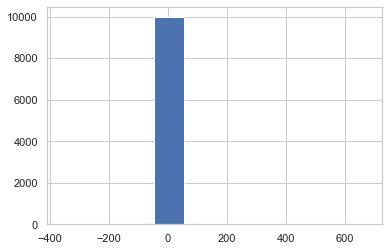

In [428]:
acum['ATRASO_PROM_U12M_COLDIRECT_VIG_VENC_SF'] = acum['listados_atrasos_max_mes'].apply(lambda _: np.mean(_[-12:]))
acum['ATRASO_PROM_U6M_COLDIRECT_VIG_VENC_SF'] = acum['listados_atrasos_max_mes'].apply(lambda _: np.mean(_[-6:]))
acum['DIFF_ATRASO_PROM_U6M_U12M_COLDIRECT_SF'] = acum['ATRASO_PROM_U6M_COLDIRECT_VIG_VENC_SF'] - acum['ATRASO_PROM_U12M_COLDIRECT_VIG_VENC_SF'] 

acum['DIFF_ATRASO_PROM_U6M_U12M_COLDIRECT_SF'].hist()

<AxesSubplot:>

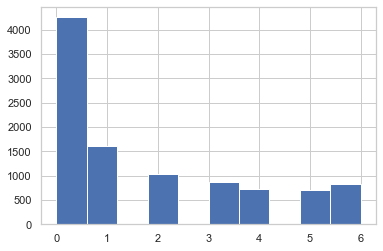

In [429]:
acum['NRO_MESES_CON_ATRASO_U6M_COLDIRECT_SF'] = acum['listados_atrasos_max_mes'].apply(
    lambda _: len([mes for mes in _[-6:] if mes > 0])
)                                                                       
acum['NRO_MESES_CON_ATRASO_U6M_COLDIRECT_SF'].hist()                                                                                                                                                                                          

<AxesSubplot:>

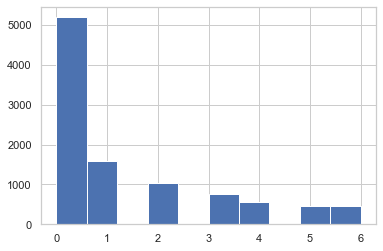

In [430]:
acum['NRO_MESES_CON_ATRASO_4diasomas_U6M_COLDIRECT_SF'] = acum['listados_atrasos_max_mes'].apply(
    lambda _: len([mes for mes in _[-6:] if mes >= 4])
)                                                                       
acum['NRO_MESES_CON_ATRASO_4diasomas_U6M_COLDIRECT_SF'].hist() 

In [431]:
acum['TIENE_AUMENTO_PROMEDIO_DE_DIAS_DE_ATRASO_COLDIRECT_SF'] = acum['DIFF_ATRASO_PROM_U6M_U12M_COLDIRECT_SF'].apply(lambda _: _> 0).astype(int)
acum['TIENE_AUMENTO_PROMEDIO_DE_DIAS_DE_ATRASO_COLDIRECT_SF'].value_counts()

0    6668
1    3362
Name: TIENE_AUMENTO_PROMEDIO_DE_DIAS_DE_ATRASO_COLDIRECT_SF, dtype: int64

In [432]:
del acum['listados_atrasos_max_mes']
acum.head()

,COD_UNICO,PERIODO,ATRASO_PROM_U12M_COLDIRECT_VIG_VENC_SF,ATRASO_PROM_U6M_COLDIRECT_VIG_VENC_SF,DIFF_ATRASO_PROM_U6M_U12M_COLDIRECT_SF,NRO_MESES_CON_ATRASO_U6M_COLDIRECT_SF,NRO_MESES_CON_ATRASO_4diasomas_U6M_COLDIRECT_SF,TIENE_AUMENTO_PROMEDIO_DE_DIAS_DE_ATRASO_COLDIRECT_SF
0,0000002469,202007,5.500000,4.166667,-1.333333,4,4,0
1,0000003392,202007,0.000000,0.000000,0.000000,0,0,0
2,0000006114,202007,0.000000,0.000000,0.000000,0,0,0
3,0000008318,202007,0.000000,0.000000,0.000000,0,0,0
4,0000037374,202007,4.166667,1.500000,-2.666667,3,2,0


In [433]:
acum['PERIODO'] = acum['PERIODO'].astype(str)

analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 459)

In [434]:
del acum
del atraso_

### PIVOTEO DE PRODUCTOS SOBRE VIGENTES Y VENCIDOS

In [435]:
pivoteo = pd.pivot_table(
    vigente, values='MTOSALDO', index=['COD_UNICO', 'PERIODO'], columns=['PRODUCTO', 'SITUACION'], aggfunc=np.sum, fill_value=0
)
pivoteo['total'] = pivoteo.sum(axis=1)

for col in pivoteo.columns:
    pivoteo[col] = pivoteo[col] / pivoteo['total']

del pivoteo['total']
pivoteo.columns = [('DEBT_' + '_'.join(col)).replace(' ', '_') + '_PERCENT_ULT_RCC' for col in pivoteo.columns]


for col in pivoteo.columns:
    pivoteo[col.replace('DEBT_', 'TIENE_DEUDA_').replace('_PERCENT_ULT_RCC', '_RCC')] = pivoteo[col].apply(
        lambda _: 1 if _ > 0 else 0
    )
pivoteo = pivoteo.reset_index()

pivoteo['PERIODO'] = pivoteo['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
print(pivoteo['PERIODO'].max())
pivoteo.columns = [_.replace('/', '') for _ in pivoteo.columns]

pivoteo.head()

202011


,COD_UNICO,PERIODO,DEBT_COMEX_VENCIDO_PERCENT_ULT_RCC,DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC,DEBT_DESCUENTOS_VENCIDO_PERCENT_ULT_RCC,DEBT_DESCUENTOS_VIGENTE_PERCENT_ULT_RCC,DEBT_FACTORING_VENCIDO_PERCENT_ULT_RCC,DEBT_FACTORING_VIGENTE_PERCENT_ULT_RCC,DEBT_LEASING_VENCIDO_PERCENT_ULT_RCC,DEBT_LEASING_VIGENTE_PERCENT_ULT_RCC,...,TIENE_DEUDA_LEASING_VENCIDO_RCC,TIENE_DEUDA_LEASING_VIGENTE_RCC,TIENE_DEUDA_OTROS_VENCIDO_RCC,TIENE_DEUDA_OTROS_VIGENTE_RCC,TIENE_DEUDA_PRESTAMOS_VENCIDO_RCC,TIENE_DEUDA_PRESTAMOS_VIGENTE_RCC,TIENE_DEUDA_SOBREGIROS__AVANCES_VENCIDO_RCC,TIENE_DEUDA_SOBREGIROS__AVANCES_VIGENTE_RCC,TIENE_DEUDA_TARJETAS_DE_CREDITO_VENCIDO_RCC,TIENE_DEUDA_TARJETAS_DE_CREDITO_VIGENTE_RCC
0,0000002469,201904,0.0,0.000000,0.0,0.657995,0.0,0.153178,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
1,0000002469,201905,0.0,0.076343,0.0,0.614141,0.0,0.124118,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
2,0000002469,201906,0.0,0.073259,0.0,0.609396,0.0,0.135836,0.0,0.0,...,0,0,0,0,0,1,0,1,0,1
3,0000002469,201907,0.0,0.046680,0.0,0.614491,0.0,0.158140,0.0,0.0,...,0,0,0,0,0,1,0,1,0,1
4,0000002469,201908,0.0,0.057150,0.0,0.574798,0.0,0.191801,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1


In [436]:
pivoteo['NRO_PROD_DEUDA_VIGENTE_SF_ULT_RCC'] = pivoteo[[col for col in pivoteo.columns if 'TIENE' in col.upper() and 'VIGENTE' in col.upper()]].sum(axis=1)
pivoteo['NRO_PROD_DEUDA_VENCIDO_SF_ULT_RCC'] = pivoteo[[col for col in pivoteo.columns if 'TIENE' in col.upper() and 'VENCIDO' in col.upper()]].sum(axis=1)
pivoteo.columns

Index(['COD_UNICO', 'PERIODO', 'DEBT_COMEX_VENCIDO_PERCENT_ULT_RCC',
       'DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC',
       'DEBT_DESCUENTOS_VENCIDO_PERCENT_ULT_RCC',
       'DEBT_DESCUENTOS_VIGENTE_PERCENT_ULT_RCC',
       'DEBT_FACTORING_VENCIDO_PERCENT_ULT_RCC',
       'DEBT_FACTORING_VIGENTE_PERCENT_ULT_RCC',
       'DEBT_LEASING_VENCIDO_PERCENT_ULT_RCC',
       'DEBT_LEASING_VIGENTE_PERCENT_ULT_RCC',
       'DEBT_OTROS_VENCIDO_PERCENT_ULT_RCC',
       'DEBT_OTROS_VIGENTE_PERCENT_ULT_RCC',
       'DEBT_PRESTAMOS_VENCIDO_PERCENT_ULT_RCC',
       'DEBT_PRESTAMOS_VIGENTE_PERCENT_ULT_RCC',
       'DEBT_SOBREGIROS__AVANCES_VENCIDO_PERCENT_ULT_RCC',
       'DEBT_SOBREGIROS__AVANCES_VIGENTE_PERCENT_ULT_RCC',
       'DEBT_TARJETAS_DE_CREDITO_VENCIDO_PERCENT_ULT_RCC',
       'DEBT_TARJETAS_DE_CREDITO_VIGENTE_PERCENT_ULT_RCC',
       'TIENE_DEUDA_COMEX_VENCIDO_RCC', 'TIENE_DEUDA_COMEX_VIGENTE_RCC',
       'TIENE_DEUDA_DESCUENTOS_VENCIDO_RCC',
       'TIENE_DEUDA_DESCUENTOS_VIGENTE_RCC',
       

In [437]:
pivoteo['TIENE_SOBREGIRO_Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_DEUDA_LEASING_VIGENTE_RCC', 'TIENE_DEUDA_SOBREGIROS__AVANCES_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_SOBREGIRO_COMEX_Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[
    ['TIENE_DEUDA_LEASING_VIGENTE_RCC', 'TIENE_DEUDA_SOBREGIROS__AVANCES_VIGENTE_RCC', 'DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0 and _[2] > 0, axis=1
).astype(int)
pivoteo['TIENE_SOBREGIRO_Y_COMEX_VIGENTES_SF_ULT_RCC'] = pivoteo[['DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC', 'TIENE_DEUDA_SOBREGIROS__AVANCES_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_LEASING_Y_COMEX_VIGENTES_SF_ULT_RCC'] = pivoteo[['DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC', 'TIENE_DEUDA_LEASING_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_OTROS_Y_COMEX_VIGENTES_SF_ULT_RCC'] = pivoteo[['DEBT_OTROS_VIGENTE_PERCENT_ULT_RCC', 'DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_OTROS_Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[['DEBT_OTROS_VIGENTE_PERCENT_ULT_RCC', 'TIENE_DEUDA_LEASING_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_OTROS_Y__SOBREGIRO_VIGENTES_SF_ULT_RCC'] = pivoteo[['DEBT_OTROS_VIGENTE_PERCENT_ULT_RCC', 'TIENE_DEUDA_SOBREGIROS__AVANCES_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_PRESTAMOS_Y_COMEX_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_DEUDA_PRESTAMOS_VIGENTE_RCC', 'DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_PRESTAMOS_Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_DEUDA_PRESTAMOS_VIGENTE_RCC', 'TIENE_DEUDA_LEASING_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_PRESTAMOS_Y__SOBREGIRO_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_DEUDA_PRESTAMOS_VIGENTE_RCC', 'TIENE_DEUDA_SOBREGIROS__AVANCES_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_PRESTAMOS_COMEX_Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[
    ['TIENE_DEUDA_LEASING_VIGENTE_RCC', 'TIENE_DEUDA_PRESTAMOS_VIGENTE_RCC', 'DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0 and _[2] > 0, axis=1
).astype(int)
pivoteo['TIENE_TARJETACREDIT_Y_COMEX_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_DEUDA_TARJETAS_DE_CREDITO_VIGENTE_RCC', 'DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_TARJETACREDIT__Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_DEUDA_TARJETAS_DE_CREDITO_VIGENTE_RCC', 'TIENE_DEUDA_LEASING_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_TARJETACREDIT__Y__SOBREGIRO_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_DEUDA_TARJETAS_DE_CREDITO_VIGENTE_RCC', 'TIENE_DEUDA_SOBREGIROS__AVANCES_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_TARJETACREDIT_S_COMEX_Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[
    ['TIENE_DEUDA_LEASING_VIGENTE_RCC', 'TIENE_DEUDA_TARJETAS_DE_CREDITO_VIGENTE_RCC', 'DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0 and _[2] > 0, axis=1
).astype(int)
pivoteo['TIENE_PRESTAMOS_Y__TARJETACREDIT_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_DEUDA_PRESTAMOS_VIGENTE_RCC', 'TIENE_DEUDA_TARJETAS_DE_CREDITO_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)


In [438]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 459)


(9211, 509)

In [439]:
pivoteo = pd.pivot_table(
    deuda, values='MTOSALDO', index=['COD_UNICO', 'PERIODO'], columns=['SITUACION'], aggfunc=np.sum, fill_value=0
)
pivoteo['total'] = pivoteo.sum(axis=1)
pivoteo['PERCENT_DEBT_VENCIDO_S_DTOTAL_SF_ULT_RCC'] = pivoteo['VENCIDO'] / pivoteo['total']
pivoteo.head()

SITUACION           JUDICIAL  REFINANCIADO  VENCIDO      VIGENTE        total  \
COD_UNICO  PERIODO                                                              
0000002469 201903        0.0           0.0      0.0  10318226.99  10318226.99   
           201904        0.0           0.0      0.0  10479017.70  10479017.70   
           201905        0.0           0.0      0.0  10920156.70  10920156.70   
           201906        0.0           0.0      0.0  10711195.78  10711195.78   
           201907        0.0           0.0      0.0  11023629.02  11023629.02   

SITUACION           PERCENT_DEBT_VENCIDO_S_DTOTAL_SF_ULT_RCC  
COD_UNICO  PERIODO                                            
0000002469 201903                                        0.0  
           201904                                        0.0  
           201905                                        0.0  
           201906                                        0.0  
           201907                                        0.0

In [440]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    pivoteo.reset_index()[['PERIODO', 'COD_UNICO', 'PERCENT_DEBT_VENCIDO_S_DTOTAL_SF_ULT_RCC']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 509)


(9211, 510)

## PRODUCTO NO IBK DEUDA RCC

In [441]:
query_deuda_NO_IBK = """
    SELECT * FROM ODS.HD_VMVP_DEUDA_NO_IBK_ALERTA_CARTERA_BE WITH (NOLOCK) 
    WHERE SITUACION IN ('VIGENTE', 'VENCIDO')
"""
deuda_no_ibk = pd.read_sql(
   query_deuda_NO_IBK , connection_market
)
deuda_no_ibk.head(10)

,COD_UNICO,PERIODO,SITUACION,TIPO_PRODUCTO,PRODUCTO,MTOSALDO
0,0000003392,201903,VIGENTE,COL. DIRECTAS,COMEX,3.682980e+06
1,0000046797,201903,VIGENTE,COL. DIRECTAS,LEASING,3.196854e+05
2,0000046797,201903,VIGENTE,COL. DIRECTAS,PRESTAMOS,3.507096e+06
3,0000054197,201903,VIGENTE,COL. DIRECTAS,PRESTAMOS,5.600000e+06
4,0000218206,201903,VIGENTE,COL. DIRECTAS,LEASING,2.295532e+05
5,0000251611,201903,VIGENTE,COL. DIRECTAS,TARJETAS DE CREDITO,1.450000e+02
6,0000254136,201903,VIGENTE,COL. DIRECTAS,PRESTAMOS,7.820855e+06
7,0000256461,201903,VIGENTE,COL. DIRECTAS,COMEX,1.381760e+06
8,0000318667,201903,VIGENTE,COL. DIRECTAS,COMEX,1.367988e+07
9,0000530253,201903,VIGENTE,COL. DIRECTAS,PRESTAMOS,1.208354e+08


In [442]:
pivoteo = pd.pivot_table(
    deuda_no_ibk, values='MTOSALDO', index=['COD_UNICO', 'PERIODO'], columns=['PRODUCTO', 'SITUACION'], aggfunc=np.sum, fill_value=0
)
pivoteo.columns = [('TIENE_EN_OTRAENTIDAD_DEBT_' + '_'.join(col)).replace(' ', '_') + '_SF_ULT_RCC' for col in pivoteo.columns]

for col in pivoteo.columns:
    pivoteo[col] = pivoteo[col].apply(lambda _: 1 if _ > 0 else 0 )
    
pivoteo = pivoteo.reset_index()
pivoteo['PERIODO'] = pivoteo['PERIODO'].apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
print(pivoteo['PERIODO'].max())
pivoteo.columns = [_.replace('/', '') for _ in pivoteo.columns]

pivoteo['NRO_PROD_OTRA_ENTIDAD_DEUDAS_VENCIDO_SF_ULT_RCC'] = pivoteo[[col for col in pivoteo.columns if 'TIENE' in col.upper() and 'VENCIDO' in col.upper()]].sum(axis=1)
pivoteo['NRO_PROD_OTRA_ENTIDAD_DEUDA_VIGENTE_SF_ULT_RCC'] = pivoteo[[col for col in pivoteo.columns if 'TIENE' in col.upper() and 'VIGENTE' in col.upper()]].sum(axis=1)

pivoteo['TIENE_OTRA_ENTIDAD_TARJETACREDIT_Y_COMEX_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_EN_OTRAENTIDAD_DEBT_TARJETAS_DE_CREDITO_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VIGENTE_SF_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE__OTRA_ENTIDAD_TARJETACREDIT__Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_EN_OTRAENTIDAD_DEBT_TARJETAS_DE_CREDITO_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VIGENTE_SF_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE__OTRA_ENTIDAD_TARJETACREDIT_S_COMEX_Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[
    ['TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_TARJETAS_DE_CREDITO_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VIGENTE_SF_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0 and _[2] > 0, axis=1
).astype(int)
pivoteo['TIENE__OTRA_ENTIDAD_PRESTAMOS_Y__TARJETACREDIT_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_EN_OTRAENTIDAD_DEBT_PRESTAMOS_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_TARJETAS_DE_CREDITO_VIGENTE_SF_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo.tail()
pivoteo['TIENE_OTRA_ENTIDAD_PRESTAMOS_Y_COMEX_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_EN_OTRAENTIDAD_DEBT_PRESTAMOS_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VIGENTE_SF_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE__OTRA_ENTIDAD_PRESTAMOS__Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_EN_OTRAENTIDAD_DEBT_PRESTAMOS_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VIGENTE_SF_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE__OTRA_ENTIDAD_PRESTAMOS_S_COMEX_Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[
    ['TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_PRESTAMOS_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VIGENTE_SF_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0 and _[2] > 0, axis=1
).astype(int)

pivoteo.head()

202011


,COD_UNICO,PERIODO,TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VENCIDO_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VIGENTE_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_DESCUENTOS_VENCIDO_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_DESCUENTOS_VIGENTE_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_FACTORING_VENCIDO_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_FACTORING_VIGENTE_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VENCIDO_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VIGENTE_SF_ULT_RCC,...,TIENE_EN_OTRAENTIDAD_DEBT_TARJETAS_DE_CREDITO_VIGENTE_SF_ULT_RCC,NRO_PROD_OTRA_ENTIDAD_DEUDAS_VENCIDO_SF_ULT_RCC,NRO_PROD_OTRA_ENTIDAD_DEUDA_VIGENTE_SF_ULT_RCC,TIENE_OTRA_ENTIDAD_TARJETACREDIT_Y_COMEX_VIGENTES_SF_ULT_RCC,TIENE__OTRA_ENTIDAD_TARJETACREDIT__Y_LEASING_VIGENTES_SF_ULT_RCC,TIENE__OTRA_ENTIDAD_TARJETACREDIT_S_COMEX_Y_LEASING_VIGENTES_SF_ULT_RCC,TIENE__OTRA_ENTIDAD_PRESTAMOS_Y__TARJETACREDIT_VIGENTES_SF_ULT_RCC,TIENE_OTRA_ENTIDAD_PRESTAMOS_Y_COMEX_VIGENTES_SF_ULT_RCC,TIENE__OTRA_ENTIDAD_PRESTAMOS__Y_LEASING_VIGENTES_SF_ULT_RCC,TIENE__OTRA_ENTIDAD_PRESTAMOS_S_COMEX_Y_LEASING_VIGENTES_SF_ULT_RCC
0,0000002469,201904,0,0,0,1,0,1,0,0,...,1,0,4,0,0,0,1,0,0,0
1,0000002469,201905,0,1,0,1,0,1,0,0,...,1,0,5,1,0,0,1,1,0,0
2,0000002469,201906,0,1,0,1,0,1,0,0,...,1,0,5,1,0,0,1,1,0,0
3,0000002469,201907,0,1,0,1,0,1,0,0,...,1,0,5,1,0,0,1,1,0,0
4,0000002469,201908,0,1,0,1,0,1,0,0,...,1,0,5,1,0,0,1,1,0,0


In [443]:
print(list(pivoteo.columns))

['COD_UNICO', 'PERIODO', 'TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VENCIDO_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_DESCUENTOS_VENCIDO_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_DESCUENTOS_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_FACTORING_VENCIDO_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_FACTORING_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VENCIDO_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_OTROS_VENCIDO_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_OTROS_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_PRESTAMOS_VENCIDO_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_PRESTAMOS_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_SOBREGIROS__AVANCES_VENCIDO_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_SOBREGIROS__AVANCES_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_TARJETAS_DE_CREDITO_VENCIDO_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_TARJETAS_DE_CREDITO_VIGENTE_SF_ULT_RCC', 'NRO_PROD_OTRA_ENTIDAD_DE

In [444]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 510)


(9211, 535)

In [445]:
vigente['PRODUCTO'].value_counts()

PRESTAMOS               32558
LEASING                 25581
TARJETAS DE CREDITO     18423
DESCUENTOS              13914
COMEX                   12007
SOBREGIROS / AVANCES     8172
FACTORING                2521
OTROS                     341
Name: PRODUCTO, dtype: int64

In [446]:
bancos = vigente.groupby(by=['COD_UNICO','PERIODO']).agg({
    'MTOSALDO': 'sum',
    'MTOSALDO_IBK': 'sum','MTOSALDO_BBVA': 'sum','MTOSALDO_BCP': 'sum',
    'MTOSALDO_BIF': 'sum','MTOSALDO_SCOTIA': 'sum',
    'MAX_DIAS_ATRASO_SF': 'max',
    'MAX_DIAS_ATRASO_IBK': 'max', 'MAX_DIAS_ATRASO_BBVA': 'max', 'MAX_DIAS_ATRASO_BCP': 'max',
    'MAX_DIAS_ATRASO_BIF': 'max', 'MAX_DIAS_ATRASO_SCOTIA': 'max'
    
}).reset_index()

cols_bank = [_ for _ in bancos.columns if 'MTOSALDO_' in _]
print(cols_bank)
cols_dias = [_ for _ in bancos.columns if 'DIAS' in _]
print(cols_dias)

['MTOSALDO_IBK', 'MTOSALDO_BBVA', 'MTOSALDO_BCP', 'MTOSALDO_BIF', 'MTOSALDO_SCOTIA']
['MAX_DIAS_ATRASO_SF', 'MAX_DIAS_ATRASO_IBK', 'MAX_DIAS_ATRASO_BBVA', 'MAX_DIAS_ATRASO_BCP', 'MAX_DIAS_ATRASO_BIF', 'MAX_DIAS_ATRASO_SCOTIA']


In [447]:
def percent_deuda_other_banks(listado):
    sf = listado[0]
    other_banks_prin = listado[1] + listado[2] + listado[3] + listado[4] 
    if sf == 0:
        return 0
    
    return other_banks_prin / sf

bancos['DEBT_PERCENT_OTHER_BANKS_PRIN'] = bancos[
    ['MTOSALDO','MTOSALDO_BBVA', 'MTOSALDO_BCP', 'MTOSALDO_BIF', 'MTOSALDO_SCOTIA']
].apply(
    lambda _: percent_deuda_other_banks(list(_)), axis=1
)

bancos['NRO_BANCOS_PRIN_DEUDA'] = bancos[cols_bank].apply(
    lambda _: len([bank for bank in _ if bank > 0]), axis=1
)
bancos['NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBK'] = bancos[cols_bank].apply(
    lambda _: len([bank for bank in _ if bank > _[0]]), axis=1
)

bancos.sort_values(by=['COD_UNICO', 'PERIODO']).head(2)
for col in cols_bank:
    bancos['PERCETN_' + col] =  bancos[col] /  bancos['MTOSALDO']
    del bancos[col]
    
bancos['PERIODO'] = bancos['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)

bancos.sort_values(by=['COD_UNICO', 'PERIODO']).head(2)

,COD_UNICO,PERIODO,MTOSALDO,MAX_DIAS_ATRASO_SF,MAX_DIAS_ATRASO_IBK,MAX_DIAS_ATRASO_BBVA,MAX_DIAS_ATRASO_BCP,MAX_DIAS_ATRASO_BIF,MAX_DIAS_ATRASO_SCOTIA,DEBT_PERCENT_OTHER_BANKS_PRIN,NRO_BANCOS_PRIN_DEUDA,NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBK,PERCETN_MTOSALDO_IBK,PERCETN_MTOSALDO_BBVA,PERCETN_MTOSALDO_BCP,PERCETN_MTOSALDO_BIF,PERCETN_MTOSALDO_SCOTIA
0,0000002469,201904,10318226.99,17,17,0,8,0,0,0.950063,2,1,0.049937,0.0,0.950063,0.0,0.0
1,0000002469,201905,10479017.70,8,8,0,8,0,0,0.944207,2,1,0.055793,0.0,0.944207,0.0,0.0


In [448]:
print(cols_dias[1:])

['MAX_DIAS_ATRASO_IBK', 'MAX_DIAS_ATRASO_BBVA', 'MAX_DIAS_ATRASO_BCP', 'MAX_DIAS_ATRASO_BIF', 'MAX_DIAS_ATRASO_SCOTIA']


In [449]:
bancos['NRO_BANCOS_PRIN_CON_DIAS_ATRASO'] = bancos[cols_dias[1:]].apply(
    lambda _: len([bank for bank in _ if bank > 0]), axis=1
)
bancos.sort_values(by=['COD_UNICO', 'PERIODO']).tail(2)

,COD_UNICO,PERIODO,MTOSALDO,MAX_DIAS_ATRASO_SF,MAX_DIAS_ATRASO_IBK,MAX_DIAS_ATRASO_BBVA,MAX_DIAS_ATRASO_BCP,MAX_DIAS_ATRASO_BIF,MAX_DIAS_ATRASO_SCOTIA,DEBT_PERCENT_OTHER_BANKS_PRIN,NRO_BANCOS_PRIN_DEUDA,NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBK,PERCETN_MTOSALDO_IBK,PERCETN_MTOSALDO_BBVA,PERCETN_MTOSALDO_BCP,PERCETN_MTOSALDO_BIF,PERCETN_MTOSALDO_SCOTIA,NRO_BANCOS_PRIN_CON_DIAS_ATRASO
37938,0017316313,202011,2263209.42,0,0,0,0,0,0,1.0,1,1,0.0,0.0,1.0,0.0,0.0,0
37939,0017415833,202011,70.32,16,0,0,16,0,0,1.0,1,1,0.0,0.0,1.0,0.0,0.0,1


In [450]:
bancos['NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_4'] = bancos[cols_dias[1:]].apply(
    lambda _: len([bank for bank in _ if bank > 4]), axis=1
)
bancos.sort_values(by=['COD_UNICO', 'PERIODO']).tail(2)

,COD_UNICO,PERIODO,MTOSALDO,MAX_DIAS_ATRASO_SF,MAX_DIAS_ATRASO_IBK,MAX_DIAS_ATRASO_BBVA,MAX_DIAS_ATRASO_BCP,MAX_DIAS_ATRASO_BIF,MAX_DIAS_ATRASO_SCOTIA,DEBT_PERCENT_OTHER_BANKS_PRIN,NRO_BANCOS_PRIN_DEUDA,NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBK,PERCETN_MTOSALDO_IBK,PERCETN_MTOSALDO_BBVA,PERCETN_MTOSALDO_BCP,PERCETN_MTOSALDO_BIF,PERCETN_MTOSALDO_SCOTIA,NRO_BANCOS_PRIN_CON_DIAS_ATRASO,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_4
37938,0017316313,202011,2263209.42,0,0,0,0,0,0,1.0,1,1,0.0,0.0,1.0,0.0,0.0,0,0
37939,0017415833,202011,70.32,16,0,0,16,0,0,1.0,1,1,0.0,0.0,1.0,0.0,0.0,1,1


In [451]:
bancos['NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK_atrasos_mayor_cero'] = bancos[cols_dias[1:]].apply(
    lambda _: len([bank for bank in _ if bank > _[0] and _[0] > 0]), axis=1
)
bancos.sort_values(by=['COD_UNICO', 'PERIODO']).head(2)

,COD_UNICO,PERIODO,MTOSALDO,MAX_DIAS_ATRASO_SF,MAX_DIAS_ATRASO_IBK,MAX_DIAS_ATRASO_BBVA,MAX_DIAS_ATRASO_BCP,MAX_DIAS_ATRASO_BIF,MAX_DIAS_ATRASO_SCOTIA,DEBT_PERCENT_OTHER_BANKS_PRIN,NRO_BANCOS_PRIN_DEUDA,NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBK,PERCETN_MTOSALDO_IBK,PERCETN_MTOSALDO_BBVA,PERCETN_MTOSALDO_BCP,PERCETN_MTOSALDO_BIF,PERCETN_MTOSALDO_SCOTIA,NRO_BANCOS_PRIN_CON_DIAS_ATRASO,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_4,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK_atrasos_mayor_cero
0,0000002469,201904,10318226.99,17,17,0,8,0,0,0.950063,2,1,0.049937,0.0,0.950063,0.0,0.0,2,2,0
1,0000002469,201905,10479017.70,8,8,0,8,0,0,0.944207,2,1,0.055793,0.0,0.944207,0.0,0.0,2,2,0


In [452]:
bancos['NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK'] = bancos[cols_dias[1:]].apply(
    lambda _: len([bank for bank in _ if bank > _[0]]), axis=1
)
bancos.sort_values(by=['COD_UNICO', 'PERIODO']).head(2)

,COD_UNICO,PERIODO,MTOSALDO,MAX_DIAS_ATRASO_SF,MAX_DIAS_ATRASO_IBK,MAX_DIAS_ATRASO_BBVA,MAX_DIAS_ATRASO_BCP,MAX_DIAS_ATRASO_BIF,MAX_DIAS_ATRASO_SCOTIA,DEBT_PERCENT_OTHER_BANKS_PRIN,...,NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBK,PERCETN_MTOSALDO_IBK,PERCETN_MTOSALDO_BBVA,PERCETN_MTOSALDO_BCP,PERCETN_MTOSALDO_BIF,PERCETN_MTOSALDO_SCOTIA,NRO_BANCOS_PRIN_CON_DIAS_ATRASO,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_4,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK_atrasos_mayor_cero,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK
0,0000002469,201904,10318226.99,17,17,0,8,0,0,0.950063,...,1,0.049937,0.0,0.950063,0.0,0.0,2,2,0,0
1,0000002469,201905,10479017.70,8,8,0,8,0,0,0.944207,...,1,0.055793,0.0,0.944207,0.0,0.0,2,2,0,0


In [453]:
bancos.columns

Index(['COD_UNICO', 'PERIODO', 'MTOSALDO', 'MAX_DIAS_ATRASO_SF',
       'MAX_DIAS_ATRASO_IBK', 'MAX_DIAS_ATRASO_BBVA', 'MAX_DIAS_ATRASO_BCP',
       'MAX_DIAS_ATRASO_BIF', 'MAX_DIAS_ATRASO_SCOTIA',
       'DEBT_PERCENT_OTHER_BANKS_PRIN', 'NRO_BANCOS_PRIN_DEUDA',
       'NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBK', 'PERCETN_MTOSALDO_IBK',
       'PERCETN_MTOSALDO_BBVA', 'PERCETN_MTOSALDO_BCP', 'PERCETN_MTOSALDO_BIF',
       'PERCETN_MTOSALDO_SCOTIA', 'NRO_BANCOS_PRIN_CON_DIAS_ATRASO',
       'NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_4',
       'NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK_atrasos_mayor_cero',
       'NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK'],
      dtype='object')

In [454]:
bancos.columns = [col.replace('MTOSALDO', 'DEBT_IN_') + 'SF_ULT_RCC' if col not in ['COD_UNICO', 'PERIODO'] else col for col in bancos.columns]

print(bancos['PERIODO'].max())

bancos.head()

202011


,COD_UNICO,PERIODO,DEBT_IN_SF_ULT_RCC,MAX_DIAS_ATRASO_SFSF_ULT_RCC,MAX_DIAS_ATRASO_IBKSF_ULT_RCC,MAX_DIAS_ATRASO_BBVASF_ULT_RCC,MAX_DIAS_ATRASO_BCPSF_ULT_RCC,MAX_DIAS_ATRASO_BIFSF_ULT_RCC,MAX_DIAS_ATRASO_SCOTIASF_ULT_RCC,DEBT_PERCENT_OTHER_BANKS_PRINSF_ULT_RCC,...,NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBKSF_ULT_RCC,PERCETN_DEBT_IN__IBKSF_ULT_RCC,PERCETN_DEBT_IN__BBVASF_ULT_RCC,PERCETN_DEBT_IN__BCPSF_ULT_RCC,PERCETN_DEBT_IN__BIFSF_ULT_RCC,PERCETN_DEBT_IN__SCOTIASF_ULT_RCC,NRO_BANCOS_PRIN_CON_DIAS_ATRASOSF_ULT_RCC,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_4SF_ULT_RCC,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK_atrasos_mayor_ceroSF_ULT_RCC,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBKSF_ULT_RCC
0,0000002469,201904,10318226.99,17,17,0,8,0,0,0.950063,...,1,0.049937,0.0,0.950063,0.0,0.0,2,2,0,0
1,0000002469,201905,10479017.70,8,8,0,8,0,0,0.944207,...,1,0.055793,0.0,0.944207,0.0,0.0,2,2,0,0
2,0000002469,201906,10920156.70,5,5,0,5,0,0,0.962497,...,1,0.037503,0.0,0.962497,0.0,0.0,2,2,0,0
3,0000002469,201907,10711195.78,8,6,0,8,0,0,0.951748,...,1,0.048252,0.0,0.951748,0.0,0.0,2,2,1,1
4,0000002469,201908,11023629.02,6,6,0,6,0,0,0.962399,...,1,0.037601,0.0,0.962399,0.0,0.0,2,2,0,0


In [455]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    bancos, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 535)


(9211, 554)

#### HISTORIA DEUDA

In [456]:
cols_bank

['MTOSALDO_IBK',
 'MTOSALDO_BBVA',
 'MTOSALDO_BCP',
 'MTOSALDO_BIF',
 'MTOSALDO_SCOTIA']

In [457]:
gc.collect()

44

In [458]:
bancos2 = vigente.groupby(by=['COD_UNICO','PERIODO']).agg({
    'MTOSALDO_IBK': 'sum','MTOSALDO_BBVA': 'sum','MTOSALDO_BCP': 'sum',
    'MTOSALDO_BIF': 'sum','MTOSALDO_SCOTIA': 'sum',
    
}).reset_index()
bancos2.head(3)

,COD_UNICO,PERIODO,MTOSALDO_IBK,MTOSALDO_BBVA,MTOSALDO_BCP,MTOSALDO_BIF,MTOSALDO_SCOTIA
0,0000002469,201903,515257.27,0.0,9802969.72,0.0,0.0
1,0000002469,201904,584657.25,0.0,9894360.45,0.0,0.0
2,0000002469,201905,409535.43,0.0,10510621.27,0.0,0.0


In [459]:
new_dataFrame = bancos2[bancos2['COD_UNICO'] == '00000000000000']
new_dataFrame

,COD_UNICO,PERIODO,MTOSALDO_IBK,MTOSALDO_BBVA,MTOSALDO_BCP,MTOSALDO_BIF,MTOSALDO_SCOTIA


In [460]:
print(rango_general_int)

[201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]


In [461]:
cols_new_dataFrame = list(new_dataFrame.columns)
print('cols_new_dataFrame :', cols_new_dataFrame)

for cliente in analisis_cliente['COD_UNICO'].unique():
    
    data_cliente = bancos2[bancos2['COD_UNICO'] == cliente]
    data_cliente['PERIODO'] = data_cliente['PERIODO'].astype(int)
    data_cliente = data_cliente.set_index('PERIODO').reindex(rango_general_int[5:]).reset_index()
    data_cliente['PERIODO'] = data_cliente['PERIODO'].astype(str)
    data_cliente['COD_UNICO'] = cliente
    
    new_dataFrame = pd.concat(
        [new_dataFrame[cols_new_dataFrame], data_cliente[cols_new_dataFrame]], axis=0
    )

del data_cliente
data_cliente = new_dataFrame.copy()
del new_dataFrame

data_cliente['PERIODO'].value_counts()

cols_new_dataFrame : ['COD_UNICO', 'PERIODO', 'MTOSALDO_IBK', 'MTOSALDO_BBVA', 'MTOSALDO_BCP', 'MTOSALDO_BIF', 'MTOSALDO_SCOTIA']


C:\Users\B38381\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


202006    2036
202009    2036
202005    2036
201910    2036
202001    2036
202003    2036
202007    2036
202004    2036
202002    2036
201908    2036
202010    2036
202011    2036
201912    2036
201911    2036
202008    2036
201909    2036
Name: PERIODO, dtype: int64

In [462]:
bancos2 = data_cliente.copy().fillna(0)
bancos2.isnull().sum()

COD_UNICO          0
PERIODO            0
MTOSALDO_IBK       0
MTOSALDO_BBVA      0
MTOSALDO_BCP       0
MTOSALDO_BIF       0
MTOSALDO_SCOTIA    0
dtype: int64

In [463]:
bancos2.columns

Index(['COD_UNICO', 'PERIODO', 'MTOSALDO_IBK', 'MTOSALDO_BBVA', 'MTOSALDO_BCP',
       'MTOSALDO_BIF', 'MTOSALDO_SCOTIA'],
      dtype='object')

In [464]:
dd = {k: list for k in bancos2.columns if k not in ['PERIODO', 'COD_UNICO']}
dd

{'MTOSALDO_IBK': list,
 'MTOSALDO_BBVA': list,
 'MTOSALDO_BCP': list,
 'MTOSALDO_BIF': list,
 'MTOSALDO_SCOTIA': list}

In [465]:
contador = 1
dd = {k: list for k in bancos2.columns if k not in ['PERIODO', 'COD_UNICO']}

for tramo in tramos:
    _3_meses_previos = [int(_) for _ in tramo[2]]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = bancos2[bancos2['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dd)
    _3m_actual.columns =  ['listado_' + '_'.join(_) if isinstance(_, tuple) else _ for _ in _3m_actual.columns]

    print("/"*100)
    
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]

    if contador == 1:
        acum_3 = _3m_actual.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
        
    print(acum_3.shape)
    contador +=1
    del _3m_actual
acum_3.head()

202007 [202002, 202003, 202004, 202005, 202006, 202007]
////////////////////////////////////////////////////////////////////////////////////////////////////
(2036, 7)
202008 [202003, 202004, 202005, 202006, 202007, 202008]
////////////////////////////////////////////////////////////////////////////////////////////////////
(4072, 7)
202009 [202004, 202005, 202006, 202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(6108, 7)
202010 [202005, 202006, 202007, 202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(8144, 7)
202011 [202006, 202007, 202008, 202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(10180, 7)


,COD_UNICO,MTOSALDO_IBK,MTOSALDO_BBVA,MTOSALDO_BCP,MTOSALDO_BIF,MTOSALDO_SCOTIA,PERIODO
0,0000002469,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[8394760.790000001, 9663566.35, 12016179.07000...","[0.0, 0.0, 0.0, 0.0, 169.82, 366.08]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",202007
1,0000003392,"[4227814.71, 3831652.1, 3775153.02, 4245541.97...","[10482600.99, 11953812.28, 11739625.85, 110585...","[7809214.07, 7609208.16, 6552133.82, 16505408....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",202007
2,0000006114,"[282095.01, 212525.93000000002, 207726.91, 910...","[1470.08, 923.6, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",202007
3,0000008318,"[121815.76, 113846.44, 108074.22, 103233.23, 9...","[44379.14, 42632.08, 40892.11, 39142.03, 33319...","[133531.26, 115384.87000000001, 102608.73, 988...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",202007
4,0000037374,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[3255628.01, 3248157.02, 3212047.27, 3245044.1...","[3333488.58, 1526873.77, 1483965.56, 4297241.7...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[3507471.12, 3498691.3, 3456255.66, 1480912.41...",202007


#### QUEDA AL AIRE ALNO VER UN COMPORTAMEITNO EN COMUN

### MIRANDO 3 MESES

In [466]:
acum_3 = acum_3.set_index(['COD_UNICO', 'PERIODO'])

for col in acum_3.columns:
    acum_3['TIENE_DEBT_' + col + '_SF_U3M'] = acum_3[col].apply(lambda _: 1 if sum(_) > 100 else 0)
    acum_3['DEBT_CAIDA_SEGUIDA_' + col + '_U3M_SF'] = acum_3[col].apply(
        lambda _: (_[1] < _[0] and _[2] < _[1]) or ( _[2] < _[0] and _[1] == 0) or ( _[2] < _[1] and _[0] == 0)).astype(int)
    
    acum_3['DEBT_SUBIDA_SEGUIDA_' + col + '_U3M_SF'] = acum_3[col].apply(lambda _: _[1] > _[0] and _[2] >= _[1]).astype(int)   
    acum_3['DEBT_MENOR_' + col + '_DE_U3M_SF'] = acum_3[col].apply(lambda _: _[-1] == min([mes for mes in _])).astype(int)
    acum_3['DEBT_MAYOR_' + col + '_DE_U3M_SF'] = acum_3[col].apply(lambda _: _[2] > _[0] and _[2] >= _[1]).astype(int)
    acum_3['DEBT_NO_' + col + '_SF_ESTE_MES'] = acum_3[col].apply(lambda _: _[-1] < 100).astype(int)
    acum_3['DEBT_NO_' + col + '_SF_U2M'] = acum_3[col].apply(lambda _: _[-1] < 100 and _[-2] < 100).astype(int)
    acum_3['DEBT_NO_' + col + '_SF_U3M'] = acum_3[col].apply(lambda _: _[-1] < 100 and _[-2] < 100 and _[-3] < 100).astype(int)
    
    acum_3['DEBT_CAIDA_20PERCENT_' + col + '_SF_U3M'] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] <= 0.8
    ).astype(int)
    acum_3['DEBT_CAIDA_30PERCENT_' + col + '_SF_U3M'] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] <= 0.7
    ).astype(int)
    acum_3['DEBT_CAIDA_10PERCENT_' + col + '_SF_U3M'] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] <= 0.9
    ).astype(int)
    
    acum_3['DEBT_SUBIDA_20PERCENT_' + col + '_SF_U3M'] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] >= 1.2
    ).astype(int)
    acum_3['DEBT_SUBIDA_30PERCENT_' + col + '_SF_U3M'] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] >= 1.3
    ).astype(int)
    acum_3['DEBT_SUBIDA_10PERCENT_' + col + '_SF_U3M'] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] >= 1.1
    ).astype(int)
    
    del acum_3[col]

acum_3 = acum_3[[col for col in acum_3.columns if 'SF' in col]]
acum_3.tail()

,,TIENE_DEBT_MTOSALDO_IBK_SF_U3M,DEBT_CAIDA_SEGUIDA_MTOSALDO_IBK_U3M_SF,DEBT_SUBIDA_SEGUIDA_MTOSALDO_IBK_U3M_SF,DEBT_MENOR_MTOSALDO_IBK_DE_U3M_SF,DEBT_MAYOR_MTOSALDO_IBK_DE_U3M_SF,DEBT_NO_MTOSALDO_IBK_SF_ESTE_MES,DEBT_NO_MTOSALDO_IBK_SF_U2M,DEBT_NO_MTOSALDO_IBK_SF_U3M,DEBT_CAIDA_20PERCENT_MTOSALDO_IBK_SF_U3M,DEBT_CAIDA_30PERCENT_MTOSALDO_IBK_SF_U3M,...,DEBT_MAYOR_MTOSALDO_SCOTIA_DE_U3M_SF,DEBT_NO_MTOSALDO_SCOTIA_SF_ESTE_MES,DEBT_NO_MTOSALDO_SCOTIA_SF_U2M,DEBT_NO_MTOSALDO_SCOTIA_SF_U3M,DEBT_CAIDA_20PERCENT_MTOSALDO_SCOTIA_SF_U3M,DEBT_CAIDA_30PERCENT_MTOSALDO_SCOTIA_SF_U3M,DEBT_CAIDA_10PERCENT_MTOSALDO_SCOTIA_SF_U3M,DEBT_SUBIDA_20PERCENT_MTOSALDO_SCOTIA_SF_U3M,DEBT_SUBIDA_30PERCENT_MTOSALDO_SCOTIA_SF_U3M,DEBT_SUBIDA_10PERCENT_MTOSALDO_SCOTIA_SF_U3M
COD_UNICO,PERIODO,,,,,,,,,,,,,,,,,,,,,
0017232155,202011,1,0,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
0017239443,202011,1,0,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
0017311917,202011,0,0,0,1,0,1,1,1,0,0,...,0,1,1,1,0,0,0,0,0,0
0017316313,202011,0,0,0,1,0,1,1,1,0,0,...,0,1,1,1,0,0,0,0,0,0
0017415833,202011,0,0,0,1,0,1,1,1,0,0,...,0,1,1,1,0,0,0,0,0,0


In [467]:
acum_3['NRO_BANCOS_DEBT_MENOR_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'MENOR' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_DEBT_MAYOR_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'MAYOR' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_DEBT_CAIDA_SEGUIDA_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'CAIDA_SEGUIDA' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_DEBT_SUBIDA_SEGUIDA_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'SUBIDA_SEGUIDA' in col and 'TOTAL' not in col]].sum(axis=1)

acum_3['NRO_BANCOS_NOIBK_DEBT_MENOR_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'MENOR' in col and 'IBK' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_NOIBK_DEBT_MAYOR_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'MAYOR' in col and 'IBK' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_NOIBK_DEBT_CAIDA_SEGUIDA_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'CAIDA_SEGUIDA' in col and 'IBK' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_NOIBK_DEBT_SUBIDA_SEGUIDA_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'SUBIDA_SEGUIDA' in col and 'IBK' not in col]].sum(axis=1)

acum_3['NRO_BANCOS_NOIBK_CAIDA_10PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if 'CAIDA_10PERCENT_' in col and 'IBK' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_NOIBK_CAIDA_20PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if 'CAIDA_20PERCENT_' in col and 'IBK' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_NOIBK_CAIDA_30PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if 'CAIDA_30PERCENT_' in col and 'IBK' not in col]].sum(axis=1)

acum_3['NRO_BANCOS_NOIBK_SUBIDA_10PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if 'SUBIDA_10PERCENT_' in col and 'IBK' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_NOIBK_SUBIDA_20PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if 'SUBIDA_20PERCENT_' in col and 'IBK' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_NOIBK_SUBIDA_30PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if 'SUBIDA_30PERCENT_' in col and 'IBK' not in col]].sum(axis=1)
acum_3.tail(10)

,,TIENE_DEBT_MTOSALDO_IBK_SF_U3M,DEBT_CAIDA_SEGUIDA_MTOSALDO_IBK_U3M_SF,DEBT_SUBIDA_SEGUIDA_MTOSALDO_IBK_U3M_SF,DEBT_MENOR_MTOSALDO_IBK_DE_U3M_SF,DEBT_MAYOR_MTOSALDO_IBK_DE_U3M_SF,DEBT_NO_MTOSALDO_IBK_SF_ESTE_MES,DEBT_NO_MTOSALDO_IBK_SF_U2M,DEBT_NO_MTOSALDO_IBK_SF_U3M,DEBT_CAIDA_20PERCENT_MTOSALDO_IBK_SF_U3M,DEBT_CAIDA_30PERCENT_MTOSALDO_IBK_SF_U3M,...,NRO_BANCOS_NOIBK_DEBT_MENOR_DE_U3M,NRO_BANCOS_NOIBK_DEBT_MAYOR_DE_U3M,NRO_BANCOS_NOIBK_DEBT_CAIDA_SEGUIDA_DE_U3M,NRO_BANCOS_NOIBK_DEBT_SUBIDA_SEGUIDA_DE_U3M,NRO_BANCOS_NOIBK_CAIDA_10PERCENT_MES_ANT,NRO_BANCOS_NOIBK_CAIDA_20PERCENT_MES_ANT,NRO_BANCOS_NOIBK_CAIDA_30PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_10PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_20PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_30PERCENT_MES_ANT
COD_UNICO,PERIODO,,,,,,,,,,,,,,,,,,,,,
0017097578,202011,1,0,0,1,0,1,0,0,0,0,...,9,2,0,2,0,0,0,1,1,0
0017114445,202011,1,0,0,1,1,1,0,0,0,0,...,9,3,2,2,0,0,0,0,0,0
0017120137,202011,1,0,0,1,1,1,0,0,0,0,...,9,1,0,0,0,0,0,0,0,0
0017122537,202011,1,0,0,1,1,1,0,0,0,0,...,9,1,0,0,0,0,0,0,0,0
0017176171,202011,1,0,0,1,0,1,0,0,0,0,...,9,0,2,0,0,0,0,0,0,0
0017232155,202011,1,0,0,1,0,1,0,0,0,0,...,9,4,0,4,0,0,0,0,0,0
0017239443,202011,1,0,0,1,0,1,0,0,0,0,...,9,4,2,4,0,0,0,1,1,1
0017311917,202011,0,0,0,1,0,1,1,1,0,0,...,9,0,0,0,0,0,0,0,0,0
0017316313,202011,0,0,0,1,0,1,1,1,0,0,...,9,0,0,0,0,0,0,0,0,0


In [468]:
acum_3 = acum_3.reset_index()
acum_3['PERIODO'] = acum_3['PERIODO'].astype(str)
analisis_cliente = analisis_cliente.merge(
    acum_3, how='left', on=['PERIODO', 'COD_UNICO']
)
del acum_3
analisis_cliente.head(2)

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,NRO_BANCOS_NOIBK_DEBT_MENOR_DE_U3M,NRO_BANCOS_NOIBK_DEBT_MAYOR_DE_U3M,NRO_BANCOS_NOIBK_DEBT_CAIDA_SEGUIDA_DE_U3M,NRO_BANCOS_NOIBK_DEBT_SUBIDA_SEGUIDA_DE_U3M,NRO_BANCOS_NOIBK_CAIDA_10PERCENT_MES_ANT,NRO_BANCOS_NOIBK_CAIDA_20PERCENT_MES_ANT,NRO_BANCOS_NOIBK_CAIDA_30PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_10PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_20PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_30PERCENT_MES_ANT
0,202007,0011066687,20513578416,1,FARMACEUTICA OTARVASQ,0,0,1,0,0,...,2,0,3,0,1,0,0,0,0,0
1,202007,0011179155,20513550830,0,ESTINSA INDUSTRIAL,1,1,0,0,0,...,7,0,4,0,2,1,0,0,0,0


In [469]:
analisis_cliente.head(2)

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,NRO_BANCOS_NOIBK_DEBT_MENOR_DE_U3M,NRO_BANCOS_NOIBK_DEBT_MAYOR_DE_U3M,NRO_BANCOS_NOIBK_DEBT_CAIDA_SEGUIDA_DE_U3M,NRO_BANCOS_NOIBK_DEBT_SUBIDA_SEGUIDA_DE_U3M,NRO_BANCOS_NOIBK_CAIDA_10PERCENT_MES_ANT,NRO_BANCOS_NOIBK_CAIDA_20PERCENT_MES_ANT,NRO_BANCOS_NOIBK_CAIDA_30PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_10PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_20PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_30PERCENT_MES_ANT
0,202007,0011066687,20513578416,1,FARMACEUTICA OTARVASQ,0,0,1,0,0,...,2,0,3,0,1,0,0,0,0,0
1,202007,0011179155,20513550830,0,ESTINSA INDUSTRIAL,1,1,0,0,0,...,7,0,4,0,2,1,0,0,0,0


#### ANALISIS DE VARIACION DE DEUDA

In [470]:
vigente_deuda = vigente.groupby(by=['PERIODO', 'COD_UNICO'])['MTOSALDO'].sum().reset_index()
vigente_deuda

,PERIODO,COD_UNICO,MTOSALDO
0,201903,0000002469,10318226.99
1,201903,0000003392,10656338.66
2,201903,0000006114,519166.36
3,201903,0000008318,195934.03
4,201903,0000037374,13346626.45
...,...,...,...
37935,202010,0017232155,1174349.85
37936,202010,0017239443,3595134.46
37937,202010,0017311917,10988.09
37938,202010,0017316313,2263209.42


In [471]:
new_dataFrame = vigente_deuda[vigente_deuda['COD_UNICO'] == '00001230000000000000'] # artificio para solo obtener columna
new_dataFrame

,PERIODO,COD_UNICO,MTOSALDO


In [472]:
print(rango_global)

[201804, 201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812, 201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]


In [473]:
cols_new_dataFrame = list(new_dataFrame.columns)
cols_new_dataFrame

['PERIODO', 'COD_UNICO', 'MTOSALDO']

In [474]:
for cliente in vigente_deuda['COD_UNICO'].unique():
    
    data_cliente = vigente_deuda[vigente_deuda['COD_UNICO'] == cliente]
    data_cliente['PERIODO'] = data_cliente['PERIODO'].astype(int)
    data_cliente = data_cliente.set_index('PERIODO').reindex(rango_global).reset_index()
    data_cliente['PERIODO'] = data_cliente['PERIODO'].astype(str)
    data_cliente['COD_UNICO'] = cliente
    
    new_dataFrame = pd.concat(
        [new_dataFrame[cols_new_dataFrame], data_cliente[cols_new_dataFrame]], axis=0
    )

del data_cliente
vigente_deuda = new_dataFrame.copy()
del new_dataFrame

vigente_deuda.head()

C:\Users\B38381\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,PERIODO,COD_UNICO,MTOSALDO
0,201804,0000002469,NaN
1,201805,0000002469,NaN
2,201806,0000002469,NaN
3,201807,0000002469,NaN
4,201808,0000002469,NaN


In [475]:
vigente_deuda.shape[0] / 31

2070.7096774193546

In [476]:
analisis_cliente.shape

(9211, 638)

In [477]:
#up = analisis_cliente.copy()
#up[up['PERIODO'].astype(int) >= 202007].to_excel("AVANCE_3.xlsx", index=False)
#up[up['PERIODO'].astype(int) >= 202007]['PERIODO'].value_counts()

## PARADA POR WOE

In [478]:
analisis_cliente.head(1)

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,NRO_BANCOS_NOIBK_DEBT_MENOR_DE_U3M,NRO_BANCOS_NOIBK_DEBT_MAYOR_DE_U3M,NRO_BANCOS_NOIBK_DEBT_CAIDA_SEGUIDA_DE_U3M,NRO_BANCOS_NOIBK_DEBT_SUBIDA_SEGUIDA_DE_U3M,NRO_BANCOS_NOIBK_CAIDA_10PERCENT_MES_ANT,NRO_BANCOS_NOIBK_CAIDA_20PERCENT_MES_ANT,NRO_BANCOS_NOIBK_CAIDA_30PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_10PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_20PERCENT_MES_ANT,NRO_BANCOS_NOIBK_SUBIDA_30PERCENT_MES_ANT
0,202007,0011066687,20513578416,1,FARMACEUTICA OTARVASQ,0,0,1,0,0,...,2,0,3,0,1,0,0,0,0,0


In [479]:
import scorecardpy as sc

#iv_review_feve = sc.iv(
#    analisis_cliente[
#        (analisis_cliente['target_feve_reducir_salir'].notnull()) & (analisis_cliente['PERIODO'].isin(['202008', '202007']))
#    ], 
#    y="target_feve_reducir_salir"
#).reset_index(drop=True).reset_index()

#iv_review_feve.head(20)

In [480]:
#top_35 = list(iv_review_feve['variable'])[:35] + ['target_feve_reducir_salir']

In [481]:
#sc.woebin_plot(
#    sc.woebin(
#        sc.var_filter(
#            analisis_cliente[
#                (analisis_cliente['target_feve_reducir_salir'].notnull()) & (analisis_cliente['PERIODO'].isin(['202008', '202007']))
#            ][top_35],
#            y="target_feve_reducir_salir"), 
#        y="target_feve_reducir_salir"
#    )
#)

In [482]:
[col for col in analisis_cliente.columns if 'target' in col]

['target_yoy_quartil_03',
 'target_yoy_quartil_04',
 'target_yoy_quartil_05',
 'target_yoy_quartil_06',
 'target_yoy_quartil_07',
 'target_feve_reducir_salir',
 'target_seguircovid_reducir_salir',
 'cuasi_target_preocupa',
 'target_no_normales_ibk_sbs',
 'target_8_dias_atraso',
 'target_15_dias_atraso',
 'target_rcc_8_dias_atraso',
 'target_SF_8_dias_atraso_o_mas']

In [483]:

#iv_review_yoy = sc.iv(
#    analisis_cliente[
#        (analisis_cliente['target_yoy_quartil_05'].notnull()) & (analisis_cliente['PERIODO'].isin(['202008', '202007']))
#    ], 
#    y="target_yoy_quartil_05"
#).reset_index(drop=True).reset_index()

#iv_review_yoy.head(20)

### DEUDITA

In [484]:
for tramo in tramos[::-1]:
    #print(tramo[0], tramo[-1], tramo[-2])
    historia = tramo[1][-8:-2]
    print( ' histroia ', historia, [
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=1)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=2)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=3)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=4)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=5)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=6)).strftime('%Y%m')
    ],
          ' Mes cerrado', tramo[0] , 'Meses target', tramo[-1], tramo[-2])

 histroia  [202006, 202007, 202008, 202009, 202010, 202011] ['201911', '201910', '201909', '201908', '201907', '201906']  Mes cerrado 202011 Meses target [202012, 202101] [201912, 202001]
 histroia  [202005, 202006, 202007, 202008, 202009, 202010] ['201910', '201909', '201908', '201907', '201906', '201905']  Mes cerrado 202010 Meses target [202011, 202012] [201911, 201912]
 histroia  [202004, 202005, 202006, 202007, 202008, 202009] ['201909', '201908', '201907', '201906', '201905', '201904']  Mes cerrado 202009 Meses target [202010, 202011] [201910, 201911]
 histroia  [202003, 202004, 202005, 202006, 202007, 202008] ['201908', '201907', '201906', '201905', '201904', '201903']  Mes cerrado 202008 Meses target [202009, 202010] [201909, 201910]
 histroia  [202002, 202003, 202004, 202005, 202006, 202007] ['201907', '201906', '201905', '201904', '201903', '201902']  Mes cerrado 202007 Meses target [202008, 202009] [201908, 201909]


### VARIACION DE LA DEUDA CON LA PEQUEÑA HISTORIA QUE SE MANEJA

In [485]:
gc.collect()

22

In [486]:
vigente_deuda['PERIODO'].min(),vigente_deuda['PERIODO'].max()

('201804', '202011')

In [487]:
dicc_kpi = {
    'MTOSALDO': [list, 'sum']
}
columns_base = ['listado',  'suma_']
contador = 1

for tramo in tramos[::-1]:

    historia =  [str(_) for _ in tramo[1][-8:-2]]
    historia_contraste = [
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=1)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=2)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=3)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=4)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=5)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=6)).strftime('%Y%m')
    ]
    print(tramo[0], historia, historia_contraste)
    
    _2m_anio_actaul = vigente_deuda[vigente_deuda['PERIODO'].astype(str).isin(historia)].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    _2m_anio_actaul.columns = [_ + 'historia' for _ in columns_base]
    
    _2m_anio_pasado = vigente_deuda[vigente_deuda['PERIODO'].astype(str).isin(historia_contraste)].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    _2m_anio_pasado.columns = [_ + 'contraste' for _ in columns_base]
    
    data_tramo_deuda = pd.concat(
        [_2m_anio_actaul, _2m_anio_pasado], axis=1
    ).reset_index()
    data_tramo_deuda['PERIODO'] = str(tramo[0])
    
    if contador == 1:
        deuda_cliente = data_tramo_deuda
    else:
        deuda_cliente = pd.concat(
            [deuda_cliente, data_tramo_deuda], axis=0
        )
    
    contador += 1
    #print(data_tramo.head())
    print("--", deuda_cliente.shape, _2m_anio_actaul.shape, _2m_anio_pasado.shape)
    del _2m_anio_actaul
    del _2m_anio_pasado


202011 ['202006', '202007', '202008', '202009', '202010', '202011'] ['201911', '201910', '201909', '201908', '201907', '201906']
-- (2006, 6) (2006, 2) (2006, 2)
202010 ['202005', '202006', '202007', '202008', '202009', '202010'] ['201910', '201909', '201908', '201907', '201906', '201905']
-- (4012, 6) (2006, 2) (2006, 2)
202009 ['202004', '202005', '202006', '202007', '202008', '202009'] ['201909', '201908', '201907', '201906', '201905', '201904']
-- (6018, 6) (2006, 2) (2006, 2)
202008 ['202003', '202004', '202005', '202006', '202007', '202008'] ['201908', '201907', '201906', '201905', '201904', '201903']
-- (8024, 6) (2006, 2) (2006, 2)
202007 ['202002', '202003', '202004', '202005', '202006', '202007'] ['201907', '201906', '201905', '201904', '201903', '201902']
-- (10030, 6) (2006, 2) (2006, 2)


In [488]:
print(list(deuda_cliente.columns))
deuda_cliente.head()

['COD_UNICO', 'listadohistoria', 'suma_historia', 'listadocontraste', 'suma_contraste', 'PERIODO']


,COD_UNICO,listadohistoria,suma_historia,listadocontraste,suma_contraste,PERIODO
0,0000002469,"[14053188.59, 18615529.13, 25364162.97, 262645...",1.118078e+08,"[10711195.780000001, 11023629.02, 10807167.64,...",66132205.42,202011
1,0000003392,"[25140252.5, 26328329.49, 26740376.06, 2718289...",1.299227e+08,"[7752597.59, 13673482.55, 12733764.57, 1394691...",67336531.95,202011
2,0000006114,"[845767.72, 845273.31, 846472.92, 775035.42, 7...",4.087493e+06,"[407579.51, 423195.73, 420138.01999999996, 343...",2281894.44,202011
3,0000008318,"[527486.91, 8753525.97, 9001559.17, 8689103.81...",3.541601e+07,"[312774.49000000005, 296763.46, 285742.84, 276...",1682405.84,202011
4,0000037374,"[6403038.3100000005, 5289537.85, 9494160.05, 8...",3.721199e+07,"[11697527.24, 11613870.66, 12293943.24, 123360...",71501598.50,202011


In [489]:
deuda_cliente['DEBT_TOTAL_CAIDA_20PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] <= 0.8
).astype(int)
deuda_cliente['DEBT_TOTAL_CAIDA_30PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] <= 0.7
).astype(int)
deuda_cliente['DEBT_TOTAL_CAIDA_10PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] <= 0.9
).astype(int)


deuda_cliente['DEBT_TOTAL_SUBIDA_20PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] >= 1.2
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_30PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] >= 1.3
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_10PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] >= 1.1
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_40PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] >= 1.4
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_50PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] >= 1.5
).astype(int)
deuda_cliente.head()

,COD_UNICO,listadohistoria,suma_historia,listadocontraste,suma_contraste,PERIODO,DEBT_TOTAL_CAIDA_20PERCENT_MES_ANT,DEBT_TOTAL_CAIDA_30PERCENT_MES_ANT,DEBT_TOTAL_CAIDA_10PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_20PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_30PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_10PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_40PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_50PERCENT_MES_ANT
0,0000002469,"[14053188.59, 18615529.13, 25364162.97, 262645...",1.118078e+08,"[10711195.780000001, 11023629.02, 10807167.64,...",66132205.42,202011,0,0,0,0,0,0,0,0
1,0000003392,"[25140252.5, 26328329.49, 26740376.06, 2718289...",1.299227e+08,"[7752597.59, 13673482.55, 12733764.57, 1394691...",67336531.95,202011,0,0,0,0,0,0,0,0
2,0000006114,"[845767.72, 845273.31, 846472.92, 775035.42, 7...",4.087493e+06,"[407579.51, 423195.73, 420138.01999999996, 343...",2281894.44,202011,0,0,0,0,0,0,0,0
3,0000008318,"[527486.91, 8753525.97, 9001559.17, 8689103.81...",3.541601e+07,"[312774.49000000005, 296763.46, 285742.84, 276...",1682405.84,202011,0,0,0,0,0,0,0,0
4,0000037374,"[6403038.3100000005, 5289537.85, 9494160.05, 8...",3.721199e+07,"[11697527.24, 11613870.66, 12293943.24, 123360...",71501598.50,202011,0,0,0,0,0,0,0,0


In [490]:
deuda_cliente[deuda_cliente['PERIODO'].astype(int) >= 202007]['DEBT_TOTAL_CAIDA_20PERCENT_MES_ANT'].value_counts()

0    9728
1     302
Name: DEBT_TOTAL_CAIDA_20PERCENT_MES_ANT, dtype: int64

In [491]:
deuda_cliente[deuda_cliente['PERIODO'].astype(int) >= 202007]['DEBT_TOTAL_CAIDA_30PERCENT_MES_ANT'].value_counts()

0    9887
1     143
Name: DEBT_TOTAL_CAIDA_30PERCENT_MES_ANT, dtype: int64

In [492]:
deuda_cliente[deuda_cliente['PERIODO'].astype(int) >= 202007]['DEBT_TOTAL_SUBIDA_40PERCENT_MES_ANT'].value_counts()

0    9523
1     507
Name: DEBT_TOTAL_SUBIDA_40PERCENT_MES_ANT, dtype: int64

In [493]:
deuda_cliente[deuda_cliente['PERIODO'].astype(int) >= 202007]['DEBT_TOTAL_SUBIDA_50PERCENT_MES_ANT'].value_counts()

0    9612
1     418
Name: DEBT_TOTAL_SUBIDA_50PERCENT_MES_ANT, dtype: int64

In [494]:
deuda_cliente[deuda_cliente['PERIODO'].astype(int) >= 202007]['DEBT_TOTAL_SUBIDA_30PERCENT_MES_ANT'].value_counts()

0    9367
1     663
Name: DEBT_TOTAL_SUBIDA_30PERCENT_MES_ANT, dtype: int64

In [495]:
deuda_cliente[deuda_cliente['PERIODO'].astype(int) >= 202007]['DEBT_TOTAL_SUBIDA_40PERCENT_MES_ANT'].value_counts()

0    9523
1     507
Name: DEBT_TOTAL_SUBIDA_40PERCENT_MES_ANT, dtype: int64

In [496]:
def diff_vals(listado):
    tamanio = len(listado)
    if tamanio <= 1:
        return listado
    
    return [listado[i] - listado[i-1] for i in range(1, tamanio)]

diff_vals([1, 2, 7])

[1, 5]

In [497]:
for col in ['listadocontraste', 'listadohistoria']:
    deuda_cliente[col] = deuda_cliente[col].apply(lambda _: [0 if pd.isnull(val) else val for val in _])
    deuda_cliente[col] = deuda_cliente[col].apply(diff_vals)
    deuda_cliente[col] = deuda_cliente[col].apply(lambda _: [val for val in _ if val < 0])
    deuda_cliente[col] = deuda_cliente[col].apply(lambda _: 0 if len(_) == 0 else sum(_) / 5)

In [498]:
deuda_cliente = deuda_cliente.rename(columns={
    'listadocontraste': 'AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_PAS',
    'listadohistoria': 'AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_ACT'
})
deuda_cliente.head()

,COD_UNICO,AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_ACT,suma_historia,AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_PAS,suma_contraste,PERIODO,DEBT_TOTAL_CAIDA_20PERCENT_MES_ANT,DEBT_TOTAL_CAIDA_30PERCENT_MES_ANT,DEBT_TOTAL_CAIDA_10PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_20PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_30PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_10PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_40PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_50PERCENT_MES_ANT
0,0000002469,-5502056.524,1.118078e+08,-93652.758,66132205.42,202011,0,0,0,0,0,0,0,0
1,0000003392,-5436578.308,1.299227e+08,-1146665.834,67336531.95,202011,0,0,0,0,0,0,0,0
2,0000006114,-169393.466,4.087493e+06,-16856.804,2281894.44,202011,0,0,0,0,0,0,0,0
3,0000008318,-1800311.834,3.541601e+07,-12733.848,1682405.84,202011,0,0,0,0,0,0,0,0
4,0000037374,-2121532.102,3.721199e+07,-136798.514,71501598.50,202011,0,0,0,0,0,0,0,0


In [499]:
deuda_cliente['DEBT_PORM_u6m_anio_pas'] = deuda_cliente['suma_contraste'].apply(lambda _: _ / 6)
deuda_cliente['DEBT_PORM_u6m_anio_act'] = deuda_cliente['suma_historia'].apply(lambda _: _ / 6)

deuda_cliente['DEBT_rati_u6m_yoy'] = deuda_cliente[['DEBT_PORM_u6m_anio_act', 'DEBT_PORM_u6m_anio_pas']].apply(
    lambda _: get_div_means_perios(_[0], _[1]), axis=1)
deuda_cliente['DEBT_ratio_AVG_TICKET_DECREASE_u6m_yoy'] = deuda_cliente[['AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_ACT', 'AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_PAS']].apply(
    lambda _: get_div_means_perios(_[0], _[1]), axis=1)

In [500]:
deuda_cliente.head()

,COD_UNICO,AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_ACT,suma_historia,AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_PAS,suma_contraste,PERIODO,DEBT_TOTAL_CAIDA_20PERCENT_MES_ANT,DEBT_TOTAL_CAIDA_30PERCENT_MES_ANT,DEBT_TOTAL_CAIDA_10PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_20PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_30PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_10PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_40PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_50PERCENT_MES_ANT,DEBT_PORM_u6m_anio_pas,DEBT_PORM_u6m_anio_act,DEBT_rati_u6m_yoy,DEBT_ratio_AVG_TICKET_DECREASE_u6m_yoy
0,0000002469,-5502056.524,1.118078e+08,-93652.758,66132205.42,202011,0,0,0,0,0,0,0,0,1.102203e+07,1.863463e+07,1.690670,58.749541
1,0000003392,-5436578.308,1.299227e+08,-1146665.834,67336531.95,202011,0,0,0,0,0,0,0,0,1.122276e+07,2.165378e+07,1.929453,4.741205
2,0000006114,-169393.466,4.087493e+06,-16856.804,2281894.44,202011,0,0,0,0,0,0,0,0,3.803157e+05,6.812489e+05,1.791272,10.048967
3,0000008318,-1800311.834,3.541601e+07,-12733.848,1682405.84,202011,0,0,0,0,0,0,0,0,2.804010e+05,5.902669e+06,21.050814,141.380032
4,0000037374,-2121532.102,3.721199e+07,-136798.514,71501598.50,202011,0,0,0,0,0,0,0,0,1.191693e+07,6.201998e+06,0.520436,15.508444


In [501]:
del deuda_cliente['AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_PAS']
del deuda_cliente['suma_historia']
del deuda_cliente['suma_contraste']
del deuda_cliente['DEBT_PORM_u6m_anio_pas']
deuda_cliente.head()

,COD_UNICO,AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_ACT,PERIODO,DEBT_TOTAL_CAIDA_20PERCENT_MES_ANT,DEBT_TOTAL_CAIDA_30PERCENT_MES_ANT,DEBT_TOTAL_CAIDA_10PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_20PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_30PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_10PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_40PERCENT_MES_ANT,DEBT_TOTAL_SUBIDA_50PERCENT_MES_ANT,DEBT_PORM_u6m_anio_act,DEBT_rati_u6m_yoy,DEBT_ratio_AVG_TICKET_DECREASE_u6m_yoy
0,0000002469,-5502056.524,202011,0,0,0,0,0,0,0,0,1.863463e+07,1.690670,58.749541
1,0000003392,-5436578.308,202011,0,0,0,0,0,0,0,0,2.165378e+07,1.929453,4.741205
2,0000006114,-169393.466,202011,0,0,0,0,0,0,0,0,6.812489e+05,1.791272,10.048967
3,0000008318,-1800311.834,202011,0,0,0,0,0,0,0,0,5.902669e+06,21.050814,141.380032
4,0000037374,-2121532.102,202011,0,0,0,0,0,0,0,0,6.201998e+06,0.520436,15.508444


In [502]:
deuda_cliente.shape

(10030, 14)

In [503]:
deuda_cliente['PERIODO'].max()

'202011'

In [504]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    deuda_cliente, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 638)


(9211, 650)

#### rescate de nuevas variables de BANCOS

In [505]:
bancos.shape, bancos.groupby(by=['COD_UNICO', 'PERIODO']).size().shape, bancos['PERIODO'].max()

((37940, 21), (37940,), '202011')

In [506]:
bancos.head(30)

,COD_UNICO,PERIODO,DEBT_IN_SF_ULT_RCC,MAX_DIAS_ATRASO_SFSF_ULT_RCC,MAX_DIAS_ATRASO_IBKSF_ULT_RCC,MAX_DIAS_ATRASO_BBVASF_ULT_RCC,MAX_DIAS_ATRASO_BCPSF_ULT_RCC,MAX_DIAS_ATRASO_BIFSF_ULT_RCC,MAX_DIAS_ATRASO_SCOTIASF_ULT_RCC,DEBT_PERCENT_OTHER_BANKS_PRINSF_ULT_RCC,...,NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBKSF_ULT_RCC,PERCETN_DEBT_IN__IBKSF_ULT_RCC,PERCETN_DEBT_IN__BBVASF_ULT_RCC,PERCETN_DEBT_IN__BCPSF_ULT_RCC,PERCETN_DEBT_IN__BIFSF_ULT_RCC,PERCETN_DEBT_IN__SCOTIASF_ULT_RCC,NRO_BANCOS_PRIN_CON_DIAS_ATRASOSF_ULT_RCC,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_4SF_ULT_RCC,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK_atrasos_mayor_ceroSF_ULT_RCC,NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBKSF_ULT_RCC
0,0000002469,201904,10318226.99,17,17,0,8,0,0,0.950063,...,1,0.049937,0.000000,0.950063,0.000000,0.0,2,2,0,0
1,0000002469,201905,10479017.70,8,8,0,8,0,0,0.944207,...,1,0.055793,0.000000,0.944207,0.000000,0.0,2,2,0,0
2,0000002469,201906,10920156.70,5,5,0,5,0,0,0.962497,...,1,0.037503,0.000000,0.962497,0.000000,0.0,2,2,0,0
3,0000002469,201907,10711195.78,8,6,0,8,0,0,0.951748,...,1,0.048252,0.000000,0.951748,0.000000,0.0,2,2,1,1
4,0000002469,201908,11023629.02,6,6,0,6,0,0,0.962399,...,1,0.037601,0.000000,0.962399,0.000000,0.0,2,2,0,0
5,0000002469,201909,10807167.64,8,0,0,8,0,0,0.983840,...,1,0.016160,0.000000,0.983840,0.000000,0.0,1,1,0,1
6,0000002469,201910,11311344.65,7,0,0,7,0,0,0.946956,...,1,0.000000,0.000000,0.946956,0.000000,0.0,1,1,0,1
7,0000002469,201911,11219326.09,5,0,0,5,0,0,0.946521,...,1,0.000000,0.000000,0.946521,0.000000,0.0,1,1,0,1
8,0000002469,201912,11059542.24,8,0,0,8,0,0,0.945748,...,1,0.000000,0.000000,0.945748,0.000000,0.0,1,1,0,1
9,0000002469,202001,12415190.55,7,0,0,7,0,0,0.668628,...,1,0.000000,0.000000,0.668628,0.000000,0.0,1,1,0,1


In [507]:
for tramo in tramos[::-1]:
    print(tramo[0], tramo[-2], tramo[1])

202011 [201912, 202001] [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101]
202010 [201911, 201912] [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
202009 [201910, 201911] [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
202008 [201909, 201910] [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
202007 [201908, 201909] [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]


In [508]:
bancos.columns

Index(['COD_UNICO', 'PERIODO', 'DEBT_IN_SF_ULT_RCC',
       'MAX_DIAS_ATRASO_SFSF_ULT_RCC', 'MAX_DIAS_ATRASO_IBKSF_ULT_RCC',
       'MAX_DIAS_ATRASO_BBVASF_ULT_RCC', 'MAX_DIAS_ATRASO_BCPSF_ULT_RCC',
       'MAX_DIAS_ATRASO_BIFSF_ULT_RCC', 'MAX_DIAS_ATRASO_SCOTIASF_ULT_RCC',
       'DEBT_PERCENT_OTHER_BANKS_PRINSF_ULT_RCC',
       'NRO_BANCOS_PRIN_DEUDASF_ULT_RCC',
       'NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBKSF_ULT_RCC',
       'PERCETN_DEBT_IN__IBKSF_ULT_RCC', 'PERCETN_DEBT_IN__BBVASF_ULT_RCC',
       'PERCETN_DEBT_IN__BCPSF_ULT_RCC', 'PERCETN_DEBT_IN__BIFSF_ULT_RCC',
       'PERCETN_DEBT_IN__SCOTIASF_ULT_RCC',
       'NRO_BANCOS_PRIN_CON_DIAS_ATRASOSF_ULT_RCC',
       'NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_4SF_ULT_RCC',
       'NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK_atrasos_mayor_ceroSF_ULT_RCC',
       'NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBKSF_ULT_RCC'],
      dtype='object')

In [509]:
for tramo in tramos[::-1]:
    print(tramo[0], tramo[1][:-2])

202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]


In [510]:
dicc_kpi = {
    'NRO_BANCOS_PRIN_DEUDASF_ULT_RCC': ['min', 'max']
}
columns_base = ['minimo_nro_bancos_', 'maximo_nro_bancos_']
contador = 1

for tramo in tramos[::-1]:
    print(tramo[0], tramo[-2])
    
    u6m = bancos[bancos['PERIODO'].astype(int).isin(tramo[1][:-2])].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    u6m.columns = [_ + 'u12m' for _ in columns_base]
    
    u6m['PERIODO'] = str(tramo[0])
    #print(_6m_anio_anterior.head())
    u6m = u6m.reset_index()
    if contador == 1:
        nro_bancos = u6m
    else:
        nro_bancos = pd.concat(
            [nro_bancos, u6m], axis=0
        )
    
    print(nro_bancos.shape)
    contador += 1

202011 [201912, 202001]
(2000, 4)
202010 [201911, 201912]
(3997, 4)
202009 [201910, 201911]
(5994, 4)
202008 [201909, 201910]
(7985, 4)
202007 [201908, 201909]
(9974, 4)


In [511]:
nro_bancos.columns

Index(['COD_UNICO', 'minimo_nro_bancos_u12m', 'maximo_nro_bancos_u12m',
       'PERIODO'],
      dtype='object')

In [512]:
nro_bancos['minimo_nro_bancos_u12m'].isnull().sum()

0

In [513]:
nro_bancos['maximo_nro_bancos_u12m'].isnull().sum()

0

In [514]:
bancos = bancos[['PERIODO', 'COD_UNICO', 'NRO_BANCOS_PRIN_DEUDASF_ULT_RCC']].merge(
    nro_bancos, how='left', on=['PERIODO', 'COD_UNICO']
)
bancos.head(30)

,PERIODO,COD_UNICO,NRO_BANCOS_PRIN_DEUDASF_ULT_RCC,minimo_nro_bancos_u12m,maximo_nro_bancos_u12m
0,201904,0000002469,2,NaN,NaN
1,201905,0000002469,2,NaN,NaN
2,201906,0000002469,2,NaN,NaN
3,201907,0000002469,2,NaN,NaN
4,201908,0000002469,2,NaN,NaN
5,201909,0000002469,2,NaN,NaN
6,201910,0000002469,1,NaN,NaN
7,201911,0000002469,1,NaN,NaN
8,201912,0000002469,1,NaN,NaN
9,202001,0000002469,1,NaN,NaN


In [515]:
bancos[
        (bancos['COD_UNICO'] == '0000006114') & (bancos['PERIODO'].astype(str) == '201912')
]['NRO_BANCOS_PRIN_DEUDASF_ULT_RCC'].iloc[0]

2

In [516]:
def debt_variation(actual, minimo, maximo):
    if minimo == maximo:
        return 0
    
    elif actual == minimo and actual != maximo:
        return actual - maximo
    
    elif actual == maximo and actual != minimo:
        return actual - minimo
    else:
        actual - minimo
        
def other_variation(actual, minimo):
    return actual - minimo
        
def diferencia_bancos_diciembre_2019(cod_unico, actual, periodo):
    if int(periodo) < 202007:
        return None # solo hacemos esfuerzo en las cosechas a usar
    try:
        bacnos_201912 = bancos[
            (bancos['COD_UNICO'] == cod_unico) & (bancos['PERIODO'].astype(str) == '201912')
        ]['NRO_BANCOS_PRIN_DEUDASF_ULT_RCC'].iloc[0]
    except:
        try:
            bacnos_201912 = bancos[
                (bancos['COD_UNICO'] == cod_unico) & (bancos['PERIODO'].astype(str) == '202002')
            ]['NRO_BANCOS_PRIN_DEUDASF_ULT_RCC'].iloc[0]
        except:
            return None

    return actual - bacnos_201912

In [517]:
bancos['minimo_nro_bancos_u12m'] = bancos['minimo_nro_bancos_u12m'].fillna(0)
bancos['maximo_nro_bancos_u12m'] = bancos['maximo_nro_bancos_u12m'].fillna(0)

bancos['VARIAICION_NRO_BANCOS_PRIN_DEBT_u12m'] = bancos[
    ['NRO_BANCOS_PRIN_DEUDASF_ULT_RCC', 'minimo_nro_bancos_u12m', 'maximo_nro_bancos_u12m']].apply(lambda _: debt_variation(_[0], _[1], _[2]), axis=1)

bancos['VARIAICION_NRO_BANCOS_CIERRE_2019'] = bancos[
    ['COD_UNICO', 'NRO_BANCOS_PRIN_DEUDASF_ULT_RCC', 'PERIODO']].apply(lambda _: diferencia_bancos_diciembre_2019(_[0], _[1], _[2]), axis=1)

bancos['VARIAICION_NRO_BANCOS_CON_MINIMO_U12M'] = bancos[
    ['NRO_BANCOS_PRIN_DEUDASF_ULT_RCC', 'minimo_nro_bancos_u12m']].apply(lambda _: other_variation(_[0], _[1]), axis=1)

bancos.shape, bancos.groupby(by=['COD_UNICO', 'PERIODO']).size().shape, nro_bancos.shape

((37940, 8), (37940,), (9974, 4))

<AxesSubplot:>

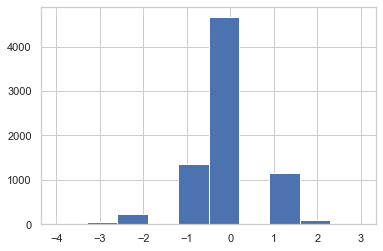

In [518]:
bancos[bancos['PERIODO'].astype(int) > 202007]['VARIAICION_NRO_BANCOS_CIERRE_2019'].hist()

In [519]:
analisis_cliente = analisis_cliente.merge(
    bancos[['COD_UNICO', 'PERIODO', 'VARIAICION_NRO_BANCOS_PRIN_DEBT_u12m',
            'VARIAICION_NRO_BANCOS_CIERRE_2019', 'VARIAICION_NRO_BANCOS_CON_MINIMO_U12M']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 653)

In [520]:
#analisis_cliente[analisis_cliente['PERIODO'] == '202009'].to_excel('seleccion_de_variables.xlsx', index=False)

In [521]:
del deuda_cliente

In [522]:
gc.collect()

81

In [523]:
#analisis_cliente[analisis_cliente['PERIODO'].isin(['202009', '202008'])].to_excel('seleccion_de_variables_20209_202008_2.xlsx', index=False)

#### GARANTIAS

In [524]:
query_ga = """
    SELECT * FROM ODS.HD_VMVP_GARANTIAS_ALERTAS_CARTERA_BE WITH (NOLOCK)
"""
garantia = pd.read_sql(
  query_ga , connection_market
)
garantia.head(10)

,PERIODO,COD_UNICO,GAR_TOT,GAR_TOT_BBVA,GAR_TOT_BCP,GAR_TOT_BIF,GAR_TOT_IBK,GAR_TOT_SCOTIA,GAR_AUTO_TOT,GAR_HIPO_TOT,...,GAR_PREN_NO_PREFER,PERCENT_GAR_IBK,PERCENT_GAR_BCP,PERCENT_GAR_BBVA,PERCENT_GAR_SCOTIA,PERCENT_GAR_BIF,PERCENT_GAR_AUTO,PERCENT_GAR_HIPO,PERCENT_GAR_PREN_WAR,PERCENT_GAR_NO_PREFER
0,201904,0014331903,46642.12,0.00,0.00,0.00,46642.12,0.00,0.00,0.00,...,158.13,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003390
1,201910,0008160086,22293222.49,872877.52,0.00,0.00,9822986.63,11597358.34,0.00,872877.52,...,21062635.57,0.440626,0.000000,0.039154,0.520219,0.000000,0.000000,0.039154,0.000000,0.944799
2,202004,0008431163,43086245.35,40107703.06,1919555.05,0.00,265274.66,0.00,0.00,28629844.66,...,3723393.40,0.006156,0.044551,0.930870,0.000000,0.000000,0.000000,0.664477,0.201475,0.086417
3,202008,0008922047,64201209.48,28255282.99,0.00,0.00,7687799.97,28258122.98,0.00,8333513.00,...,55867696.48,0.119745,0.000000,0.440105,0.440149,0.000000,0.000000,0.129803,0.000000,0.870196
4,202008,0014832350,60084.45,0.00,0.00,0.00,84.45,0.00,0.00,0.00,...,60084.45,0.001405,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
5,202009,0008814585,7499845.20,0.00,0.00,187093.78,7312751.42,0.00,0.00,7307352.69,...,192492.51,0.975053,0.000000,0.000000,0.000000,0.024946,0.000000,0.974333,0.000000,0.025666
6,201903,0012376680,21647385.43,4033662.15,3372098.63,0.00,14241624.65,0.00,0.00,4861048.86,...,12310248.25,0.657891,0.155773,0.186334,0.000000,0.000000,0.000000,0.224555,0.071598,0.568671
7,201903,0011859749,4684724.88,0.00,3569454.32,602230.27,510076.45,0.00,0.00,3185280.00,...,1020985.15,0.108880,0.761934,0.000000,0.000000,0.128551,0.000000,0.679928,0.000629,0.217939
8,201906,0010207046,4471747.40,0.00,0.00,0.00,4471747.40,0.00,68122.02,0.00,...,4403625.38,1.000000,0.000000,0.000000,0.000000,0.000000,0.015233,0.000000,0.000000,0.984766
9,201909,0013482194,3495986.48,858824.25,539487.28,0.00,947454.95,1150220.00,0.00,0.00,...,2125383.34,0.271012,0.154316,0.245660,0.329011,0.000000,0.000000,0.000000,0.153455,0.607949


### Sumamos un año ya que dbe tomar ultimo rcc desfasado

In [525]:
garantia['PERIODO'] = garantia['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)

In [526]:
garantia.shape, garantia.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

((37752, 21), (37752,))

<AxesSubplot:>

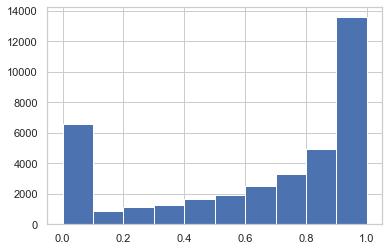

In [527]:
garantia['PERCENT_GAR_OTROS_BANCOS_PRIN'] = garantia[
    ['PERCENT_GAR_BCP', 'PERCENT_GAR_BBVA', 'PERCENT_GAR_SCOTIA', 'PERCENT_GAR_BIF']].sum(axis=1)

garantia['PERCENT_GAR_OTROS_BANCOS_PRIN'].hist()

In [528]:
def get_cat_percent_gar(val):
    if val <= 0.1:
        return 'menos del 10%'
    elif val < 0.2:
        return 'entre 10% y 20%'
    elif val < 0.3:
        return 'entre 20% y 30%'
    elif val < 0.4:
        return 'entre 30% y 40%'
    elif val < 0.5:
        return 'entre 40% y 50%'
    elif val < 0.5:
        return 'entre 50% y 60%'
    elif val < 0.5:
        return 'entre 60% y 70%'
    elif val < 0.5:
        return 'entre 70% y 80%'
    elif val < 0.5:
        return 'entre 80% y 90%'
    elif val < 0.5:
        return 'entre 90% y 100%'
    else:
        return None
    
garantia['cat_PERCENT_GAR_IBK'] = garantia['PERCENT_GAR_IBK'].apply(get_cat_percent_gar)
garantia['cat_PERCENT_GAR_AUTO'] = garantia['PERCENT_GAR_AUTO'].apply(get_cat_percent_gar)
garantia['cat_PERCENT_GAR_HIPO'] = garantia['PERCENT_GAR_HIPO'].apply(get_cat_percent_gar)
garantia['cat_PERCENT_GAR_PREN_WAR'] = garantia['PERCENT_GAR_PREN_WAR'].apply(get_cat_percent_gar)
garantia['cat_PERCENT_GAR_NO_PREFER'] = garantia['PERCENT_GAR_NO_PREFER'].apply(get_cat_percent_gar)
garantia['cat_PERCENT_GAR_OTROS_BANCOS_PRIN'] = garantia['PERCENT_GAR_OTROS_BANCOS_PRIN'].apply(get_cat_percent_gar)

garantia['PERCENT_GAR_AUTO_HIPO'] = garantia['PERCENT_GAR_AUTO'] + garantia['PERCENT_GAR_HIPO']
garantia['cat_PERCENT_GAR_AUTO_HIPO'] = garantia['PERCENT_GAR_AUTO_HIPO'].apply(get_cat_percent_gar)

garantia['PERCENT_GAR_AUTO_HIPO_PREN'] = garantia['PERCENT_GAR_AUTO'] + garantia['PERCENT_GAR_HIPO'] + garantia['PERCENT_GAR_PREN_WAR']
garantia['cat_PERCENT_GAR_AUTO_HIPO_PREN'] = garantia['PERCENT_GAR_AUTO_HIPO_PREN'].apply(get_cat_percent_gar)

In [529]:
cols_percent = [col for col in garantia.columns if 'PERCENT' in col]
print(cols_percent)

['PERCENT_GAR_IBK', 'PERCENT_GAR_BCP', 'PERCENT_GAR_BBVA', 'PERCENT_GAR_SCOTIA', 'PERCENT_GAR_BIF', 'PERCENT_GAR_AUTO', 'PERCENT_GAR_HIPO', 'PERCENT_GAR_PREN_WAR', 'PERCENT_GAR_NO_PREFER', 'PERCENT_GAR_OTROS_BANCOS_PRIN', 'cat_PERCENT_GAR_IBK', 'cat_PERCENT_GAR_AUTO', 'cat_PERCENT_GAR_HIPO', 'cat_PERCENT_GAR_PREN_WAR', 'cat_PERCENT_GAR_NO_PREFER', 'cat_PERCENT_GAR_OTROS_BANCOS_PRIN', 'PERCENT_GAR_AUTO_HIPO', 'cat_PERCENT_GAR_AUTO_HIPO', 'PERCENT_GAR_AUTO_HIPO_PREN', 'cat_PERCENT_GAR_AUTO_HIPO_PREN']


In [530]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    garantia[cols_percent + ['PERIODO', 'COD_UNICO']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 653)


(9211, 673)

In [531]:
vigente.shape, vigente.groupby(by=['PERIODO', 'COD_UNICO'])['MTOSALDO'].sum().shape

((113517, 23), (37940,))

In [532]:
agrupado_viegente = vigente.groupby(by=['PERIODO', 'COD_UNICO'])['MTOSALDO'].sum().reset_index()
agrupado_viegente['PERIODO'] = agrupado_viegente['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
print(agrupado_viegente['PERIODO'].max())
agrupado_viegente.shape

202011


(37940, 3)

In [533]:
print(list(garantia.columns))

['PERIODO', 'COD_UNICO', 'GAR_TOT', 'GAR_TOT_BBVA', 'GAR_TOT_BCP', 'GAR_TOT_BIF', 'GAR_TOT_IBK', 'GAR_TOT_SCOTIA', 'GAR_AUTO_TOT', 'GAR_HIPO_TOT', 'GAR_PREN_WAR_TOT', 'GAR_PREN_NO_PREFER', 'PERCENT_GAR_IBK', 'PERCENT_GAR_BCP', 'PERCENT_GAR_BBVA', 'PERCENT_GAR_SCOTIA', 'PERCENT_GAR_BIF', 'PERCENT_GAR_AUTO', 'PERCENT_GAR_HIPO', 'PERCENT_GAR_PREN_WAR', 'PERCENT_GAR_NO_PREFER', 'PERCENT_GAR_OTROS_BANCOS_PRIN', 'cat_PERCENT_GAR_IBK', 'cat_PERCENT_GAR_AUTO', 'cat_PERCENT_GAR_HIPO', 'cat_PERCENT_GAR_PREN_WAR', 'cat_PERCENT_GAR_NO_PREFER', 'cat_PERCENT_GAR_OTROS_BANCOS_PRIN', 'PERCENT_GAR_AUTO_HIPO', 'cat_PERCENT_GAR_AUTO_HIPO', 'PERCENT_GAR_AUTO_HIPO_PREN', 'cat_PERCENT_GAR_AUTO_HIPO_PREN']


In [534]:
agrupado_viegente = agrupado_viegente.merge(
    garantia[['GAR_AUTO_TOT', 'GAR_HIPO_TOT', 'GAR_PREN_WAR_TOT', 'PERCENT_GAR_NO_PREFER'] + ['PERIODO', 'COD_UNICO']], how='left', on=['PERIODO', 'COD_UNICO']
)
agrupado_viegente.head()

,PERIODO,COD_UNICO,MTOSALDO,GAR_AUTO_TOT,GAR_HIPO_TOT,GAR_PREN_WAR_TOT,PERCENT_GAR_NO_PREFER
0,201904,0000002469,10318226.99,0.0,23904353.24,0.00,0.000000
1,201904,0000003392,10656338.66,0.0,971816.98,2120363.07,0.805221
2,201904,0000006114,519166.36,0.0,0.00,0.00,0.489797
3,201904,0000008318,195934.03,0.0,6922962.73,78244.45,0.249240
4,201904,0000037374,13346626.45,0.0,2977130.84,0.00,0.872779


In [535]:
agrupado_viegente['GAR_AUTO_HIPO_PREN'] = agrupado_viegente['GAR_AUTO_TOT']  + agrupado_viegente['GAR_HIPO_TOT']  +agrupado_viegente['GAR_PREN_WAR_TOT'] 
agrupado_viegente['GAR_AUTO_HIPO'] = agrupado_viegente['GAR_AUTO_TOT']  + agrupado_viegente['GAR_HIPO_TOT']
agrupado_viegente['GAR_AUTO_HIPO_PREN_NOPREFER'] = agrupado_viegente['GAR_AUTO_TOT']  + agrupado_viegente['GAR_HIPO_TOT']  +agrupado_viegente['GAR_PREN_WAR_TOT'] + agrupado_viegente['PERCENT_GAR_NO_PREFER'] 

agrupado_viegente.head()

,PERIODO,COD_UNICO,MTOSALDO,GAR_AUTO_TOT,GAR_HIPO_TOT,GAR_PREN_WAR_TOT,PERCENT_GAR_NO_PREFER,GAR_AUTO_HIPO_PREN,GAR_AUTO_HIPO,GAR_AUTO_HIPO_PREN_NOPREFER
0,201904,0000002469,10318226.99,0.0,23904353.24,0.00,0.000000,23904353.24,23904353.24,2.390435e+07
1,201904,0000003392,10656338.66,0.0,971816.98,2120363.07,0.805221,3092180.05,971816.98,3.092181e+06
2,201904,0000006114,519166.36,0.0,0.00,0.00,0.489797,0.00,0.00,4.897970e-01
3,201904,0000008318,195934.03,0.0,6922962.73,78244.45,0.249240,7001207.18,6922962.73,7.001207e+06
4,201904,0000037374,13346626.45,0.0,2977130.84,0.00,0.872779,2977130.84,2977130.84,2.977132e+06


In [536]:
agrupado_viegente['COVER_GAR_AUTO_ULT_RCC'] = agrupado_viegente[['GAR_AUTO_TOT', 'MTOSALDO']].apply(
    lambda _: get_div_means_perios(_[0], _[1]), axis=1)
agrupado_viegente['COVER_GAR_AUTO_HIPO_ULT_RCC'] = agrupado_viegente[['GAR_AUTO_HIPO', 'MTOSALDO']].apply(
    lambda _: get_div_means_perios(_[0], _[1]), axis=1)
agrupado_viegente['COVER_GAR_AUTO_HIPO_PREN_ULT_RCC'] = agrupado_viegente[['GAR_AUTO_HIPO_PREN', 'MTOSALDO']].apply(
    lambda _: get_div_means_perios(_[0], _[1]), axis=1)
agrupado_viegente['COVER_GAR_AUTO_HIPO_PREN_NOPREFER_ULT_RCC'] = agrupado_viegente[['GAR_AUTO_HIPO_PREN_NOPREFER', 'MTOSALDO']].apply(
    lambda _: get_div_means_perios(_[0], _[1]), axis=1)

In [537]:
def get_cat_cover(val):
    if pd.isnull(val):
        return None
    
    if val <= 0.1:
        return 'menos del 10%'
    elif val < 0.2:
        return 'entre10 y 20%%'
    elif val < 0.4:
        return 'entre10 y 20%%'
    elif val < 0.6:
        return 'entre10 y 20%%'
    elif val < 0.8:
        return 'entre10 y 20%%'
    elif val < 1:
        return 'entre10 y 20%%'
    elif val < 1.2:
        return 'sobre cubierto en 20%'
    elif val < 1.4:
        return 'sobre cubierto de 20% a 40%'
    elif val <= 1.6:
        return 'sobre cubierto de 40% a 60%'
    else:
        return 'sobre cubierto a mas del 60%'
    
agrupado_viegente['cat_COVER_GAR_AUTO_HIPO_PREN_NOPREFER_ULT_RCC'] = agrupado_viegente['COVER_GAR_AUTO_HIPO_PREN_NOPREFER_ULT_RCC'].apply(get_cat_cover)
agrupado_viegente['cat_COVER_GAR_AUTO_HIPO_PREN_ULT_RCC'] = agrupado_viegente['COVER_GAR_AUTO_HIPO_PREN_ULT_RCC'].apply(get_cat_cover)
agrupado_viegente['cat_COVER_GAR_AUTO_HIPO_ULT_RCC'] = agrupado_viegente['COVER_GAR_AUTO_HIPO_ULT_RCC'].apply(get_cat_cover)
agrupado_viegente['cat_COVER_GAR_AUTO_ULT_RCC'] = agrupado_viegente['COVER_GAR_AUTO_ULT_RCC'].apply(get_cat_cover)

<AxesSubplot:>

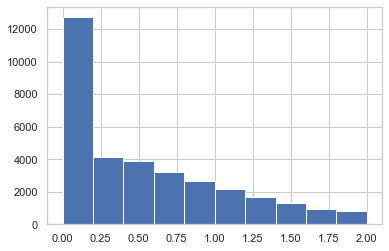

In [538]:
agrupado_viegente[agrupado_viegente['COVER_GAR_AUTO_HIPO_PREN_ULT_RCC'] < 2]['COVER_GAR_AUTO_HIPO_PREN_ULT_RCC'].hist()

<AxesSubplot:>

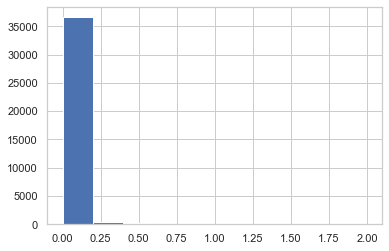

In [539]:
agrupado_viegente[agrupado_viegente['COVER_GAR_AUTO_ULT_RCC'] < 2]['COVER_GAR_AUTO_ULT_RCC'].hist()

<AxesSubplot:>

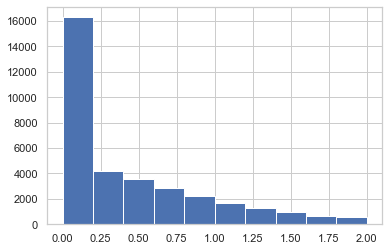

In [540]:
agrupado_viegente[agrupado_viegente['COVER_GAR_AUTO_HIPO_ULT_RCC'] < 2]['COVER_GAR_AUTO_HIPO_ULT_RCC'].hist()

In [541]:
agrupado_viegente.head()

,PERIODO,COD_UNICO,MTOSALDO,GAR_AUTO_TOT,GAR_HIPO_TOT,GAR_PREN_WAR_TOT,PERCENT_GAR_NO_PREFER,GAR_AUTO_HIPO_PREN,GAR_AUTO_HIPO,GAR_AUTO_HIPO_PREN_NOPREFER,COVER_GAR_AUTO_ULT_RCC,COVER_GAR_AUTO_HIPO_ULT_RCC,COVER_GAR_AUTO_HIPO_PREN_ULT_RCC,COVER_GAR_AUTO_HIPO_PREN_NOPREFER_ULT_RCC,cat_COVER_GAR_AUTO_HIPO_PREN_NOPREFER_ULT_RCC,cat_COVER_GAR_AUTO_HIPO_PREN_ULT_RCC,cat_COVER_GAR_AUTO_HIPO_ULT_RCC,cat_COVER_GAR_AUTO_ULT_RCC
0,201904,0000002469,10318226.99,0.0,23904353.24,0.00,0.000000,23904353.24,23904353.24,2.390435e+07,0.0,2.316711,2.316711,2.316711e+00,sobre cubierto a mas del 60%,sobre cubierto a mas del 60%,sobre cubierto a mas del 60%,menos del 10%
1,201904,0000003392,10656338.66,0.0,971816.98,2120363.07,0.805221,3092180.05,971816.98,3.092181e+06,0.0,0.091196,0.290173,2.901729e-01,entre10 y 20%%,entre10 y 20%%,menos del 10%,menos del 10%
2,201904,0000006114,519166.36,0.0,0.00,0.00,0.489797,0.00,0.00,4.897970e-01,0.0,0.000000,0.000000,9.434298e-07,menos del 10%,menos del 10%,menos del 10%,menos del 10%
3,201904,0000008318,195934.03,0.0,6922962.73,78244.45,0.249240,7001207.18,6922962.73,7.001207e+06,0.0,35.333131,35.732472,3.573247e+01,sobre cubierto a mas del 60%,sobre cubierto a mas del 60%,sobre cubierto a mas del 60%,menos del 10%
4,201904,0000037374,13346626.45,0.0,2977130.84,0.00,0.872779,2977130.84,2977130.84,2.977132e+06,0.0,0.223062,0.223062,2.230625e-01,entre10 y 20%%,entre10 y 20%%,entre10 y 20%%,menos del 10%


In [542]:
agrupado_viegente['PERIODO'].max()

'202011'

In [543]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    agrupado_viegente[['PERIODO', 'COD_UNICO', 'COVER_GAR_AUTO_ULT_RCC', 'COVER_GAR_AUTO_HIPO_PREN_ULT_RCC', 
                       'COVER_GAR_AUTO_HIPO_ULT_RCC', 'cat_COVER_GAR_AUTO_ULT_RCC', 'cat_COVER_GAR_AUTO_HIPO_ULT_RCC',
                       'cat_COVER_GAR_AUTO_HIPO_PREN_ULT_RCC', 'cat_COVER_GAR_AUTO_HIPO_PREN_NOPREFER_ULT_RCC'
                      ]], 
    how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(9211, 673)


(9211, 680)

#### VARAACION DE GARANTIA

In [544]:
garantia.shape, garantia.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

((37752, 32), (37752,))

In [545]:
garantia.sort_values(by=['COD_UNICO', 'PERIODO']).head(2)

,PERIODO,COD_UNICO,GAR_TOT,GAR_TOT_BBVA,GAR_TOT_BCP,GAR_TOT_BIF,GAR_TOT_IBK,GAR_TOT_SCOTIA,GAR_AUTO_TOT,GAR_HIPO_TOT,...,cat_PERCENT_GAR_IBK,cat_PERCENT_GAR_AUTO,cat_PERCENT_GAR_HIPO,cat_PERCENT_GAR_PREN_WAR,cat_PERCENT_GAR_NO_PREFER,cat_PERCENT_GAR_OTROS_BANCOS_PRIN,PERCENT_GAR_AUTO_HIPO,cat_PERCENT_GAR_AUTO_HIPO,PERCENT_GAR_AUTO_HIPO_PREN,cat_PERCENT_GAR_AUTO_HIPO_PREN
34365,201904,0000002469,23904353.24,0.0,19584618.03,0.0,4319735.21,0.0,0.0,23904353.24,...,entre 10% y 20%,menos del 10%,None,menos del 10%,menos del 10%,None,1.0,None,1.0,None
11152,201905,0000002469,23933642.25,0.0,19531495.19,0.0,4402147.06,0.0,0.0,23933642.25,...,entre 10% y 20%,menos del 10%,None,menos del 10%,menos del 10%,None,1.0,None,1.0,None


In [546]:
print(garantia.columns)

Index(['PERIODO', 'COD_UNICO', 'GAR_TOT', 'GAR_TOT_BBVA', 'GAR_TOT_BCP',
       'GAR_TOT_BIF', 'GAR_TOT_IBK', 'GAR_TOT_SCOTIA', 'GAR_AUTO_TOT',
       'GAR_HIPO_TOT', 'GAR_PREN_WAR_TOT', 'GAR_PREN_NO_PREFER',
       'PERCENT_GAR_IBK', 'PERCENT_GAR_BCP', 'PERCENT_GAR_BBVA',
       'PERCENT_GAR_SCOTIA', 'PERCENT_GAR_BIF', 'PERCENT_GAR_AUTO',
       'PERCENT_GAR_HIPO', 'PERCENT_GAR_PREN_WAR', 'PERCENT_GAR_NO_PREFER',
       'PERCENT_GAR_OTROS_BANCOS_PRIN', 'cat_PERCENT_GAR_IBK',
       'cat_PERCENT_GAR_AUTO', 'cat_PERCENT_GAR_HIPO',
       'cat_PERCENT_GAR_PREN_WAR', 'cat_PERCENT_GAR_NO_PREFER',
       'cat_PERCENT_GAR_OTROS_BANCOS_PRIN', 'PERCENT_GAR_AUTO_HIPO',
       'cat_PERCENT_GAR_AUTO_HIPO', 'PERCENT_GAR_AUTO_HIPO_PREN',
       'cat_PERCENT_GAR_AUTO_HIPO_PREN'],
      dtype='object')


In [547]:
garantia =garantia[[col for col in garantia.columns if 'cat' not in col]]
garantia.dtypes

PERIODO                           object
COD_UNICO                         object
GAR_TOT                          float64
GAR_TOT_BBVA                     float64
GAR_TOT_BCP                      float64
GAR_TOT_BIF                      float64
GAR_TOT_IBK                      float64
GAR_TOT_SCOTIA                   float64
GAR_AUTO_TOT                     float64
GAR_HIPO_TOT                     float64
GAR_PREN_WAR_TOT                 float64
GAR_PREN_NO_PREFER               float64
PERCENT_GAR_IBK                  float64
PERCENT_GAR_BCP                  float64
PERCENT_GAR_BBVA                 float64
PERCENT_GAR_SCOTIA               float64
PERCENT_GAR_BIF                  float64
PERCENT_GAR_AUTO                 float64
PERCENT_GAR_HIPO                 float64
PERCENT_GAR_PREN_WAR             float64
PERCENT_GAR_NO_PREFER            float64
PERCENT_GAR_OTROS_BANCOS_PRIN    float64
PERCENT_GAR_AUTO_HIPO            float64
PERCENT_GAR_AUTO_HIPO_PREN       float64
dtype: object

In [548]:
dicc_kpi = {
    'PERCENT_GAR_IBK': ['min', 'max'],
    'PERCENT_GAR_OTROS_BANCOS_PRIN':['min', 'max'],
    'PERCENT_GAR_AUTO':['min', 'max'],
    'PERCENT_GAR_AUTO_HIPO':['min', 'max'],
    'PERCENT_GAR_AUTO_HIPO_PREN':['min', 'max'],
}
columns_base = [
    'minimo_percent_ibk', 'maximo_percent_ibk',
    'minimo_percent_others', 'maximo_percent_others',
    'minimo_percent_auto', 'maximo_percent_auto',
    'minimo_percent_auto_hipo', 'maximo_percent_auto_hipo',
    'minimo_percent_auto_hipo_pren', 'maximo_auto_hipo_percent_pren',
]
contador = 1

for tramo in tramos[::-1]:
    print(tramo[0], tramo[-2])
    
    u6m = garantia[garantia['PERIODO'].astype(int).isin(tramo[1][:-2])].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    u6m.columns = [_ + '_u12m' for _ in columns_base]
    
    u6m['PERIODO'] = str(tramo[0])
    #print(_6m_anio_anterior.head())
    u6m = u6m.reset_index()
    if contador == 1:
        var_pecent_gar = u6m
    else:
        var_pecent_gar = pd.concat(
            [var_pecent_gar, u6m], axis=0
        )
    
    print(var_pecent_gar.shape)
    contador += 1

202011 [201912, 202001]
(1965, 12)
202010 [201911, 201912]
(3927, 12)
202009 [201910, 201911]
(5887, 12)
202008 [201909, 201910]
(7844, 12)
202007 [201908, 201909]
(9798, 12)


In [549]:
garantia = garantia[
    ['PERIODO', 'COD_UNICO', 'PERCENT_GAR_IBK', 'PERCENT_GAR_OTROS_BANCOS_PRIN', 'PERCENT_GAR_AUTO_HIPO',
     'PERCENT_GAR_AUTO_HIPO_PREN', 'PERCENT_GAR_AUTO'
    ]].merge(
    var_pecent_gar, how='left', on=['PERIODO', 'COD_UNICO']
)
garantia.head(30)

,PERIODO,COD_UNICO,PERCENT_GAR_IBK,PERCENT_GAR_OTROS_BANCOS_PRIN,PERCENT_GAR_AUTO_HIPO,PERCENT_GAR_AUTO_HIPO_PREN,PERCENT_GAR_AUTO,minimo_percent_ibk_u12m,maximo_percent_ibk_u12m,minimo_percent_others_u12m,maximo_percent_others_u12m,minimo_percent_auto_u12m,maximo_percent_auto_u12m,minimo_percent_auto_hipo_u12m,maximo_percent_auto_hipo_u12m,minimo_percent_auto_hipo_pren_u12m,maximo_auto_hipo_percent_pren_u12m
0,201905,0014331903,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201911,0008160086,0.440626,0.559373,0.039154,0.039154,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202005,0008431163,0.006156,0.975421,0.664477,0.865952,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,202009,0008922047,0.119745,0.880254,0.129803,0.129803,0.000000,0.000000,0.154052,0.845947,0.999999,0.0,0.000000,0.094318,0.180838,0.094318,0.180838
4,202009,0014832350,0.001405,0.000000,0.000000,0.000000,0.000000,0.001405,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
5,202010,0008814585,0.975053,0.024946,0.974333,0.974333,0.000000,0.000000,0.975053,0.024946,1.000000,0.0,0.000000,0.000000,0.974334,0.000000,0.974334
6,201904,0012376680,0.657891,0.342107,0.224555,0.296153,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,201904,0011859749,0.108880,0.890485,0.679928,0.680557,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,201907,0010207046,1.000000,0.000000,0.015233,0.015233,0.015233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,201910,0013482194,0.271012,0.728987,0.000000,0.153455,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [550]:
print(list(garantia.columns))

['PERIODO', 'COD_UNICO', 'PERCENT_GAR_IBK', 'PERCENT_GAR_OTROS_BANCOS_PRIN', 'PERCENT_GAR_AUTO_HIPO', 'PERCENT_GAR_AUTO_HIPO_PREN', 'PERCENT_GAR_AUTO', 'minimo_percent_ibk_u12m', 'maximo_percent_ibk_u12m', 'minimo_percent_others_u12m', 'maximo_percent_others_u12m', 'minimo_percent_auto_u12m', 'maximo_percent_auto_u12m', 'minimo_percent_auto_hipo_u12m', 'maximo_percent_auto_hipo_u12m', 'minimo_percent_auto_hipo_pren_u12m', 'maximo_auto_hipo_percent_pren_u12m']


In [551]:
for col in [_ for _ in garantia.columns if 'u12m' in _]:
    garantia[col] =  garantia[col].fillna(0)


garantia['VARIACION_PERCENT_GAR_IBK_U12M'] = garantia[
    ['PERCENT_GAR_IBK', 'minimo_percent_ibk_u12m', 'maximo_percent_ibk_u12m']].apply(lambda _: debt_variation(_[0], _[1], _[2]), axis=1)
garantia['VARIACION_PERCENT_GAR_OTROS_BANCOS_PRIN_U12M'] = garantia[
    ['PERCENT_GAR_OTROS_BANCOS_PRIN', 'minimo_percent_others_u12m', 'maximo_percent_others_u12m']].apply(lambda _: debt_variation(_[0], _[1], _[2]), axis=1)

garantia.shape, garantia.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

((37752, 19), (37752,))

In [552]:
garantia.shape, garantia.groupby(by=['COD_UNICO', 'PERIODO']).size().shape, analisis_cliente.shape, analisis_cliente.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

((37752, 19), (37752,), (9211, 680), (9211,))

In [553]:
print(analisis_cliente.shape)
del var_pecent_gar
analisis_cliente = analisis_cliente.merge(
    garantia[[col for col in garantia.columns if 'VARIACION' in col.upper() or 'u12m' in col.lower()] + ['PERIODO', 'COD_UNICO']],
    how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape, analisis_cliente.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

(9211, 680)


((9211, 692), (9211,))

In [554]:
#analisis_cliente[analisis_cliente['PERIODO'].isin(['202009', '202008'])].to_excel('seleccion_de_variables_20209_202008.xlsx', index=False)

#### VARACION SOW

In [555]:
sow.shape, sow.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

((39034, 17), (39034,))

In [556]:
sow.head()

,COD_UNICO,PERIODO,MTOSALDO,MTOSALDO_IBK,MTOSALDO_DIR_SF,MTOSALDO_INDIR_SF,MTOSALDO_BBVA,MTOSALDO_BCP,MTOSALDO_BIF,MTOSALDO_SCOTIA,SOW_IBK,SOW_BBVA,SOW_BCP,SOW_BIF,SOW_SCOTIA,SOW_OTROSBCOS,PERCENT_COL_DIRECTAS_SF
0,0011873465,201912,21622653.16,0.00,21622653.16,0.00,270641.82,21352011.34,0.0,0.00,0.000000,0.012516,0.987483,0.0,0.000000,1.000000,1.000000
1,0010655202,202005,436310.18,0.00,0.00,436310.18,0.00,436310.18,0.0,0.00,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.000000
2,0014249663,202005,8259449.96,8259449.96,8038337.77,221112.19,0.00,0.00,0.0,0.00,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.973229
3,0011868476,202011,917854.34,917854.34,779809.93,138044.41,0.00,0.00,0.0,0.00,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.849600
4,0012775862,202011,6319404.64,67948.74,4630203.66,1689200.98,467072.54,2076879.64,0.0,135231.55,0.010752,0.073910,0.328651,0.0,0.021399,0.423961,0.732696


In [557]:
dicc_kpi = {
    'SOW_IBK': ['min', 'max'],
    'SOW_OTROSBCOS':['min', 'max'],
    'PERCENT_COL_DIRECTAS_SF':['min', 'max']
}
columns_base = [
    'minimo_percent_sow_ibk', 'maximo_percent_sow_ibk',
    'minimo_percent_sow_others', 'maximo_percent_sow_others',
    'minimo_percent_col_direct', 'maximo_percent_col_direct'
]
contador = 1

for tramo in tramos[::-1]:
    print(tramo[0], tramo[-2])
    
    u6m = sow[sow['PERIODO'].astype(int).isin(tramo[1][:-2])].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    u6m.columns = [_ + '_u12m' for _ in columns_base]
    
    u6m['PERIODO'] = str(tramo[0])
    #print(_6m_anio_anterior.head())
    u6m = u6m.reset_index()
    if contador == 1:
        var_pecent_sow = u6m
    else:
        var_pecent_sow = pd.concat(
            [var_pecent_sow, u6m], axis=0
        )
    
    print(var_pecent_sow.shape)
    contador += 1

202011 [201912, 202001]
(2028, 8)
202010 [201911, 201912]
(4055, 8)
202009 [201910, 201911]
(6080, 8)
202008 [201909, 201910]
(8102, 8)
202007 [201908, 201909]
(10120, 8)


In [558]:
var_pecent_sow.head()

,COD_UNICO,minimo_percent_sow_ibk_u12m,maximo_percent_sow_ibk_u12m,minimo_percent_sow_others_u12m,maximo_percent_sow_others_u12m,minimo_percent_col_direct_u12m,maximo_percent_col_direct_u12m,PERIODO
0,0000002469,0.000000,0.178770,0.472807,0.890983,0.829713,0.925608,202011
1,0000003392,0.076237,0.195480,0.721719,0.895014,0.993291,1.000000,202011
2,0000006114,0.636633,0.859024,0.000000,0.000000,0.465432,0.792603,202011
3,0000008318,0.079957,0.559123,0.440876,0.920042,0.019354,0.540509,202011
4,0000037374,0.000000,0.000000,1.000000,1.000000,0.683849,1.000000,202011


In [559]:
sow = sow[
    ['PERIODO', 'COD_UNICO', 'SOW_IBK', 'SOW_OTROSBCOS', 'PERCENT_COL_DIRECTAS_SF'
    ]].merge(
    var_pecent_sow, how='left', on=['PERIODO', 'COD_UNICO']
)
sow.head(30)

,PERIODO,COD_UNICO,SOW_IBK,SOW_OTROSBCOS,PERCENT_COL_DIRECTAS_SF,minimo_percent_sow_ibk_u12m,maximo_percent_sow_ibk_u12m,minimo_percent_sow_others_u12m,maximo_percent_sow_others_u12m,minimo_percent_col_direct_u12m,maximo_percent_col_direct_u12m
0,201912,0011873465,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,202005,0010655202,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,202005,0014249663,1.000000,0.000000,0.973229,NaN,NaN,NaN,NaN,NaN,NaN
3,202011,0011868476,1.000000,0.000000,0.849600,0.688797,1.000000,0.000000,0.311202,0.290762,0.893002
4,202011,0012775862,0.010752,0.423961,0.732696,0.009327,0.025483,0.359934,0.974516,0.700515,0.848373
5,201904,0000673756,0.213410,0.786589,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
6,201912,0005604871,0.082600,0.791800,0.943833,NaN,NaN,NaN,NaN,NaN,NaN
7,202002,0009696611,0.000000,0.955000,0.205689,NaN,NaN,NaN,NaN,NaN,NaN
8,202007,0010920881,0.576567,0.423432,0.953924,0.275638,0.599140,0.400859,0.677304,0.286784,0.987031
9,201906,0013454627,0.090110,0.909889,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [560]:
print(list(sow.columns))

['PERIODO', 'COD_UNICO', 'SOW_IBK', 'SOW_OTROSBCOS', 'PERCENT_COL_DIRECTAS_SF', 'minimo_percent_sow_ibk_u12m', 'maximo_percent_sow_ibk_u12m', 'minimo_percent_sow_others_u12m', 'maximo_percent_sow_others_u12m', 'minimo_percent_col_direct_u12m', 'maximo_percent_col_direct_u12m']


In [561]:
for col in [_ for _ in sow.columns if 'u12m' in _]:
    sow[col] =  sow[col].fillna(0)


sow['VARIACION_SOW_IBK_U12M'] = sow[
    ['SOW_IBK', 'minimo_percent_sow_ibk_u12m', 'maximo_percent_sow_ibk_u12m']].apply(lambda _: debt_variation(_[0], _[1], _[2]), axis=1)
sow['VARIACION_SOW_OTROS_BANCOS_PRIN_U12M'] = sow[
    ['SOW_OTROSBCOS', 'minimo_percent_sow_others_u12m', 'maximo_percent_sow_others_u12m']].apply(lambda _: debt_variation(_[0], _[1], _[2]), axis=1)
sow['VARIACION_PERCENT_COL_DRECTAS_U12M'] = sow[
    ['PERCENT_COL_DIRECTAS_SF', 'minimo_percent_col_direct_u12m', 'maximo_percent_col_direct_u12m']].apply(lambda _: debt_variation(_[0], _[1], _[2]), axis=1)

sow.shape, sow.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

((39034, 14), (39034,))

In [562]:
analisis_cliente = analisis_cliente.merge(
    sow[[col for col in sow.columns if 'VARIACION' in col.upper() or 'u12m' in col] + ['COD_UNICO', 'PERIODO']], 
    how='left', on=['COD_UNICO', 'PERIODO']
)
analisis_cliente.shape, analisis_cliente.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

((9211, 701), (9211,))

### COVID

In [563]:
query_covid = """
    SELECT * FROM STG.T_WEBVPC_COVID19 WITH (NOLOCK)
    ORDER BY FECHA_CREACION DESC
"""
covid = pd.read_sql(
   query_covid , connection_market
)
covid.head(2)

,COD_UNICO,ID,ID_VISITA,FECHA_REGISTRO,PREGUNTA_1,PREGUNTA_2_1,PREGUNTA_2_2,PREGUNTA_2_3_1,PREGUNTA_2_3_2,PREGUNTA_3,...,USUARIO_MODIFICACION,FECHA_MODIFICACION,MONTO_CRECER,DETALLE_CRECER,FECHA_APROBACION,USUARIO_GYS,USUARIO_ADMISION,USUARIO_NOTIFICADO,USUARIO_ACOMP,FECHA_CARGA
0,0010845883,931,1163,2020-11-30,2,1,2,2,NaN,La empresa expresa un crecimiento constante en...,...,None,NaT,NaN,None,NaT,None,None,None,None,2020-12-11 05:21:00
1,0011868355,932,1164,2020-11-03,1,1,2,2,NaN,La empresa tuvo paralización de actividades en...,...,None,NaT,NaN,None,NaT,None,None,B30533,None,2020-12-11 05:21:00


In [564]:
#%%time

#from sqlalchemy import create_engine
#engine = create_engine(r"mssql+pymssql://ibetlmarket:m@rk3t2o15@10.11.12.90\BDT/MARKET")
#connection_x = engine.connect()

#try:
#    covid.to_sql(
#        name='HD_FICHA_COVD_ALERTA_CARTERA_BE_V3',
#        schema='ODS',
#        con=connection_x, 
#        index=False, 
#        if_exists='replace'
#    )
#    connection_x.close()
#    correct = 1
#except Exception as e:
#    print("ERROR: ", str(e))
#    correct = 0

#print(correct)

In [565]:
covid.shape, covid['COD_UNICO'].unique().shape

((888, 72), (857,))

In [566]:
aa = covid.groupby(by=['COD_UNICO']).size()
aa[aa > 1]

COD_UNICO
0006199905    6
0007580624    2
0008722787    2
0008923944    4
0009816033    4
0010540853    2
0010833603    5
0010847030    2
0011715944    2
0011869439    2
0011872923    2
0011874942    2
0013238792    3
0013240835    3
0013280799    2
0015522181    2
0015769787    2
0016390037    2
dtype: int64

In [567]:
covid[covid['COD_UNICO'] == '0006199905']

,COD_UNICO,ID,ID_VISITA,FECHA_REGISTRO,PREGUNTA_1,PREGUNTA_2_1,PREGUNTA_2_2,PREGUNTA_2_3_1,PREGUNTA_2_3_2,PREGUNTA_3,...,USUARIO_MODIFICACION,FECHA_MODIFICACION,MONTO_CRECER,DETALLE_CRECER,FECHA_APROBACION,USUARIO_GYS,USUARIO_ADMISION,USUARIO_NOTIFICADO,USUARIO_ACOMP,FECHA_CARGA
300,0006199905,615,847,2020-08-26,1,1,2,2,NaN,Como parte de las medidas administrativas el c...,...,B30533,2020-09-09,NaN,None,2020-09-09,None,None,B30533,None,2020-12-11 05:21:00
350,0006199905,549,781,2020-08-26,1,1,2,2,NaN,Como parte de las medidas administrativas el c...,...,B30533,2020-08-31,NaN,None,2020-08-31,None,None,B30533,None,2020-12-11 05:21:00
355,0006199905,551,783,2020-08-26,1,1,2,2,NaN,Como parte de las medidas administrativas el c...,...,B30533,2020-08-31,NaN,None,2020-08-31,None,None,B30533,None,2020-12-11 05:21:00
367,0006199905,550,782,2020-08-26,1,1,2,2,NaN,Como parte de las medidas administrativas el c...,...,B30533,2020-08-31,NaN,None,2020-08-31,None,None,B30533,None,2020-12-11 05:21:00
472,0006199905,425,657,2020-08-22,1,1,2,2,NaN,Como parte de las medidas administrativas el c...,...,B30533,2020-08-26,NaN,None,2020-08-26,None,None,B30533,None,2020-12-11 05:21:00
568,0006199905,356,588,2020-08-21,1,1,2,2,NaN,Como parte de las medidas administrativas el c...,...,B30533,2020-08-25,NaN,None,2020-08-25,None,None,B30533,None,2020-12-11 05:21:00


In [568]:
print("ANTES con duplicados: ", covid.shape[0])
covid = covid.drop_duplicates(subset=['COD_UNICO'], keep='first')
print("Regsistros únicos por codigo único: ", covid.shape[0])

ANTES con duplicados:  888
Regsistros únicos por codigo único:  857


In [569]:
#covid['PREGUNTA_5_1'].value_counts(dropna=False)
covid.columns

Index(['COD_UNICO', 'ID', 'ID_VISITA', 'FECHA_REGISTRO', 'PREGUNTA_1',
       'PREGUNTA_2_1', 'PREGUNTA_2_2', 'PREGUNTA_2_3_1', 'PREGUNTA_2_3_2',
       'PREGUNTA_3', 'PREGUNTA_4', 'PREGUNTA_5_1', 'PREGUNTA_5_2',
       'PREGUNTA_6_1', 'PREGUNTA_6_2', 'PREGUNTA_7', 'PREGUNTA_7_1',
       'PREGUNTA_7_2_1', 'PREGUNTA_7_2_2', 'PREGUNTA_7_3', 'PREGUNTA_7_4',
       'PREGUNTA_8_1', 'PREGUNTA_8_1_1_1', 'PREGUNTA_8_1_1_2',
       'PREGUNTA_8_1_2', 'PREGUNTA_8_2', 'PREGUNTA_8_3', 'PREGUNTA_8_3_2',
       'PREGUNTA_8_3_1', 'PREGUNTA_9_1', 'PREGUNTA_9_2', 'PREGUNTA_10_1',
       'PREGUNTA_10_2', 'PREGUNTA_11', 'PREGUNTA_11_1_1', 'PREGUNTA_11_1_2',
       'PREGUNTA_11_2_1', 'PREGUNTA_11_2_2', 'PREGUNTA_11_3_1',
       'PREGUNTA_11_3_2', 'PREGUNTA_11_4_1', 'PREGUNTA_11_4_2',
       'PREGUNTA_11_5_1', 'PREGUNTA_11_5_2', 'PREGUNTA_11_6_1',
       'PREGUNTA_11_6_2', 'PREGUNTA_12', 'PREGUNTA_12_1', 'PREGUNTA_12_2',
       'PREGUNTA_12_2_1', 'PREGUNTA_12_2_2_1', 'PREGUNTA_12_2_2_2',
       'PREGUNTA_13

<AxesSubplot:>

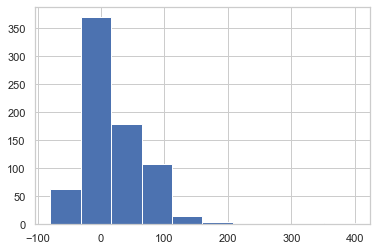

In [570]:
covid['PREGUNTA_5_1'].hist()

['COD_UNICO', 'ID', 'ID_VISITA', 'FECHA_REGISTRO', 'COVID_P_1', 'COVID_P_2_1', 'COVID_P_2_2', 'COVID_P_2_3_1', 'COVID_P_2_3_2', 'COVID_P_3', 'COVID_P_4', 'COVID_P_5_1', 'COVID_P_5_2', 'COVID_P_6_1', 'COVID_P_6_2', 'COVID_P_7', 'COVID_P_7_1', 'COVID_P_7_2_1', 'COVID_P_7_2_2', 'COVID_P_7_3', 'COVID_P_7_4', 'COVID_P_8_1', 'COVID_P_8_1_1_1', 'COVID_P_8_1_1_2', 'COVID_P_8_1_2', 'COVID_P_8_2', 'COVID_P_8_3', 'COVID_P_8_3_2', 'COVID_P_8_3_1', 'COVID_P_9_1', 'COVID_P_9_2', 'COVID_P_10_1', 'COVID_P_10_2', 'COVID_P_11', 'COVID_P_11_1_1', 'COVID_P_11_1_2', 'COVID_P_11_2_1', 'COVID_P_11_2_2', 'COVID_P_11_3_1', 'COVID_P_11_3_2', 'COVID_P_11_4_1', 'COVID_P_11_4_2', 'COVID_P_11_5_1', 'COVID_P_11_5_2', 'COVID_P_11_6_1', 'COVID_P_11_6_2', 'COVID_P_12', 'COVID_P_12_1', 'COVID_P_12_2', 'COVID_P_12_2_1', 'COVID_P_12_2_2_1', 'COVID_P_12_2_2_2', 'COVID_P_13', 'COVID_P_14_1', 'COVID_P_14_2', 'COVID_P_14_3', 'COVID_P_14_4', 'COVID_P_14_5', 'ESTADO_APROBACION', 'ESTADO_REGISTRO', 'USUARIO_CREACION', 'FECHA_CRE

<AxesSubplot:>

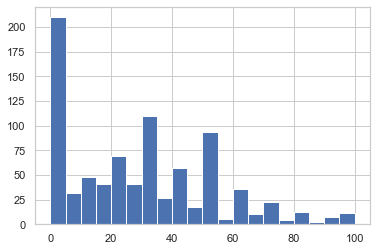

In [571]:
def parser_si_no(val):
    if pd.isnull(val):
        return None
    return 'SI' if str(val).strip() == '1' else 'NO'

covid['COVID_P_5_VARIACION_PORCENTUAL_VENTAS_2020_2019'] = covid['PREGUNTA_5_1'].copy()

covid.columns = [col.replace('PREGUNTA', 'COVID_P') for col in covid.columns]
print(list(covid.columns))


covid['COVID_P_1'] = covid['COVID_P_1'].apply(parser_si_no)
covid['COVID_P_1'].value_counts(dropna=False)


covid['IMPACTO_COVID_FICHA'] = covid['COVID_P_13'].copy()
covid['COVID_P_1_TE_AFECTO_COVID'] = covid['COVID_P_1'].copy()
del covid['COVID_P_13']
del covid['COVID_P_1']


covid['COVID_ESTRATEGIA'] = covid['COVID_P_14_1'].copy()
covid['COVID_ESTRATEGIA'] = covid['COVID_ESTRATEGIA'].fillna('Sin categoria')
covid['COVID_ESTRATEGIA'] = covid['COVID_ESTRATEGIA'].apply(lambda _: _.strip().upper())
#covid['COVID_ESTRATEGIA'].value_counts(dropna=False) # ESTRATEGIA


covid['COVID_FEVE'] = covid['COVID_P_14_2'].copy()
covid['COVID_FEVE'] = covid['COVID_FEVE'].fillna('Sin categoria')
covid['COVID_FEVE'] = covid['COVID_FEVE'].apply(lambda _: _.strip().upper())
#covid['COVID_FEVE'].value_counts(dropna=False) # FEVE

covid['COVID_ACOGIO_SUSPENSION_PERFECTA'] = covid['COVID_P_2_2'].apply(lambda _: 'SI' if str(_).strip() in ('1', '1.0') else 'NO')
#covid['COVID_ACOGIO_SUSPENSION_PERFECTA'].value_counts(dropna=False)

covid['COVID_PORCENTAJE_REDUCCION_PERSONAL'] = covid['COVID_P_2_3_2'].copy()
covid['COVID_PORCENTAJE_REDUCCION_PERSONAL'] = covid['COVID_PORCENTAJE_REDUCCION_PERSONAL'].fillna(0.0)
#del covid['COVID_P_2_3_2']
#covid['COVID_PORCENTAJE_REDUCCION_PERSONAL'].hist(bins=20)

covid['COVID_PORCENTAJE_REDUCCION_INGREO_MENUSAL'] = covid['COVID_P_4'].fillna(0.0)
#del covid['COVID_P_4']
covid['COVID_PORCENTAJE_REDUCCION_INGREO_MENUSAL'].hist(bins=20)

<AxesSubplot:>

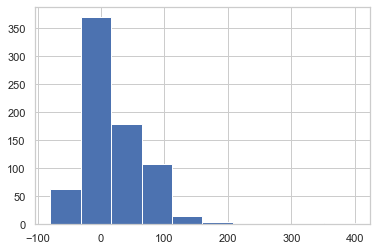

In [572]:
covid['COVID_P_5_VARIACION_PORCENTUAL_VENTAS_2020_2019'].hist()

In [573]:
'COVID_P_12', 'COVID_P_12_1'

('COVID_P_12', 'COVID_P_12_1')

In [574]:
covid['COVID_P_12'].value_counts()

2    644
1    213
Name: COVID_P_12, dtype: int64

In [575]:
covid['COVID_TIENES_PENSADO_O_ESTAS_HACIENDO_INVERSIONES'] = covid['COVID_P_12'].apply(lambda _: 1 if _ == 1 else 0)
covid['COVID_TIENES_PENSADO_O_ESTAS_HACIENDO_INVERSIONES'].value_counts()                                                       

0    644
1    213
Name: COVID_TIENES_PENSADO_O_ESTAS_HACIENDO_INVERSIONES, dtype: int64

In [576]:
covid['COVID_P_12_1'] = covid['COVID_P_12_1'].fillna(0)
covid['COVID_12_DE_CUNATA_INVERSION_SE_TRATA'] = covid['COVID_P_12_1'].copy()

In [577]:
covid.head(3)

,COD_UNICO,ID,ID_VISITA,FECHA_REGISTRO,COVID_P_2_1,COVID_P_2_2,COVID_P_2_3_1,COVID_P_2_3_2,COVID_P_3,COVID_P_4,...,COVID_P_5_VARIACION_PORCENTUAL_VENTAS_2020_2019,IMPACTO_COVID_FICHA,COVID_P_1_TE_AFECTO_COVID,COVID_ESTRATEGIA,COVID_FEVE,COVID_ACOGIO_SUSPENSION_PERFECTA,COVID_PORCENTAJE_REDUCCION_PERSONAL,COVID_PORCENTAJE_REDUCCION_INGREO_MENUSAL,COVID_TIENES_PENSADO_O_ESTAS_HACIENDO_INVERSIONES,COVID_12_DE_CUNATA_INVERSION_SE_TRATA
0,0010845883,931,1163,2020-11-30,1,2,2,NaN,La empresa expresa un crecimiento constante en...,0.0,...,NaN,sin impacto,NO,MANTENER,SIN FEVE,NO,0.0,0.0,0,0.0
1,0011868355,932,1164,2020-11-03,1,2,2,NaN,La empresa tuvo paralización de actividades en...,20.0,...,NaN,bajo,SI,MANTENER,SIN FEVE,NO,0.0,20.0,0,0.0
2,0011671228,929,1161,2020-12-01,1,2,2,NaN,Si bien estuvo sin operar los dos primeros mes...,19.0,...,0.0,medio,SI,MANTENER,SIN FEVE,NO,0.0,19.0,0,0.0


In [578]:
covid.shape, covid['COD_UNICO'].unique().shape

((857, 80), (857,))

In [579]:
covid['PERIODO'] = '202009'
covid_202009 = covid.copy()

In [580]:
covid['PERIODO'] = '202008'
covid_202008 = covid.copy()

In [581]:
covid = pd.concat(
    [covid_202009, covid_202008], axis=0
)

In [582]:
covid['PERIODO'].value_counts()

202008    857
202009    857
Name: PERIODO, dtype: int64

In [583]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    covid[
    ['PERIODO', 'COD_UNICO','COVID_P_1_TE_AFECTO_COVID', 'COVID_ACOGIO_SUSPENSION_PERFECTA', 
     'COVID_PORCENTAJE_REDUCCION_PERSONAL','COVID_PORCENTAJE_REDUCCION_INGREO_MENUSAL', 'IMPACTO_COVID_FICHA',
     'COVID_P_5_VARIACION_PORCENTUAL_VENTAS_2020_2019', 'COVID_TIENES_PENSADO_O_ESTAS_HACIENDO_INVERSIONES', 'COVID_12_DE_CUNATA_INVERSION_SE_TRATA']],
    how='left',
    on=['PERIODO', 'COD_UNICO']
)
print(analisis_cliente.shape)

(9211, 701)
(9211, 709)


### ADEX

In [584]:
query_adex = """
    SELECT * FROM ODS.HD_VMVP_ADEX_CARTERA_BE
"""
adex = pd.read_sql(
   query_adex , connection_market
)
adex.head(2)

,CODUNICOCLI,PERIODO,RUC,NOMBRE,VALOR,TIPO,CONTINENTE,SECTOR,FECHA_CARGA,NOMBRE_VPC
0,0010189627,201805.0,20501887286,DIAGNOSTICA PERUANA S.A.C.,174264.354,IMP,EUROPA,QUIMICO,2020-02-18 14:25:00,DIAGNOSTICA PERUANA
1,0011859551,201806.0,20509862843,AGP PERU S.A.C.,13500.000,EXP,AMERICA DEL NORTE,QUIMICO,2020-02-18 14:25:00,AGP PERU


In [585]:
adex['PERIODO'].max()

202010.0

In [586]:
adex['PERIODO'] = adex['PERIODO'].astype(str).apply(lambda _: _.split('.')[0])
adex['PERIODO'] = adex['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=2)).strftime('%Y%m')
)
adex.head()

,CODUNICOCLI,PERIODO,RUC,NOMBRE,VALOR,TIPO,CONTINENTE,SECTOR,FECHA_CARGA,NOMBRE_VPC
0,0010189627,201807,20501887286,DIAGNOSTICA PERUANA S.A.C.,174264.354,IMP,EUROPA,QUIMICO,2020-02-18 14:25:00,DIAGNOSTICA PERUANA
1,0011859551,201808,20509862843,AGP PERU S.A.C.,13500.000,EXP,AMERICA DEL NORTE,QUIMICO,2020-02-18 14:25:00,AGP PERU
2,0011859551,201808,20509862843,AGP PERU S.A.C.,15336.546,IMP,EUROPA,VARIOS,2020-02-18 14:25:00,AGP PERU
3,0011859551,201808,20509862843,AGP PERU S.A.C.,136314.140,IMP,ASIA,MINERIA NO METALICA,2020-02-18 14:25:00,AGP PERU
4,0015156030,201807,20601657261,HG IMPORT EXPORT S.A.C.,18440.891,IMP,ASIA,QUIMICO,2020-02-18 14:25:00,HG IMPORT EXPORT


In [587]:
adex['TIPO'].value_counts(dropna=False)

IMP    188683
EXP     44550
Name: TIPO, dtype: int64

In [588]:
adex['SECTOR'].value_counts(dropna=False)

QUIMICO                          58501
METAL - MECANICO                 52754
VARIOS                           33636
AGROPECUARIO Y AGROINDUSTRIAS    23090
SIDERURGICO Y METALURGICO        22012
MINERIA NO METALICA              12026
TEXTIL                           11571
PRENDAS DE VESTIR                 5984
MADERAS                           3911
PESCA                             3813
PETROLEO Y GAS NATURAL            2603
AGRO TRADICIONAL                  1675
MINERIA TRADICIONAL               1174
PESCA TRADICIONAL                  483
Name: SECTOR, dtype: int64

In [589]:
adex['CONTINENTE'].value_counts(dropna=False)

ASIA                 73857
EUROPA               52942
AMERICA DEL NORTE    51759
AMERICA DEL SUR      43293
AMERICA CENTRAL       6261
OCEANIA               2699
AFRICA                2422
Name: CONTINENTE, dtype: int64

### PIVOTEO POR IMPORTACIONES

In [590]:
adex['COD_UNICO'] = adex['CODUNICOCLI']

pivoteo = pd.pivot_table(
    adex, 
    values='VALOR', index=['COD_UNICO', 'PERIODO'], columns=['SECTOR', 'TIPO'], aggfunc=np.sum, fill_value=0
)
pivoteo.columns = ['_'.join(tupla) for tupla in pivoteo.columns]
pivoteo['total'] = pivoteo.sum(axis=1)

for col in pivoteo.columns:
    pivoteo[col] = pivoteo[col] / pivoteo['total']

del pivoteo['total']
pivoteo.columns = [('ADEX_' + col).replace(' ', '_') + '_PERCENT' for col in pivoteo.columns]

for col in [_ for _ in pivoteo.columns if '_PERCENT' in _]:
    pivoteo[col.replace('ADEX_', 'TIENE_ADEX_').replace('_PERCENT', '')] = pivoteo[col].apply(lambda _: 1 if _ > 0 else 0)

pivoteo = pivoteo.reset_index().fillna(0)
pivoteo.head(2)

,COD_UNICO,PERIODO,ADEX_AGRO_TRADICIONAL_EXP_PERCENT,ADEX_AGRO_TRADICIONAL_IMP_PERCENT,ADEX_AGROPECUARIO_Y_AGROINDUSTRIAS_EXP_PERCENT,ADEX_AGROPECUARIO_Y_AGROINDUSTRIAS_IMP_PERCENT,ADEX_MADERAS_EXP_PERCENT,ADEX_MADERAS_IMP_PERCENT,ADEX_METAL_-_MECANICO_EXP_PERCENT,ADEX_METAL_-_MECANICO_IMP_PERCENT,...,TIENE_ADEX_PRENDAS_DE_VESTIR_EXP,TIENE_ADEX_PRENDAS_DE_VESTIR_IMP,TIENE_ADEX_QUIMICO_EXP,TIENE_ADEX_QUIMICO_IMP,TIENE_ADEX_SIDERURGICO_Y_METALURGICO_EXP,TIENE_ADEX_SIDERURGICO_Y_METALURGICO_IMP,TIENE_ADEX_TEXTIL_EXP,TIENE_ADEX_TEXTIL_IMP,TIENE_ADEX_VARIOS_EXP,TIENE_ADEX_VARIOS_IMP
0,0000002469,201504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.443336,...,0,0,0,0,0,0,0,1,0,0
1,0000002469,201505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.969500,...,0,0,0,0,0,0,0,1,0,0


In [591]:
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
del pivoteo
print(analisis_cliente.shape)
analisis_cliente.head(3)

(9211, 765)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,TIENE_ADEX_PRENDAS_DE_VESTIR_EXP,TIENE_ADEX_PRENDAS_DE_VESTIR_IMP,TIENE_ADEX_QUIMICO_EXP,TIENE_ADEX_QUIMICO_IMP,TIENE_ADEX_SIDERURGICO_Y_METALURGICO_EXP,TIENE_ADEX_SIDERURGICO_Y_METALURGICO_IMP,TIENE_ADEX_TEXTIL_EXP,TIENE_ADEX_TEXTIL_IMP,TIENE_ADEX_VARIOS_EXP,TIENE_ADEX_VARIOS_IMP
0,202007,0011066687,20513578416,1,FARMACEUTICA OTARVASQ,0,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,202007,0011179155,20513550830,0,ESTINSA INDUSTRIAL,1,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202007,0011197692,20519022461,0,CONSORCIO ELECTRICO INDUSTRIAL,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [592]:
pivoteo = pd.pivot_table(
    adex, 
    values='VALOR', index=['COD_UNICO', 'PERIODO'], columns=['CONTINENTE', 'TIPO'], aggfunc=np.sum, fill_value=0
)
pivoteo.columns = ['_'.join(tupla) for tupla in pivoteo.columns]
pivoteo['total'] = pivoteo.sum(axis=1)

for col in pivoteo.columns:
    pivoteo[col] = pivoteo[col] / pivoteo['total']

del pivoteo['total']
pivoteo.columns = [('ADEX_' + col).replace(' ', '_') + '_PERCENT' for col in pivoteo.columns]

for col in [_ for _ in pivoteo.columns if '_PERCENT' in _]:
    pivoteo[col.replace('ADEX_', 'TIENE_ADEX_').replace('_PERCENT', '')] = pivoteo[col].apply(lambda _: 1 if _ > 0 else 0)

pivoteo = pivoteo.reset_index().fillna(0)
pivoteo.head(2)

,COD_UNICO,PERIODO,ADEX_AFRICA_EXP_PERCENT,ADEX_AFRICA_IMP_PERCENT,ADEX_AMERICA_CENTRAL_EXP_PERCENT,ADEX_AMERICA_CENTRAL_IMP_PERCENT,ADEX_AMERICA_DEL_NORTE_EXP_PERCENT,ADEX_AMERICA_DEL_NORTE_IMP_PERCENT,ADEX_AMERICA_DEL_SUR_EXP_PERCENT,ADEX_AMERICA_DEL_SUR_IMP_PERCENT,...,TIENE_ADEX_AMERICA_DEL_NORTE_EXP,TIENE_ADEX_AMERICA_DEL_NORTE_IMP,TIENE_ADEX_AMERICA_DEL_SUR_EXP,TIENE_ADEX_AMERICA_DEL_SUR_IMP,TIENE_ADEX_ASIA_EXP,TIENE_ADEX_ASIA_IMP,TIENE_ADEX_EUROPA_EXP,TIENE_ADEX_EUROPA_IMP,TIENE_ADEX_OCEANIA_EXP,TIENE_ADEX_OCEANIA_IMP
0,0000002469,201504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.443336,...,0,0,0,1,0,0,0,1,0,0
1,0000002469,201505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,1,0,0


In [593]:
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
del pivoteo
print(analisis_cliente.shape)
analisis_cliente.head(3)

(9211, 793)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,TIENE_ADEX_AMERICA_DEL_NORTE_EXP,TIENE_ADEX_AMERICA_DEL_NORTE_IMP,TIENE_ADEX_AMERICA_DEL_SUR_EXP,TIENE_ADEX_AMERICA_DEL_SUR_IMP,TIENE_ADEX_ASIA_EXP,TIENE_ADEX_ASIA_IMP,TIENE_ADEX_EUROPA_EXP,TIENE_ADEX_EUROPA_IMP,TIENE_ADEX_OCEANIA_EXP,TIENE_ADEX_OCEANIA_IMP
0,202007,0011066687,20513578416,1,FARMACEUTICA OTARVASQ,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,202007,0011179155,20513550830,0,ESTINSA INDUSTRIAL,1,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202007,0011197692,20519022461,0,CONSORCIO ELECTRICO INDUSTRIAL,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### PIVOTEO IMP EXP

In [594]:
adex['COD_UNICO'] = adex['CODUNICOCLI']

pivoteo = pd.pivot_table(
    adex, 
    values='VALOR', index=['COD_UNICO', 'PERIODO'], columns=['TIPO'], aggfunc=np.sum, fill_value=0
)
#pivoteo_grupo = pivoteo.reset_index()
pivoteo['total'] = pivoteo.sum(axis=1)

for col in pivoteo.columns:
    pivoteo[col] = pivoteo[col] / pivoteo['total']

del pivoteo['total']
pivoteo.columns = [('ADEX_' + col).replace(' ', '_') + '_PERCENT' for col in pivoteo.columns]


for col in [_ for _ in pivoteo.columns if '_PERCENT' in _]:
    pivoteo[col.replace('ADEX_', 'TIENE_ADEX_').replace('_PERCENT', '')] = pivoteo[col].apply(lambda _: 1 if _ > 0 else 0)
pivoteo = pivoteo.reset_index().fillna(0)
pivoteo.tail(3)

,COD_UNICO,PERIODO,ADEX_EXP_PERCENT,ADEX_IMP_PERCENT,TIENE_ADEX_EXP,TIENE_ADEX_IMP
53317,0017239443,202010,0.0,1.0,0,1
53318,0017239443,202011,0.0,1.0,0,1
53319,0017239443,202012,0.0,1.0,0,1


In [595]:
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
del pivoteo
print(analisis_cliente.shape)
analisis_cliente.head(3)

(9211, 797)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,TIENE_ADEX_ASIA_EXP,TIENE_ADEX_ASIA_IMP,TIENE_ADEX_EUROPA_EXP,TIENE_ADEX_EUROPA_IMP,TIENE_ADEX_OCEANIA_EXP,TIENE_ADEX_OCEANIA_IMP,ADEX_EXP_PERCENT,ADEX_IMP_PERCENT,TIENE_ADEX_EXP,TIENE_ADEX_IMP
0,202007,0011066687,20513578416,1,FARMACEUTICA OTARVASQ,0,0,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,202007,0011179155,20513550830,0,ESTINSA INDUSTRIAL,1,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202007,0011197692,20519022461,0,CONSORCIO ELECTRICO INDUSTRIAL,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [596]:
pivoteo = pd.pivot_table(
    adex, 
    values='VALOR', index=['COD_UNICO'], columns=['TIPO', 'PERIODO'], aggfunc=np.sum, fill_value=0
).unstack().reset_index()
pivoteo.columns = ['TIPO', 'PERIODO', 'COD_UNICO', 'VALOR']


pivoteo_grupo = pd.pivot_table(
    pivoteo, 
    values='VALOR', index=['COD_UNICO', 'PERIODO'], columns=['TIPO'], aggfunc=np.sum, fill_value=0
).reset_index()
pivoteo_grupo.head()

TIPO,COD_UNICO,PERIODO,EXP,IMP
0,0000002469,201503,0.0,0.000
1,0000002469,201504,0.0,50604.826
2,0000002469,201505,0.0,432722.260
3,0000002469,201506,0.0,20405.910
4,0000002469,201507,0.0,0.000


In [597]:
pivoteo_grupo.columns

Index(['COD_UNICO', 'PERIODO', 'EXP', 'IMP'], dtype='object', name='TIPO')

In [598]:
contador = 1
dd = {k: list for k in pivoteo_grupo.columns if k not in ['PERIODO', 'COD_UNICO']}

for tramo in tramos:
    _3_meses_previos = tramo[3]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dd)
    _3m_actual.columns =  ['listado_' + '_'.join(_) if isinstance(_, tuple) else _ for _ in _3m_actual.columns]
    #_3m_actual = 
    #print(_3m_actual.head())
    print("/"*100)
    
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]

    if contador == 1:
        acum_3 = _3m_actual.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
        
    print(acum_3.shape)
    contador +=1
    del _3m_actual

202007 [202005, 202006, 202007]
////////////////////////////////////////////////////////////////////////////////////////////////////
(1315, 4)
202008 [202006, 202007, 202008]
////////////////////////////////////////////////////////////////////////////////////////////////////
(2630, 4)
202009 [202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(3945, 4)
202010 [202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(5260, 4)
202011 [202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(6575, 4)


In [599]:
acum_3.head()

,COD_UNICO,EXP,IMP,PERIODO
0,0000002469,"[50220.55, 78514.07, 204309.56]","[0.0, 4708.235000000001, 19581.521]",202007
1,0000003392,"[1565642.99, 954979.0399999999, 446373.96]","[29740.722, 92888.8, 1421132.1030000001]",202007
2,0000006114,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]",202007
3,0000008318,"[0.0, 0.0, 0.0]","[43566.24, 0.0, 0.0]",202007
4,0000037374,"[0.0, 0.0, 0.0]","[40724.051999999996, 113742.829, 376614.515]",202007


In [600]:
for col in ['EXP', 'IMP']:
    acum_3['ADEX_CAIDA_SEGUIDA_U3M_' + col] = acum_3[col].apply(
        lambda _: (_[1] < _[0] and _[2] < _[1]) or ( _[2] < _[0] and _[1] == 0) or ( _[2] < _[1] and _[0] == 0)
    ).astype(int)
    acum_3['ADEX_CAIDA_20PERCENT_MES_ANT_' + col] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] <= 0.8
    ).astype(int)
    acum_3['ADEX_CAIDA_30PERCENT_MES_ANT_' + col] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] <= 0.7
    ).astype(int)
    acum_3['ADEX_CAIDA_40PERCENT_MES_ANT_' + col] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] <= 0.6
    ).astype(int)
    acum_3['ADEX_CAIDA_50PERCENT_MES_ANT_' + col] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] <= 0.5
    ).astype(int)
    acum_3['ADEX_SUBIDA_SEGUIDA_U3M_' + col] = acum_3[col].apply(lambda _: _[1] > _[0] and _[2] > _[1]).astype(int)
    acum_3['ADEX_MENOR_U3M_' +col] = acum_3[col].apply(lambda _: _[-1] == min([mes for mes in _])).astype(int)
    acum_3['ADEX_MAYOR_U3M_' + col] = acum_3[col].apply(lambda _: _[2] > _[0] and _[2] >= _[1]).astype(int)
    acum_3['ADEX_NO__ESTE_MES_' + col] = acum_3[col].apply(lambda _: _[-1] < 100).astype(int)
    acum_3['ADEX_NO__U2M_' + col] = acum_3[col].apply(lambda _: _[-1] < 100 and _[-2] < 100).astype(int)
    acum_3['ADEX_NO__U3M_' + col] = acum_3[col].apply(lambda _: _[-1] < 100 and _[-2] < 100 and _[-3] < 100).astype(int)
    del acum_3[col]

In [601]:
acum_3['PERIODO'] = acum_3['PERIODO'].astype(str)
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    acum_3, how='left', on=['PERIODO', 'COD_UNICO']
)
del acum_3
print(analisis_cliente.shape)
analisis_cliente.head(3)

(9211, 797)
(9211, 819)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,ADEX_CAIDA_20PERCENT_MES_ANT_IMP,ADEX_CAIDA_30PERCENT_MES_ANT_IMP,ADEX_CAIDA_40PERCENT_MES_ANT_IMP,ADEX_CAIDA_50PERCENT_MES_ANT_IMP,ADEX_SUBIDA_SEGUIDA_U3M_IMP,ADEX_MENOR_U3M_IMP,ADEX_MAYOR_U3M_IMP,ADEX_NO__ESTE_MES_IMP,ADEX_NO__U2M_IMP,ADEX_NO__U3M_IMP
0,202007,0011066687,20513578416,1,FARMACEUTICA OTARVASQ,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,202007,0011179155,20513550830,0,ESTINSA INDUSTRIAL,1,1,0,0,0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,202007,0011197692,20519022461,0,CONSORCIO ELECTRICO INDUSTRIAL,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [602]:
analisis_cliente.shape

(9211, 819)

In [603]:
#analisis_cliente[analisis_cliente['PERIODO'].isin(['202009', '202008'])].to_excel('seleccion_de_variables_20209_202008.xlsx', index=False)

## CEF

In [604]:
query_cef = """
    SELECT * FROM ODS.HD_VMVP_CEF_INDICADORES_ALERTAS_CARTERA_BE
"""
cef = pd.read_sql(
   query_cef , connection_market
)
cef.head(2)

,ORDEN_CEF,ANIO,COD_UNICO,RAZON_SOCIAL,ORDEN,ORDEN_ANUAL,FECHA_CEF,DESTIPESTADOFINANCIERO,DESESTADO,MONEDA,...,ROTACION_CTASXCOBRAR_VAR_DIAS,ROTACION_CTASXPAGAR_VAR_DIAS,ROTACION_INVENTARIOS_VAR_DIAS,ROTACION_CTASXCOBRAR_VAR,ROTACION_CTASXPAGAR_VAR,ROTACION_INVENTARIOS_VAR,DTOTAL_S_EBITDA_VAR,DTOTAL_S_VENTAS_VAR,DTOTALCAJA_S_EBITDA_VAR,EBITDA_S_SERVDEUDA_VAR
0,1,2020,0000002469,INDUSTRIAS DEL PAPEL,1,4,2020-09-30,SITUACION,VALIDADO,1,...,11.399467,-6.177180,1.621677,0.124544,-0.139340,0.025256,6.161873,0.435836,0.848297,-0.445191
1,1,2020,0000003392,Corporacion de Ingenieria de Refrigeracion SRL,1,4,2020-09-30,SITUACION,PENDIENTE,1,...,22.881686,14.841342,39.778080,0.882740,0.996701,0.670012,2.824827,1.192275,0.978003,-0.526504


In [605]:
cef.shape, cef['COD_UNICO'].unique().shape

((1608, 65), (1608,))

In [606]:
def apply_diff_mont(serie_diff):
    return (serie_diff / np.timedelta64(1,'D')).round(3)

In [607]:

#(datetime.strptime(str(mes_cerrado), '%Y%m') + relativedelta(months=1)  - x.max()).days

<AxesSubplot:>

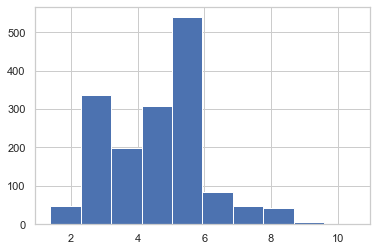

In [608]:
cef['FECHA_CEF'] = pd.to_datetime(
    cef['FECHA_CEF'], errors='coerce', format='%Y-%m-%d'
)
cef['DESFASE_CEF_MESES'] = apply_diff_mont(datetime.now() - cef['FECHA_CEF']) / 30
cef['DESFASE_CEF_MESES'].hist()

In [609]:
for col in list(cef.iloc[:2, 12:].columns):
    cef['CEF_' + col] = cef[col].copy()
    del cef[col]

In [610]:
cef = cef[['COD_UNICO'] + list(cef.iloc[:2, 12:].columns)]
cef.shape

(1608, 55)

In [611]:
cef.shape, cef.groupby(by=['COD_UNICO']).size().shape

((1608, 55), (1608,))

In [612]:
analisis_cliente.shape, analisis_cliente.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

((9211, 819), (9211,))

In [613]:
analisis_cliente = analisis_cliente.merge(
    cef, how='left', on=['COD_UNICO']
)
analisis_cliente.shape, analisis_cliente.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

((9211, 873), (9211,))

In [614]:
#analisis_cliente[analisis_cliente['PERIODO'].isin(['202009', '202008'])].to_excel('seleccion_de_variables_20209_202008_final.xlsx', index=False)

In [615]:
print(list(analisis_cliente.columns))

['PERIODO', 'COD_UNICO', 'RUC', 'FLG_VIGENTE', 'NOMBRE_COMPLETO', 'FLG_SUSPENDIDO', 'FLG_VENCIDA', 'FLG_CANCELADO', 'FLG_MONOLINEA', 'FLG_SOLO_REACTIVA', 'FLG_POSICION', 'FUNNEL_1', 'FUNNEL_2', 'FUNNEL_3', 'RIESGO', 'COD_GRUPO_ECONOMICO', 'DES_GRUPO_ECONOMICO', 'ZONAL', 'ENCARGADO', 'NOMBRE_JEFE', 'CLASIFICACION_LIST_360', 'FUNNEL_4', 'DESPRIORIZACION_ADM', 'IMPACTO', 'PLAN_PROPUESTO', 'ESTADO_APROBACION', 'BUCKET', 'ESTADO', 'FEVE', 'ES_ACTIVO', 'CLASIF_SBS', 'CLASIF_IBK', 'DEPARTAMENTO', 'FEC_INGRESO', 'SEI_MCDO', 'sei_preocupa', 'sei_letal', 'sei_observado_banca', 'TICKET_PROMEDIO_EN_RIESGO', 'UNIVERSO_MESA', 'CLASIF_NO_NORMAL', 'NO_EST_ASOCIADO_A_GRUPO_ECONOMICO', 'NRO_MIEMBROS_GRUPO_ECONOMICO', 'NRO_CLASIF_NO_NORMAL_GRUPO_EECON', 'NRO_FEVE_DURO_GRUPO_EECON', 'NRO_FEVE_SEGUIR_GRUPO_EECON', 'PERCENT_GRUPO_ECON_VPC_SEGUIR', 'PERCENT_GRUPO_ECON_VPC_FEVE_DURO', 'PERCENT_GRUPO_ECON_VPC_NO_CLASIF_NORMAL', 'TIENE_2_O_MAS_GRUPO_ECON_VPC_SEGUIR', 'TIENE_2_O_MAS_GRUPO_ECON_VPC_FEVE_DRO', 'TI

In [616]:
analisis_cliente.shape

(9211, 873)

In [617]:
gc.collect()

88

In [618]:
#up = analisis_cliente.copy()
#up[up['PERIODO'].astype(int) >= 202007].to_excel("AVANCE_4.xlsx", index=False)
#up[up['PERIODO'].astype(int) >= 202007]['PERIODO'].value_counts()

### LINEAS

In [619]:
gc.collect()

44

In [620]:
try:
    del up
except:
    pass


In [621]:
#[col for col in ]

In [622]:
cols_target = [col for col in analisis_cliente.columns if 'target' in col]
print(cols_target)

['target_yoy_quartil_03', 'target_yoy_quartil_04', 'target_yoy_quartil_05', 'target_yoy_quartil_06', 'target_yoy_quartil_07', 'target_feve_reducir_salir', 'target_seguircovid_reducir_salir', 'cuasi_target_preocupa', 'target_no_normales_ibk_sbs', 'target_8_dias_atraso', 'target_15_dias_atraso', 'target_rcc_8_dias_atraso', 'target_SF_8_dias_atraso_o_mas']


### FICHA VSIITAME

In [623]:
sql_visitame = """
SELECT  * FROM(
SELECT ROW_NUMBER() OVER(PARTITION BY COD_UNICO ORDER BY FECHA_VISITA DESC) ORDEN, *
FROM STG.T_WEBBE_INFINITY_VISITA
) A
WHERE ORDEN = 1

"""
visitame = pd.read_sql(
   sql_visitame , connection_market
)
visitame.head(2)

,ORDEN,ID,COD_UNICO,FLG_CAMBIO_MIX_VENTAS,FLG_CAMBIO_PROCESO_INTEGRACION,FLG_CAMBIO_CONCENTRACION_VENTAS,FLG_CAMBIO_CONCENTRACION_PROVEEDORES,FLG_CAMBIO_OPERACIONES,FLG_CAMBIO_ZONA_CLIENTES,FLG_CAMBIO_GERENCIA_GENERAL,...,FLG_CAMBIO_BACKLOG,REVISION_FECHA,REVISION_USUARIO,FLG_CAMBIO_MODELO_NEGOCIO,CAMBIO_PRESTAMO_DESVIO,CAMBIO_INVERSION_ACTIVO_PATRIMONIO,FLG_PROCESO,FECHA_PROCESO,COMENTARIO_ROL_VALIDADOR,FECHA_CARGA
0,1,1069,0000006114,0,0,0,0,0,0,0,...,0,NaT,None,0,None,None,NaN,NaT,None,2020-12-11 05:20:00
1,1,1158,0000038026,0,0,0,0,0,0,0,...,0,NaT,None,0,None,None,NaN,NaT,None,2020-12-11 05:20:00


In [624]:
analisis_cliente = analisis_cliente.merge(
    visitame[[col for col in visitame.columns if 'FLG_' in col] + ['COD_UNICO']], how='left', on=['COD_UNICO']
)
analisis_cliente.shape

(9211, 888)

In [625]:
[col for col in visitame.columns if 'FLG_' in col]

['FLG_CAMBIO_MIX_VENTAS',
 'FLG_CAMBIO_PROCESO_INTEGRACION',
 'FLG_CAMBIO_CONCENTRACION_VENTAS',
 'FLG_CAMBIO_CONCENTRACION_PROVEEDORES',
 'FLG_CAMBIO_OPERACIONES',
 'FLG_CAMBIO_ZONA_CLIENTES',
 'FLG_CAMBIO_GERENCIA_GENERAL',
 'FLG_CAMBIO_GESTION_FINANCIERA',
 'FLG_CAMBIO_ACCIONISTAS',
 'FLG_CAMBIO_LINEAS',
 'FLG_CAMBIO_INVERSION_ACTIVO_PATRIMONIO',
 'FLG_CAMBIO_PRESTAMO_DESVIO',
 'FLG_CAMBIO_BACKLOG',
 'FLG_CAMBIO_MODELO_NEGOCIO',
 'FLG_PROCESO']

In [626]:
analisis_cliente.columns

Index(['PERIODO', 'COD_UNICO', 'RUC', 'FLG_VIGENTE', 'NOMBRE_COMPLETO',
       'FLG_SUSPENDIDO', 'FLG_VENCIDA', 'FLG_CANCELADO', 'FLG_MONOLINEA',
       'FLG_SOLO_REACTIVA',
       ...
       'FLG_CAMBIO_ZONA_CLIENTES', 'FLG_CAMBIO_GERENCIA_GENERAL',
       'FLG_CAMBIO_GESTION_FINANCIERA', 'FLG_CAMBIO_ACCIONISTAS',
       'FLG_CAMBIO_LINEAS', 'FLG_CAMBIO_INVERSION_ACTIVO_PATRIMONIO',
       'FLG_CAMBIO_PRESTAMO_DESVIO', 'FLG_CAMBIO_BACKLOG',
       'FLG_CAMBIO_MODELO_NEGOCIO', 'FLG_PROCESO'],
      dtype='object', length=888)

AssertionError: 

## FULL RCC

In [628]:
sql_full_rcc = """
SELECT  * FROM ODS.HD_VMVP_DETAIL_FULL_RCC_ALERTA_CARTERA_BE
"""
full_rcc = pd.read_sql(
   sql_full_rcc , connection_market
)
full_rcc.head()

,COD_UNICO,PERIODO,NBR_ABREVIADO,MTOSALDO
0,0009310997,201911,IBK,176173.93
1,0011623091,202008,IBK,152828.85
2,0015219637,202009,BBVA,573832.71
3,0008948373,202009,IBK,569764.80
4,0012085147,202004,FIN,1351603.38


In [629]:
pivoteo = pd.pivot_table(
    full_rcc, 
    values='MTOSALDO', index=['COD_UNICO'],columns=['NBR_ABREVIADO','PERIODO'], aggfunc=np.sum, fill_value=0
).unstack().unstack(level=0)

pivoteo.head()

NBR_ABREVIADO       AGRO         BBVA         BCP         BIF        COM  \
PERIODO COD_UNICO                                                          
201909  0000006114   0.0      1245.26        0.00        0.00       0.00   
        0000038026   0.0  10696648.17  2935851.82        0.00       0.00   
        0000043778   0.0   6652520.61        0.00        0.00       0.00   
        0000054320   0.0   3736425.63  3992338.98  2383126.06  657345.28   
        0000054635   0.0         0.00        0.00        0.00       0.00   

NBR_ABREVIADO              FIN        GNB         IBK  MBCO        SANT  \
PERIODO COD_UNICO                                                         
201909  0000006114        0.00  123220.00  1101343.54   0.0        0.00   
        0000038026        0.00       0.00  1195088.49   0.0        0.00   
        0000043778        0.00       0.00   385766.86   0.0        0.00   
        0000054320  2957944.67  428216.69  2329868.16   0.0  8794813.48   
        0000054635    31146.46       0.00  2629087.49   0.0        0.00   

NBR_ABREVIADO            SCOTIA  
PERIODO COD_UNICO                
201909  0000006114         0.00  
        0000038026   5045601.56  
        0000043778   2089040.37  
        0000054320   5708229.36  
        0000054635  13790266.86

In [630]:
pivoteo['listado'] = pivoteo.apply(lambda _: list(_), axis=1)
pivoteo['suma'] = pivoteo.sum(axis=1)

for col in [_ for _ in pivoteo.columns if _ not in ['suma', 'listado']]:
    pivoteo['MTO_DEUDA_FULL_RCC_' + col] = pivoteo[col].copy()
    pivoteo['PERCENT_DEUDA_FUL_RCC' + col] = pivoteo[col] / pivoteo['suma']
    del pivoteo[col]
    
pivoteo = pivoteo.reset_index()
pivoteo.head()

NBR_ABREVIADO,PERIODO,COD_UNICO,listado,suma,MTO_DEUDA_FULL_RCC_AGRO,PERCENT_DEUDA_FUL_RCCAGRO,MTO_DEUDA_FULL_RCC_BBVA,PERCENT_DEUDA_FUL_RCCBBVA,MTO_DEUDA_FULL_RCC_BCP,PERCENT_DEUDA_FUL_RCCBCP,...,MTO_DEUDA_FULL_RCC_GNB,PERCENT_DEUDA_FUL_RCCGNB,MTO_DEUDA_FULL_RCC_IBK,PERCENT_DEUDA_FUL_RCCIBK,MTO_DEUDA_FULL_RCC_MBCO,PERCENT_DEUDA_FUL_RCCMBCO,MTO_DEUDA_FULL_RCC_SANT,PERCENT_DEUDA_FUL_RCCSANT,MTO_DEUDA_FULL_RCC_SCOTIA,PERCENT_DEUDA_FUL_RCCSCOTIA
0,201909,0000006114,"[0.0, 1245.26, 0.0, 0.0, 0.0, 0.0, 123220.0, 1...",1225808.80,0.0,0.0,1245.26,0.001016,0.00,0.000000,...,123220.00,0.100521,1101343.54,0.898463,0.0,0.0,0.00,0.000000,0.00,0.000000
1,201909,0000038026,"[0.0, 10696648.17, 2935851.82, 0.0, 0.0, 0.0, ...",19873190.04,0.0,0.0,10696648.17,0.538245,2935851.82,0.147729,...,0.00,0.000000,1195088.49,0.060136,0.0,0.0,0.00,0.000000,5045601.56,0.253890
2,201909,0000043778,"[0.0, 6652520.61, 0.0, 0.0, 0.0, 0.0, 0.0, 385...",9127327.84,0.0,0.0,6652520.61,0.728857,0.00,0.000000,...,0.00,0.000000,385766.86,0.042265,0.0,0.0,0.00,0.000000,2089040.37,0.228878
3,201909,0000054320,"[0.0, 3736425.63, 3992338.98, 2383126.06, 6573...",30988308.31,0.0,0.0,3736425.63,0.120575,3992338.98,0.128834,...,428216.69,0.013819,2329868.16,0.075185,0.0,0.0,8794813.48,0.283811,5708229.36,0.184206
4,201909,0000054635,"[0.0, 0.0, 0.0, 0.0, 0.0, 31146.46, 0.0, 26290...",16450500.81,0.0,0.0,0.00,0.000000,0.00,0.000000,...,0.00,0.000000,2629087.49,0.159818,0.0,0.0,0.00,0.000000,13790266.86,0.838289


<AxesSubplot:>

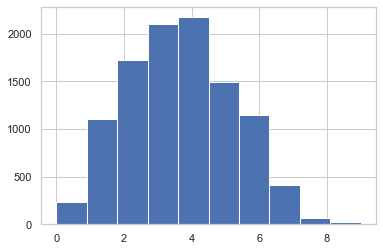

In [631]:
pivoteo['NRO_ENTIDADES_FULL_RCC_SF'] = pivoteo['listado'].apply(lambda _: len([e for e in _ if e > 0]))
pivoteo['NRO_ENTIDADES_FULL_RCC_SF'].hist()

In [632]:
pivoteo['PERIODO'] = pivoteo['PERIODO'].apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
pivoteo['PERIODO'].max(), pivoteo['PERIODO'].min()

('202010', '201910')

In [633]:
del pivoteo['listado'] 

In [634]:
pivoteo['TMO_DEUDA_TOTAL_FULL_RCC_SF'] = pivoteo['suma']
del pivoteo['suma'] 

In [635]:
pivoteo['PERIODO'] = pivoteo['PERIODO'].astype(str)
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
#del pivoteo
print(analisis_cliente.shape)
analisis_cliente.head(3)

(9211, 888)
(9211, 912)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,MTO_DEUDA_FULL_RCC_IBK,PERCENT_DEUDA_FUL_RCCIBK,MTO_DEUDA_FULL_RCC_MBCO,PERCENT_DEUDA_FUL_RCCMBCO,MTO_DEUDA_FULL_RCC_SANT,PERCENT_DEUDA_FUL_RCCSANT,MTO_DEUDA_FULL_RCC_SCOTIA,PERCENT_DEUDA_FUL_RCCSCOTIA,NRO_ENTIDADES_FULL_RCC_SF,TMO_DEUDA_TOTAL_FULL_RCC_SF
0,202007,0011066687,20513578416,1,FARMACEUTICA OTARVASQ,0,0,1,0,0,...,587462.58,0.020435,0.0,0.0,0.0,0.0,2519071.96,0.087626,6.0,28748142.18
1,202007,0011179155,20513550830,0,ESTINSA INDUSTRIAL,1,1,0,0,0,...,264800.00,0.095686,0.0,0.0,0.0,0.0,852500.00,0.308053,6.0,2767383.82
2,202007,0011197692,20519022461,0,CONSORCIO ELECTRICO INDUSTRIAL,1,0,0,0,0,...,4477493.61,0.857750,0.0,0.0,0.0,0.0,9883.05,0.001893,3.0,5220045.24


## NUM ENTIDAES FULL RCC HISTORICO

In [636]:
acum = generate_listado_u3m(
    pivoteo, 'listados_num_entidades', values='NRO_ENTIDADES_FULL_RCC_SF',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=sum
)
acum.head()

202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(807, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(1614, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(2421, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(3228, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(4035, 3)


,COD_UNICO,listados_num_entidades,PERIODO
0,0000006114,"[3, 3, 3, 3, 3, 3, 3, 2, 2, 2]",202007
1,0000038026,"[4, 4, 4, 4, 4, 4, 4, 3, 3, 3]",202007
2,0000043778,"[3, 3, 3, 3, 3, 3, 3, 3, 4, 4]",202007
3,0000054320,"[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]",202007
4,0000054635,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]",202007


<AxesSubplot:>

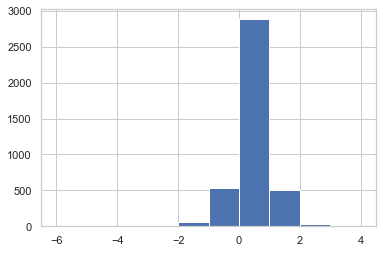

In [637]:
def varacion_num_bancos(lista):
    hace_6_meses = round((lista[-7] + lista[-6]) / 2, 0)
    return lista[-1] - hace_6_meses
    
acum['VARACION_NUM_BANCOS_FULL_RCCC_SF']  = acum['listados_num_entidades'].apply(varacion_num_bancos)
acum['VARACION_NUM_BANCOS_FULL_RCCC_SF'].hist()

In [638]:
acum['TIENE_AUMENTO_1_BANCO_U7M_FULL_RCC_SF'] = acum['VARACION_NUM_BANCOS_FULL_RCCC_SF'].apply(lambda _: _== 1).astype(int)
acum['TIENE_AUMENTO_1_BANCO_o_MAS_U7M_FULL_RCC_SF'] = acum['VARACION_NUM_BANCOS_FULL_RCCC_SF'].apply(lambda _: _ >= 1).astype(int)

acum['TIENE_AUMENTO_2_BANCO_U7M_FULL_RCC_SF'] = acum['VARACION_NUM_BANCOS_FULL_RCCC_SF'].apply(lambda _: _== 2).astype(int)
acum['TIENE_AUMENTO_2_BANCO_o_MAS_U7M_FULL_RCC_SF'] = acum['VARACION_NUM_BANCOS_FULL_RCCC_SF'].apply(lambda _: _ >= 2).astype(int)

acum['TIENE_AUMENTO_3_BANCO_U7M_FULL_RCC_SF'] = acum['VARACION_NUM_BANCOS_FULL_RCCC_SF'].apply(lambda _: _== 3).astype(int)
acum['TIENE_AUMENTO_3_BANCO_o_MAS_U7M_FULL_RCC_SF'] = acum['VARACION_NUM_BANCOS_FULL_RCCC_SF'].apply(lambda _: _ >= 3).astype(int)

In [639]:
del  acum['listados_num_entidades']

In [640]:
acum.head()

,COD_UNICO,PERIODO,VARACION_NUM_BANCOS_FULL_RCCC_SF,TIENE_AUMENTO_1_BANCO_U7M_FULL_RCC_SF,TIENE_AUMENTO_1_BANCO_o_MAS_U7M_FULL_RCC_SF,TIENE_AUMENTO_2_BANCO_U7M_FULL_RCC_SF,TIENE_AUMENTO_2_BANCO_o_MAS_U7M_FULL_RCC_SF,TIENE_AUMENTO_3_BANCO_U7M_FULL_RCC_SF,TIENE_AUMENTO_3_BANCO_o_MAS_U7M_FULL_RCC_SF
0,0000006114,202007,-1.0,0,0,0,0,0,0
1,0000038026,202007,-1.0,0,0,0,0,0,0
2,0000043778,202007,1.0,1,1,0,0,0,0
3,0000054320,202007,0.0,0,0,0,0,0,0
4,0000054635,202007,0.0,0,0,0,0,0,0


In [641]:
acum['PERIODO'] = acum['PERIODO'].astype(str)
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
#del pivoteo
print(analisis_cliente.shape)
analisis_cliente.head(3)

(9211, 912)
(9211, 919)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,PERCENT_DEUDA_FUL_RCCSCOTIA,NRO_ENTIDADES_FULL_RCC_SF,TMO_DEUDA_TOTAL_FULL_RCC_SF,VARACION_NUM_BANCOS_FULL_RCCC_SF,TIENE_AUMENTO_1_BANCO_U7M_FULL_RCC_SF,TIENE_AUMENTO_1_BANCO_o_MAS_U7M_FULL_RCC_SF,TIENE_AUMENTO_2_BANCO_U7M_FULL_RCC_SF,TIENE_AUMENTO_2_BANCO_o_MAS_U7M_FULL_RCC_SF,TIENE_AUMENTO_3_BANCO_U7M_FULL_RCC_SF,TIENE_AUMENTO_3_BANCO_o_MAS_U7M_FULL_RCC_SF
0,202007,0011066687,20513578416,1,FARMACEUTICA OTARVASQ,0,0,1,0,0,...,0.087626,6.0,28748142.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,202007,0011179155,20513550830,0,ESTINSA INDUSTRIAL,1,1,0,0,0,...,0.308053,6.0,2767383.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,202007,0011197692,20519022461,0,CONSORCIO ELECTRICO INDUSTRIAL,1,0,0,0,0,...,0.001893,3.0,5220045.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [642]:
#    pivoteo = pd.pivot_table(
#        full_rcc, 
#        values='MTOSALDO', index=['COD_UNICO'],columns=['NBR_ABREVIADO','PERIODO'], aggfunc=np.sum, fill_value=0
#    ).unstack().unstack(level=0)#.reset_index()

#    pivoteo.head()

    #pivoteo.columns = columns + index + [col_name]

In [643]:

analisis_cliente.to_excel("AVANCE_5.xlsx", index=False)
#up[up['PERIODO'].astype(int) >= 202007]['PERIODO'].value_counts()

In [ ]:
analisis_cliente.shape

In [ ]:
analisis_cliente['PERIODO'].value_counts()

In [ ]:
raise Exception("VICTOR DICE:  AUGANTA TU COCHE")

In [ ]:
%%time

from sqlalchemy import create_engine
engine = create_engine(r"mssql+pymssql://ibetlmarket:m@rk3t2o15@10.11.12.90\BDT/MARKET")
connection_x = engine.connect()

try:
    analisis_cliente.to_sql(
        name='HD_DATASET_ALERTA_CARTERA_BE_V3',
        schema='ODS',
        con=connection_x, 
        index=False, 
        if_exists='replace'
    )
    connection_x.close()
    correct = 1
except Exception as e:
    print("ERROR: ", str(e))
    correct = 0

print(correct)

### AANALISIS VARIABLE

##### En otro notebook